# version

In [1]:
i = 2

# Import python dataset

In [2]:
# Common imports
import numpy as np
import os
from backend import import_excel, export_excel

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# style.use('bmh')
from mpl_toolkits.mplot3d import Axes3D
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import pandas as pd
import seaborn as sns

import tensorflow as tf
import keras
import random

import sys
sys.path.append("..")
from sklearn.preprocessing import *
from sklearn.preprocessing import MinMaxScaler
import dataset, network_2D, WGAN_Model_2D

# Load data

In [3]:
# Preprocessing
vars = np.zeros((6,864))
j = 0
for i in range(6):
    for i2 in range(4):
        for i3 in range(3):
            for i4 in range(2):
                for i5 in range(3):
                    for i6 in range(2):
                        vars[0,j]=i+2
                        vars[1,j]=i2
                        vars[2,j]=i3
                        vars[3,j]=i4
                        vars[4,j]=i5
                        vars[5,j]=i6
                        j = j +1
j=0
print(vars[:,j])

scenario= "eye" #sinus, helix
n_instance = 1000
n_features = 2
n_var =int(vars[0,j])
latent_space =1000 #12
batchs = [10,100,1000]
BATCH_SIZE = 100 #100, 32
scales = ['-1-1','0-1']
scaled = '-1-1'
epochs = 50000 #4000
bias = [True,False]
use_bias = False

[2. 0. 0. 0. 0. 0.]


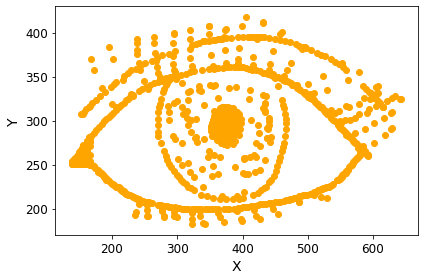

In [4]:
if scenario in ("3d", "helix"):
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    print("X_train= x,y",X_train.shape)
    print("y_train= z",y_train.shape)

    ax = plt.subplot(projection='3d')
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    ax.scatter(X_train[:,0], X_train[:,1], y_train, c='orange')
    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')
    plt.tight_layout()

    
else:
    X_train, y_train, X_test, y_test, X_valid, y_valid = dataset.get_dataset(n_instance, scenario)
    plt.scatter(X_train,y_train, c='orange', label='Sample Data')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()

In [5]:
os.system('mkdir Dataset')
os.system('mkdir GANS')
os.system('mkdir GANS/Models')
os.system('mkdir GANS/Losses')
os.system('mkdir GANS/Random_test')
export_excel(X_train, 'Dataset/X_train')
export_excel(y_train, 'Dataset/y_train')

# print(X_train.shape,y_train.shape)
X_train = import_excel('Dataset/X_train')
y_train = import_excel('Dataset/y_train')

print('made dataset')
    
    

made dataset


# WGAN

### Architecture

In [6]:
generator=network_2D.build_generator(latent_space, n_var, n_features,use_bias)
generator.summary()

discriminator=network_2D.build_critic(n_var, use_bias, n_features)
discriminator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                3000      
_________________________________________________________________
batch_normalization (BatchNo (None, 30)                120       
_________________________________________________________________
dense_1 (Dense)              (None, 10)                300       
_________________________________________________________________
batch_normalization_1 (Batch (None, 10)                40        
_________________________________________________________________
dense_2 (Dense)              (None, 10)                100       
_________________________________________________________________
batch_normalization_2 (Batch (None, 10)                40        
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 2

In [7]:
wgan = WGAN_Model_2D.WGAN(i,n_features,latent_space,BATCH_SIZE,n_var,use_bias)
wgan.wgan.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 2)                 3620      
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2461      
Total params: 6,081
Trainable params: 5,981
Non-trainable params: 100
_________________________________________________________________


### Preprocessing

In [8]:
train_dataset, scaler, X_train_scaled = wgan.preproc(X_train, y_train, scaled)

print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_train_scaled",X_train_scaled.shape)

data shape_1 (100, 2)
data shape_2 (100, 2)
data shape_3 (100, 2)
data shape_4 (100, 2)
data shape_5 (100, 2)
data shape_6 (100, 2)
data shape_7 (100, 2)
data shape_8 (100, 2)
data shape_9 (100, 2)
data shape_10 (51, 2)
Cycles:  10
X_train (951, 1)
y_train (951, 1)
X_train_scaled (951, 2)


In [9]:
for data in train_dataset:
    print('train_dataset',data.shape)


train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (100, 2)
train_dataset (51, 2)


## Training

Epoch 1/50000
critic: 5.171588 - generator: -0.013223 - 5s
Epoch 2/50000
critic: 1.184911 - generator: -0.003425 - 0s
Epoch 3/50000
critic: 0.284899 - generator: -0.005235 - 0s
Epoch 4/50000
critic: 0.094751 - generator: -0.000875 - 0s
Epoch 5/50000
critic: 0.127879 - generator: 0.008942 - 0s
Epoch 6/50000
critic: 0.118357 - generator: 0.011874 - 0s
Epoch 7/50000
critic: 0.083602 - generator: 0.012537 - 0s
Epoch 8/50000
critic: 0.098929 - generator: 0.019447 - 0s
Epoch 9/50000
critic: 0.114550 - generator: 0.024508 - 0s
Epoch 10/50000
critic: 0.102367 - generator: 0.025179 - 0s
Epoch 11/50000
critic: 0.134450 - generator: 0.025210 - 0s
Epoch 12/50000
critic: 0.070978 - generator: 0.030342 - 0s
Epoch 13/50000
critic: 0.105324 - generator: 0.026987 - 0s
Epoch 14/50000
critic: 0.092222 - generator: 0.033366 - 0s
Epoch 15/50000
critic: 0.092249 - generator: 0.037108 - 0s
Epoch 16/50000
critic: 0.141357 - generator: 0.033713 - 0s
Epoch 17/50000
critic: 0.093621 - generator: 0.034905 - 0s
Ep

critic: 0.095674 - generator: 0.014660 - 0s
Epoch 141/50000
critic: 0.110190 - generator: 0.014030 - 0s
Epoch 142/50000
critic: 0.113784 - generator: 0.014557 - 0s
Epoch 143/50000
critic: 0.135274 - generator: 0.013149 - 0s
Epoch 144/50000
critic: 0.107707 - generator: 0.012809 - 0s
Epoch 145/50000
critic: 0.137710 - generator: 0.013653 - 0s
Epoch 146/50000
critic: 0.103275 - generator: 0.011446 - 0s
Epoch 147/50000
critic: 0.114639 - generator: 0.010407 - 0s
Epoch 148/50000
critic: 0.102237 - generator: 0.010726 - 0s
Epoch 149/50000
critic: 0.121806 - generator: 0.008229 - 0s
Epoch 150/50000
critic: 0.130663 - generator: 0.006287 - 0s
Epoch 151/50000
critic: 0.118491 - generator: 0.006675 - 0s
Epoch 152/50000
critic: 0.105605 - generator: 0.003293 - 0s
Epoch 153/50000
critic: 0.118450 - generator: 0.003388 - 0s
Epoch 154/50000
critic: 0.117042 - generator: 0.002775 - 0s
Epoch 155/50000
critic: 0.119695 - generator: 0.003323 - 0s
Epoch 156/50000
critic: 0.109067 - generator: 0.003835 -

critic: 0.089515 - generator: 0.040286 - 0s
Epoch 277/50000
critic: 0.114389 - generator: 0.038489 - 0s
Epoch 278/50000
critic: 0.101629 - generator: 0.037499 - 0s
Epoch 279/50000
critic: 0.079898 - generator: 0.039072 - 0s
Epoch 280/50000
critic: 0.090797 - generator: 0.034506 - 0s
Epoch 281/50000
critic: 0.098880 - generator: 0.037008 - 0s
Epoch 282/50000
critic: 0.105918 - generator: 0.037551 - 0s
Epoch 283/50000
critic: 0.113244 - generator: 0.033533 - 0s
Epoch 284/50000
critic: 0.097983 - generator: 0.035434 - 0s
Epoch 285/50000
critic: 0.088134 - generator: 0.033221 - 0s
Epoch 286/50000
critic: 0.112868 - generator: 0.033577 - 0s
Epoch 287/50000
critic: 0.094353 - generator: 0.032060 - 0s
Epoch 288/50000
critic: 0.105782 - generator: 0.032301 - 0s
Epoch 289/50000
critic: 0.102953 - generator: 0.031183 - 0s
Epoch 290/50000
critic: 0.096828 - generator: 0.029296 - 0s
Epoch 291/50000
critic: 0.117802 - generator: 0.028632 - 0s
Epoch 292/50000
critic: 0.100482 - generator: 0.027130 -

critic: 0.100433 - generator: 0.033554 - 0s
Epoch 412/50000
critic: 0.084957 - generator: 0.038538 - 0s
Epoch 413/50000
critic: 0.077372 - generator: 0.044907 - 0s
Epoch 414/50000
critic: 0.066092 - generator: 0.049702 - 0s
Epoch 415/50000
critic: 0.065561 - generator: 0.050564 - 0s
Epoch 416/50000
critic: 0.077707 - generator: 0.051548 - 0s
Epoch 417/50000
critic: 0.083479 - generator: 0.052092 - 0s
Epoch 418/50000
critic: 0.078012 - generator: 0.056909 - 0s
Epoch 419/50000
critic: 0.087499 - generator: 0.056775 - 0s
Epoch 420/50000
critic: 0.050251 - generator: 0.060457 - 0s
Epoch 421/50000
critic: 0.086382 - generator: 0.059102 - 0s
Epoch 422/50000
critic: 0.090891 - generator: 0.058601 - 0s
Epoch 423/50000
critic: 0.096068 - generator: 0.058103 - 0s
Epoch 424/50000
critic: 0.077260 - generator: 0.059174 - 0s
Epoch 425/50000
critic: 0.069639 - generator: 0.057113 - 0s
Epoch 426/50000
critic: 0.085857 - generator: 0.060003 - 0s
Epoch 427/50000
critic: 0.091150 - generator: 0.058050 -

critic: 0.075608 - generator: -0.025170 - 0s
Epoch 549/50000
critic: 0.075110 - generator: -0.024334 - 0s
Epoch 550/50000
critic: 0.076084 - generator: -0.025466 - 0s
Epoch 551/50000
critic: 0.079463 - generator: -0.022071 - 0s
Epoch 552/50000
critic: 0.090062 - generator: -0.023670 - 0s
Epoch 553/50000
critic: 0.064604 - generator: -0.022025 - 0s
Epoch 554/50000
critic: 0.061611 - generator: -0.022292 - 0s
Epoch 555/50000
critic: 0.083511 - generator: -0.021957 - 0s
Epoch 556/50000
critic: 0.060170 - generator: -0.022179 - 0s
Epoch 557/50000
critic: 0.087912 - generator: -0.020240 - 0s
Epoch 558/50000
critic: 0.092679 - generator: -0.018528 - 0s
Epoch 559/50000
critic: 0.067639 - generator: -0.017506 - 0s
Epoch 560/50000
critic: 0.117240 - generator: -0.017459 - 0s
Epoch 561/50000
critic: 0.068951 - generator: -0.014046 - 0s
Epoch 562/50000
critic: 0.086076 - generator: -0.013218 - 0s
Epoch 563/50000
critic: 0.085053 - generator: -0.013982 - 0s
Epoch 564/50000
critic: 0.086872 - gener

critic: 0.084071 - generator: 0.010570 - 0s
Epoch 685/50000
critic: 0.109049 - generator: 0.008270 - 0s
Epoch 686/50000
critic: 0.106596 - generator: 0.009889 - 0s
Epoch 687/50000
critic: 0.106950 - generator: 0.008580 - 0s
Epoch 688/50000
critic: 0.094887 - generator: 0.007615 - 0s
Epoch 689/50000
critic: 0.098843 - generator: 0.007795 - 0s
Epoch 690/50000
critic: 0.094911 - generator: 0.007254 - 0s
Epoch 691/50000
critic: 0.096207 - generator: 0.003473 - 0s
Epoch 692/50000
critic: 0.104353 - generator: 0.003950 - 0s
Epoch 693/50000
critic: 0.113267 - generator: 0.001090 - 0s
Epoch 694/50000
critic: 0.127908 - generator: -0.001085 - 0s
Epoch 695/50000
critic: 0.082687 - generator: -0.001454 - 0s
Epoch 696/50000
critic: 0.126534 - generator: -0.001878 - 0s
Epoch 697/50000
critic: 0.086013 - generator: -0.003777 - 0s
Epoch 698/50000
critic: 0.093715 - generator: -0.004240 - 0s
Epoch 699/50000
critic: 0.096472 - generator: -0.005334 - 0s
Epoch 700/50000
critic: 0.092450 - generator: -0.0

critic: 0.103556 - generator: 0.008831 - 0s
Epoch 821/50000
critic: 0.094040 - generator: 0.009426 - 0s
Epoch 822/50000
critic: 0.084772 - generator: 0.005338 - 0s
Epoch 823/50000
critic: 0.128891 - generator: 0.002810 - 0s
Epoch 824/50000
critic: 0.074900 - generator: 0.003295 - 0s
Epoch 825/50000
critic: 0.114257 - generator: 0.001860 - 0s
Epoch 826/50000
critic: 0.114167 - generator: -0.000423 - 0s
Epoch 827/50000
critic: 0.107139 - generator: -0.000894 - 0s
Epoch 828/50000
critic: 0.101787 - generator: -0.000915 - 0s
Epoch 829/50000
critic: 0.090526 - generator: -0.004542 - 0s
Epoch 830/50000
critic: 0.109553 - generator: -0.005687 - 0s
Epoch 831/50000
critic: 0.114617 - generator: -0.003856 - 0s
Epoch 832/50000
critic: 0.093184 - generator: -0.007217 - 0s
Epoch 833/50000
critic: 0.076507 - generator: -0.007703 - 0s
Epoch 834/50000
critic: 0.093692 - generator: -0.011301 - 0s
Epoch 835/50000
critic: 0.103773 - generator: -0.012462 - 0s
Epoch 836/50000
critic: 0.094910 - generator: 

critic: 0.118096 - generator: -0.008889 - 0s
Epoch 957/50000
critic: 0.078146 - generator: -0.010088 - 0s
Epoch 958/50000
critic: 0.089932 - generator: -0.010675 - 0s
Epoch 959/50000
critic: 0.104949 - generator: -0.010028 - 0s
Epoch 960/50000
critic: 0.102922 - generator: -0.011105 - 0s
Epoch 961/50000
critic: 0.101288 - generator: -0.009239 - 0s
Epoch 962/50000
critic: 0.114882 - generator: -0.009618 - 0s
Epoch 963/50000
critic: 0.080641 - generator: -0.009598 - 0s
Epoch 964/50000
critic: 0.090174 - generator: -0.011922 - 0s
Epoch 965/50000
critic: 0.094784 - generator: -0.012692 - 0s
Epoch 966/50000
critic: 0.103235 - generator: -0.014346 - 0s
Epoch 967/50000
critic: 0.112375 - generator: -0.014115 - 0s
Epoch 968/50000
critic: 0.100348 - generator: -0.011352 - 0s
Epoch 969/50000
critic: 0.103922 - generator: -0.015311 - 0s
Epoch 970/50000
critic: 0.098695 - generator: -0.014955 - 0s
Epoch 971/50000
critic: 0.100599 - generator: -0.017535 - 0s
Epoch 972/50000
critic: 0.107181 - gener

critic: 0.084538 - generator: 0.017137 - 0s
Epoch 1091/50000
critic: 0.081232 - generator: 0.018569 - 0s
Epoch 1092/50000
critic: 0.110282 - generator: 0.017966 - 0s
Epoch 1093/50000
critic: 0.092742 - generator: 0.016906 - 0s
Epoch 1094/50000
critic: 0.082162 - generator: 0.017969 - 0s
Epoch 1095/50000
critic: 0.074449 - generator: 0.016995 - 0s
Epoch 1096/50000
critic: 0.092407 - generator: 0.016604 - 0s
Epoch 1097/50000
critic: 0.074140 - generator: 0.015071 - 0s
Epoch 1098/50000
critic: 0.073530 - generator: 0.016250 - 0s
Epoch 1099/50000
critic: 0.095873 - generator: 0.016418 - 0s
Epoch 1100/50000
critic: 0.083480 - generator: 0.014694 - 0s
Epoch 1101/50000
critic: 0.060204 - generator: 0.014200 - 0s
Epoch 1102/50000
critic: 0.071330 - generator: 0.015573 - 0s
Epoch 1103/50000
critic: 0.089407 - generator: 0.011180 - 0s
Epoch 1104/50000
critic: 0.079679 - generator: 0.011720 - 0s
Epoch 1105/50000
critic: 0.070210 - generator: 0.011372 - 0s
Epoch 1106/50000
critic: 0.082499 - gener

critic: 0.110672 - generator: 0.010160 - 0s
Epoch 1225/50000
critic: 0.096038 - generator: 0.008467 - 0s
Epoch 1226/50000
critic: 0.074258 - generator: 0.006883 - 0s
Epoch 1227/50000
critic: 0.083038 - generator: 0.006067 - 0s
Epoch 1228/50000
critic: 0.092196 - generator: 0.004687 - 0s
Epoch 1229/50000
critic: 0.086279 - generator: 0.004581 - 0s
Epoch 1230/50000
critic: 0.096106 - generator: 0.002615 - 0s
Epoch 1231/50000
critic: 0.073678 - generator: 0.001228 - 0s
Epoch 1232/50000
critic: 0.102058 - generator: -0.000021 - 0s
Epoch 1233/50000
critic: 0.109800 - generator: -0.000930 - 0s
Epoch 1234/50000
critic: 0.110225 - generator: -0.001783 - 0s
Epoch 1235/50000
critic: 0.073558 - generator: -0.003378 - 0s
Epoch 1236/50000
critic: 0.089762 - generator: -0.004016 - 0s
Epoch 1237/50000
critic: 0.080644 - generator: -0.004855 - 0s
Epoch 1238/50000
critic: 0.073347 - generator: -0.006366 - 0s
Epoch 1239/50000
critic: 0.082019 - generator: -0.007626 - 0s
Epoch 1240/50000
critic: 0.103235

critic: 0.112344 - generator: 0.013197 - 0s
Epoch 1359/50000
critic: 0.093986 - generator: 0.011380 - 0s
Epoch 1360/50000
critic: 0.089529 - generator: 0.012333 - 0s
Epoch 1361/50000
critic: 0.109744 - generator: 0.012817 - 0s
Epoch 1362/50000
critic: 0.096612 - generator: 0.009981 - 0s
Epoch 1363/50000
critic: 0.117862 - generator: 0.009093 - 0s
Epoch 1364/50000
critic: 0.108885 - generator: 0.006871 - 0s
Epoch 1365/50000
critic: 0.102518 - generator: 0.007152 - 0s
Epoch 1366/50000
critic: 0.118126 - generator: 0.006160 - 0s
Epoch 1367/50000
critic: 0.136674 - generator: 0.007287 - 0s
Epoch 1368/50000
critic: 0.095433 - generator: 0.004521 - 0s
Epoch 1369/50000
critic: 0.115446 - generator: 0.005699 - 0s
Epoch 1370/50000
critic: 0.088108 - generator: 0.002550 - 0s
Epoch 1371/50000
critic: 0.083251 - generator: 0.003150 - 0s
Epoch 1372/50000
critic: 0.113213 - generator: 0.002280 - 0s
Epoch 1373/50000
critic: 0.100323 - generator: 0.000433 - 0s
Epoch 1374/50000
critic: 0.096418 - gener

critic: 0.087444 - generator: -0.014731 - 0s
Epoch 1494/50000
critic: 0.083376 - generator: -0.016529 - 0s
Epoch 1495/50000
critic: 0.101979 - generator: -0.017746 - 0s
Epoch 1496/50000
critic: 0.101331 - generator: -0.017155 - 0s
Epoch 1497/50000
critic: 0.102610 - generator: -0.016394 - 0s
Epoch 1498/50000
critic: 0.079349 - generator: -0.015908 - 0s
Epoch 1499/50000
critic: 0.087435 - generator: -0.017223 - 0s
Epoch 1500/50000
critic: 0.107111 - generator: -0.017432 - 0s
Epoch 1501/50000
critic: 0.093361 - generator: -0.019452 - 0s
Epoch 1502/50000
critic: 0.101059 - generator: -0.019484 - 0s
Epoch 1503/50000
critic: 0.104090 - generator: -0.019385 - 0s
Epoch 1504/50000
critic: 0.088801 - generator: -0.020693 - 0s
Epoch 1505/50000
critic: 0.102563 - generator: -0.021118 - 0s
Epoch 1506/50000
critic: 0.083551 - generator: -0.018254 - 0s
Epoch 1507/50000
critic: 0.071522 - generator: -0.021251 - 0s
Epoch 1508/50000
critic: 0.113526 - generator: -0.019764 - 0s
Epoch 1509/50000
critic: 

critic: 0.058472 - generator: 0.003827 - 0s
Epoch 1628/50000
critic: 0.078482 - generator: 0.004092 - 0s
Epoch 1629/50000
critic: 0.093920 - generator: 0.010393 - 0s
Epoch 1630/50000
critic: 0.078537 - generator: 0.008859 - 0s
Epoch 1631/50000
critic: 0.079777 - generator: 0.009953 - 0s
Epoch 1632/50000
critic: 0.082770 - generator: 0.015472 - 0s
Epoch 1633/50000
critic: 0.063471 - generator: 0.018544 - 0s
Epoch 1634/50000
critic: 0.070558 - generator: 0.017590 - 0s
Epoch 1635/50000
critic: 0.092827 - generator: 0.019718 - 0s
Epoch 1636/50000
critic: 0.065650 - generator: 0.022750 - 0s
Epoch 1637/50000
critic: 0.080676 - generator: 0.016386 - 0s
Epoch 1638/50000
critic: 0.083171 - generator: 0.022692 - 0s
Epoch 1639/50000
critic: 0.078317 - generator: 0.018243 - 0s
Epoch 1640/50000
critic: 0.087752 - generator: 0.017816 - 0s
Epoch 1641/50000
critic: 0.076163 - generator: 0.019805 - 0s
Epoch 1642/50000
critic: 0.078636 - generator: 0.020743 - 0s
Epoch 1643/50000
critic: 0.096278 - gener

critic: 0.065748 - generator: -0.050178 - 0s
Epoch 1762/50000
critic: 0.099269 - generator: -0.049369 - 0s
Epoch 1763/50000
critic: 0.085361 - generator: -0.044600 - 0s
Epoch 1764/50000
critic: 0.094769 - generator: -0.046515 - 0s
Epoch 1765/50000
critic: 0.083747 - generator: -0.048649 - 0s
Epoch 1766/50000
critic: 0.095078 - generator: -0.047004 - 0s
Epoch 1767/50000
critic: 0.099874 - generator: -0.048640 - 0s
Epoch 1768/50000
critic: 0.089706 - generator: -0.051012 - 0s
Epoch 1769/50000
critic: 0.084092 - generator: -0.048062 - 0s
Epoch 1770/50000
critic: 0.099675 - generator: -0.051226 - 0s
Epoch 1771/50000
critic: 0.074591 - generator: -0.050723 - 0s
Epoch 1772/50000
critic: 0.087693 - generator: -0.048368 - 0s
Epoch 1773/50000
critic: 0.086779 - generator: -0.047475 - 0s
Epoch 1774/50000
critic: 0.087961 - generator: -0.048843 - 0s
Epoch 1775/50000
critic: 0.094471 - generator: -0.045495 - 0s
Epoch 1776/50000
critic: 0.096225 - generator: -0.043712 - 0s
Epoch 1777/50000
critic: 

critic: 0.085018 - generator: -0.002557 - 0s
Epoch 1896/50000
critic: 0.080032 - generator: -0.002265 - 0s
Epoch 1897/50000
critic: 0.080936 - generator: -0.002432 - 0s
Epoch 1898/50000
critic: 0.081445 - generator: -0.005710 - 0s
Epoch 1899/50000
critic: 0.117346 - generator: -0.003601 - 0s
Epoch 1900/50000
critic: 0.101157 - generator: -0.004502 - 0s
Epoch 1901/50000
critic: 0.076749 - generator: -0.006998 - 0s
Epoch 1902/50000
critic: 0.065153 - generator: -0.007460 - 0s
Epoch 1903/50000
critic: 0.103812 - generator: -0.008143 - 0s
Epoch 1904/50000
critic: 0.077183 - generator: -0.012233 - 0s
Epoch 1905/50000
critic: 0.107220 - generator: -0.013046 - 0s
Epoch 1906/50000
critic: 0.071335 - generator: -0.014248 - 0s
Epoch 1907/50000
critic: 0.085289 - generator: -0.015825 - 0s
Epoch 1908/50000
critic: 0.086817 - generator: -0.014502 - 0s
Epoch 1909/50000
critic: 0.091784 - generator: -0.018581 - 0s
Epoch 1910/50000
critic: 0.111286 - generator: -0.017017 - 0s
Epoch 1911/50000
critic: 

critic: 0.090114 - generator: -0.005358 - 0s
Epoch 2030/50000
critic: 0.090096 - generator: -0.004970 - 0s
Epoch 2031/50000
critic: 0.110756 - generator: -0.008642 - 0s
Epoch 2032/50000
critic: 0.090460 - generator: -0.006019 - 0s
Epoch 2033/50000
critic: 0.101895 - generator: -0.009166 - 0s
Epoch 2034/50000
critic: 0.075120 - generator: -0.010023 - 0s
Epoch 2035/50000
critic: 0.088450 - generator: -0.011917 - 0s
Epoch 2036/50000
critic: 0.086578 - generator: -0.014410 - 0s
Epoch 2037/50000
critic: 0.099607 - generator: -0.010442 - 0s
Epoch 2038/50000
critic: 0.090263 - generator: -0.012148 - 0s
Epoch 2039/50000
critic: 0.079263 - generator: -0.010730 - 0s
Epoch 2040/50000
critic: 0.114048 - generator: -0.007590 - 0s
Epoch 2041/50000
critic: 0.097220 - generator: -0.008904 - 0s
Epoch 2042/50000
critic: 0.109635 - generator: -0.006540 - 0s
Epoch 2043/50000
critic: 0.099033 - generator: -0.006461 - 0s
Epoch 2044/50000
critic: 0.084459 - generator: -0.005840 - 0s
Epoch 2045/50000
critic: 

critic: 0.103609 - generator: -0.001554 - 0s
Epoch 2164/50000
critic: 0.069613 - generator: -0.005659 - 0s
Epoch 2165/50000
critic: 0.090895 - generator: -0.006348 - 0s
Epoch 2166/50000
critic: 0.077965 - generator: -0.010973 - 0s
Epoch 2167/50000
critic: 0.099083 - generator: -0.007012 - 0s
Epoch 2168/50000
critic: 0.099318 - generator: -0.008116 - 0s
Epoch 2169/50000
critic: 0.087439 - generator: -0.006706 - 0s
Epoch 2170/50000
critic: 0.098986 - generator: -0.007169 - 0s
Epoch 2171/50000
critic: 0.083272 - generator: -0.007705 - 0s
Epoch 2172/50000
critic: 0.084792 - generator: -0.008834 - 0s
Epoch 2173/50000
critic: 0.096016 - generator: -0.006922 - 0s
Epoch 2174/50000
critic: 0.103410 - generator: -0.008683 - 0s
Epoch 2175/50000
critic: 0.099706 - generator: -0.008910 - 0s
Epoch 2176/50000
critic: 0.073606 - generator: -0.010031 - 0s
Epoch 2177/50000
critic: 0.096253 - generator: -0.010121 - 0s
Epoch 2178/50000
critic: 0.088646 - generator: -0.009716 - 0s
Epoch 2179/50000
critic: 

critic: 0.063230 - generator: 0.000191 - 0s
Epoch 2298/50000
critic: 0.098541 - generator: 0.001387 - 0s
Epoch 2299/50000
critic: 0.092848 - generator: -0.000555 - 0s
Epoch 2300/50000
critic: 0.103738 - generator: 0.000011 - 0s
Epoch 2301/50000
critic: 0.100917 - generator: -0.000987 - 0s
Epoch 2302/50000
critic: 0.103043 - generator: -0.000391 - 0s
Epoch 2303/50000
critic: 0.080565 - generator: -0.000706 - 0s
Epoch 2304/50000
critic: 0.090551 - generator: -0.004082 - 0s
Epoch 2305/50000
critic: 0.090325 - generator: -0.004026 - 0s
Epoch 2306/50000
critic: 0.119978 - generator: 0.000804 - 0s
Epoch 2307/50000
critic: 0.081577 - generator: 0.002153 - 0s
Epoch 2308/50000
critic: 0.096756 - generator: 0.002628 - 0s
Epoch 2309/50000
critic: 0.091872 - generator: 0.003107 - 0s
Epoch 2310/50000
critic: 0.077954 - generator: 0.000682 - 0s
Epoch 2311/50000
critic: 0.079728 - generator: 0.001741 - 0s
Epoch 2312/50000
critic: 0.098626 - generator: 0.001587 - 0s
Epoch 2313/50000
critic: 0.103443 -

critic: 0.083488 - generator: -0.003160 - 0s
Epoch 2432/50000
critic: 0.078254 - generator: -0.000389 - 0s
Epoch 2433/50000
critic: 0.080496 - generator: -0.000379 - 0s
Epoch 2434/50000
critic: 0.082000 - generator: -0.001453 - 0s
Epoch 2435/50000
critic: 0.083771 - generator: -0.000622 - 0s
Epoch 2436/50000
critic: 0.081175 - generator: 0.001918 - 0s
Epoch 2437/50000
critic: 0.092971 - generator: 0.002397 - 0s
Epoch 2438/50000
critic: 0.086142 - generator: -0.001419 - 0s
Epoch 2439/50000
critic: 0.086412 - generator: 0.000903 - 0s
Epoch 2440/50000
critic: 0.128845 - generator: 0.001550 - 0s
Epoch 2441/50000
critic: 0.079040 - generator: -0.001452 - 0s
Epoch 2442/50000
critic: 0.097960 - generator: -0.000823 - 0s
Epoch 2443/50000
critic: 0.072992 - generator: 0.002193 - 0s
Epoch 2444/50000
critic: 0.095468 - generator: 0.001954 - 0s
Epoch 2445/50000
critic: 0.092140 - generator: 0.000430 - 0s
Epoch 2446/50000
critic: 0.081620 - generator: 0.001645 - 0s
Epoch 2447/50000
critic: 0.075490

critic: 0.095831 - generator: 0.002700 - 0s
Epoch 2566/50000
critic: 0.107912 - generator: 0.004782 - 0s
Epoch 2567/50000
critic: 0.075848 - generator: 0.003000 - 0s
Epoch 2568/50000
critic: 0.091472 - generator: -0.000291 - 0s
Epoch 2569/50000
critic: 0.089796 - generator: -0.000859 - 0s
Epoch 2570/50000
critic: 0.087121 - generator: -0.000033 - 0s
Epoch 2571/50000
critic: 0.083868 - generator: 0.002566 - 0s
Epoch 2572/50000
critic: 0.078047 - generator: -0.001050 - 0s
Epoch 2573/50000
critic: 0.093232 - generator: -0.003617 - 0s
Epoch 2574/50000
critic: 0.083962 - generator: -0.002193 - 0s
Epoch 2575/50000
critic: 0.092544 - generator: -0.002429 - 0s
Epoch 2576/50000
critic: 0.079712 - generator: -0.000837 - 0s
Epoch 2577/50000
critic: 0.077382 - generator: -0.001416 - 0s
Epoch 2578/50000
critic: 0.097394 - generator: -0.002840 - 0s
Epoch 2579/50000
critic: 0.093801 - generator: 0.001418 - 0s
Epoch 2580/50000
critic: 0.104553 - generator: -0.000787 - 0s
Epoch 2581/50000
critic: 0.099

critic: 0.104915 - generator: -0.002657 - 0s
Epoch 2700/50000
critic: 0.091367 - generator: -0.002241 - 0s
Epoch 2701/50000
critic: 0.085046 - generator: 0.002781 - 0s
Epoch 2702/50000
critic: 0.092482 - generator: 0.002461 - 0s
Epoch 2703/50000
critic: 0.093420 - generator: 0.000666 - 0s
Epoch 2704/50000
critic: 0.079156 - generator: -0.001794 - 0s
Epoch 2705/50000
critic: 0.104239 - generator: 0.002486 - 0s
Epoch 2706/50000
critic: 0.084550 - generator: 0.001045 - 0s
Epoch 2707/50000
critic: 0.092622 - generator: 0.004162 - 0s
Epoch 2708/50000
critic: 0.102031 - generator: 0.003082 - 0s
Epoch 2709/50000
critic: 0.079552 - generator: -0.002347 - 0s
Epoch 2710/50000
critic: 0.092244 - generator: 0.001947 - 0s
Epoch 2711/50000
critic: 0.097621 - generator: 0.003814 - 0s
Epoch 2712/50000
critic: 0.092676 - generator: 0.003391 - 0s
Epoch 2713/50000
critic: 0.089994 - generator: -0.002678 - 0s
Epoch 2714/50000
critic: 0.089987 - generator: 0.001272 - 0s
Epoch 2715/50000
critic: 0.086362 - 

critic: 0.097599 - generator: 0.002097 - 0s
Epoch 2834/50000
critic: 0.085911 - generator: 0.000471 - 0s
Epoch 2835/50000
critic: 0.091069 - generator: -0.001749 - 0s
Epoch 2836/50000
critic: 0.092754 - generator: 0.003034 - 0s
Epoch 2837/50000
critic: 0.092131 - generator: 0.001131 - 0s
Epoch 2838/50000
critic: 0.080930 - generator: -0.000524 - 0s
Epoch 2839/50000
critic: 0.091930 - generator: -0.000366 - 0s
Epoch 2840/50000
critic: 0.094146 - generator: 0.002071 - 0s
Epoch 2841/50000
critic: 0.068240 - generator: 0.002028 - 0s
Epoch 2842/50000
critic: 0.101554 - generator: 0.000323 - 0s
Epoch 2843/50000
critic: 0.080338 - generator: 0.000553 - 0s
Epoch 2844/50000
critic: 0.084663 - generator: -0.003461 - 0s
Epoch 2845/50000
critic: 0.077810 - generator: 0.001036 - 0s
Epoch 2846/50000
critic: 0.080698 - generator: -0.002995 - 0s
Epoch 2847/50000
critic: 0.081290 - generator: -0.000394 - 0s
Epoch 2848/50000
critic: 0.084339 - generator: -0.001326 - 0s
Epoch 2849/50000
critic: 0.087318 

critic: 0.101917 - generator: 0.001037 - 0s
Epoch 2968/50000
critic: 0.089439 - generator: 0.000136 - 0s
Epoch 2969/50000
critic: 0.088354 - generator: -0.001350 - 0s
Epoch 2970/50000
critic: 0.078188 - generator: -0.000863 - 0s
Epoch 2971/50000
critic: 0.084020 - generator: -0.002386 - 0s
Epoch 2972/50000
critic: 0.077355 - generator: -0.004372 - 0s
Epoch 2973/50000
critic: 0.077606 - generator: -0.001379 - 0s
Epoch 2974/50000
critic: 0.080652 - generator: -0.004523 - 0s
Epoch 2975/50000
critic: 0.084484 - generator: -0.002547 - 0s
Epoch 2976/50000
critic: 0.070746 - generator: -0.003869 - 0s
Epoch 2977/50000
critic: 0.099648 - generator: -0.008443 - 0s
Epoch 2978/50000
critic: 0.091547 - generator: -0.005595 - 0s
Epoch 2979/50000
critic: 0.085202 - generator: -0.004931 - 0s
Epoch 2980/50000
critic: 0.078928 - generator: -0.000966 - 0s
Epoch 2981/50000
critic: 0.098645 - generator: -0.000715 - 0s
Epoch 2982/50000
critic: 0.101919 - generator: 0.001170 - 0s
Epoch 2983/50000
critic: 0.0

critic: 0.092137 - generator: 0.005421 - 0s
Epoch 3102/50000
critic: 0.082807 - generator: 0.001204 - 0s
Epoch 3103/50000
critic: 0.077787 - generator: 0.002022 - 0s
Epoch 3104/50000
critic: 0.103127 - generator: -0.001227 - 0s
Epoch 3105/50000
critic: 0.080945 - generator: -0.001408 - 0s
Epoch 3106/50000
critic: 0.095965 - generator: 0.002438 - 0s
Epoch 3107/50000
critic: 0.075584 - generator: 0.004317 - 0s
Epoch 3108/50000
critic: 0.087450 - generator: 0.002300 - 0s
Epoch 3109/50000
critic: 0.088911 - generator: -0.000870 - 0s
Epoch 3110/50000
critic: 0.100945 - generator: -0.000253 - 0s
Epoch 3111/50000
critic: 0.094297 - generator: -0.001609 - 0s
Epoch 3112/50000
critic: 0.094881 - generator: -0.000366 - 0s
Epoch 3113/50000
critic: 0.089986 - generator: 0.001776 - 0s
Epoch 3114/50000
critic: 0.101897 - generator: -0.002907 - 0s
Epoch 3115/50000
critic: 0.082024 - generator: -0.003797 - 0s
Epoch 3116/50000
critic: 0.085308 - generator: -0.000713 - 0s
Epoch 3117/50000
critic: 0.08343

critic: 0.084520 - generator: -0.003098 - 0s
Epoch 3236/50000
critic: 0.092691 - generator: -0.002157 - 0s
Epoch 3237/50000
critic: 0.080607 - generator: -0.002973 - 0s
Epoch 3238/50000
critic: 0.085101 - generator: 0.001120 - 0s
Epoch 3239/50000
critic: 0.100003 - generator: -0.000622 - 0s
Epoch 3240/50000
critic: 0.077906 - generator: 0.000956 - 0s
Epoch 3241/50000
critic: 0.081671 - generator: -0.001612 - 0s
Epoch 3242/50000
critic: 0.093737 - generator: -0.000797 - 0s
Epoch 3243/50000
critic: 0.070547 - generator: -0.002599 - 0s
Epoch 3244/50000
critic: 0.079784 - generator: -0.001033 - 0s
Epoch 3245/50000
critic: 0.079179 - generator: -0.000598 - 0s
Epoch 3246/50000
critic: 0.090705 - generator: 0.000269 - 0s
Epoch 3247/50000
critic: 0.079851 - generator: -0.001796 - 0s
Epoch 3248/50000
critic: 0.079993 - generator: -0.002468 - 0s
Epoch 3249/50000
critic: 0.094958 - generator: -0.002630 - 0s
Epoch 3250/50000
critic: 0.068450 - generator: -0.001597 - 0s
Epoch 3251/50000
critic: 0.0

critic: 0.089696 - generator: -0.002773 - 0s
Epoch 3369/50000
critic: 0.077738 - generator: -0.001376 - 0s
Epoch 3370/50000
critic: 0.072986 - generator: -0.000428 - 0s
Epoch 3371/50000
critic: 0.084740 - generator: 0.001201 - 0s
Epoch 3372/50000
critic: 0.086945 - generator: -0.000092 - 0s
Epoch 3373/50000
critic: 0.106643 - generator: -0.002048 - 0s
Epoch 3374/50000
critic: 0.090669 - generator: 0.000387 - 0s
Epoch 3375/50000
critic: 0.078618 - generator: 0.001677 - 0s
Epoch 3376/50000
critic: 0.081420 - generator: -0.000427 - 0s
Epoch 3377/50000
critic: 0.086266 - generator: 0.000980 - 0s
Epoch 3378/50000
critic: 0.078281 - generator: 0.000066 - 0s
Epoch 3379/50000
critic: 0.088464 - generator: -0.002044 - 0s
Epoch 3380/50000
critic: 0.090811 - generator: -0.002470 - 0s
Epoch 3381/50000
critic: 0.089486 - generator: 0.000820 - 0s
Epoch 3382/50000
critic: 0.088179 - generator: -0.002871 - 0s
Epoch 3383/50000
critic: 0.089060 - generator: 0.001908 - 0s
Epoch 3384/50000
critic: 0.09266

critic: 0.082973 - generator: 0.000411 - 0s
Epoch 3503/50000
critic: 0.090461 - generator: 0.002641 - 0s
Epoch 3504/50000
critic: 0.101518 - generator: 0.002295 - 0s
Epoch 3505/50000
critic: 0.072679 - generator: -0.001161 - 0s
Epoch 3506/50000
critic: 0.086624 - generator: -0.001960 - 0s
Epoch 3507/50000
critic: 0.102721 - generator: -0.001541 - 0s
Epoch 3508/50000
critic: 0.081832 - generator: -0.003420 - 0s
Epoch 3509/50000
critic: 0.078342 - generator: -0.002910 - 0s
Epoch 3510/50000
critic: 0.068380 - generator: -0.004952 - 0s
Epoch 3511/50000
critic: 0.081408 - generator: -0.002987 - 0s
Epoch 3512/50000
critic: 0.088147 - generator: -0.004805 - 0s
Epoch 3513/50000
critic: 0.088539 - generator: -0.001945 - 0s
Epoch 3514/50000
critic: 0.082826 - generator: -0.002322 - 0s
Epoch 3515/50000
critic: 0.083527 - generator: -0.005365 - 0s
Epoch 3516/50000
critic: 0.103425 - generator: -0.000778 - 0s
Epoch 3517/50000
critic: 0.101125 - generator: -0.000515 - 0s
Epoch 3518/50000
critic: 0.0

critic: 0.096252 - generator: -0.004047 - 0s
Epoch 3637/50000
critic: 0.102876 - generator: -0.002066 - 0s
Epoch 3638/50000
critic: 0.085910 - generator: -0.001837 - 0s
Epoch 3639/50000
critic: 0.078884 - generator: -0.001936 - 0s
Epoch 3640/50000
critic: 0.084713 - generator: -0.001847 - 0s
Epoch 3641/50000
critic: 0.105242 - generator: -0.003237 - 0s
Epoch 3642/50000
critic: 0.069864 - generator: 0.000127 - 0s
Epoch 3643/50000
critic: 0.097005 - generator: -0.000377 - 0s
Epoch 3644/50000
critic: 0.085598 - generator: 0.000655 - 0s
Epoch 3645/50000
critic: 0.087293 - generator: 0.000379 - 0s
Epoch 3646/50000
critic: 0.082349 - generator: -0.000817 - 0s
Epoch 3647/50000
critic: 0.096248 - generator: -0.002245 - 0s
Epoch 3648/50000
critic: 0.087235 - generator: -0.001014 - 0s
Epoch 3649/50000
critic: 0.079931 - generator: -0.000099 - 0s
Epoch 3650/50000
critic: 0.091003 - generator: -0.001420 - 0s
Epoch 3651/50000
critic: 0.075164 - generator: -0.001294 - 0s
Epoch 3652/50000
critic: 0.0

critic: 0.087066 - generator: 0.001947 - 0s
Epoch 3771/50000
critic: 0.078192 - generator: 0.000998 - 0s
Epoch 3772/50000
critic: 0.100498 - generator: -0.001789 - 0s
Epoch 3773/50000
critic: 0.073016 - generator: 0.001069 - 0s
Epoch 3774/50000
critic: 0.094362 - generator: 0.000444 - 0s
Epoch 3775/50000
critic: 0.074989 - generator: 0.001127 - 0s
Epoch 3776/50000
critic: 0.078017 - generator: 0.001476 - 0s
Epoch 3777/50000
critic: 0.085833 - generator: -0.002472 - 0s
Epoch 3778/50000
critic: 0.080895 - generator: 0.001141 - 0s
Epoch 3779/50000
critic: 0.067026 - generator: -0.002117 - 0s
Epoch 3780/50000
critic: 0.095949 - generator: 0.000666 - 0s
Epoch 3781/50000
critic: 0.086575 - generator: -0.000795 - 0s
Epoch 3782/50000
critic: 0.081021 - generator: -0.001912 - 0s
Epoch 3783/50000
critic: 0.089568 - generator: -0.005311 - 0s
Epoch 3784/50000
critic: 0.090699 - generator: -0.000870 - 0s
Epoch 3785/50000
critic: 0.076723 - generator: -0.003324 - 0s
Epoch 3786/50000
critic: 0.081814

critic: 0.085295 - generator: 0.004276 - 0s
Epoch 3905/50000
critic: 0.096506 - generator: -0.001045 - 0s
Epoch 3906/50000
critic: 0.078812 - generator: 0.000203 - 0s
Epoch 3907/50000
critic: 0.080927 - generator: -0.001676 - 0s
Epoch 3908/50000
critic: 0.081079 - generator: 0.004872 - 0s
Epoch 3909/50000
critic: 0.085456 - generator: 0.004089 - 0s
Epoch 3910/50000
critic: 0.097992 - generator: 0.006426 - 0s
Epoch 3911/50000
critic: 0.079254 - generator: 0.001935 - 0s
Epoch 3912/50000
critic: 0.092197 - generator: 0.000230 - 0s
Epoch 3913/50000
critic: 0.079424 - generator: 0.000691 - 0s
Epoch 3914/50000
critic: 0.093712 - generator: 0.000639 - 0s
Epoch 3915/50000
critic: 0.081902 - generator: 0.001679 - 0s
Epoch 3916/50000
critic: 0.098010 - generator: 0.005384 - 0s
Epoch 3917/50000
critic: 0.085800 - generator: 0.003817 - 0s
Epoch 3918/50000
critic: 0.086391 - generator: 0.002443 - 0s
Epoch 3919/50000
critic: 0.085469 - generator: -0.000101 - 0s
Epoch 3920/50000
critic: 0.082229 - ge

critic: 0.091217 - generator: -0.001308 - 0s
Epoch 4039/50000
critic: 0.086021 - generator: -0.003328 - 0s
Epoch 4040/50000
critic: 0.085549 - generator: -0.001597 - 0s
Epoch 4041/50000
critic: 0.088790 - generator: -0.001235 - 0s
Epoch 4042/50000
critic: 0.083042 - generator: -0.000022 - 0s
Epoch 4043/50000
critic: 0.090243 - generator: -0.002161 - 0s
Epoch 4044/50000
critic: 0.083571 - generator: -0.002461 - 0s
Epoch 4045/50000
critic: 0.086137 - generator: 0.001168 - 0s
Epoch 4046/50000
critic: 0.077197 - generator: 0.002460 - 0s
Epoch 4047/50000
critic: 0.076145 - generator: 0.000381 - 0s
Epoch 4048/50000
critic: 0.069072 - generator: 0.000215 - 0s
Epoch 4049/50000
critic: 0.085760 - generator: 0.000424 - 0s
Epoch 4050/50000
critic: 0.081603 - generator: 0.002931 - 0s
Epoch 4051/50000
critic: 0.097978 - generator: -0.001669 - 0s
Epoch 4052/50000
critic: 0.083166 - generator: -0.000326 - 0s
Epoch 4053/50000
critic: 0.091354 - generator: -0.001120 - 0s
Epoch 4054/50000
critic: 0.0770

critic: 0.100416 - generator: -0.001394 - 0s
Epoch 4173/50000
critic: 0.080863 - generator: -0.000946 - 0s
Epoch 4174/50000
critic: 0.077507 - generator: 0.000055 - 0s
Epoch 4175/50000
critic: 0.075587 - generator: 0.001037 - 0s
Epoch 4176/50000
critic: 0.092933 - generator: 0.001343 - 0s
Epoch 4177/50000
critic: 0.082676 - generator: -0.001520 - 0s
Epoch 4178/50000
critic: 0.091411 - generator: -0.002226 - 0s
Epoch 4179/50000
critic: 0.093228 - generator: -0.001350 - 0s
Epoch 4180/50000
critic: 0.094549 - generator: -0.004414 - 0s
Epoch 4181/50000
critic: 0.075928 - generator: -0.002283 - 0s
Epoch 4182/50000
critic: 0.090185 - generator: -0.002712 - 0s
Epoch 4183/50000
critic: 0.101116 - generator: -0.001265 - 0s
Epoch 4184/50000
critic: 0.067536 - generator: -0.003199 - 0s
Epoch 4185/50000
critic: 0.080675 - generator: -0.002584 - 0s
Epoch 4186/50000
critic: 0.087778 - generator: 0.003287 - 0s
Epoch 4187/50000
critic: 0.082091 - generator: 0.001069 - 0s
Epoch 4188/50000
critic: 0.078

critic: 0.090308 - generator: -0.000927 - 0s
Epoch 4307/50000
critic: 0.087008 - generator: -0.000467 - 0s
Epoch 4308/50000
critic: 0.077776 - generator: -0.001751 - 0s
Epoch 4309/50000
critic: 0.093804 - generator: -0.004301 - 0s
Epoch 4310/50000
critic: 0.079323 - generator: -0.002548 - 0s
Epoch 4311/50000
critic: 0.095070 - generator: -0.002724 - 0s
Epoch 4312/50000
critic: 0.079987 - generator: -0.000004 - 0s
Epoch 4313/50000
critic: 0.082148 - generator: 0.001672 - 0s
Epoch 4314/50000
critic: 0.075685 - generator: 0.000939 - 0s
Epoch 4315/50000
critic: 0.077544 - generator: 0.000992 - 0s
Epoch 4316/50000
critic: 0.088708 - generator: 0.001670 - 0s
Epoch 4317/50000
critic: 0.089322 - generator: 0.002376 - 0s
Epoch 4318/50000
critic: 0.088689 - generator: 0.001090 - 0s
Epoch 4319/50000
critic: 0.079488 - generator: 0.000086 - 0s
Epoch 4320/50000
critic: 0.077207 - generator: -0.001013 - 0s
Epoch 4321/50000
critic: 0.108661 - generator: 0.001386 - 0s
Epoch 4322/50000
critic: 0.092021

critic: 0.086916 - generator: -0.002117 - 0s
Epoch 4441/50000
critic: 0.087810 - generator: 0.002012 - 0s
Epoch 4442/50000
critic: 0.090890 - generator: 0.003481 - 0s
Epoch 4443/50000
critic: 0.097364 - generator: 0.003813 - 0s
Epoch 4444/50000
critic: 0.081781 - generator: -0.001477 - 0s
Epoch 4445/50000
critic: 0.083908 - generator: 0.000060 - 0s
Epoch 4446/50000
critic: 0.085274 - generator: 0.002154 - 0s
Epoch 4447/50000
critic: 0.081983 - generator: 0.000020 - 0s
Epoch 4448/50000
critic: 0.079805 - generator: 0.004491 - 0s
Epoch 4449/50000
critic: 0.081029 - generator: 0.005611 - 0s
Epoch 4450/50000
critic: 0.084042 - generator: 0.004224 - 0s
Epoch 4451/50000
critic: 0.102585 - generator: 0.005900 - 0s
Epoch 4452/50000
critic: 0.093929 - generator: 0.006673 - 0s
Epoch 4453/50000
critic: 0.085002 - generator: 0.001085 - 0s
Epoch 4454/50000
critic: 0.086751 - generator: 0.000660 - 0s
Epoch 4455/50000
critic: 0.086167 - generator: 0.003222 - 0s
Epoch 4456/50000
critic: 0.087929 - gen

critic: 0.081719 - generator: 0.004316 - 0s
Epoch 4576/50000
critic: 0.075206 - generator: 0.000739 - 0s
Epoch 4577/50000
critic: 0.083661 - generator: -0.001205 - 0s
Epoch 4578/50000
critic: 0.089154 - generator: -0.003025 - 0s
Epoch 4579/50000
critic: 0.087932 - generator: 0.001440 - 0s
Epoch 4580/50000
critic: 0.075980 - generator: 0.003058 - 0s
Epoch 4581/50000
critic: 0.077231 - generator: -0.003254 - 0s
Epoch 4582/50000
critic: 0.085472 - generator: -0.001277 - 0s
Epoch 4583/50000
critic: 0.067361 - generator: 0.000157 - 0s
Epoch 4584/50000
critic: 0.079918 - generator: 0.000279 - 0s
Epoch 4585/50000
critic: 0.079890 - generator: 0.000632 - 0s
Epoch 4586/50000
critic: 0.095108 - generator: -0.000371 - 0s
Epoch 4587/50000
critic: 0.088478 - generator: 0.001926 - 0s
Epoch 4588/50000
critic: 0.087484 - generator: 0.002788 - 0s
Epoch 4589/50000
critic: 0.076934 - generator: -0.001125 - 0s
Epoch 4590/50000
critic: 0.084180 - generator: 0.001123 - 0s
Epoch 4591/50000
critic: 0.083011 -

critic: 0.082920 - generator: 0.000213 - 0s
Epoch 4710/50000
critic: 0.075287 - generator: -0.001349 - 0s
Epoch 4711/50000
critic: 0.077633 - generator: 0.001121 - 0s
Epoch 4712/50000
critic: 0.076060 - generator: 0.000150 - 0s
Epoch 4713/50000
critic: 0.076444 - generator: 0.000045 - 0s
Epoch 4714/50000
critic: 0.079589 - generator: 0.001443 - 0s
Epoch 4715/50000
critic: 0.088822 - generator: -0.000910 - 0s
Epoch 4716/50000
critic: 0.110575 - generator: 0.002586 - 0s
Epoch 4717/50000
critic: 0.089841 - generator: -0.001336 - 0s
Epoch 4718/50000
critic: 0.079682 - generator: 0.002249 - 0s
Epoch 4719/50000
critic: 0.083453 - generator: 0.002581 - 0s
Epoch 4720/50000
critic: 0.074563 - generator: -0.000871 - 0s
Epoch 4721/50000
critic: 0.084874 - generator: 0.001685 - 0s
Epoch 4722/50000
critic: 0.088954 - generator: 0.000285 - 0s
Epoch 4723/50000
critic: 0.089126 - generator: -0.003860 - 0s
Epoch 4724/50000
critic: 0.081697 - generator: 0.001118 - 0s
Epoch 4725/50000
critic: 0.097446 - 

critic: 0.086078 - generator: 0.004193 - 0s
Epoch 4844/50000
critic: 0.082979 - generator: 0.000328 - 0s
Epoch 4845/50000
critic: 0.082208 - generator: 0.002745 - 0s
Epoch 4846/50000
critic: 0.076545 - generator: -0.002532 - 0s
Epoch 4847/50000
critic: 0.086413 - generator: -0.000325 - 0s
Epoch 4848/50000
critic: 0.089003 - generator: 0.000744 - 0s
Epoch 4849/50000
critic: 0.068318 - generator: -0.000013 - 0s
Epoch 4850/50000
critic: 0.087796 - generator: 0.003062 - 0s
Epoch 4851/50000
critic: 0.076431 - generator: 0.002036 - 0s
Epoch 4852/50000
critic: 0.085745 - generator: 0.003349 - 0s
Epoch 4853/50000
critic: 0.089036 - generator: -0.000132 - 0s
Epoch 4854/50000
critic: 0.095617 - generator: 0.001380 - 0s
Epoch 4855/50000
critic: 0.077055 - generator: -0.000055 - 0s
Epoch 4856/50000
critic: 0.083492 - generator: -0.001261 - 0s
Epoch 4857/50000
critic: 0.079229 - generator: 0.002568 - 0s
Epoch 4858/50000
critic: 0.091393 - generator: 0.000004 - 0s
Epoch 4859/50000
critic: 0.092258 -

critic: 0.086724 - generator: 0.001813 - 0s
Epoch 4978/50000
critic: 0.077791 - generator: -0.000526 - 0s
Epoch 4979/50000
critic: 0.075651 - generator: -0.000264 - 0s
Epoch 4980/50000
critic: 0.092151 - generator: -0.001645 - 0s
Epoch 4981/50000
critic: 0.092722 - generator: 0.000866 - 0s
Epoch 4982/50000
critic: 0.084569 - generator: -0.001165 - 0s
Epoch 4983/50000
critic: 0.089181 - generator: -0.001844 - 0s
Epoch 4984/50000
critic: 0.095077 - generator: -0.001422 - 0s
Epoch 4985/50000
critic: 0.084589 - generator: -0.000324 - 0s
Epoch 4986/50000
critic: 0.076950 - generator: -0.002713 - 0s
Epoch 4987/50000
critic: 0.080280 - generator: -0.001210 - 0s
Epoch 4988/50000
critic: 0.082779 - generator: -0.002206 - 0s
Epoch 4989/50000
critic: 0.088741 - generator: -0.001187 - 0s
Epoch 4990/50000
critic: 0.083806 - generator: 0.002344 - 0s
Epoch 4991/50000
critic: 0.079728 - generator: -0.000524 - 0s
Epoch 4992/50000
critic: 0.091933 - generator: -0.001762 - 0s
Epoch 4993/50000
critic: 0.0

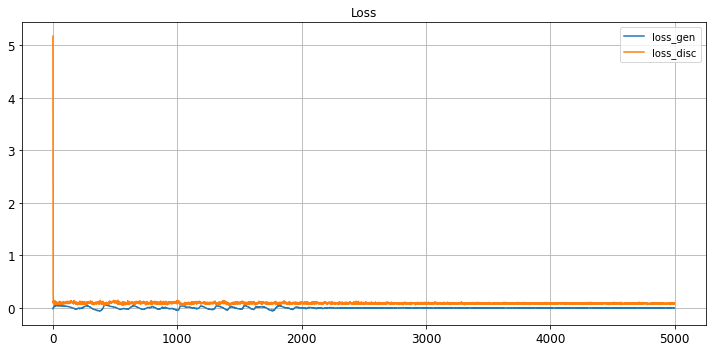

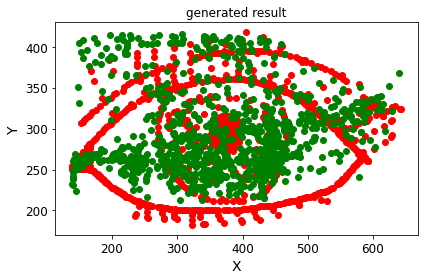

save the model & result
Epoch 5001/50000
critic: 0.084817 - generator: -0.000226 - 0s
Epoch 5002/50000
critic: 0.083124 - generator: 0.000703 - 0s
Epoch 5003/50000
critic: 0.085152 - generator: 0.003174 - 0s
Epoch 5004/50000
critic: 0.088616 - generator: 0.002251 - 0s
Epoch 5005/50000
critic: 0.098066 - generator: 0.005326 - 0s
Epoch 5006/50000
critic: 0.069398 - generator: 0.000560 - 0s
Epoch 5007/50000
critic: 0.083440 - generator: 0.001704 - 0s
Epoch 5008/50000
critic: 0.085279 - generator: 0.000171 - 0s
Epoch 5009/50000
critic: 0.084644 - generator: -0.003564 - 0s
Epoch 5010/50000
critic: 0.075736 - generator: -0.000156 - 0s
Epoch 5011/50000
critic: 0.086090 - generator: -0.001250 - 0s
Epoch 5012/50000
critic: 0.084453 - generator: -0.001473 - 0s
Epoch 5013/50000
critic: 0.092877 - generator: -0.002765 - 0s
Epoch 5014/50000
critic: 0.087502 - generator: -0.001139 - 0s
Epoch 5015/50000
critic: 0.088192 - generator: -0.001570 - 0s
Epoch 5016/50000
critic: 0.087081 - generator: 0.0013

critic: 0.079152 - generator: 0.001517 - 0s
Epoch 5135/50000
critic: 0.076218 - generator: 0.003096 - 0s
Epoch 5136/50000
critic: 0.078043 - generator: -0.000508 - 0s
Epoch 5137/50000
critic: 0.086570 - generator: -0.002003 - 0s
Epoch 5138/50000
critic: 0.075819 - generator: -0.001177 - 0s
Epoch 5139/50000
critic: 0.070693 - generator: -0.000317 - 0s
Epoch 5140/50000
critic: 0.079387 - generator: -0.000489 - 0s
Epoch 5141/50000
critic: 0.085214 - generator: 0.003230 - 0s
Epoch 5142/50000
critic: 0.090582 - generator: -0.000682 - 0s
Epoch 5143/50000
critic: 0.076637 - generator: 0.000139 - 0s
Epoch 5144/50000
critic: 0.078815 - generator: -0.000360 - 0s
Epoch 5145/50000
critic: 0.072077 - generator: -0.000010 - 0s
Epoch 5146/50000
critic: 0.082776 - generator: 0.000282 - 0s
Epoch 5147/50000
critic: 0.086236 - generator: 0.000346 - 0s
Epoch 5148/50000
critic: 0.094477 - generator: 0.000364 - 0s
Epoch 5149/50000
critic: 0.082528 - generator: 0.002548 - 0s
Epoch 5150/50000
critic: 0.079154

critic: 0.079436 - generator: 0.000360 - 0s
Epoch 5269/50000
critic: 0.091729 - generator: -0.000687 - 0s
Epoch 5270/50000
critic: 0.070187 - generator: -0.000712 - 0s
Epoch 5271/50000
critic: 0.094264 - generator: 0.002397 - 0s
Epoch 5272/50000
critic: 0.073193 - generator: -0.001102 - 0s
Epoch 5273/50000
critic: 0.077549 - generator: -0.002490 - 0s
Epoch 5274/50000
critic: 0.081078 - generator: 0.000719 - 0s
Epoch 5275/50000
critic: 0.083836 - generator: -0.000428 - 0s
Epoch 5276/50000
critic: 0.089621 - generator: -0.002911 - 0s
Epoch 5277/50000
critic: 0.090121 - generator: -0.001444 - 0s
Epoch 5278/50000
critic: 0.072090 - generator: -0.001365 - 0s
Epoch 5279/50000
critic: 0.092028 - generator: -0.000616 - 0s
Epoch 5280/50000
critic: 0.079746 - generator: -0.001201 - 0s
Epoch 5281/50000
critic: 0.080511 - generator: -0.001216 - 0s
Epoch 5282/50000
critic: 0.073743 - generator: 0.000506 - 0s
Epoch 5283/50000
critic: 0.082594 - generator: 0.000256 - 0s
Epoch 5284/50000
critic: 0.080

critic: 0.081089 - generator: 0.002070 - 0s
Epoch 5403/50000
critic: 0.080819 - generator: 0.002716 - 0s
Epoch 5404/50000
critic: 0.081767 - generator: -0.000291 - 0s
Epoch 5405/50000
critic: 0.087521 - generator: -0.000627 - 0s
Epoch 5406/50000
critic: 0.088215 - generator: -0.003472 - 0s
Epoch 5407/50000
critic: 0.079394 - generator: 0.001640 - 0s
Epoch 5408/50000
critic: 0.079290 - generator: -0.001583 - 0s
Epoch 5409/50000
critic: 0.079414 - generator: -0.001120 - 0s
Epoch 5410/50000
critic: 0.081889 - generator: 0.001820 - 0s
Epoch 5411/50000
critic: 0.080242 - generator: 0.001565 - 0s
Epoch 5412/50000
critic: 0.090264 - generator: -0.003250 - 0s
Epoch 5413/50000
critic: 0.086605 - generator: -0.000866 - 0s
Epoch 5414/50000
critic: 0.085177 - generator: -0.001757 - 0s
Epoch 5415/50000
critic: 0.076161 - generator: 0.000126 - 0s
Epoch 5416/50000
critic: 0.085231 - generator: 0.005099 - 0s
Epoch 5417/50000
critic: 0.081617 - generator: 0.003288 - 0s
Epoch 5418/50000
critic: 0.074246

critic: 0.079387 - generator: -0.001750 - 0s
Epoch 5537/50000
critic: 0.106160 - generator: -0.000941 - 0s
Epoch 5538/50000
critic: 0.079572 - generator: -0.001083 - 0s
Epoch 5539/50000
critic: 0.087034 - generator: 0.003228 - 0s
Epoch 5540/50000
critic: 0.084529 - generator: -0.002229 - 0s
Epoch 5541/50000
critic: 0.077841 - generator: -0.001249 - 0s
Epoch 5542/50000
critic: 0.084449 - generator: -0.001671 - 0s
Epoch 5543/50000
critic: 0.081418 - generator: -0.002033 - 0s
Epoch 5544/50000
critic: 0.093633 - generator: 0.002015 - 0s
Epoch 5545/50000
critic: 0.099171 - generator: -0.000588 - 0s
Epoch 5546/50000
critic: 0.086062 - generator: -0.000227 - 0s
Epoch 5547/50000
critic: 0.084594 - generator: -0.000208 - 0s
Epoch 5548/50000
critic: 0.086753 - generator: -0.003009 - 0s
Epoch 5549/50000
critic: 0.069295 - generator: -0.000620 - 0s
Epoch 5550/50000
critic: 0.094265 - generator: -0.000108 - 0s
Epoch 5551/50000
critic: 0.069400 - generator: -0.000159 - 0s
Epoch 5552/50000
critic: 0.

critic: 0.088390 - generator: -0.003211 - 0s
Epoch 5671/50000
critic: 0.081230 - generator: -0.000986 - 0s
Epoch 5672/50000
critic: 0.073197 - generator: 0.001637 - 0s
Epoch 5673/50000
critic: 0.081087 - generator: -0.002844 - 0s
Epoch 5674/50000
critic: 0.076409 - generator: -0.003895 - 0s
Epoch 5675/50000
critic: 0.073140 - generator: -0.003572 - 0s
Epoch 5676/50000
critic: 0.082661 - generator: -0.001388 - 0s
Epoch 5677/50000
critic: 0.068992 - generator: 0.005445 - 0s
Epoch 5678/50000
critic: 0.092644 - generator: -0.001561 - 0s
Epoch 5679/50000
critic: 0.094584 - generator: 0.002631 - 0s
Epoch 5680/50000
critic: 0.079176 - generator: 0.000753 - 0s
Epoch 5681/50000
critic: 0.083861 - generator: -0.003292 - 0s
Epoch 5682/50000
critic: 0.081227 - generator: -0.002357 - 0s
Epoch 5683/50000
critic: 0.086188 - generator: -0.003376 - 0s
Epoch 5684/50000
critic: 0.085148 - generator: -0.000251 - 0s
Epoch 5685/50000
critic: 0.092420 - generator: 0.000428 - 0s
Epoch 5686/50000
critic: 0.075

critic: 0.081572 - generator: -0.000978 - 0s
Epoch 5805/50000
critic: 0.086255 - generator: 0.002118 - 0s
Epoch 5806/50000
critic: 0.083861 - generator: 0.000437 - 0s
Epoch 5807/50000
critic: 0.083418 - generator: -0.003622 - 0s
Epoch 5808/50000
critic: 0.085349 - generator: -0.002268 - 0s
Epoch 5809/50000
critic: 0.075800 - generator: 0.001317 - 0s
Epoch 5810/50000
critic: 0.076477 - generator: -0.001462 - 0s
Epoch 5811/50000
critic: 0.078615 - generator: -0.002262 - 0s
Epoch 5812/50000
critic: 0.084156 - generator: -0.001544 - 0s
Epoch 5813/50000
critic: 0.082087 - generator: 0.000821 - 0s
Epoch 5814/50000
critic: 0.088977 - generator: 0.000512 - 0s
Epoch 5815/50000
critic: 0.076397 - generator: -0.002003 - 0s
Epoch 5816/50000
critic: 0.094649 - generator: -0.000650 - 0s
Epoch 5817/50000
critic: 0.073415 - generator: 0.001173 - 0s
Epoch 5818/50000
critic: 0.079424 - generator: -0.001320 - 0s
Epoch 5819/50000
critic: 0.083529 - generator: -0.000740 - 0s
Epoch 5820/50000
critic: 0.0863

critic: 0.080385 - generator: 0.000553 - 0s
Epoch 5939/50000
critic: 0.092740 - generator: 0.000212 - 0s
Epoch 5940/50000
critic: 0.075936 - generator: 0.001147 - 0s
Epoch 5941/50000
critic: 0.082882 - generator: 0.001220 - 0s
Epoch 5942/50000
critic: 0.085299 - generator: -0.000424 - 0s
Epoch 5943/50000
critic: 0.078915 - generator: -0.002330 - 0s
Epoch 5944/50000
critic: 0.083091 - generator: 0.002214 - 0s
Epoch 5945/50000
critic: 0.073785 - generator: 0.000644 - 0s
Epoch 5946/50000
critic: 0.074996 - generator: -0.004413 - 0s
Epoch 5947/50000
critic: 0.087799 - generator: 0.000095 - 0s
Epoch 5948/50000
critic: 0.080761 - generator: 0.000190 - 0s
Epoch 5949/50000
critic: 0.078170 - generator: 0.000712 - 0s
Epoch 5950/50000
critic: 0.080011 - generator: -0.001648 - 0s
Epoch 5951/50000
critic: 0.075174 - generator: 0.001649 - 0s
Epoch 5952/50000
critic: 0.076731 - generator: 0.000523 - 0s
Epoch 5953/50000
critic: 0.088418 - generator: 0.004381 - 0s
Epoch 5954/50000
critic: 0.082974 - g

critic: 0.080419 - generator: 0.004933 - 0s
Epoch 6073/50000
critic: 0.077928 - generator: -0.000590 - 0s
Epoch 6074/50000
critic: 0.078085 - generator: 0.000772 - 0s
Epoch 6075/50000
critic: 0.087129 - generator: -0.003512 - 0s
Epoch 6076/50000
critic: 0.073562 - generator: 0.002640 - 0s
Epoch 6077/50000
critic: 0.086868 - generator: 0.001194 - 0s
Epoch 6078/50000
critic: 0.071473 - generator: 0.000361 - 0s
Epoch 6079/50000
critic: 0.071843 - generator: -0.001573 - 0s
Epoch 6080/50000
critic: 0.092858 - generator: 0.000472 - 0s
Epoch 6081/50000
critic: 0.095170 - generator: -0.001422 - 0s
Epoch 6082/50000
critic: 0.072744 - generator: 0.000890 - 0s
Epoch 6083/50000
critic: 0.082601 - generator: -0.002899 - 0s
Epoch 6084/50000
critic: 0.076182 - generator: 0.000803 - 0s
Epoch 6085/50000
critic: 0.082022 - generator: -0.000367 - 0s
Epoch 6086/50000
critic: 0.085429 - generator: 0.000015 - 0s
Epoch 6087/50000
critic: 0.085571 - generator: 0.000882 - 0s
Epoch 6088/50000
critic: 0.077706 -

critic: 0.084110 - generator: -0.001665 - 0s
Epoch 6207/50000
critic: 0.090345 - generator: -0.001596 - 0s
Epoch 6208/50000
critic: 0.079351 - generator: -0.006444 - 0s
Epoch 6209/50000
critic: 0.079544 - generator: -0.000500 - 0s
Epoch 6210/50000
critic: 0.092799 - generator: -0.000545 - 0s
Epoch 6211/50000
critic: 0.088792 - generator: -0.002465 - 0s
Epoch 6212/50000
critic: 0.085626 - generator: -0.001602 - 0s
Epoch 6213/50000
critic: 0.068317 - generator: -0.002753 - 0s
Epoch 6214/50000
critic: 0.076111 - generator: 0.001252 - 0s
Epoch 6215/50000
critic: 0.096197 - generator: 0.000610 - 0s
Epoch 6216/50000
critic: 0.080278 - generator: 0.000828 - 0s
Epoch 6217/50000
critic: 0.078859 - generator: 0.004031 - 0s
Epoch 6218/50000
critic: 0.079619 - generator: -0.000250 - 0s
Epoch 6219/50000
critic: 0.075409 - generator: 0.000384 - 0s
Epoch 6220/50000
critic: 0.077013 - generator: -0.000506 - 0s
Epoch 6221/50000
critic: 0.084909 - generator: -0.002546 - 0s
Epoch 6222/50000
critic: 0.081

critic: 0.083575 - generator: -0.000179 - 0s
Epoch 6341/50000
critic: 0.083093 - generator: 0.001355 - 0s
Epoch 6342/50000
critic: 0.090749 - generator: 0.002062 - 0s
Epoch 6343/50000
critic: 0.081180 - generator: -0.000097 - 0s
Epoch 6344/50000
critic: 0.089573 - generator: 0.000832 - 0s
Epoch 6345/50000
critic: 0.085378 - generator: 0.002535 - 0s
Epoch 6346/50000
critic: 0.086932 - generator: 0.003634 - 0s
Epoch 6347/50000
critic: 0.080790 - generator: 0.001923 - 0s
Epoch 6348/50000
critic: 0.072102 - generator: 0.001012 - 0s
Epoch 6349/50000
critic: 0.092144 - generator: -0.000079 - 0s
Epoch 6350/50000
critic: 0.083756 - generator: 0.001574 - 0s
Epoch 6351/50000
critic: 0.083855 - generator: 0.001261 - 0s
Epoch 6352/50000
critic: 0.084177 - generator: 0.000949 - 0s
Epoch 6353/50000
critic: 0.071609 - generator: 0.002549 - 0s
Epoch 6354/50000
critic: 0.075852 - generator: -0.002873 - 0s
Epoch 6355/50000
critic: 0.083916 - generator: 0.003543 - 0s
Epoch 6356/50000
critic: 0.083449 - g

critic: 0.079327 - generator: -0.000550 - 0s
Epoch 6475/50000
critic: 0.093494 - generator: 0.004198 - 0s
Epoch 6476/50000
critic: 0.072738 - generator: -0.000326 - 0s
Epoch 6477/50000
critic: 0.079240 - generator: 0.001876 - 0s
Epoch 6478/50000
critic: 0.074483 - generator: 0.001783 - 0s
Epoch 6479/50000
critic: 0.077474 - generator: 0.001657 - 0s
Epoch 6480/50000
critic: 0.084807 - generator: 0.000913 - 0s
Epoch 6481/50000
critic: 0.075840 - generator: 0.000699 - 0s
Epoch 6482/50000
critic: 0.085397 - generator: -0.002998 - 0s
Epoch 6483/50000
critic: 0.094397 - generator: 0.001152 - 0s
Epoch 6484/50000
critic: 0.096813 - generator: -0.001178 - 0s
Epoch 6485/50000
critic: 0.090753 - generator: 0.001105 - 0s
Epoch 6486/50000
critic: 0.094367 - generator: -0.002938 - 0s
Epoch 6487/50000
critic: 0.082466 - generator: 0.000884 - 0s
Epoch 6488/50000
critic: 0.083680 - generator: -0.001355 - 0s
Epoch 6489/50000
critic: 0.091937 - generator: -0.001215 - 0s
Epoch 6490/50000
critic: 0.077435 

critic: 0.080712 - generator: -0.000442 - 0s
Epoch 6609/50000
critic: 0.095909 - generator: 0.001933 - 0s
Epoch 6610/50000
critic: 0.087376 - generator: -0.002429 - 0s
Epoch 6611/50000
critic: 0.088342 - generator: -0.000334 - 0s
Epoch 6612/50000
critic: 0.080880 - generator: -0.000227 - 0s
Epoch 6613/50000
critic: 0.074371 - generator: 0.000295 - 0s
Epoch 6614/50000
critic: 0.082108 - generator: 0.002415 - 0s
Epoch 6615/50000
critic: 0.084337 - generator: 0.003748 - 0s
Epoch 6616/50000
critic: 0.085066 - generator: -0.001495 - 0s
Epoch 6617/50000
critic: 0.079218 - generator: 0.002118 - 0s
Epoch 6618/50000
critic: 0.066678 - generator: -0.000568 - 0s
Epoch 6619/50000
critic: 0.082035 - generator: -0.000399 - 0s
Epoch 6620/50000
critic: 0.087568 - generator: 0.000772 - 0s
Epoch 6621/50000
critic: 0.090001 - generator: 0.002877 - 0s
Epoch 6622/50000
critic: 0.078268 - generator: 0.001483 - 0s
Epoch 6623/50000
critic: 0.083805 - generator: -0.001147 - 0s
Epoch 6624/50000
critic: 0.082970

critic: 0.084284 - generator: 0.000256 - 0s
Epoch 6744/50000
critic: 0.080552 - generator: -0.000072 - 0s
Epoch 6745/50000
critic: 0.082719 - generator: 0.001687 - 0s
Epoch 6746/50000
critic: 0.083658 - generator: -0.001982 - 0s
Epoch 6747/50000
critic: 0.077452 - generator: 0.002817 - 0s
Epoch 6748/50000
critic: 0.074563 - generator: -0.005319 - 0s
Epoch 6749/50000
critic: 0.084890 - generator: -0.003793 - 0s
Epoch 6750/50000
critic: 0.091037 - generator: 0.001920 - 0s
Epoch 6751/50000
critic: 0.087571 - generator: -0.000412 - 0s
Epoch 6752/50000
critic: 0.077584 - generator: 0.001767 - 0s
Epoch 6753/50000
critic: 0.090192 - generator: 0.001653 - 0s
Epoch 6754/50000
critic: 0.073778 - generator: 0.001568 - 0s
Epoch 6755/50000
critic: 0.077834 - generator: 0.001357 - 0s
Epoch 6756/50000
critic: 0.077867 - generator: 0.006920 - 0s
Epoch 6757/50000
critic: 0.093523 - generator: 0.004741 - 0s
Epoch 6758/50000
critic: 0.078861 - generator: 0.005193 - 0s
Epoch 6759/50000
critic: 0.084307 - 

critic: 0.079656 - generator: 0.001377 - 0s
Epoch 6878/50000
critic: 0.079400 - generator: 0.000885 - 0s
Epoch 6879/50000
critic: 0.089544 - generator: -0.001081 - 0s
Epoch 6880/50000
critic: 0.076464 - generator: -0.002074 - 0s
Epoch 6881/50000
critic: 0.087450 - generator: 0.003359 - 0s
Epoch 6882/50000
critic: 0.071467 - generator: 0.002792 - 0s
Epoch 6883/50000
critic: 0.082014 - generator: 0.000839 - 0s
Epoch 6884/50000
critic: 0.091936 - generator: 0.001136 - 0s
Epoch 6885/50000
critic: 0.072558 - generator: -0.000199 - 0s
Epoch 6886/50000
critic: 0.076027 - generator: 0.000388 - 0s
Epoch 6887/50000
critic: 0.087922 - generator: -0.001049 - 0s
Epoch 6888/50000
critic: 0.087113 - generator: -0.002560 - 0s
Epoch 6889/50000
critic: 0.088338 - generator: 0.000528 - 0s
Epoch 6890/50000
critic: 0.081325 - generator: -0.003641 - 0s
Epoch 6891/50000
critic: 0.080648 - generator: 0.000822 - 0s
Epoch 6892/50000
critic: 0.079879 - generator: 0.003003 - 0s
Epoch 6893/50000
critic: 0.078230 -

critic: 0.085631 - generator: 0.000148 - 0s
Epoch 7013/50000
critic: 0.079319 - generator: 0.000617 - 0s
Epoch 7014/50000
critic: 0.080247 - generator: 0.000574 - 0s
Epoch 7015/50000
critic: 0.072047 - generator: 0.000420 - 0s
Epoch 7016/50000
critic: 0.085398 - generator: -0.000187 - 0s
Epoch 7017/50000
critic: 0.077682 - generator: -0.001038 - 0s
Epoch 7018/50000
critic: 0.075807 - generator: -0.000321 - 0s
Epoch 7019/50000
critic: 0.083222 - generator: -0.001042 - 0s
Epoch 7020/50000
critic: 0.075336 - generator: -0.002204 - 0s
Epoch 7021/50000
critic: 0.081664 - generator: -0.000256 - 0s
Epoch 7022/50000
critic: 0.082363 - generator: 0.003598 - 0s
Epoch 7023/50000
critic: 0.087560 - generator: 0.000003 - 0s
Epoch 7024/50000
critic: 0.076709 - generator: 0.002283 - 0s
Epoch 7025/50000
critic: 0.081935 - generator: 0.001195 - 0s
Epoch 7026/50000
critic: 0.079990 - generator: -0.001952 - 0s
Epoch 7027/50000
critic: 0.083944 - generator: 0.000816 - 0s
Epoch 7028/50000
critic: 0.094958 

critic: 0.086639 - generator: -0.002053 - 0s
Epoch 7148/50000
critic: 0.081826 - generator: 0.000062 - 0s
Epoch 7149/50000
critic: 0.084592 - generator: -0.004535 - 0s
Epoch 7150/50000
critic: 0.076603 - generator: -0.003778 - 0s
Epoch 7151/50000
critic: 0.086445 - generator: -0.005954 - 0s
Epoch 7152/50000
critic: 0.080325 - generator: -0.002872 - 0s
Epoch 7153/50000
critic: 0.076802 - generator: -0.003251 - 0s
Epoch 7154/50000
critic: 0.074921 - generator: -0.001785 - 0s
Epoch 7155/50000
critic: 0.080908 - generator: -0.000635 - 0s
Epoch 7156/50000
critic: 0.086965 - generator: -0.001011 - 0s
Epoch 7157/50000
critic: 0.077995 - generator: -0.001996 - 0s
Epoch 7158/50000
critic: 0.080495 - generator: -0.002936 - 0s
Epoch 7159/50000
critic: 0.081320 - generator: 0.000421 - 0s
Epoch 7160/50000
critic: 0.082812 - generator: -0.001303 - 0s
Epoch 7161/50000
critic: 0.075946 - generator: -0.001950 - 0s
Epoch 7162/50000
critic: 0.084749 - generator: -0.001321 - 0s
Epoch 7163/50000
critic: 0.

critic: 0.082962 - generator: -0.001070 - 0s
Epoch 7283/50000
critic: 0.085582 - generator: -0.000809 - 0s
Epoch 7284/50000
critic: 0.092535 - generator: -0.005500 - 0s
Epoch 7285/50000
critic: 0.077597 - generator: 0.000509 - 0s
Epoch 7286/50000
critic: 0.087820 - generator: -0.004407 - 0s
Epoch 7287/50000
critic: 0.079356 - generator: -0.000373 - 0s
Epoch 7288/50000
critic: 0.090341 - generator: 0.000023 - 0s
Epoch 7289/50000
critic: 0.083907 - generator: -0.000295 - 0s
Epoch 7290/50000
critic: 0.078086 - generator: 0.001390 - 0s
Epoch 7291/50000
critic: 0.072597 - generator: 0.002644 - 0s
Epoch 7292/50000
critic: 0.081961 - generator: 0.003444 - 0s
Epoch 7293/50000
critic: 0.072239 - generator: 0.000861 - 0s
Epoch 7294/50000
critic: 0.090342 - generator: 0.002574 - 0s
Epoch 7295/50000
critic: 0.077532 - generator: 0.001857 - 0s
Epoch 7296/50000
critic: 0.085155 - generator: 0.001549 - 0s
Epoch 7297/50000
critic: 0.083710 - generator: 0.001766 - 0s
Epoch 7298/50000
critic: 0.075681 -

critic: 0.085132 - generator: 0.002013 - 0s
Epoch 7417/50000
critic: 0.069733 - generator: 0.002862 - 0s
Epoch 7418/50000
critic: 0.089610 - generator: 0.001519 - 0s
Epoch 7419/50000
critic: 0.075394 - generator: 0.001610 - 0s
Epoch 7420/50000
critic: 0.084175 - generator: -0.001302 - 0s
Epoch 7421/50000
critic: 0.082395 - generator: -0.002518 - 0s
Epoch 7422/50000
critic: 0.087206 - generator: 0.002702 - 0s
Epoch 7423/50000
critic: 0.084527 - generator: 0.000805 - 0s
Epoch 7424/50000
critic: 0.083502 - generator: 0.000147 - 0s
Epoch 7425/50000
critic: 0.076724 - generator: -0.004396 - 0s
Epoch 7426/50000
critic: 0.084244 - generator: 0.000354 - 0s
Epoch 7427/50000
critic: 0.072826 - generator: -0.000282 - 0s
Epoch 7428/50000
critic: 0.089192 - generator: -0.002412 - 0s
Epoch 7429/50000
critic: 0.095453 - generator: 0.000642 - 0s
Epoch 7430/50000
critic: 0.082702 - generator: 0.001387 - 0s
Epoch 7431/50000
critic: 0.082870 - generator: -0.000177 - 0s
Epoch 7432/50000
critic: 0.085628 -

critic: 0.090768 - generator: 0.002979 - 0s
Epoch 7552/50000
critic: 0.089033 - generator: 0.000995 - 0s
Epoch 7553/50000
critic: 0.081013 - generator: 0.006720 - 0s
Epoch 7554/50000
critic: 0.086052 - generator: -0.000015 - 0s
Epoch 7555/50000
critic: 0.079157 - generator: -0.000871 - 0s
Epoch 7556/50000
critic: 0.088906 - generator: -0.000501 - 0s
Epoch 7557/50000
critic: 0.082902 - generator: 0.000822 - 0s
Epoch 7558/50000
critic: 0.095171 - generator: 0.000482 - 0s
Epoch 7559/50000
critic: 0.077307 - generator: 0.001202 - 0s
Epoch 7560/50000
critic: 0.070975 - generator: 0.000927 - 0s
Epoch 7561/50000
critic: 0.084955 - generator: -0.001767 - 0s
Epoch 7562/50000
critic: 0.084203 - generator: 0.000864 - 0s
Epoch 7563/50000
critic: 0.091771 - generator: 0.002878 - 0s
Epoch 7564/50000
critic: 0.082953 - generator: -0.000274 - 0s
Epoch 7565/50000
critic: 0.073686 - generator: -0.001789 - 0s
Epoch 7566/50000
critic: 0.089271 - generator: 0.001062 - 0s
Epoch 7567/50000
critic: 0.074647 -

critic: 0.085410 - generator: 0.002044 - 0s
Epoch 7686/50000
critic: 0.081616 - generator: 0.002334 - 0s
Epoch 7687/50000
critic: 0.089795 - generator: 0.000914 - 0s
Epoch 7688/50000
critic: 0.083799 - generator: -0.002708 - 0s
Epoch 7689/50000
critic: 0.088761 - generator: 0.000618 - 0s
Epoch 7690/50000
critic: 0.079357 - generator: 0.003545 - 0s
Epoch 7691/50000
critic: 0.078681 - generator: 0.002962 - 0s
Epoch 7692/50000
critic: 0.069118 - generator: 0.001924 - 0s
Epoch 7693/50000
critic: 0.087693 - generator: 0.002675 - 0s
Epoch 7694/50000
critic: 0.086352 - generator: 0.002226 - 0s
Epoch 7695/50000
critic: 0.087912 - generator: -0.002005 - 0s
Epoch 7696/50000
critic: 0.084680 - generator: 0.002744 - 0s
Epoch 7697/50000
critic: 0.080612 - generator: -0.002027 - 0s
Epoch 7698/50000
critic: 0.079642 - generator: -0.003043 - 0s
Epoch 7699/50000
critic: 0.085551 - generator: 0.000762 - 0s
Epoch 7700/50000
critic: 0.088166 - generator: -0.002121 - 0s
Epoch 7701/50000
critic: 0.087634 - 

critic: 0.079353 - generator: 0.002104 - 0s
Epoch 7820/50000
critic: 0.089092 - generator: 0.002926 - 0s
Epoch 7821/50000
critic: 0.078814 - generator: 0.002272 - 0s
Epoch 7822/50000
critic: 0.083038 - generator: 0.000576 - 0s
Epoch 7823/50000
critic: 0.083506 - generator: -0.000494 - 0s
Epoch 7824/50000
critic: 0.073317 - generator: 0.000554 - 0s
Epoch 7825/50000
critic: 0.084143 - generator: 0.000898 - 0s
Epoch 7826/50000
critic: 0.087859 - generator: 0.005043 - 0s
Epoch 7827/50000
critic: 0.090060 - generator: -0.000826 - 0s
Epoch 7828/50000
critic: 0.084518 - generator: -0.001618 - 0s
Epoch 7829/50000
critic: 0.074011 - generator: 0.002434 - 0s
Epoch 7830/50000
critic: 0.079764 - generator: 0.001024 - 0s
Epoch 7831/50000
critic: 0.065293 - generator: 0.002332 - 0s
Epoch 7832/50000
critic: 0.082314 - generator: -0.004384 - 0s
Epoch 7833/50000
critic: 0.084329 - generator: -0.002577 - 0s
Epoch 7834/50000
critic: 0.088924 - generator: -0.000058 - 0s
Epoch 7835/50000
critic: 0.083207 -

critic: 0.075385 - generator: 0.000409 - 0s
Epoch 7954/50000
critic: 0.091447 - generator: 0.002695 - 0s
Epoch 7955/50000
critic: 0.087910 - generator: 0.000942 - 0s
Epoch 7956/50000
critic: 0.075254 - generator: -0.000779 - 0s
Epoch 7957/50000
critic: 0.082883 - generator: 0.000202 - 0s
Epoch 7958/50000
critic: 0.078346 - generator: 0.000867 - 0s
Epoch 7959/50000
critic: 0.088928 - generator: -0.001308 - 0s
Epoch 7960/50000
critic: 0.085734 - generator: 0.003350 - 0s
Epoch 7961/50000
critic: 0.090920 - generator: 0.000697 - 0s
Epoch 7962/50000
critic: 0.079915 - generator: -0.004047 - 0s
Epoch 7963/50000
critic: 0.065643 - generator: -0.003322 - 0s
Epoch 7964/50000
critic: 0.082933 - generator: 0.000223 - 0s
Epoch 7965/50000
critic: 0.084598 - generator: -0.000075 - 0s
Epoch 7966/50000
critic: 0.080162 - generator: -0.002655 - 0s
Epoch 7967/50000
critic: 0.071736 - generator: -0.000917 - 0s
Epoch 7968/50000
critic: 0.085656 - generator: -0.000833 - 0s
Epoch 7969/50000
critic: 0.086608

critic: 0.100775 - generator: 0.000761 - 0s
Epoch 8088/50000
critic: 0.077767 - generator: 0.000035 - 0s
Epoch 8089/50000
critic: 0.082131 - generator: -0.002246 - 0s
Epoch 8090/50000
critic: 0.081459 - generator: -0.000458 - 0s
Epoch 8091/50000
critic: 0.077379 - generator: 0.005361 - 0s
Epoch 8092/50000
critic: 0.088645 - generator: -0.003285 - 0s
Epoch 8093/50000
critic: 0.085723 - generator: -0.001719 - 0s
Epoch 8094/50000
critic: 0.075242 - generator: -0.001926 - 0s
Epoch 8095/50000
critic: 0.075424 - generator: -0.001364 - 0s
Epoch 8096/50000
critic: 0.082388 - generator: -0.000367 - 0s
Epoch 8097/50000
critic: 0.089255 - generator: -0.002194 - 0s
Epoch 8098/50000
critic: 0.075281 - generator: 0.001037 - 0s
Epoch 8099/50000
critic: 0.071906 - generator: -0.000914 - 0s
Epoch 8100/50000
critic: 0.075909 - generator: 0.002231 - 0s
Epoch 8101/50000
critic: 0.089583 - generator: -0.002829 - 0s
Epoch 8102/50000
critic: 0.076147 - generator: -0.000135 - 0s
Epoch 8103/50000
critic: 0.079

critic: 0.084046 - generator: -0.001859 - 0s
Epoch 8222/50000
critic: 0.078372 - generator: -0.000535 - 0s
Epoch 8223/50000
critic: 0.088253 - generator: -0.005748 - 0s
Epoch 8224/50000
critic: 0.084050 - generator: -0.001794 - 0s
Epoch 8225/50000
critic: 0.085986 - generator: -0.005098 - 0s
Epoch 8226/50000
critic: 0.081689 - generator: -0.002722 - 0s
Epoch 8227/50000
critic: 0.087607 - generator: -0.001367 - 0s
Epoch 8228/50000
critic: 0.083243 - generator: -0.001577 - 0s
Epoch 8229/50000
critic: 0.077826 - generator: 0.003196 - 0s
Epoch 8230/50000
critic: 0.087082 - generator: 0.001518 - 0s
Epoch 8231/50000
critic: 0.088337 - generator: 0.000238 - 0s
Epoch 8232/50000
critic: 0.086743 - generator: 0.003042 - 0s
Epoch 8233/50000
critic: 0.086935 - generator: 0.000727 - 0s
Epoch 8234/50000
critic: 0.085338 - generator: 0.001776 - 0s
Epoch 8235/50000
critic: 0.089758 - generator: -0.000195 - 0s
Epoch 8236/50000
critic: 0.094849 - generator: -0.003523 - 0s
Epoch 8237/50000
critic: 0.0798

critic: 0.086838 - generator: 0.000508 - 0s
Epoch 8356/50000
critic: 0.080665 - generator: -0.001350 - 0s
Epoch 8357/50000
critic: 0.075499 - generator: 0.000460 - 0s
Epoch 8358/50000
critic: 0.077393 - generator: -0.003547 - 0s
Epoch 8359/50000
critic: 0.082896 - generator: 0.001128 - 0s
Epoch 8360/50000
critic: 0.082742 - generator: 0.002261 - 0s
Epoch 8361/50000
critic: 0.078521 - generator: -0.000607 - 0s
Epoch 8362/50000
critic: 0.085256 - generator: -0.001682 - 0s
Epoch 8363/50000
critic: 0.074711 - generator: 0.000154 - 0s
Epoch 8364/50000
critic: 0.077740 - generator: -0.001249 - 0s
Epoch 8365/50000
critic: 0.082966 - generator: 0.002726 - 0s
Epoch 8366/50000
critic: 0.085167 - generator: 0.000473 - 0s
Epoch 8367/50000
critic: 0.083265 - generator: -0.001447 - 0s
Epoch 8368/50000
critic: 0.079672 - generator: -0.003685 - 0s
Epoch 8369/50000
critic: 0.078540 - generator: -0.004239 - 0s
Epoch 8370/50000
critic: 0.079753 - generator: -0.001918 - 0s
Epoch 8371/50000
critic: 0.08018

critic: 0.077965 - generator: -0.003544 - 0s
Epoch 8490/50000
critic: 0.080812 - generator: -0.002149 - 0s
Epoch 8491/50000
critic: 0.090609 - generator: 0.001685 - 0s
Epoch 8492/50000
critic: 0.078543 - generator: 0.001622 - 0s
Epoch 8493/50000
critic: 0.082796 - generator: 0.001326 - 0s
Epoch 8494/50000
critic: 0.080123 - generator: -0.001601 - 0s
Epoch 8495/50000
critic: 0.078952 - generator: 0.000834 - 0s
Epoch 8496/50000
critic: 0.089166 - generator: -0.001744 - 0s
Epoch 8497/50000
critic: 0.089039 - generator: -0.000188 - 0s
Epoch 8498/50000
critic: 0.080360 - generator: -0.003348 - 0s
Epoch 8499/50000
critic: 0.077881 - generator: 0.000931 - 0s
Epoch 8500/50000
critic: 0.083634 - generator: -0.000276 - 0s
Epoch 8501/50000
critic: 0.082362 - generator: -0.001564 - 0s
Epoch 8502/50000
critic: 0.077716 - generator: 0.000149 - 0s
Epoch 8503/50000
critic: 0.080573 - generator: 0.003364 - 0s
Epoch 8504/50000
critic: 0.082457 - generator: -0.000144 - 0s
Epoch 8505/50000
critic: 0.08112

critic: 0.090571 - generator: 0.000648 - 0s
Epoch 8624/50000
critic: 0.082423 - generator: 0.002380 - 0s
Epoch 8625/50000
critic: 0.076670 - generator: 0.003497 - 0s
Epoch 8626/50000
critic: 0.097199 - generator: 0.001313 - 0s
Epoch 8627/50000
critic: 0.083670 - generator: -0.001841 - 0s
Epoch 8628/50000
critic: 0.087194 - generator: -0.000121 - 0s
Epoch 8629/50000
critic: 0.084316 - generator: -0.000988 - 0s
Epoch 8630/50000
critic: 0.078950 - generator: -0.000471 - 0s
Epoch 8631/50000
critic: 0.082117 - generator: 0.002403 - 0s
Epoch 8632/50000
critic: 0.079487 - generator: -0.000022 - 0s
Epoch 8633/50000
critic: 0.084899 - generator: 0.002422 - 0s
Epoch 8634/50000
critic: 0.084530 - generator: -0.002567 - 0s
Epoch 8635/50000
critic: 0.079152 - generator: -0.003234 - 0s
Epoch 8636/50000
critic: 0.071115 - generator: -0.005083 - 0s
Epoch 8637/50000
critic: 0.082461 - generator: 0.001869 - 0s
Epoch 8638/50000
critic: 0.081205 - generator: 0.001164 - 0s
Epoch 8639/50000
critic: 0.092366

critic: 0.078332 - generator: -0.001590 - 0s
Epoch 8758/50000
critic: 0.081318 - generator: 0.000113 - 0s
Epoch 8759/50000
critic: 0.079288 - generator: -0.001360 - 0s
Epoch 8760/50000
critic: 0.086448 - generator: -0.002052 - 0s
Epoch 8761/50000
critic: 0.096946 - generator: 0.002555 - 0s
Epoch 8762/50000
critic: 0.083496 - generator: 0.003877 - 0s
Epoch 8763/50000
critic: 0.078883 - generator: 0.003817 - 0s
Epoch 8764/50000
critic: 0.084854 - generator: 0.001503 - 0s
Epoch 8765/50000
critic: 0.085179 - generator: 0.003016 - 0s
Epoch 8766/50000
critic: 0.089107 - generator: 0.004715 - 0s
Epoch 8767/50000
critic: 0.080799 - generator: 0.001280 - 0s
Epoch 8768/50000
critic: 0.082360 - generator: 0.001847 - 0s
Epoch 8769/50000
critic: 0.089658 - generator: -0.000114 - 0s
Epoch 8770/50000
critic: 0.081477 - generator: -0.000271 - 0s
Epoch 8771/50000
critic: 0.077235 - generator: -0.001746 - 0s
Epoch 8772/50000
critic: 0.082465 - generator: -0.000224 - 0s
Epoch 8773/50000
critic: 0.082427 

critic: 0.078056 - generator: -0.001261 - 0s
Epoch 8892/50000
critic: 0.075810 - generator: 0.000071 - 0s
Epoch 8893/50000
critic: 0.085856 - generator: 0.000521 - 0s
Epoch 8894/50000
critic: 0.081603 - generator: 0.006035 - 0s
Epoch 8895/50000
critic: 0.082216 - generator: 0.000055 - 0s
Epoch 8896/50000
critic: 0.077317 - generator: 0.000230 - 0s
Epoch 8897/50000
critic: 0.079872 - generator: -0.003255 - 0s
Epoch 8898/50000
critic: 0.085574 - generator: -0.004053 - 0s
Epoch 8899/50000
critic: 0.087088 - generator: -0.001158 - 0s
Epoch 8900/50000
critic: 0.083603 - generator: 0.005830 - 0s
Epoch 8901/50000
critic: 0.071327 - generator: 0.000440 - 0s
Epoch 8902/50000
critic: 0.083358 - generator: -0.002990 - 0s
Epoch 8903/50000
critic: 0.076757 - generator: 0.001187 - 0s
Epoch 8904/50000
critic: 0.082892 - generator: -0.003779 - 0s
Epoch 8905/50000
critic: 0.089718 - generator: -0.000020 - 0s
Epoch 8906/50000
critic: 0.079221 - generator: -0.001879 - 0s
Epoch 8907/50000
critic: 0.087763

critic: 0.087478 - generator: -0.002162 - 0s
Epoch 9026/50000
critic: 0.083915 - generator: -0.001280 - 0s
Epoch 9027/50000
critic: 0.092328 - generator: 0.005009 - 0s
Epoch 9028/50000
critic: 0.078975 - generator: 0.002010 - 0s
Epoch 9029/50000
critic: 0.091387 - generator: -0.004222 - 0s
Epoch 9030/50000
critic: 0.073312 - generator: -0.000643 - 0s
Epoch 9031/50000
critic: 0.097706 - generator: -0.003151 - 0s
Epoch 9032/50000
critic: 0.088240 - generator: -0.001696 - 0s
Epoch 9033/50000
critic: 0.075671 - generator: 0.001608 - 0s
Epoch 9034/50000
critic: 0.080559 - generator: 0.000597 - 0s
Epoch 9035/50000
critic: 0.088956 - generator: 0.000445 - 0s
Epoch 9036/50000
critic: 0.077690 - generator: -0.002143 - 0s
Epoch 9037/50000
critic: 0.090644 - generator: 0.001875 - 0s
Epoch 9038/50000
critic: 0.073463 - generator: 0.001233 - 0s
Epoch 9039/50000
critic: 0.084628 - generator: 0.000944 - 0s
Epoch 9040/50000
critic: 0.083783 - generator: 0.001536 - 0s
Epoch 9041/50000
critic: 0.085985 

critic: 0.095324 - generator: -0.002409 - 0s
Epoch 9161/50000
critic: 0.081916 - generator: -0.003464 - 0s
Epoch 9162/50000
critic: 0.089416 - generator: 0.001817 - 0s
Epoch 9163/50000
critic: 0.084931 - generator: -0.000607 - 0s
Epoch 9164/50000
critic: 0.079828 - generator: -0.000213 - 0s
Epoch 9165/50000
critic: 0.084749 - generator: -0.001873 - 0s
Epoch 9166/50000
critic: 0.087845 - generator: 0.001496 - 0s
Epoch 9167/50000
critic: 0.090300 - generator: -0.002708 - 0s
Epoch 9168/50000
critic: 0.088359 - generator: -0.002197 - 0s
Epoch 9169/50000
critic: 0.081773 - generator: 0.002046 - 0s
Epoch 9170/50000
critic: 0.081920 - generator: 0.000580 - 0s
Epoch 9171/50000
critic: 0.081321 - generator: 0.000020 - 0s
Epoch 9172/50000
critic: 0.081572 - generator: 0.002514 - 0s
Epoch 9173/50000
critic: 0.081783 - generator: 0.000250 - 0s
Epoch 9174/50000
critic: 0.086737 - generator: 0.002121 - 0s
Epoch 9175/50000
critic: 0.097241 - generator: -0.002112 - 0s
Epoch 9176/50000
critic: 0.079270

critic: 0.079477 - generator: 0.000693 - 0s
Epoch 9295/50000
critic: 0.076180 - generator: 0.002933 - 0s
Epoch 9296/50000
critic: 0.080538 - generator: 0.001542 - 0s
Epoch 9297/50000
critic: 0.083830 - generator: 0.002772 - 0s
Epoch 9298/50000
critic: 0.083392 - generator: 0.000077 - 0s
Epoch 9299/50000
critic: 0.079263 - generator: -0.000134 - 0s
Epoch 9300/50000
critic: 0.078468 - generator: -0.000282 - 0s
Epoch 9301/50000
critic: 0.095126 - generator: -0.001273 - 0s
Epoch 9302/50000
critic: 0.082736 - generator: -0.000336 - 0s
Epoch 9303/50000
critic: 0.094721 - generator: -0.000914 - 0s
Epoch 9304/50000
critic: 0.086268 - generator: 0.002716 - 0s
Epoch 9305/50000
critic: 0.074585 - generator: 0.004062 - 0s
Epoch 9306/50000
critic: 0.077114 - generator: 0.002788 - 0s
Epoch 9307/50000
critic: 0.074547 - generator: -0.000268 - 0s
Epoch 9308/50000
critic: 0.088548 - generator: -0.000034 - 0s
Epoch 9309/50000
critic: 0.084869 - generator: -0.002668 - 0s
Epoch 9310/50000
critic: 0.083939

critic: 0.081827 - generator: 0.000794 - 0s
Epoch 9428/50000
critic: 0.084431 - generator: 0.004334 - 0s
Epoch 9429/50000
critic: 0.085407 - generator: 0.003423 - 0s
Epoch 9430/50000
critic: 0.090896 - generator: 0.001641 - 0s
Epoch 9431/50000
critic: 0.083545 - generator: 0.003064 - 0s
Epoch 9432/50000
critic: 0.084010 - generator: 0.006398 - 0s
Epoch 9433/50000
critic: 0.083892 - generator: 0.002914 - 0s
Epoch 9434/50000
critic: 0.079274 - generator: 0.000281 - 0s
Epoch 9435/50000
critic: 0.072580 - generator: 0.002858 - 0s
Epoch 9436/50000
critic: 0.090280 - generator: -0.000675 - 0s
Epoch 9437/50000
critic: 0.086440 - generator: -0.000750 - 0s
Epoch 9438/50000
critic: 0.080840 - generator: -0.003905 - 0s
Epoch 9439/50000
critic: 0.090250 - generator: 0.004423 - 0s
Epoch 9440/50000
critic: 0.081978 - generator: 0.000418 - 0s
Epoch 9441/50000
critic: 0.091278 - generator: 0.002384 - 0s
Epoch 9442/50000
critic: 0.076843 - generator: 0.000516 - 0s
Epoch 9443/50000
critic: 0.071927 - ge

critic: 0.080447 - generator: -0.002132 - 0s
Epoch 9562/50000
critic: 0.089576 - generator: 0.001893 - 0s
Epoch 9563/50000
critic: 0.078296 - generator: 0.001078 - 0s
Epoch 9564/50000
critic: 0.080935 - generator: -0.001719 - 0s
Epoch 9565/50000
critic: 0.080312 - generator: -0.001085 - 0s
Epoch 9566/50000
critic: 0.092530 - generator: 0.001751 - 0s
Epoch 9567/50000
critic: 0.081322 - generator: -0.001913 - 0s
Epoch 9568/50000
critic: 0.082848 - generator: 0.000704 - 0s
Epoch 9569/50000
critic: 0.091002 - generator: -0.004233 - 0s
Epoch 9570/50000
critic: 0.073083 - generator: -0.002289 - 0s
Epoch 9571/50000
critic: 0.074870 - generator: -0.001619 - 0s
Epoch 9572/50000
critic: 0.077378 - generator: -0.002562 - 0s
Epoch 9573/50000
critic: 0.082363 - generator: -0.001466 - 0s
Epoch 9574/50000
critic: 0.083922 - generator: -0.000802 - 0s
Epoch 9575/50000
critic: 0.080362 - generator: 0.000529 - 0s
Epoch 9576/50000
critic: 0.092826 - generator: 0.002071 - 0s
Epoch 9577/50000
critic: 0.0891

critic: 0.082543 - generator: 0.001123 - 0s
Epoch 9697/50000
critic: 0.084022 - generator: 0.001127 - 0s
Epoch 9698/50000
critic: 0.068723 - generator: 0.003194 - 0s
Epoch 9699/50000
critic: 0.078541 - generator: 0.003219 - 0s
Epoch 9700/50000
critic: 0.087526 - generator: 0.001890 - 0s
Epoch 9701/50000
critic: 0.090616 - generator: 0.000858 - 0s
Epoch 9702/50000
critic: 0.080459 - generator: -0.000729 - 0s
Epoch 9703/50000
critic: 0.090068 - generator: -0.001682 - 0s
Epoch 9704/50000
critic: 0.087978 - generator: -0.000273 - 0s
Epoch 9705/50000
critic: 0.078694 - generator: 0.000435 - 0s
Epoch 9706/50000
critic: 0.099055 - generator: 0.000611 - 0s
Epoch 9707/50000
critic: 0.095210 - generator: 0.001990 - 0s
Epoch 9708/50000
critic: 0.071096 - generator: 0.001075 - 0s
Epoch 9709/50000
critic: 0.084893 - generator: 0.001365 - 0s
Epoch 9710/50000
critic: 0.075088 - generator: 0.000986 - 0s
Epoch 9711/50000
critic: 0.082996 - generator: 0.003487 - 0s
Epoch 9712/50000
critic: 0.081523 - ge

critic: 0.086404 - generator: 0.002457 - 0s
Epoch 9831/50000
critic: 0.082057 - generator: -0.000713 - 0s
Epoch 9832/50000
critic: 0.085889 - generator: -0.000348 - 0s
Epoch 9833/50000
critic: 0.078258 - generator: 0.000253 - 0s
Epoch 9834/50000
critic: 0.089358 - generator: -0.002376 - 0s
Epoch 9835/50000
critic: 0.083828 - generator: 0.001888 - 0s
Epoch 9836/50000
critic: 0.087238 - generator: 0.000898 - 0s
Epoch 9837/50000
critic: 0.084670 - generator: -0.001896 - 0s
Epoch 9838/50000
critic: 0.077569 - generator: 0.003393 - 0s
Epoch 9839/50000
critic: 0.078196 - generator: 0.000146 - 0s
Epoch 9840/50000
critic: 0.074218 - generator: 0.001384 - 0s
Epoch 9841/50000
critic: 0.073779 - generator: -0.000577 - 0s
Epoch 9842/50000
critic: 0.080635 - generator: -0.001190 - 0s
Epoch 9843/50000
critic: 0.072354 - generator: -0.001016 - 0s
Epoch 9844/50000
critic: 0.088256 - generator: -0.000375 - 0s
Epoch 9845/50000
critic: 0.084202 - generator: -0.002682 - 0s
Epoch 9846/50000
critic: 0.08079

critic: 0.084706 - generator: 0.002579 - 0s
Epoch 9965/50000
critic: 0.081277 - generator: 0.003876 - 0s
Epoch 9966/50000
critic: 0.074197 - generator: 0.003341 - 0s
Epoch 9967/50000
critic: 0.090115 - generator: -0.000429 - 0s
Epoch 9968/50000
critic: 0.080980 - generator: 0.000905 - 0s
Epoch 9969/50000
critic: 0.080519 - generator: 0.004404 - 0s
Epoch 9970/50000
critic: 0.082453 - generator: 0.001754 - 0s
Epoch 9971/50000
critic: 0.084537 - generator: -0.002615 - 0s
Epoch 9972/50000
critic: 0.079189 - generator: -0.000916 - 0s
Epoch 9973/50000
critic: 0.083120 - generator: -0.003085 - 0s
Epoch 9974/50000
critic: 0.083470 - generator: 0.000593 - 0s
Epoch 9975/50000
critic: 0.088325 - generator: 0.000950 - 0s
Epoch 9976/50000
critic: 0.082012 - generator: 0.002668 - 0s
Epoch 9977/50000
critic: 0.077043 - generator: -0.001044 - 0s
Epoch 9978/50000
critic: 0.090197 - generator: -0.001905 - 0s
Epoch 9979/50000
critic: 0.088367 - generator: -0.003052 - 0s
Epoch 9980/50000
critic: 0.081275 

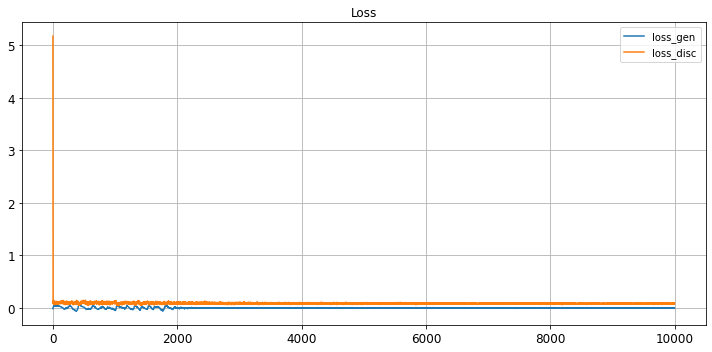

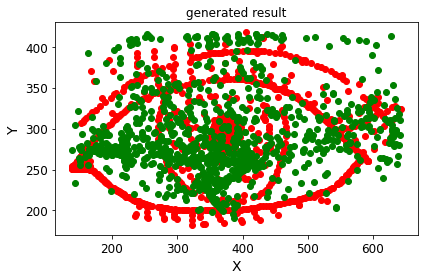

save the model & result
Epoch 10001/50000
critic: 0.074408 - generator: -0.002332 - 0s
Epoch 10002/50000
critic: 0.085192 - generator: -0.000027 - 0s
Epoch 10003/50000
critic: 0.076624 - generator: -0.003261 - 0s
Epoch 10004/50000
critic: 0.084439 - generator: -0.001643 - 0s
Epoch 10005/50000
critic: 0.081395 - generator: -0.005227 - 0s
Epoch 10006/50000
critic: 0.084741 - generator: -0.002076 - 0s
Epoch 10007/50000
critic: 0.077336 - generator: -0.000133 - 0s
Epoch 10008/50000
critic: 0.078450 - generator: 0.000036 - 0s
Epoch 10009/50000
critic: 0.077583 - generator: 0.003263 - 0s
Epoch 10010/50000
critic: 0.079978 - generator: -0.002189 - 0s
Epoch 10011/50000
critic: 0.074780 - generator: -0.001779 - 0s
Epoch 10012/50000
critic: 0.083895 - generator: -0.003061 - 0s
Epoch 10013/50000
critic: 0.080198 - generator: -0.000719 - 0s
Epoch 10014/50000
critic: 0.080697 - generator: -0.003183 - 0s
Epoch 10015/50000
critic: 0.081437 - generator: 0.000136 - 0s
Epoch 10016/50000
critic: 0.068798

critic: 0.075397 - generator: -0.000104 - 0s
Epoch 10133/50000
critic: 0.081013 - generator: 0.002038 - 0s
Epoch 10134/50000
critic: 0.062759 - generator: 0.001099 - 0s
Epoch 10135/50000
critic: 0.081514 - generator: -0.000963 - 0s
Epoch 10136/50000
critic: 0.074278 - generator: -0.002590 - 0s
Epoch 10137/50000
critic: 0.080459 - generator: -0.001652 - 0s
Epoch 10138/50000
critic: 0.074614 - generator: -0.001375 - 0s
Epoch 10139/50000
critic: 0.079643 - generator: 0.001024 - 0s
Epoch 10140/50000
critic: 0.081605 - generator: 0.001536 - 0s
Epoch 10141/50000
critic: 0.083966 - generator: -0.001765 - 0s
Epoch 10142/50000
critic: 0.085549 - generator: -0.001186 - 0s
Epoch 10143/50000
critic: 0.077826 - generator: -0.001566 - 0s
Epoch 10144/50000
critic: 0.078558 - generator: -0.001499 - 0s
Epoch 10145/50000
critic: 0.084832 - generator: -0.002399 - 0s
Epoch 10146/50000
critic: 0.079480 - generator: -0.001894 - 0s
Epoch 10147/50000
critic: 0.081112 - generator: -0.002198 - 0s
Epoch 10148/50

critic: 0.078616 - generator: 0.001476 - 0s
Epoch 10264/50000
critic: 0.087532 - generator: 0.002203 - 0s
Epoch 10265/50000
critic: 0.084271 - generator: -0.003978 - 0s
Epoch 10266/50000
critic: 0.073164 - generator: -0.006083 - 0s
Epoch 10267/50000
critic: 0.087052 - generator: 0.003195 - 0s
Epoch 10268/50000
critic: 0.080796 - generator: 0.002672 - 0s
Epoch 10269/50000
critic: 0.075409 - generator: 0.001664 - 0s
Epoch 10270/50000
critic: 0.085405 - generator: 0.001634 - 0s
Epoch 10271/50000
critic: 0.093981 - generator: -0.001989 - 0s
Epoch 10272/50000
critic: 0.082830 - generator: 0.000679 - 0s
Epoch 10273/50000
critic: 0.077238 - generator: -0.001407 - 0s
Epoch 10274/50000
critic: 0.083596 - generator: -0.001598 - 0s
Epoch 10275/50000
critic: 0.086758 - generator: -0.001557 - 0s
Epoch 10276/50000
critic: 0.073689 - generator: -0.004869 - 0s
Epoch 10277/50000
critic: 0.081621 - generator: -0.004614 - 0s
Epoch 10278/50000
critic: 0.087991 - generator: -0.001992 - 0s
Epoch 10279/50000

critic: 0.078248 - generator: -0.001304 - 0s
Epoch 10396/50000
critic: 0.077190 - generator: -0.001243 - 0s
Epoch 10397/50000
critic: 0.081201 - generator: 0.000127 - 0s
Epoch 10398/50000
critic: 0.077346 - generator: 0.003825 - 0s
Epoch 10399/50000
critic: 0.077516 - generator: 0.003633 - 0s
Epoch 10400/50000
critic: 0.088905 - generator: 0.002521 - 0s
Epoch 10401/50000
critic: 0.087277 - generator: 0.001550 - 0s
Epoch 10402/50000
critic: 0.088458 - generator: -0.001409 - 0s
Epoch 10403/50000
critic: 0.083811 - generator: -0.001045 - 0s
Epoch 10404/50000
critic: 0.096348 - generator: -0.005059 - 0s
Epoch 10405/50000
critic: 0.077358 - generator: 0.001627 - 0s
Epoch 10406/50000
critic: 0.081640 - generator: -0.001896 - 0s
Epoch 10407/50000
critic: 0.087912 - generator: -0.002052 - 0s
Epoch 10408/50000
critic: 0.077528 - generator: 0.001950 - 0s
Epoch 10409/50000
critic: 0.080995 - generator: 0.001920 - 0s
Epoch 10410/50000
critic: 0.080124 - generator: 0.002422 - 0s
Epoch 10411/50000
c

critic: 0.092507 - generator: -0.000647 - 0s
Epoch 10528/50000
critic: 0.067086 - generator: 0.001283 - 0s
Epoch 10529/50000
critic: 0.076155 - generator: -0.000405 - 0s
Epoch 10530/50000
critic: 0.078625 - generator: -0.002525 - 0s
Epoch 10531/50000
critic: 0.087963 - generator: -0.000980 - 0s
Epoch 10532/50000
critic: 0.087897 - generator: 0.000293 - 0s
Epoch 10533/50000
critic: 0.080339 - generator: 0.002777 - 0s
Epoch 10534/50000
critic: 0.090904 - generator: -0.000239 - 0s
Epoch 10535/50000
critic: 0.088267 - generator: -0.000358 - 0s
Epoch 10536/50000
critic: 0.073099 - generator: -0.000259 - 0s
Epoch 10537/50000
critic: 0.081814 - generator: -0.000431 - 0s
Epoch 10538/50000
critic: 0.077272 - generator: -0.003425 - 0s
Epoch 10539/50000
critic: 0.079970 - generator: -0.003458 - 0s
Epoch 10540/50000
critic: 0.081349 - generator: 0.001453 - 0s
Epoch 10541/50000
critic: 0.083856 - generator: -0.002934 - 0s
Epoch 10542/50000
critic: 0.087817 - generator: 0.001151 - 0s
Epoch 10543/500

critic: 0.074455 - generator: -0.001338 - 0s
Epoch 10659/50000
critic: 0.073139 - generator: -0.001212 - 0s
Epoch 10660/50000
critic: 0.079810 - generator: -0.004892 - 0s
Epoch 10661/50000
critic: 0.084498 - generator: 0.000845 - 0s
Epoch 10662/50000
critic: 0.084106 - generator: -0.000080 - 0s
Epoch 10663/50000
critic: 0.081139 - generator: 0.000639 - 0s
Epoch 10664/50000
critic: 0.074083 - generator: 0.001780 - 0s
Epoch 10665/50000
critic: 0.079551 - generator: 0.001996 - 0s
Epoch 10666/50000
critic: 0.072826 - generator: 0.004053 - 0s
Epoch 10667/50000
critic: 0.095362 - generator: 0.001768 - 0s
Epoch 10668/50000
critic: 0.068710 - generator: -0.000837 - 0s
Epoch 10669/50000
critic: 0.078906 - generator: 0.002042 - 0s
Epoch 10670/50000
critic: 0.083340 - generator: 0.002268 - 0s
Epoch 10671/50000
critic: 0.078228 - generator: 0.001512 - 0s
Epoch 10672/50000
critic: 0.079337 - generator: 0.000408 - 0s
Epoch 10673/50000
critic: 0.077616 - generator: -0.002981 - 0s
Epoch 10674/50000
cr

critic: 0.082719 - generator: 0.001580 - 0s
Epoch 10791/50000
critic: 0.085969 - generator: 0.001951 - 0s
Epoch 10792/50000
critic: 0.090564 - generator: 0.003261 - 0s
Epoch 10793/50000
critic: 0.080912 - generator: 0.001843 - 0s
Epoch 10794/50000
critic: 0.083242 - generator: -0.001573 - 0s
Epoch 10795/50000
critic: 0.075612 - generator: 0.001446 - 0s
Epoch 10796/50000
critic: 0.080279 - generator: 0.001247 - 0s
Epoch 10797/50000
critic: 0.084515 - generator: 0.001016 - 0s
Epoch 10798/50000
critic: 0.094352 - generator: -0.001420 - 0s
Epoch 10799/50000
critic: 0.080878 - generator: -0.000896 - 0s
Epoch 10800/50000
critic: 0.088715 - generator: 0.001783 - 0s
Epoch 10801/50000
critic: 0.084759 - generator: -0.001543 - 0s
Epoch 10802/50000
critic: 0.078157 - generator: -0.000535 - 0s
Epoch 10803/50000
critic: 0.073927 - generator: 0.001772 - 0s
Epoch 10804/50000
critic: 0.078945 - generator: 0.000887 - 0s
Epoch 10805/50000
critic: 0.086148 - generator: -0.000153 - 0s
Epoch 10806/50000
cr

critic: 0.077034 - generator: -0.000707 - 0s
Epoch 10923/50000
critic: 0.086971 - generator: 0.000379 - 0s
Epoch 10924/50000
critic: 0.082159 - generator: 0.002005 - 0s
Epoch 10925/50000
critic: 0.093754 - generator: -0.000816 - 0s
Epoch 10926/50000
critic: 0.094170 - generator: 0.000664 - 0s
Epoch 10927/50000
critic: 0.089334 - generator: 0.000851 - 0s
Epoch 10928/50000
critic: 0.087269 - generator: 0.000281 - 0s
Epoch 10929/50000
critic: 0.089134 - generator: 0.000721 - 0s
Epoch 10930/50000
critic: 0.083490 - generator: 0.001074 - 0s
Epoch 10931/50000
critic: 0.076262 - generator: 0.002809 - 0s
Epoch 10932/50000
critic: 0.082660 - generator: 0.002679 - 0s
Epoch 10933/50000
critic: 0.091822 - generator: -0.000826 - 0s
Epoch 10934/50000
critic: 0.080117 - generator: -0.000273 - 0s
Epoch 10935/50000
critic: 0.087443 - generator: 0.000606 - 0s
Epoch 10936/50000
critic: 0.076854 - generator: -0.003643 - 0s
Epoch 10937/50000
critic: 0.083839 - generator: -0.002072 - 0s
Epoch 10938/50000
cr

critic: 0.082327 - generator: -0.002357 - 0s
Epoch 11055/50000
critic: 0.088768 - generator: -0.000037 - 0s
Epoch 11056/50000
critic: 0.080844 - generator: 0.004601 - 0s
Epoch 11057/50000
critic: 0.081146 - generator: -0.000033 - 0s
Epoch 11058/50000
critic: 0.075901 - generator: 0.002915 - 0s
Epoch 11059/50000
critic: 0.094825 - generator: 0.004238 - 0s
Epoch 11060/50000
critic: 0.076219 - generator: -0.002298 - 0s
Epoch 11061/50000
critic: 0.081565 - generator: -0.001219 - 0s
Epoch 11062/50000
critic: 0.090843 - generator: 0.001799 - 0s
Epoch 11063/50000
critic: 0.088938 - generator: -0.005223 - 0s
Epoch 11064/50000
critic: 0.077525 - generator: -0.003229 - 0s
Epoch 11065/50000
critic: 0.088732 - generator: 0.001173 - 0s
Epoch 11066/50000
critic: 0.072371 - generator: -0.000742 - 0s
Epoch 11067/50000
critic: 0.081582 - generator: -0.005713 - 0s
Epoch 11068/50000
critic: 0.086243 - generator: -0.000060 - 0s
Epoch 11069/50000
critic: 0.085082 - generator: 0.001223 - 0s
Epoch 11070/5000

critic: 0.088223 - generator: 0.002193 - 0s
Epoch 11187/50000
critic: 0.086704 - generator: -0.000066 - 0s
Epoch 11188/50000
critic: 0.085010 - generator: 0.003138 - 0s
Epoch 11189/50000
critic: 0.083868 - generator: 0.000178 - 0s
Epoch 11190/50000
critic: 0.086436 - generator: -0.000586 - 0s
Epoch 11191/50000
critic: 0.075122 - generator: -0.003129 - 0s
Epoch 11192/50000
critic: 0.081045 - generator: 0.000223 - 0s
Epoch 11193/50000
critic: 0.077305 - generator: -0.000930 - 0s
Epoch 11194/50000
critic: 0.087589 - generator: -0.001844 - 0s
Epoch 11195/50000
critic: 0.080885 - generator: 0.000069 - 0s
Epoch 11196/50000
critic: 0.087600 - generator: -0.003467 - 0s
Epoch 11197/50000
critic: 0.076326 - generator: 0.000968 - 0s
Epoch 11198/50000
critic: 0.077885 - generator: 0.000878 - 0s
Epoch 11199/50000
critic: 0.070977 - generator: -0.003244 - 0s
Epoch 11200/50000
critic: 0.082825 - generator: -0.004410 - 0s
Epoch 11201/50000
critic: 0.084314 - generator: -0.002193 - 0s
Epoch 11202/50000

critic: 0.080207 - generator: 0.001812 - 0s
Epoch 11318/50000
critic: 0.084129 - generator: 0.000269 - 0s
Epoch 11319/50000
critic: 0.084493 - generator: -0.003495 - 0s
Epoch 11320/50000
critic: 0.075059 - generator: -0.000353 - 0s
Epoch 11321/50000
critic: 0.079459 - generator: 0.000260 - 0s
Epoch 11322/50000
critic: 0.072648 - generator: -0.000402 - 0s
Epoch 11323/50000
critic: 0.082473 - generator: -0.001022 - 0s
Epoch 11324/50000
critic: 0.079140 - generator: 0.004695 - 0s
Epoch 11325/50000
critic: 0.088125 - generator: -0.000852 - 0s
Epoch 11326/50000
critic: 0.077936 - generator: 0.003574 - 0s
Epoch 11327/50000
critic: 0.080639 - generator: 0.001254 - 0s
Epoch 11328/50000
critic: 0.081923 - generator: 0.002443 - 0s
Epoch 11329/50000
critic: 0.091735 - generator: -0.003956 - 0s
Epoch 11330/50000
critic: 0.084167 - generator: 0.000322 - 0s
Epoch 11331/50000
critic: 0.081194 - generator: 0.003622 - 0s
Epoch 11332/50000
critic: 0.077719 - generator: 0.000790 - 0s
Epoch 11333/50000
cr

critic: 0.084630 - generator: 0.000931 - 0s
Epoch 11450/50000
critic: 0.079263 - generator: 0.003168 - 0s
Epoch 11451/50000
critic: 0.077437 - generator: 0.003332 - 0s
Epoch 11452/50000
critic: 0.086408 - generator: 0.002870 - 0s
Epoch 11453/50000
critic: 0.074844 - generator: 0.001316 - 0s
Epoch 11454/50000
critic: 0.089955 - generator: 0.000830 - 0s
Epoch 11455/50000
critic: 0.085909 - generator: -0.000948 - 0s
Epoch 11456/50000
critic: 0.083615 - generator: 0.000835 - 0s
Epoch 11457/50000
critic: 0.082875 - generator: -0.000440 - 0s
Epoch 11458/50000
critic: 0.082650 - generator: -0.001851 - 0s
Epoch 11459/50000
critic: 0.086088 - generator: -0.002350 - 0s
Epoch 11460/50000
critic: 0.074458 - generator: 0.000913 - 0s
Epoch 11461/50000
critic: 0.077430 - generator: -0.000293 - 0s
Epoch 11462/50000
critic: 0.073728 - generator: -0.000700 - 0s
Epoch 11463/50000
critic: 0.070237 - generator: 0.000464 - 0s
Epoch 11464/50000
critic: 0.090622 - generator: -0.003315 - 0s
Epoch 11465/50000
c

critic: 0.086780 - generator: -0.001515 - 0s
Epoch 11582/50000
critic: 0.084580 - generator: -0.001000 - 0s
Epoch 11583/50000
critic: 0.083297 - generator: 0.000854 - 0s
Epoch 11584/50000
critic: 0.081863 - generator: -0.000821 - 0s
Epoch 11585/50000
critic: 0.082129 - generator: -0.001087 - 0s
Epoch 11586/50000
critic: 0.077873 - generator: -0.001438 - 0s
Epoch 11587/50000
critic: 0.082677 - generator: -0.002634 - 0s
Epoch 11588/50000
critic: 0.081536 - generator: -0.001906 - 0s
Epoch 11589/50000
critic: 0.073049 - generator: 0.000669 - 0s
Epoch 11590/50000
critic: 0.078489 - generator: -0.002277 - 0s
Epoch 11591/50000
critic: 0.070541 - generator: -0.001819 - 0s
Epoch 11592/50000
critic: 0.087684 - generator: 0.001649 - 0s
Epoch 11593/50000
critic: 0.078784 - generator: 0.001109 - 0s
Epoch 11594/50000
critic: 0.074768 - generator: -0.001903 - 0s
Epoch 11595/50000
critic: 0.090480 - generator: -0.002424 - 0s
Epoch 11596/50000
critic: 0.084402 - generator: -0.001967 - 0s
Epoch 11597/50

critic: 0.075670 - generator: 0.004469 - 0s
Epoch 11714/50000
critic: 0.074193 - generator: 0.000017 - 0s
Epoch 11715/50000
critic: 0.080596 - generator: -0.000971 - 0s
Epoch 11716/50000
critic: 0.080825 - generator: -0.001076 - 0s
Epoch 11717/50000
critic: 0.074670 - generator: 0.001668 - 0s
Epoch 11718/50000
critic: 0.078641 - generator: -0.003284 - 0s
Epoch 11719/50000
critic: 0.085316 - generator: 0.003041 - 0s
Epoch 11720/50000
critic: 0.076245 - generator: 0.002888 - 0s
Epoch 11721/50000
critic: 0.074407 - generator: 0.001660 - 0s
Epoch 11722/50000
critic: 0.081837 - generator: 0.002586 - 0s
Epoch 11723/50000
critic: 0.083955 - generator: 0.000055 - 0s
Epoch 11724/50000
critic: 0.082040 - generator: -0.000506 - 0s
Epoch 11725/50000
critic: 0.085071 - generator: 0.002179 - 0s
Epoch 11726/50000
critic: 0.080351 - generator: -0.000856 - 0s
Epoch 11727/50000
critic: 0.076978 - generator: 0.001776 - 0s
Epoch 11728/50000
critic: 0.075358 - generator: -0.001168 - 0s
Epoch 11729/50000
cr

critic: 0.087388 - generator: -0.002470 - 0s
Epoch 11845/50000
critic: 0.077317 - generator: -0.001112 - 0s
Epoch 11846/50000
critic: 0.081957 - generator: -0.000060 - 0s
Epoch 11847/50000
critic: 0.082324 - generator: -0.001652 - 0s
Epoch 11848/50000
critic: 0.083202 - generator: -0.001277 - 0s
Epoch 11849/50000
critic: 0.077110 - generator: 0.000374 - 0s
Epoch 11850/50000
critic: 0.084216 - generator: -0.001412 - 0s
Epoch 11851/50000
critic: 0.073456 - generator: 0.000511 - 0s
Epoch 11852/50000
critic: 0.083761 - generator: -0.000699 - 0s
Epoch 11853/50000
critic: 0.095543 - generator: -0.003871 - 0s
Epoch 11854/50000
critic: 0.076765 - generator: -0.001117 - 0s
Epoch 11855/50000
critic: 0.086568 - generator: -0.002282 - 0s
Epoch 11856/50000
critic: 0.080877 - generator: 0.003028 - 0s
Epoch 11857/50000
critic: 0.080275 - generator: 0.001218 - 0s
Epoch 11858/50000
critic: 0.078007 - generator: 0.000370 - 0s
Epoch 11859/50000
critic: 0.086351 - generator: 0.001210 - 0s
Epoch 11860/5000

critic: 0.084861 - generator: -0.001689 - 0s
Epoch 11977/50000
critic: 0.087513 - generator: 0.000209 - 0s
Epoch 11978/50000
critic: 0.077534 - generator: 0.000915 - 0s
Epoch 11979/50000
critic: 0.079220 - generator: -0.000680 - 0s
Epoch 11980/50000
critic: 0.085782 - generator: -0.000782 - 0s
Epoch 11981/50000
critic: 0.074255 - generator: -0.003233 - 0s
Epoch 11982/50000
critic: 0.079562 - generator: -0.000557 - 0s
Epoch 11983/50000
critic: 0.084592 - generator: -0.000441 - 0s
Epoch 11984/50000
critic: 0.079236 - generator: -0.002758 - 0s
Epoch 11985/50000
critic: 0.079389 - generator: 0.003088 - 0s
Epoch 11986/50000
critic: 0.080424 - generator: 0.001124 - 0s
Epoch 11987/50000
critic: 0.083758 - generator: 0.002259 - 0s
Epoch 11988/50000
critic: 0.096357 - generator: -0.001213 - 0s
Epoch 11989/50000
critic: 0.077816 - generator: 0.000589 - 0s
Epoch 11990/50000
critic: 0.083983 - generator: 0.004333 - 0s
Epoch 11991/50000
critic: 0.088390 - generator: -0.000941 - 0s
Epoch 11992/50000

critic: 0.084369 - generator: -0.003371 - 0s
Epoch 12108/50000
critic: 0.069659 - generator: -0.003475 - 0s
Epoch 12109/50000
critic: 0.094073 - generator: -0.000221 - 0s
Epoch 12110/50000
critic: 0.083112 - generator: -0.000749 - 0s
Epoch 12111/50000
critic: 0.079857 - generator: -0.000803 - 0s
Epoch 12112/50000
critic: 0.089412 - generator: -0.001618 - 0s
Epoch 12113/50000
critic: 0.078573 - generator: -0.000947 - 0s
Epoch 12114/50000
critic: 0.075969 - generator: -0.001892 - 0s
Epoch 12115/50000
critic: 0.080152 - generator: -0.000258 - 0s
Epoch 12116/50000
critic: 0.082300 - generator: -0.005607 - 0s
Epoch 12117/50000
critic: 0.074234 - generator: -0.001878 - 0s
Epoch 12118/50000
critic: 0.079021 - generator: -0.002692 - 0s
Epoch 12119/50000
critic: 0.076637 - generator: 0.003240 - 0s
Epoch 12120/50000
critic: 0.089989 - generator: -0.000628 - 0s
Epoch 12121/50000
critic: 0.082089 - generator: -0.004777 - 0s
Epoch 12122/50000
critic: 0.081985 - generator: -0.000026 - 0s
Epoch 12123

critic: 0.080851 - generator: -0.002278 - 0s
Epoch 12239/50000
critic: 0.096781 - generator: 0.001453 - 0s
Epoch 12240/50000
critic: 0.078732 - generator: -0.000493 - 0s
Epoch 12241/50000
critic: 0.072299 - generator: -0.001226 - 0s
Epoch 12242/50000
critic: 0.077060 - generator: -0.002272 - 0s
Epoch 12243/50000
critic: 0.072587 - generator: 0.000449 - 0s
Epoch 12244/50000
critic: 0.087081 - generator: -0.002982 - 0s
Epoch 12245/50000
critic: 0.079927 - generator: -0.004028 - 0s
Epoch 12246/50000
critic: 0.091266 - generator: 0.004000 - 0s
Epoch 12247/50000
critic: 0.085815 - generator: -0.000986 - 0s
Epoch 12248/50000
critic: 0.086054 - generator: -0.002042 - 0s
Epoch 12249/50000
critic: 0.083891 - generator: 0.000659 - 0s
Epoch 12250/50000
critic: 0.081028 - generator: 0.001096 - 0s
Epoch 12251/50000
critic: 0.081896 - generator: -0.000328 - 0s
Epoch 12252/50000
critic: 0.074525 - generator: -0.001763 - 0s
Epoch 12253/50000
critic: 0.079106 - generator: -0.000863 - 0s
Epoch 12254/500

critic: 0.089928 - generator: 0.002005 - 0s
Epoch 12371/50000
critic: 0.075550 - generator: -0.002637 - 0s
Epoch 12372/50000
critic: 0.087263 - generator: -0.002679 - 0s
Epoch 12373/50000
critic: 0.078720 - generator: -0.000839 - 0s
Epoch 12374/50000
critic: 0.076808 - generator: 0.001126 - 0s
Epoch 12375/50000
critic: 0.086104 - generator: 0.001606 - 0s
Epoch 12376/50000
critic: 0.076892 - generator: 0.001296 - 0s
Epoch 12377/50000
critic: 0.073260 - generator: 0.002024 - 0s
Epoch 12378/50000
critic: 0.080787 - generator: 0.004435 - 0s
Epoch 12379/50000
critic: 0.074400 - generator: 0.005938 - 0s
Epoch 12380/50000
critic: 0.070788 - generator: 0.001955 - 0s
Epoch 12381/50000
critic: 0.082020 - generator: 0.002974 - 0s
Epoch 12382/50000
critic: 0.077703 - generator: -0.001387 - 0s
Epoch 12383/50000
critic: 0.072084 - generator: 0.000958 - 0s
Epoch 12384/50000
critic: 0.089209 - generator: -0.003079 - 0s
Epoch 12385/50000
critic: 0.080215 - generator: -0.000882 - 0s
Epoch 12386/50000
cr

critic: 0.088160 - generator: -0.001551 - 0s
Epoch 12503/50000
critic: 0.082631 - generator: 0.002877 - 0s
Epoch 12504/50000
critic: 0.074388 - generator: -0.001476 - 0s
Epoch 12505/50000
critic: 0.083816 - generator: 0.002176 - 0s
Epoch 12506/50000
critic: 0.084908 - generator: -0.000589 - 0s
Epoch 12507/50000
critic: 0.081390 - generator: -0.001145 - 0s
Epoch 12508/50000
critic: 0.083862 - generator: -0.001808 - 0s
Epoch 12509/50000
critic: 0.076511 - generator: -0.003068 - 0s
Epoch 12510/50000
critic: 0.076236 - generator: 0.000088 - 0s
Epoch 12511/50000
critic: 0.081274 - generator: 0.002989 - 0s
Epoch 12512/50000
critic: 0.073464 - generator: 0.000562 - 0s
Epoch 12513/50000
critic: 0.082507 - generator: -0.003838 - 0s
Epoch 12514/50000
critic: 0.091823 - generator: -0.002639 - 0s
Epoch 12515/50000
critic: 0.084692 - generator: -0.001353 - 0s
Epoch 12516/50000
critic: 0.077884 - generator: -0.000241 - 0s
Epoch 12517/50000
critic: 0.073105 - generator: 0.000627 - 0s
Epoch 12518/5000

critic: 0.086244 - generator: -0.003941 - 0s
Epoch 12636/50000
critic: 0.074997 - generator: 0.000833 - 0s
Epoch 12637/50000
critic: 0.082547 - generator: -0.001676 - 0s
Epoch 12638/50000
critic: 0.075515 - generator: 0.001041 - 0s
Epoch 12639/50000
critic: 0.085616 - generator: -0.002746 - 0s
Epoch 12640/50000
critic: 0.085686 - generator: -0.002075 - 0s
Epoch 12641/50000
critic: 0.077631 - generator: -0.002524 - 0s
Epoch 12642/50000
critic: 0.084982 - generator: 0.000541 - 0s
Epoch 12643/50000
critic: 0.088724 - generator: 0.003982 - 0s
Epoch 12644/50000
critic: 0.072581 - generator: 0.002630 - 0s
Epoch 12645/50000
critic: 0.089102 - generator: 0.004462 - 0s
Epoch 12646/50000
critic: 0.071487 - generator: -0.000766 - 0s
Epoch 12647/50000
critic: 0.087785 - generator: -0.002797 - 0s
Epoch 12648/50000
critic: 0.077323 - generator: -0.001970 - 0s
Epoch 12649/50000
critic: 0.078897 - generator: -0.005732 - 0s
Epoch 12650/50000
critic: 0.071604 - generator: -0.003364 - 0s
Epoch 12651/5000

critic: 0.075274 - generator: -0.000523 - 0s
Epoch 12769/50000
critic: 0.082941 - generator: -0.003474 - 0s
Epoch 12770/50000
critic: 0.080107 - generator: -0.002444 - 0s
Epoch 12771/50000
critic: 0.080446 - generator: -0.002021 - 0s
Epoch 12772/50000
critic: 0.078719 - generator: -0.000967 - 0s
Epoch 12773/50000
critic: 0.080118 - generator: -0.000336 - 0s
Epoch 12774/50000
critic: 0.086174 - generator: -0.001652 - 0s
Epoch 12775/50000
critic: 0.081537 - generator: -0.003132 - 0s
Epoch 12776/50000
critic: 0.082774 - generator: -0.001520 - 0s
Epoch 12777/50000
critic: 0.089235 - generator: -0.000035 - 0s
Epoch 12778/50000
critic: 0.075031 - generator: 0.001639 - 0s
Epoch 12779/50000
critic: 0.072319 - generator: 0.004242 - 0s
Epoch 12780/50000
critic: 0.084298 - generator: 0.007435 - 0s
Epoch 12781/50000
critic: 0.081033 - generator: 0.002087 - 0s
Epoch 12782/50000
critic: 0.079895 - generator: 0.002188 - 0s
Epoch 12783/50000
critic: 0.082949 - generator: -0.003350 - 0s
Epoch 12784/500

critic: 0.090455 - generator: -0.003321 - 0s
Epoch 12901/50000
critic: 0.094364 - generator: -0.000737 - 0s
Epoch 12902/50000
critic: 0.082958 - generator: -0.003790 - 0s
Epoch 12903/50000
critic: 0.088626 - generator: -0.001205 - 0s
Epoch 12904/50000
critic: 0.080706 - generator: 0.003010 - 0s
Epoch 12905/50000
critic: 0.078064 - generator: 0.004879 - 0s
Epoch 12906/50000
critic: 0.080691 - generator: 0.001316 - 0s
Epoch 12907/50000
critic: 0.078371 - generator: 0.003251 - 0s
Epoch 12908/50000
critic: 0.071351 - generator: -0.000337 - 0s
Epoch 12909/50000
critic: 0.077657 - generator: 0.001323 - 0s
Epoch 12910/50000
critic: 0.078937 - generator: 0.004077 - 0s
Epoch 12911/50000
critic: 0.078015 - generator: 0.001712 - 0s
Epoch 12912/50000
critic: 0.076358 - generator: 0.000894 - 0s
Epoch 12913/50000
critic: 0.076783 - generator: -0.000520 - 0s
Epoch 12914/50000
critic: 0.075457 - generator: -0.001080 - 0s
Epoch 12915/50000
critic: 0.087953 - generator: -0.002406 - 0s
Epoch 12916/50000


critic: 0.088347 - generator: -0.003806 - 0s
Epoch 13033/50000
critic: 0.080831 - generator: -0.002496 - 0s
Epoch 13034/50000
critic: 0.094625 - generator: -0.002282 - 0s
Epoch 13035/50000
critic: 0.079633 - generator: 0.002690 - 0s
Epoch 13036/50000
critic: 0.094828 - generator: -0.000131 - 0s
Epoch 13037/50000
critic: 0.074451 - generator: 0.000032 - 0s
Epoch 13038/50000
critic: 0.079181 - generator: 0.003124 - 0s
Epoch 13039/50000
critic: 0.088945 - generator: 0.002804 - 0s
Epoch 13040/50000
critic: 0.078427 - generator: 0.001529 - 0s
Epoch 13041/50000
critic: 0.083202 - generator: 0.004180 - 0s
Epoch 13042/50000
critic: 0.089617 - generator: -0.001195 - 0s
Epoch 13043/50000
critic: 0.076978 - generator: 0.000573 - 0s
Epoch 13044/50000
critic: 0.070782 - generator: 0.003401 - 0s
Epoch 13045/50000
critic: 0.088532 - generator: -0.002478 - 0s
Epoch 13046/50000
critic: 0.081293 - generator: 0.004263 - 0s
Epoch 13047/50000
critic: 0.077134 - generator: 0.001390 - 0s
Epoch 13048/50000
cr

critic: 0.082110 - generator: -0.002381 - 0s
Epoch 13165/50000
critic: 0.087690 - generator: -0.004363 - 0s
Epoch 13166/50000
critic: 0.079042 - generator: -0.000103 - 0s
Epoch 13167/50000
critic: 0.088706 - generator: 0.000928 - 0s
Epoch 13168/50000
critic: 0.085664 - generator: -0.000921 - 0s
Epoch 13169/50000
critic: 0.083861 - generator: -0.000121 - 0s
Epoch 13170/50000
critic: 0.087106 - generator: -0.000360 - 0s
Epoch 13171/50000
critic: 0.077360 - generator: 0.002119 - 0s
Epoch 13172/50000
critic: 0.089141 - generator: -0.000716 - 0s
Epoch 13173/50000
critic: 0.076653 - generator: 0.002873 - 0s
Epoch 13174/50000
critic: 0.077391 - generator: 0.001234 - 0s
Epoch 13175/50000
critic: 0.083000 - generator: 0.001800 - 0s
Epoch 13176/50000
critic: 0.072481 - generator: 0.002006 - 0s
Epoch 13177/50000
critic: 0.087485 - generator: 0.001707 - 0s
Epoch 13178/50000
critic: 0.074008 - generator: -0.002549 - 0s
Epoch 13179/50000
critic: 0.085373 - generator: -0.003598 - 0s
Epoch 13180/50000

critic: 0.090886 - generator: -0.000597 - 0s
Epoch 13297/50000
critic: 0.074175 - generator: -0.001992 - 0s
Epoch 13298/50000
critic: 0.086555 - generator: 0.001369 - 0s
Epoch 13299/50000
critic: 0.093998 - generator: -0.001011 - 0s
Epoch 13300/50000
critic: 0.078760 - generator: 0.000383 - 0s
Epoch 13301/50000
critic: 0.084073 - generator: 0.000632 - 0s
Epoch 13302/50000
critic: 0.076853 - generator: 0.001929 - 0s
Epoch 13303/50000
critic: 0.077083 - generator: -0.001634 - 0s
Epoch 13304/50000
critic: 0.089646 - generator: 0.000152 - 0s
Epoch 13305/50000
critic: 0.078935 - generator: 0.000294 - 0s
Epoch 13306/50000
critic: 0.085308 - generator: -0.002915 - 0s
Epoch 13307/50000
critic: 0.085659 - generator: -0.004448 - 0s
Epoch 13308/50000
critic: 0.080410 - generator: 0.000791 - 0s
Epoch 13309/50000
critic: 0.085715 - generator: 0.000123 - 0s
Epoch 13310/50000
critic: 0.074345 - generator: 0.000525 - 0s
Epoch 13311/50000
critic: 0.089513 - generator: -0.000564 - 0s
Epoch 13312/50000
c

critic: 0.072882 - generator: 0.005264 - 0s
Epoch 13428/50000
critic: 0.073628 - generator: -0.000440 - 0s
Epoch 13429/50000
critic: 0.083129 - generator: -0.002761 - 0s
Epoch 13430/50000
critic: 0.076805 - generator: -0.000050 - 0s
Epoch 13431/50000
critic: 0.091475 - generator: 0.000729 - 0s
Epoch 13432/50000
critic: 0.086381 - generator: 0.000392 - 0s
Epoch 13433/50000
critic: 0.076536 - generator: 0.001684 - 0s
Epoch 13434/50000
critic: 0.079873 - generator: -0.001433 - 0s
Epoch 13435/50000
critic: 0.079443 - generator: -0.001424 - 0s
Epoch 13436/50000
critic: 0.077734 - generator: -0.003513 - 0s
Epoch 13437/50000
critic: 0.081235 - generator: -0.008281 - 0s
Epoch 13438/50000
critic: 0.081997 - generator: -0.000858 - 0s
Epoch 13439/50000
critic: 0.073229 - generator: 0.000559 - 0s
Epoch 13440/50000
critic: 0.079315 - generator: 0.000183 - 0s
Epoch 13441/50000
critic: 0.083378 - generator: -0.001000 - 0s
Epoch 13442/50000
critic: 0.075779 - generator: 0.001091 - 0s
Epoch 13443/50000

critic: 0.082146 - generator: -0.000465 - 0s
Epoch 13560/50000
critic: 0.077494 - generator: 0.000722 - 0s
Epoch 13561/50000
critic: 0.075243 - generator: 0.001074 - 0s
Epoch 13562/50000
critic: 0.082896 - generator: -0.003279 - 0s
Epoch 13563/50000
critic: 0.084017 - generator: -0.000802 - 0s
Epoch 13564/50000
critic: 0.079733 - generator: 0.000574 - 0s
Epoch 13565/50000
critic: 0.086071 - generator: -0.000628 - 0s
Epoch 13566/50000
critic: 0.086531 - generator: 0.001167 - 0s
Epoch 13567/50000
critic: 0.083858 - generator: 0.000854 - 0s
Epoch 13568/50000
critic: 0.079756 - generator: 0.002473 - 0s
Epoch 13569/50000
critic: 0.083442 - generator: -0.003216 - 0s
Epoch 13570/50000
critic: 0.080135 - generator: 0.000538 - 0s
Epoch 13571/50000
critic: 0.080443 - generator: 0.000018 - 0s
Epoch 13572/50000
critic: 0.075479 - generator: -0.001623 - 0s
Epoch 13573/50000
critic: 0.086103 - generator: -0.005607 - 0s
Epoch 13574/50000
critic: 0.075211 - generator: 0.000068 - 0s
Epoch 13575/50000
c

critic: 0.090530 - generator: 0.002948 - 0s
Epoch 13693/50000
critic: 0.080239 - generator: 0.000389 - 0s
Epoch 13694/50000
critic: 0.093874 - generator: 0.001364 - 0s
Epoch 13695/50000
critic: 0.076548 - generator: -0.001368 - 0s
Epoch 13696/50000
critic: 0.074439 - generator: 0.000307 - 0s
Epoch 13697/50000
critic: 0.079598 - generator: 0.002462 - 0s
Epoch 13698/50000
critic: 0.087741 - generator: 0.001994 - 0s
Epoch 13699/50000
critic: 0.089802 - generator: 0.001332 - 0s
Epoch 13700/50000
critic: 0.094223 - generator: -0.002115 - 0s
Epoch 13701/50000
critic: 0.084665 - generator: -0.000659 - 0s
Epoch 13702/50000
critic: 0.083555 - generator: 0.004583 - 0s
Epoch 13703/50000
critic: 0.083387 - generator: -0.000627 - 0s
Epoch 13704/50000
critic: 0.082799 - generator: -0.005197 - 0s
Epoch 13705/50000
critic: 0.088415 - generator: -0.002229 - 0s
Epoch 13706/50000
critic: 0.076119 - generator: -0.001380 - 0s
Epoch 13707/50000
critic: 0.091606 - generator: 0.001020 - 0s
Epoch 13708/50000
c

critic: 0.085762 - generator: -0.000387 - 0s
Epoch 13825/50000
critic: 0.081941 - generator: -0.005460 - 0s
Epoch 13826/50000
critic: 0.076901 - generator: 0.002746 - 0s
Epoch 13827/50000
critic: 0.083994 - generator: 0.002192 - 0s
Epoch 13828/50000
critic: 0.086362 - generator: 0.001952 - 0s
Epoch 13829/50000
critic: 0.082512 - generator: -0.000024 - 0s
Epoch 13830/50000
critic: 0.092480 - generator: -0.001664 - 0s
Epoch 13831/50000
critic: 0.077038 - generator: -0.002283 - 0s
Epoch 13832/50000
critic: 0.070872 - generator: -0.000613 - 0s
Epoch 13833/50000
critic: 0.086465 - generator: 0.001541 - 0s
Epoch 13834/50000
critic: 0.085304 - generator: -0.000587 - 0s
Epoch 13835/50000
critic: 0.067888 - generator: 0.002131 - 0s
Epoch 13836/50000
critic: 0.087610 - generator: 0.002424 - 0s
Epoch 13837/50000
critic: 0.087318 - generator: 0.001027 - 0s
Epoch 13838/50000
critic: 0.097421 - generator: 0.000341 - 0s
Epoch 13839/50000
critic: 0.078962 - generator: 0.001367 - 0s
Epoch 13840/50000
c

critic: 0.084779 - generator: 0.003079 - 0s
Epoch 13957/50000
critic: 0.078965 - generator: 0.002715 - 0s
Epoch 13958/50000
critic: 0.077005 - generator: 0.002119 - 0s
Epoch 13959/50000
critic: 0.082941 - generator: 0.001529 - 0s
Epoch 13960/50000
critic: 0.086559 - generator: 0.000593 - 0s
Epoch 13961/50000
critic: 0.075567 - generator: -0.002379 - 0s
Epoch 13962/50000
critic: 0.077822 - generator: 0.002251 - 0s
Epoch 13963/50000
critic: 0.077422 - generator: 0.001257 - 0s
Epoch 13964/50000
critic: 0.077252 - generator: -0.003067 - 0s
Epoch 13965/50000
critic: 0.089120 - generator: 0.000033 - 0s
Epoch 13966/50000
critic: 0.075152 - generator: -0.001147 - 0s
Epoch 13967/50000
critic: 0.082405 - generator: 0.000248 - 0s
Epoch 13968/50000
critic: 0.083032 - generator: -0.002029 - 0s
Epoch 13969/50000
critic: 0.079296 - generator: 0.000651 - 0s
Epoch 13970/50000
critic: 0.087255 - generator: -0.001801 - 0s
Epoch 13971/50000
critic: 0.087609 - generator: 0.003032 - 0s
Epoch 13972/50000
cri

critic: 0.080248 - generator: 0.000096 - 0s
Epoch 14089/50000
critic: 0.093249 - generator: 0.002272 - 0s
Epoch 14090/50000
critic: 0.083731 - generator: 0.001786 - 0s
Epoch 14091/50000
critic: 0.072612 - generator: -0.000615 - 0s
Epoch 14092/50000
critic: 0.074772 - generator: 0.002759 - 0s
Epoch 14093/50000
critic: 0.085625 - generator: 0.002979 - 0s
Epoch 14094/50000
critic: 0.082502 - generator: 0.000705 - 0s
Epoch 14095/50000
critic: 0.081790 - generator: -0.000409 - 0s
Epoch 14096/50000
critic: 0.079333 - generator: -0.000293 - 0s
Epoch 14097/50000
critic: 0.080962 - generator: -0.001336 - 0s
Epoch 14098/50000
critic: 0.083329 - generator: 0.000155 - 0s
Epoch 14099/50000
critic: 0.086359 - generator: -0.002000 - 0s
Epoch 14100/50000
critic: 0.071162 - generator: -0.000318 - 0s
Epoch 14101/50000
critic: 0.086627 - generator: 0.002275 - 0s
Epoch 14102/50000
critic: 0.079617 - generator: -0.000028 - 0s
Epoch 14103/50000
critic: 0.084534 - generator: 0.000795 - 0s
Epoch 14104/50000
c

critic: 0.080051 - generator: 0.001358 - 0s
Epoch 14220/50000
critic: 0.081913 - generator: -0.001324 - 0s
Epoch 14221/50000
critic: 0.073525 - generator: 0.001072 - 0s
Epoch 14222/50000
critic: 0.093381 - generator: 0.002108 - 0s
Epoch 14223/50000
critic: 0.091153 - generator: 0.002083 - 0s
Epoch 14224/50000
critic: 0.082623 - generator: 0.001489 - 0s
Epoch 14225/50000
critic: 0.076455 - generator: 0.001131 - 0s
Epoch 14226/50000
critic: 0.084480 - generator: 0.002625 - 0s
Epoch 14227/50000
critic: 0.076884 - generator: 0.001191 - 0s
Epoch 14228/50000
critic: 0.091291 - generator: 0.000118 - 0s
Epoch 14229/50000
critic: 0.091432 - generator: -0.002465 - 0s
Epoch 14230/50000
critic: 0.071559 - generator: -0.000180 - 0s
Epoch 14231/50000
critic: 0.081246 - generator: 0.002849 - 0s
Epoch 14232/50000
critic: 0.075261 - generator: 0.003945 - 0s
Epoch 14233/50000
critic: 0.083257 - generator: 0.002462 - 0s
Epoch 14234/50000
critic: 0.077036 - generator: 0.000352 - 0s
Epoch 14235/50000
criti

critic: 0.089343 - generator: 0.000899 - 0s
Epoch 14352/50000
critic: 0.083978 - generator: 0.004922 - 0s
Epoch 14353/50000
critic: 0.072055 - generator: -0.001006 - 0s
Epoch 14354/50000
critic: 0.093282 - generator: -0.004958 - 0s
Epoch 14355/50000
critic: 0.078353 - generator: -0.004308 - 0s
Epoch 14356/50000
critic: 0.077226 - generator: 0.001177 - 0s
Epoch 14357/50000
critic: 0.081621 - generator: 0.000794 - 0s
Epoch 14358/50000
critic: 0.085026 - generator: -0.000997 - 0s
Epoch 14359/50000
critic: 0.071754 - generator: 0.000966 - 0s
Epoch 14360/50000
critic: 0.085530 - generator: 0.001244 - 0s
Epoch 14361/50000
critic: 0.072896 - generator: -0.002948 - 0s
Epoch 14362/50000
critic: 0.070081 - generator: -0.004149 - 0s
Epoch 14363/50000
critic: 0.084923 - generator: -0.001846 - 0s
Epoch 14364/50000
critic: 0.078389 - generator: 0.001523 - 0s
Epoch 14365/50000
critic: 0.086585 - generator: -0.001770 - 0s
Epoch 14366/50000
critic: 0.085046 - generator: -0.002264 - 0s
Epoch 14367/50000

critic: 0.073329 - generator: -0.000769 - 0s
Epoch 14484/50000
critic: 0.082754 - generator: 0.001415 - 0s
Epoch 14485/50000
critic: 0.072995 - generator: 0.004264 - 0s
Epoch 14486/50000
critic: 0.085927 - generator: 0.002608 - 0s
Epoch 14487/50000
critic: 0.080397 - generator: 0.001044 - 0s
Epoch 14488/50000
critic: 0.080521 - generator: -0.001109 - 0s
Epoch 14489/50000
critic: 0.089225 - generator: 0.002625 - 0s
Epoch 14490/50000
critic: 0.074065 - generator: -0.002992 - 0s
Epoch 14491/50000
critic: 0.081835 - generator: 0.001157 - 0s
Epoch 14492/50000
critic: 0.071673 - generator: -0.002097 - 0s
Epoch 14493/50000
critic: 0.095718 - generator: 0.002922 - 0s
Epoch 14494/50000
critic: 0.091824 - generator: -0.004321 - 0s
Epoch 14495/50000
critic: 0.065620 - generator: -0.001232 - 0s
Epoch 14496/50000
critic: 0.074273 - generator: 0.000584 - 0s
Epoch 14497/50000
critic: 0.081564 - generator: 0.001425 - 0s
Epoch 14498/50000
critic: 0.078302 - generator: 0.000735 - 0s
Epoch 14499/50000
cr

critic: 0.088129 - generator: 0.001917 - 0s
Epoch 14616/50000
critic: 0.086727 - generator: -0.002982 - 0s
Epoch 14617/50000
critic: 0.087526 - generator: -0.000263 - 0s
Epoch 14618/50000
critic: 0.088019 - generator: 0.003772 - 0s
Epoch 14619/50000
critic: 0.076045 - generator: -0.003391 - 0s
Epoch 14620/50000
critic: 0.081482 - generator: -0.000813 - 0s
Epoch 14621/50000
critic: 0.084513 - generator: 0.002815 - 0s
Epoch 14622/50000
critic: 0.075205 - generator: -0.001500 - 0s
Epoch 14623/50000
critic: 0.085168 - generator: 0.000631 - 0s
Epoch 14624/50000
critic: 0.072343 - generator: 0.000118 - 0s
Epoch 14625/50000
critic: 0.074462 - generator: 0.002912 - 0s
Epoch 14626/50000
critic: 0.072417 - generator: 0.002647 - 0s
Epoch 14627/50000
critic: 0.090758 - generator: -0.001544 - 0s
Epoch 14628/50000
critic: 0.085268 - generator: -0.003981 - 0s
Epoch 14629/50000
critic: 0.077305 - generator: 0.001539 - 0s
Epoch 14630/50000
critic: 0.080310 - generator: -0.002814 - 0s
Epoch 14631/50000


critic: 0.079446 - generator: 0.000180 - 0s
Epoch 14748/50000
critic: 0.070327 - generator: 0.001211 - 0s
Epoch 14749/50000
critic: 0.076305 - generator: -0.001278 - 0s
Epoch 14750/50000
critic: 0.085489 - generator: -0.002928 - 0s
Epoch 14751/50000
critic: 0.078172 - generator: 0.002007 - 0s
Epoch 14752/50000
critic: 0.072427 - generator: -0.003726 - 0s
Epoch 14753/50000
critic: 0.069793 - generator: -0.005364 - 0s
Epoch 14754/50000
critic: 0.093995 - generator: -0.002044 - 0s
Epoch 14755/50000
critic: 0.086707 - generator: -0.000521 - 0s
Epoch 14756/50000
critic: 0.082176 - generator: 0.000019 - 0s
Epoch 14757/50000
critic: 0.092231 - generator: -0.000763 - 0s
Epoch 14758/50000
critic: 0.069545 - generator: -0.000140 - 0s
Epoch 14759/50000
critic: 0.078682 - generator: 0.001274 - 0s
Epoch 14760/50000
critic: 0.081702 - generator: -0.005047 - 0s
Epoch 14761/50000
critic: 0.073317 - generator: -0.002744 - 0s
Epoch 14762/50000
critic: 0.082558 - generator: 0.000074 - 0s
Epoch 14763/5000

critic: 0.086784 - generator: -0.003602 - 0s
Epoch 14880/50000
critic: 0.083262 - generator: -0.002369 - 0s
Epoch 14881/50000
critic: 0.077589 - generator: 0.003447 - 0s
Epoch 14882/50000
critic: 0.083660 - generator: 0.002083 - 0s
Epoch 14883/50000
critic: 0.077334 - generator: 0.001274 - 0s
Epoch 14884/50000
critic: 0.076731 - generator: -0.001358 - 0s
Epoch 14885/50000
critic: 0.074402 - generator: -0.001959 - 0s
Epoch 14886/50000
critic: 0.078769 - generator: 0.003290 - 0s
Epoch 14887/50000
critic: 0.083320 - generator: 0.000779 - 0s
Epoch 14888/50000
critic: 0.078141 - generator: 0.003078 - 0s
Epoch 14889/50000
critic: 0.082434 - generator: 0.000608 - 0s
Epoch 14890/50000
critic: 0.073738 - generator: 0.001854 - 0s
Epoch 14891/50000
critic: 0.082088 - generator: -0.000123 - 0s
Epoch 14892/50000
critic: 0.081039 - generator: -0.002026 - 0s
Epoch 14893/50000
critic: 0.079164 - generator: -0.000994 - 0s
Epoch 14894/50000
critic: 0.079913 - generator: 0.000839 - 0s
Epoch 14895/50000
c

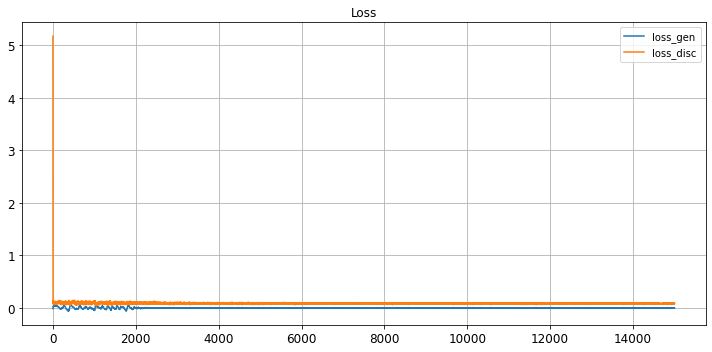

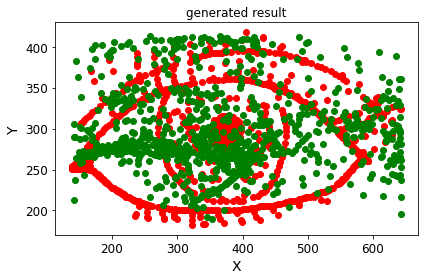

save the model & result
Epoch 15001/50000
critic: 0.082238 - generator: -0.000793 - 0s
Epoch 15002/50000
critic: 0.073953 - generator: 0.000268 - 0s
Epoch 15003/50000
critic: 0.076020 - generator: 0.003088 - 0s
Epoch 15004/50000
critic: 0.069133 - generator: 0.001944 - 0s
Epoch 15005/50000
critic: 0.087900 - generator: -0.001537 - 0s
Epoch 15006/50000
critic: 0.084579 - generator: -0.002448 - 0s
Epoch 15007/50000
critic: 0.076450 - generator: -0.001113 - 0s
Epoch 15008/50000
critic: 0.083945 - generator: 0.001036 - 0s
Epoch 15009/50000
critic: 0.085498 - generator: -0.002515 - 0s
Epoch 15010/50000
critic: 0.078048 - generator: -0.003313 - 0s
Epoch 15011/50000
critic: 0.082198 - generator: -0.002621 - 0s
Epoch 15012/50000
critic: 0.076363 - generator: 0.001808 - 0s
Epoch 15013/50000
critic: 0.082757 - generator: 0.000389 - 0s
Epoch 15014/50000
critic: 0.089119 - generator: -0.001090 - 0s
Epoch 15015/50000
critic: 0.070223 - generator: -0.001826 - 0s
Epoch 15016/50000
critic: 0.081414 - 

critic: 0.081953 - generator: 0.000600 - 0s
Epoch 15133/50000
critic: 0.090303 - generator: 0.001858 - 0s
Epoch 15134/50000
critic: 0.078793 - generator: 0.000757 - 0s
Epoch 15135/50000
critic: 0.083381 - generator: 0.001000 - 0s
Epoch 15136/50000
critic: 0.080047 - generator: 0.001838 - 0s
Epoch 15137/50000
critic: 0.095280 - generator: -0.001562 - 0s
Epoch 15138/50000
critic: 0.084079 - generator: -0.001682 - 0s
Epoch 15139/50000
critic: 0.084219 - generator: -0.000815 - 0s
Epoch 15140/50000
critic: 0.082534 - generator: -0.001161 - 0s
Epoch 15141/50000
critic: 0.091566 - generator: -0.000278 - 0s
Epoch 15142/50000
critic: 0.077322 - generator: -0.001031 - 0s
Epoch 15143/50000
critic: 0.087528 - generator: 0.002298 - 0s
Epoch 15144/50000
critic: 0.080904 - generator: 0.004032 - 0s
Epoch 15145/50000
critic: 0.085498 - generator: 0.003205 - 0s
Epoch 15146/50000
critic: 0.089222 - generator: 0.002253 - 0s
Epoch 15147/50000
critic: 0.077339 - generator: 0.000873 - 0s
Epoch 15148/50000
cr

critic: 0.079233 - generator: -0.001873 - 0s
Epoch 15264/50000
critic: 0.076313 - generator: 0.001627 - 0s
Epoch 15265/50000
critic: 0.080929 - generator: -0.000056 - 0s
Epoch 15266/50000
critic: 0.080099 - generator: -0.001081 - 0s
Epoch 15267/50000
critic: 0.090646 - generator: 0.002214 - 0s
Epoch 15268/50000
critic: 0.084204 - generator: -0.002177 - 0s
Epoch 15269/50000
critic: 0.081309 - generator: -0.001572 - 0s
Epoch 15270/50000
critic: 0.069570 - generator: 0.000321 - 0s
Epoch 15271/50000
critic: 0.074330 - generator: 0.000240 - 0s
Epoch 15272/50000
critic: 0.074462 - generator: 0.005136 - 0s
Epoch 15273/50000
critic: 0.084190 - generator: 0.003121 - 0s
Epoch 15274/50000
critic: 0.089259 - generator: -0.003236 - 0s
Epoch 15275/50000
critic: 0.076890 - generator: -0.002805 - 0s
Epoch 15276/50000
critic: 0.081391 - generator: -0.004289 - 0s
Epoch 15277/50000
critic: 0.082951 - generator: 0.002584 - 0s
Epoch 15278/50000
critic: 0.086196 - generator: 0.000820 - 0s
Epoch 15279/50000


critic: 0.083234 - generator: 0.000811 - 0s
Epoch 15395/50000
critic: 0.079876 - generator: 0.002257 - 0s
Epoch 15396/50000
critic: 0.077144 - generator: 0.000773 - 0s
Epoch 15397/50000
critic: 0.077224 - generator: -0.002769 - 0s
Epoch 15398/50000
critic: 0.076010 - generator: -0.000667 - 0s
Epoch 15399/50000
critic: 0.086699 - generator: 0.002927 - 0s
Epoch 15400/50000
critic: 0.081116 - generator: 0.000742 - 0s
Epoch 15401/50000
critic: 0.079952 - generator: 0.000579 - 0s
Epoch 15402/50000
critic: 0.086741 - generator: -0.001685 - 0s
Epoch 15403/50000
critic: 0.077060 - generator: -0.003415 - 0s
Epoch 15404/50000
critic: 0.081168 - generator: -0.000393 - 0s
Epoch 15405/50000
critic: 0.075448 - generator: -0.000886 - 0s
Epoch 15406/50000
critic: 0.085771 - generator: 0.001302 - 0s
Epoch 15407/50000
critic: 0.079462 - generator: 0.001765 - 0s
Epoch 15408/50000
critic: 0.087609 - generator: 0.002108 - 0s
Epoch 15409/50000
critic: 0.079093 - generator: 0.004932 - 0s
Epoch 15410/50000
cr

critic: 0.082700 - generator: 0.002005 - 0s
Epoch 15527/50000
critic: 0.076117 - generator: 0.002647 - 0s
Epoch 15528/50000
critic: 0.082469 - generator: -0.002088 - 0s
Epoch 15529/50000
critic: 0.087637 - generator: 0.001047 - 0s
Epoch 15530/50000
critic: 0.079699 - generator: -0.000710 - 0s
Epoch 15531/50000
critic: 0.085321 - generator: -0.000959 - 0s
Epoch 15532/50000
critic: 0.089295 - generator: -0.001103 - 0s
Epoch 15533/50000
critic: 0.085211 - generator: -0.000078 - 0s
Epoch 15534/50000
critic: 0.070810 - generator: -0.001878 - 0s
Epoch 15535/50000
critic: 0.069186 - generator: -0.004855 - 0s
Epoch 15536/50000
critic: 0.088380 - generator: -0.002903 - 0s
Epoch 15537/50000
critic: 0.071022 - generator: -0.004462 - 0s
Epoch 15538/50000
critic: 0.079547 - generator: -0.007098 - 0s
Epoch 15539/50000
critic: 0.089203 - generator: -0.003746 - 0s
Epoch 15540/50000
critic: 0.077549 - generator: -0.004365 - 0s
Epoch 15541/50000
critic: 0.075463 - generator: -0.000896 - 0s
Epoch 15542/5

critic: 0.077303 - generator: 0.000896 - 0s
Epoch 15658/50000
critic: 0.084357 - generator: -0.000932 - 0s
Epoch 15659/50000
critic: 0.077107 - generator: -0.001667 - 0s
Epoch 15660/50000
critic: 0.081681 - generator: -0.004362 - 0s
Epoch 15661/50000
critic: 0.077234 - generator: 0.001870 - 0s
Epoch 15662/50000
critic: 0.085990 - generator: -0.000922 - 0s
Epoch 15663/50000
critic: 0.073236 - generator: -0.002911 - 0s
Epoch 15664/50000
critic: 0.079302 - generator: -0.000998 - 0s
Epoch 15665/50000
critic: 0.083395 - generator: -0.004528 - 0s
Epoch 15666/50000
critic: 0.087067 - generator: -0.001922 - 0s
Epoch 15667/50000
critic: 0.076825 - generator: 0.000370 - 0s
Epoch 15668/50000
critic: 0.080170 - generator: 0.001111 - 0s
Epoch 15669/50000
critic: 0.079131 - generator: 0.002314 - 0s
Epoch 15670/50000
critic: 0.085367 - generator: 0.002239 - 0s
Epoch 15671/50000
critic: 0.088894 - generator: 0.003662 - 0s
Epoch 15672/50000
critic: 0.076208 - generator: 0.000247 - 0s
Epoch 15673/50000


critic: 0.082958 - generator: 0.004511 - 0s
Epoch 15789/50000
critic: 0.083753 - generator: -0.003519 - 0s
Epoch 15790/50000
critic: 0.076883 - generator: 0.001279 - 0s
Epoch 15791/50000
critic: 0.086239 - generator: -0.002542 - 0s
Epoch 15792/50000
critic: 0.090270 - generator: 0.000065 - 0s
Epoch 15793/50000
critic: 0.083751 - generator: 0.002725 - 0s
Epoch 15794/50000
critic: 0.081568 - generator: -0.000221 - 0s
Epoch 15795/50000
critic: 0.080609 - generator: -0.001215 - 0s
Epoch 15796/50000
critic: 0.085536 - generator: -0.001070 - 0s
Epoch 15797/50000
critic: 0.085393 - generator: 0.001666 - 0s
Epoch 15798/50000
critic: 0.076674 - generator: -0.001378 - 0s
Epoch 15799/50000
critic: 0.074153 - generator: -0.004790 - 0s
Epoch 15800/50000
critic: 0.079667 - generator: -0.003113 - 0s
Epoch 15801/50000
critic: 0.075149 - generator: 0.001970 - 0s
Epoch 15802/50000
critic: 0.080744 - generator: 0.000015 - 0s
Epoch 15803/50000
critic: 0.091458 - generator: 0.000766 - 0s
Epoch 15804/50000


critic: 0.078649 - generator: 0.000041 - 0s
Epoch 15921/50000
critic: 0.085339 - generator: -0.000342 - 0s
Epoch 15922/50000
critic: 0.077249 - generator: -0.000917 - 0s
Epoch 15923/50000
critic: 0.080775 - generator: -0.001045 - 0s
Epoch 15924/50000
critic: 0.080427 - generator: -0.000539 - 0s
Epoch 15925/50000
critic: 0.080496 - generator: 0.000881 - 0s
Epoch 15926/50000
critic: 0.080125 - generator: 0.003916 - 0s
Epoch 15927/50000
critic: 0.078437 - generator: -0.001717 - 0s
Epoch 15928/50000
critic: 0.085902 - generator: -0.003118 - 0s
Epoch 15929/50000
critic: 0.079620 - generator: 0.000387 - 0s
Epoch 15930/50000
critic: 0.084695 - generator: -0.002270 - 0s
Epoch 15931/50000
critic: 0.066335 - generator: -0.003099 - 0s
Epoch 15932/50000
critic: 0.087012 - generator: -0.001535 - 0s
Epoch 15933/50000
critic: 0.077600 - generator: -0.002898 - 0s
Epoch 15934/50000
critic: 0.071459 - generator: -0.000386 - 0s
Epoch 15935/50000
critic: 0.076560 - generator: -0.000422 - 0s
Epoch 15936/50

critic: 0.084913 - generator: 0.001458 - 0s
Epoch 16052/50000
critic: 0.086972 - generator: 0.001901 - 0s
Epoch 16053/50000
critic: 0.078634 - generator: 0.000889 - 0s
Epoch 16054/50000
critic: 0.084902 - generator: -0.004367 - 0s
Epoch 16055/50000
critic: 0.082761 - generator: -0.004071 - 0s
Epoch 16056/50000
critic: 0.088326 - generator: -0.000430 - 0s
Epoch 16057/50000
critic: 0.081865 - generator: -0.000273 - 0s
Epoch 16058/50000
critic: 0.073608 - generator: -0.002582 - 0s
Epoch 16059/50000
critic: 0.090264 - generator: -0.000854 - 0s
Epoch 16060/50000
critic: 0.069424 - generator: 0.000355 - 0s
Epoch 16061/50000
critic: 0.082026 - generator: 0.002353 - 0s
Epoch 16062/50000
critic: 0.086299 - generator: 0.001077 - 0s
Epoch 16063/50000
critic: 0.080440 - generator: 0.000404 - 0s
Epoch 16064/50000
critic: 0.077554 - generator: 0.002813 - 0s
Epoch 16065/50000
critic: 0.077637 - generator: -0.001325 - 0s
Epoch 16066/50000
critic: 0.095897 - generator: -0.001601 - 0s
Epoch 16067/50000


critic: 0.087782 - generator: 0.002628 - 0s
Epoch 16184/50000
critic: 0.082592 - generator: 0.003198 - 0s
Epoch 16185/50000
critic: 0.082933 - generator: -0.001134 - 0s
Epoch 16186/50000
critic: 0.080232 - generator: 0.001011 - 0s
Epoch 16187/50000
critic: 0.080399 - generator: -0.000792 - 0s
Epoch 16188/50000
critic: 0.084967 - generator: 0.000219 - 0s
Epoch 16189/50000
critic: 0.082765 - generator: -0.002135 - 0s
Epoch 16190/50000
critic: 0.087420 - generator: 0.000066 - 0s
Epoch 16191/50000
critic: 0.082437 - generator: -0.000327 - 0s
Epoch 16192/50000
critic: 0.093292 - generator: -0.001736 - 0s
Epoch 16193/50000
critic: 0.083952 - generator: 0.001311 - 0s
Epoch 16194/50000
critic: 0.084333 - generator: 0.001098 - 0s
Epoch 16195/50000
critic: 0.075779 - generator: -0.000862 - 0s
Epoch 16196/50000
critic: 0.065985 - generator: -0.003004 - 0s
Epoch 16197/50000
critic: 0.082503 - generator: 0.000255 - 0s
Epoch 16198/50000
critic: 0.081691 - generator: -0.000737 - 0s
Epoch 16199/50000


critic: 0.074823 - generator: -0.000001 - 0s
Epoch 16316/50000
critic: 0.085775 - generator: 0.002160 - 0s
Epoch 16317/50000
critic: 0.080680 - generator: 0.001808 - 0s
Epoch 16318/50000
critic: 0.081421 - generator: 0.000607 - 0s
Epoch 16319/50000
critic: 0.090109 - generator: 0.001473 - 0s
Epoch 16320/50000
critic: 0.078103 - generator: -0.004153 - 0s
Epoch 16321/50000
critic: 0.090329 - generator: -0.002637 - 0s
Epoch 16322/50000
critic: 0.079181 - generator: 0.001426 - 0s
Epoch 16323/50000
critic: 0.075452 - generator: -0.000867 - 0s
Epoch 16324/50000
critic: 0.073464 - generator: -0.002083 - 0s
Epoch 16325/50000
critic: 0.076928 - generator: 0.003572 - 0s
Epoch 16326/50000
critic: 0.086749 - generator: 0.000089 - 0s
Epoch 16327/50000
critic: 0.074249 - generator: 0.002049 - 0s
Epoch 16328/50000
critic: 0.084031 - generator: 0.003080 - 0s
Epoch 16329/50000
critic: 0.090584 - generator: -0.003166 - 0s
Epoch 16330/50000
critic: 0.077719 - generator: -0.001404 - 0s
Epoch 16331/50000
c

critic: 0.076520 - generator: 0.001265 - 0s
Epoch 16448/50000
critic: 0.077399 - generator: -0.001686 - 0s
Epoch 16449/50000
critic: 0.076345 - generator: 0.003904 - 0s
Epoch 16450/50000
critic: 0.076724 - generator: 0.001598 - 0s
Epoch 16451/50000
critic: 0.082041 - generator: -0.002652 - 0s
Epoch 16452/50000
critic: 0.078158 - generator: -0.003760 - 0s
Epoch 16453/50000
critic: 0.080583 - generator: -0.000457 - 0s
Epoch 16454/50000
critic: 0.083933 - generator: -0.003209 - 0s
Epoch 16455/50000
critic: 0.076380 - generator: 0.001151 - 0s
Epoch 16456/50000
critic: 0.079681 - generator: -0.000507 - 0s
Epoch 16457/50000
critic: 0.082115 - generator: 0.002919 - 0s
Epoch 16458/50000
critic: 0.082970 - generator: -0.005557 - 0s
Epoch 16459/50000
critic: 0.090666 - generator: -0.003139 - 0s
Epoch 16460/50000
critic: 0.079272 - generator: -0.002593 - 0s
Epoch 16461/50000
critic: 0.083409 - generator: -0.004713 - 0s
Epoch 16462/50000
critic: 0.088630 - generator: -0.002584 - 0s
Epoch 16463/500

critic: 0.071280 - generator: -0.001188 - 0s
Epoch 16579/50000
critic: 0.091354 - generator: -0.001910 - 0s
Epoch 16580/50000
critic: 0.081618 - generator: -0.000182 - 0s
Epoch 16581/50000
critic: 0.079685 - generator: -0.001371 - 0s
Epoch 16582/50000
critic: 0.089250 - generator: 0.000034 - 0s
Epoch 16583/50000
critic: 0.087940 - generator: 0.002892 - 0s
Epoch 16584/50000
critic: 0.070999 - generator: 0.002604 - 0s
Epoch 16585/50000
critic: 0.080552 - generator: 0.000445 - 0s
Epoch 16586/50000
critic: 0.071492 - generator: -0.001086 - 0s
Epoch 16587/50000
critic: 0.082980 - generator: -0.000495 - 0s
Epoch 16588/50000
critic: 0.083848 - generator: 0.001756 - 0s
Epoch 16589/50000
critic: 0.087995 - generator: 0.004948 - 0s
Epoch 16590/50000
critic: 0.086928 - generator: 0.001242 - 0s
Epoch 16591/50000
critic: 0.075824 - generator: -0.000805 - 0s
Epoch 16592/50000
critic: 0.084997 - generator: -0.001958 - 0s
Epoch 16593/50000
critic: 0.074293 - generator: 0.000250 - 0s
Epoch 16594/50000


critic: 0.082618 - generator: 0.001278 - 0s
Epoch 16711/50000
critic: 0.081420 - generator: 0.002709 - 0s
Epoch 16712/50000
critic: 0.088805 - generator: -0.001082 - 0s
Epoch 16713/50000
critic: 0.086574 - generator: -0.006793 - 0s
Epoch 16714/50000
critic: 0.087027 - generator: 0.002326 - 0s
Epoch 16715/50000
critic: 0.083551 - generator: -0.002142 - 0s
Epoch 16716/50000
critic: 0.086137 - generator: -0.001251 - 0s
Epoch 16717/50000
critic: 0.089413 - generator: 0.000858 - 0s
Epoch 16718/50000
critic: 0.081413 - generator: 0.001182 - 0s
Epoch 16719/50000
critic: 0.078286 - generator: 0.000415 - 0s
Epoch 16720/50000
critic: 0.078055 - generator: 0.003060 - 0s
Epoch 16721/50000
critic: 0.086505 - generator: -0.002088 - 0s
Epoch 16722/50000
critic: 0.078095 - generator: -0.001376 - 0s
Epoch 16723/50000
critic: 0.091219 - generator: -0.002159 - 0s
Epoch 16724/50000
critic: 0.074674 - generator: 0.002565 - 0s
Epoch 16725/50000
critic: 0.088182 - generator: 0.000783 - 0s
Epoch 16726/50000
c

critic: 0.072369 - generator: -0.004949 - 0s
Epoch 16843/50000
critic: 0.079021 - generator: -0.002914 - 0s
Epoch 16844/50000
critic: 0.077605 - generator: -0.001866 - 0s
Epoch 16845/50000
critic: 0.078694 - generator: -0.001982 - 0s
Epoch 16846/50000
critic: 0.079240 - generator: 0.001383 - 0s
Epoch 16847/50000
critic: 0.082351 - generator: -0.000503 - 0s
Epoch 16848/50000
critic: 0.085623 - generator: -0.000842 - 0s
Epoch 16849/50000
critic: 0.078534 - generator: -0.001035 - 0s
Epoch 16850/50000
critic: 0.074311 - generator: 0.001167 - 0s
Epoch 16851/50000
critic: 0.083104 - generator: 0.000817 - 0s
Epoch 16852/50000
critic: 0.079554 - generator: -0.000213 - 0s
Epoch 16853/50000
critic: 0.068678 - generator: -0.002593 - 0s
Epoch 16854/50000
critic: 0.078334 - generator: -0.003879 - 0s
Epoch 16855/50000
critic: 0.079442 - generator: -0.002256 - 0s
Epoch 16856/50000
critic: 0.079374 - generator: -0.000336 - 0s
Epoch 16857/50000
critic: 0.075147 - generator: 0.001565 - 0s
Epoch 16858/50

critic: 0.089586 - generator: -0.002703 - 0s
Epoch 16975/50000
critic: 0.083605 - generator: -0.000898 - 0s
Epoch 16976/50000
critic: 0.078728 - generator: -0.002031 - 0s
Epoch 16977/50000
critic: 0.076478 - generator: 0.002712 - 0s
Epoch 16978/50000
critic: 0.090950 - generator: 0.002725 - 0s
Epoch 16979/50000
critic: 0.078308 - generator: -0.000099 - 0s
Epoch 16980/50000
critic: 0.079269 - generator: -0.004009 - 0s
Epoch 16981/50000
critic: 0.090353 - generator: 0.001652 - 0s
Epoch 16982/50000
critic: 0.076920 - generator: -0.000617 - 0s
Epoch 16983/50000
critic: 0.086382 - generator: -0.000052 - 0s
Epoch 16984/50000
critic: 0.079856 - generator: 0.000234 - 0s
Epoch 16985/50000
critic: 0.075519 - generator: -0.000415 - 0s
Epoch 16986/50000
critic: 0.078320 - generator: -0.000889 - 0s
Epoch 16987/50000
critic: 0.077939 - generator: 0.001904 - 0s
Epoch 16988/50000
critic: 0.083461 - generator: 0.002155 - 0s
Epoch 16989/50000
critic: 0.082025 - generator: 0.001274 - 0s
Epoch 16990/50000

critic: 0.079405 - generator: 0.000457 - 0s
Epoch 17107/50000
critic: 0.080029 - generator: 0.001083 - 0s
Epoch 17108/50000
critic: 0.078844 - generator: -0.001923 - 0s
Epoch 17109/50000
critic: 0.095681 - generator: -0.002241 - 0s
Epoch 17110/50000
critic: 0.079026 - generator: -0.000241 - 0s
Epoch 17111/50000
critic: 0.075220 - generator: -0.000786 - 0s
Epoch 17112/50000
critic: 0.079852 - generator: 0.004753 - 0s
Epoch 17113/50000
critic: 0.078613 - generator: 0.003139 - 0s
Epoch 17114/50000
critic: 0.083818 - generator: 0.001574 - 0s
Epoch 17115/50000
critic: 0.070996 - generator: 0.000475 - 0s
Epoch 17116/50000
critic: 0.077224 - generator: -0.001132 - 0s
Epoch 17117/50000
critic: 0.088723 - generator: -0.003601 - 0s
Epoch 17118/50000
critic: 0.076560 - generator: -0.002807 - 0s
Epoch 17119/50000
critic: 0.077153 - generator: -0.001771 - 0s
Epoch 17120/50000
critic: 0.084415 - generator: -0.001000 - 0s
Epoch 17121/50000
critic: 0.075027 - generator: -0.000702 - 0s
Epoch 17122/5000

critic: 0.082158 - generator: -0.000557 - 0s
Epoch 17238/50000
critic: 0.087116 - generator: 0.000522 - 0s
Epoch 17239/50000
critic: 0.082769 - generator: 0.000174 - 0s
Epoch 17240/50000
critic: 0.080177 - generator: -0.003647 - 0s
Epoch 17241/50000
critic: 0.077629 - generator: -0.002222 - 0s
Epoch 17242/50000
critic: 0.078948 - generator: 0.003742 - 0s
Epoch 17243/50000
critic: 0.075536 - generator: 0.002121 - 0s
Epoch 17244/50000
critic: 0.076859 - generator: 0.003282 - 0s
Epoch 17245/50000
critic: 0.085478 - generator: 0.004567 - 0s
Epoch 17246/50000
critic: 0.075637 - generator: 0.001326 - 0s
Epoch 17247/50000
critic: 0.068271 - generator: -0.003162 - 0s
Epoch 17248/50000
critic: 0.078761 - generator: 0.002028 - 0s
Epoch 17249/50000
critic: 0.080736 - generator: 0.001981 - 0s
Epoch 17250/50000
critic: 0.074863 - generator: 0.001027 - 0s
Epoch 17251/50000
critic: 0.075615 - generator: -0.002406 - 0s
Epoch 17252/50000
critic: 0.082479 - generator: 0.000660 - 0s
Epoch 17253/50000
cri

critic: 0.079391 - generator: 0.001290 - 0s
Epoch 17370/50000
critic: 0.066111 - generator: -0.003340 - 0s
Epoch 17371/50000
critic: 0.078765 - generator: 0.002711 - 0s
Epoch 17372/50000
critic: 0.066929 - generator: -0.000515 - 0s
Epoch 17373/50000
critic: 0.085759 - generator: -0.001886 - 0s
Epoch 17374/50000
critic: 0.087123 - generator: -0.000372 - 0s
Epoch 17375/50000
critic: 0.085107 - generator: -0.001773 - 0s
Epoch 17376/50000
critic: 0.084140 - generator: 0.001837 - 0s
Epoch 17377/50000
critic: 0.082201 - generator: -0.001555 - 0s
Epoch 17378/50000
critic: 0.088129 - generator: -0.004942 - 0s
Epoch 17379/50000
critic: 0.072474 - generator: 0.001122 - 0s
Epoch 17380/50000
critic: 0.087602 - generator: -0.004860 - 0s
Epoch 17381/50000
critic: 0.076815 - generator: 0.000388 - 0s
Epoch 17382/50000
critic: 0.080385 - generator: -0.004715 - 0s
Epoch 17383/50000
critic: 0.088221 - generator: -0.003340 - 0s
Epoch 17384/50000
critic: 0.085404 - generator: -0.002263 - 0s
Epoch 17385/500

critic: 0.091536 - generator: 0.000105 - 0s
Epoch 17502/50000
critic: 0.078947 - generator: 0.000150 - 0s
Epoch 17503/50000
critic: 0.076988 - generator: 0.001565 - 0s
Epoch 17504/50000
critic: 0.081366 - generator: -0.002037 - 0s
Epoch 17505/50000
critic: 0.079354 - generator: 0.002138 - 0s
Epoch 17506/50000
critic: 0.081058 - generator: 0.003781 - 0s
Epoch 17507/50000
critic: 0.081144 - generator: 0.002186 - 0s
Epoch 17508/50000
critic: 0.075556 - generator: -0.002647 - 0s
Epoch 17509/50000
critic: 0.080681 - generator: -0.000076 - 0s
Epoch 17510/50000
critic: 0.075040 - generator: -0.000449 - 0s
Epoch 17511/50000
critic: 0.071846 - generator: 0.000327 - 0s
Epoch 17512/50000
critic: 0.077341 - generator: -0.000592 - 0s
Epoch 17513/50000
critic: 0.082039 - generator: -0.002320 - 0s
Epoch 17514/50000
critic: 0.094541 - generator: -0.002150 - 0s
Epoch 17515/50000
critic: 0.070879 - generator: 0.000120 - 0s
Epoch 17516/50000
critic: 0.072070 - generator: -0.002859 - 0s
Epoch 17517/50000


critic: 0.078896 - generator: 0.001823 - 0s
Epoch 17634/50000
critic: 0.090660 - generator: -0.001383 - 0s
Epoch 17635/50000
critic: 0.081787 - generator: 0.001160 - 0s
Epoch 17636/50000
critic: 0.086277 - generator: 0.000418 - 0s
Epoch 17637/50000
critic: 0.079876 - generator: -0.003373 - 0s
Epoch 17638/50000
critic: 0.080046 - generator: 0.004211 - 0s
Epoch 17639/50000
critic: 0.077189 - generator: 0.001158 - 0s
Epoch 17640/50000
critic: 0.082187 - generator: -0.000899 - 0s
Epoch 17641/50000
critic: 0.074831 - generator: 0.000178 - 0s
Epoch 17642/50000
critic: 0.078558 - generator: -0.004039 - 0s
Epoch 17643/50000
critic: 0.078546 - generator: 0.000178 - 0s
Epoch 17644/50000
critic: 0.083325 - generator: 0.004336 - 0s
Epoch 17645/50000
critic: 0.086135 - generator: -0.000060 - 0s
Epoch 17646/50000
critic: 0.085782 - generator: -0.000784 - 0s
Epoch 17647/50000
critic: 0.078913 - generator: 0.000973 - 0s
Epoch 17648/50000
critic: 0.078331 - generator: -0.003639 - 0s
Epoch 17649/50000
c

critic: 0.085813 - generator: 0.002596 - 0s
Epoch 17766/50000
critic: 0.076257 - generator: 0.000439 - 0s
Epoch 17767/50000
critic: 0.083449 - generator: 0.000767 - 0s
Epoch 17768/50000
critic: 0.086459 - generator: -0.003207 - 0s
Epoch 17769/50000
critic: 0.079094 - generator: 0.002257 - 0s
Epoch 17770/50000
critic: 0.072327 - generator: -0.000186 - 0s
Epoch 17771/50000
critic: 0.078353 - generator: -0.001315 - 0s
Epoch 17772/50000
critic: 0.085672 - generator: -0.001264 - 0s
Epoch 17773/50000
critic: 0.077680 - generator: 0.002951 - 0s
Epoch 17774/50000
critic: 0.088438 - generator: 0.000339 - 0s
Epoch 17775/50000
critic: 0.075353 - generator: 0.000184 - 0s
Epoch 17776/50000
critic: 0.079097 - generator: 0.000886 - 0s
Epoch 17777/50000
critic: 0.078890 - generator: -0.000767 - 0s
Epoch 17778/50000
critic: 0.085117 - generator: -0.001616 - 0s
Epoch 17779/50000
critic: 0.081291 - generator: -0.002344 - 0s
Epoch 17780/50000
critic: 0.087151 - generator: 0.000144 - 0s
Epoch 17781/50000
c

critic: 0.076423 - generator: -0.000458 - 0s
Epoch 17897/50000
critic: 0.076375 - generator: -0.000561 - 0s
Epoch 17898/50000
critic: 0.075581 - generator: 0.001586 - 0s
Epoch 17899/50000
critic: 0.087167 - generator: 0.001365 - 0s
Epoch 17900/50000
critic: 0.069113 - generator: 0.004231 - 0s
Epoch 17901/50000
critic: 0.089217 - generator: -0.000198 - 0s
Epoch 17902/50000
critic: 0.076330 - generator: 0.002097 - 0s
Epoch 17903/50000
critic: 0.081487 - generator: 0.001461 - 0s
Epoch 17904/50000
critic: 0.079813 - generator: 0.001060 - 0s
Epoch 17905/50000
critic: 0.077241 - generator: 0.000933 - 0s
Epoch 17906/50000
critic: 0.073925 - generator: 0.002327 - 0s
Epoch 17907/50000
critic: 0.079118 - generator: -0.000115 - 0s
Epoch 17908/50000
critic: 0.077540 - generator: -0.000941 - 0s
Epoch 17909/50000
critic: 0.075577 - generator: 0.000427 - 0s
Epoch 17910/50000
critic: 0.083750 - generator: 0.000407 - 0s
Epoch 17911/50000
critic: 0.069218 - generator: 0.001161 - 0s
Epoch 17912/50000
cri

critic: 0.073233 - generator: -0.001859 - 0s
Epoch 18029/50000
critic: 0.070133 - generator: -0.001666 - 0s
Epoch 18030/50000
critic: 0.093780 - generator: 0.000498 - 0s
Epoch 18031/50000
critic: 0.076391 - generator: 0.001202 - 0s
Epoch 18032/50000
critic: 0.077934 - generator: -0.003684 - 0s
Epoch 18033/50000
critic: 0.078582 - generator: -0.000962 - 0s
Epoch 18034/50000
critic: 0.087764 - generator: -0.000787 - 0s
Epoch 18035/50000
critic: 0.081605 - generator: 0.002987 - 0s
Epoch 18036/50000
critic: 0.075681 - generator: -0.000056 - 0s
Epoch 18037/50000
critic: 0.078334 - generator: 0.000797 - 0s
Epoch 18038/50000
critic: 0.086672 - generator: -0.000426 - 0s
Epoch 18039/50000
critic: 0.079884 - generator: 0.000799 - 0s
Epoch 18040/50000
critic: 0.077284 - generator: 0.001490 - 0s
Epoch 18041/50000
critic: 0.070899 - generator: -0.000918 - 0s
Epoch 18042/50000
critic: 0.082295 - generator: 0.001711 - 0s
Epoch 18043/50000
critic: 0.091737 - generator: 0.000008 - 0s
Epoch 18044/50000


critic: 0.086455 - generator: 0.002548 - 0s
Epoch 18161/50000
critic: 0.069025 - generator: 0.000378 - 0s
Epoch 18162/50000
critic: 0.082918 - generator: 0.002584 - 0s
Epoch 18163/50000
critic: 0.088961 - generator: -0.000454 - 0s
Epoch 18164/50000
critic: 0.081536 - generator: 0.002208 - 0s
Epoch 18165/50000
critic: 0.076534 - generator: -0.000574 - 0s
Epoch 18166/50000
critic: 0.084283 - generator: -0.005559 - 0s
Epoch 18167/50000
critic: 0.082932 - generator: -0.002742 - 0s
Epoch 18168/50000
critic: 0.093207 - generator: 0.000384 - 0s
Epoch 18169/50000
critic: 0.078535 - generator: -0.001339 - 0s
Epoch 18170/50000
critic: 0.074959 - generator: -0.000562 - 0s
Epoch 18171/50000
critic: 0.080811 - generator: -0.001237 - 0s
Epoch 18172/50000
critic: 0.090514 - generator: 0.000966 - 0s
Epoch 18173/50000
critic: 0.080460 - generator: -0.001558 - 0s
Epoch 18174/50000
critic: 0.085133 - generator: -0.001140 - 0s
Epoch 18175/50000
critic: 0.077262 - generator: 0.001245 - 0s
Epoch 18176/50000

critic: 0.079095 - generator: -0.001041 - 0s
Epoch 18293/50000
critic: 0.067812 - generator: -0.001042 - 0s
Epoch 18294/50000
critic: 0.080927 - generator: -0.004271 - 0s
Epoch 18295/50000
critic: 0.082397 - generator: 0.000466 - 0s
Epoch 18296/50000
critic: 0.077648 - generator: 0.001654 - 0s
Epoch 18297/50000
critic: 0.073590 - generator: -0.000521 - 0s
Epoch 18298/50000
critic: 0.081418 - generator: -0.001981 - 0s
Epoch 18299/50000
critic: 0.067873 - generator: -0.001306 - 0s
Epoch 18300/50000
critic: 0.074170 - generator: 0.001604 - 0s
Epoch 18301/50000
critic: 0.082132 - generator: 0.001371 - 0s
Epoch 18302/50000
critic: 0.080900 - generator: -0.003155 - 0s
Epoch 18303/50000
critic: 0.081040 - generator: -0.001138 - 0s
Epoch 18304/50000
critic: 0.079239 - generator: -0.002476 - 0s
Epoch 18305/50000
critic: 0.075583 - generator: -0.005935 - 0s
Epoch 18306/50000
critic: 0.076023 - generator: 0.000042 - 0s
Epoch 18307/50000
critic: 0.085695 - generator: -0.000308 - 0s
Epoch 18308/500

critic: 0.076641 - generator: -0.001826 - 0s
Epoch 18425/50000
critic: 0.078213 - generator: -0.000733 - 0s
Epoch 18426/50000
critic: 0.083595 - generator: -0.002931 - 0s
Epoch 18427/50000
critic: 0.081800 - generator: -0.003050 - 0s
Epoch 18428/50000
critic: 0.081414 - generator: -0.000290 - 0s
Epoch 18429/50000
critic: 0.092998 - generator: 0.001363 - 0s
Epoch 18430/50000
critic: 0.075182 - generator: 0.000069 - 0s
Epoch 18431/50000
critic: 0.084283 - generator: 0.002411 - 0s
Epoch 18432/50000
critic: 0.088864 - generator: 0.002137 - 0s
Epoch 18433/50000
critic: 0.080060 - generator: 0.001128 - 0s
Epoch 18434/50000
critic: 0.084251 - generator: 0.003548 - 0s
Epoch 18435/50000
critic: 0.072933 - generator: 0.004082 - 0s
Epoch 18436/50000
critic: 0.076815 - generator: -0.000628 - 0s
Epoch 18437/50000
critic: 0.087878 - generator: -0.005339 - 0s
Epoch 18438/50000
critic: 0.074813 - generator: -0.001387 - 0s
Epoch 18439/50000
critic: 0.086770 - generator: -0.003535 - 0s
Epoch 18440/50000

critic: 0.086182 - generator: -0.005564 - 0s
Epoch 18557/50000
critic: 0.079878 - generator: -0.005915 - 0s
Epoch 18558/50000
critic: 0.087151 - generator: -0.005619 - 0s
Epoch 18559/50000
critic: 0.077590 - generator: -0.003715 - 0s
Epoch 18560/50000
critic: 0.085675 - generator: -0.001660 - 0s
Epoch 18561/50000
critic: 0.080938 - generator: -0.001144 - 0s
Epoch 18562/50000
critic: 0.083473 - generator: -0.000195 - 0s
Epoch 18563/50000
critic: 0.074190 - generator: 0.002461 - 0s
Epoch 18564/50000
critic: 0.081725 - generator: 0.004424 - 0s
Epoch 18565/50000
critic: 0.084980 - generator: 0.000931 - 0s
Epoch 18566/50000
critic: 0.086207 - generator: -0.001045 - 0s
Epoch 18567/50000
critic: 0.081215 - generator: -0.002247 - 0s
Epoch 18568/50000
critic: 0.075853 - generator: 0.000907 - 0s
Epoch 18569/50000
critic: 0.082774 - generator: 0.001333 - 0s
Epoch 18570/50000
critic: 0.083919 - generator: 0.000550 - 0s
Epoch 18571/50000
critic: 0.079508 - generator: -0.000647 - 0s
Epoch 18572/5000

critic: 0.077253 - generator: -0.003440 - 0s
Epoch 18689/50000
critic: 0.077239 - generator: -0.002460 - 0s
Epoch 18690/50000
critic: 0.081543 - generator: -0.001750 - 0s
Epoch 18691/50000
critic: 0.079635 - generator: -0.000435 - 0s
Epoch 18692/50000
critic: 0.079626 - generator: -0.000306 - 0s
Epoch 18693/50000
critic: 0.077191 - generator: 0.002153 - 0s
Epoch 18694/50000
critic: 0.084294 - generator: 0.000509 - 0s
Epoch 18695/50000
critic: 0.084092 - generator: 0.002209 - 0s
Epoch 18696/50000
critic: 0.078273 - generator: 0.000439 - 0s
Epoch 18697/50000
critic: 0.086021 - generator: 0.000484 - 0s
Epoch 18698/50000
critic: 0.070050 - generator: -0.001714 - 0s
Epoch 18699/50000
critic: 0.073500 - generator: -0.003674 - 0s
Epoch 18700/50000
critic: 0.080890 - generator: -0.001689 - 0s
Epoch 18701/50000
critic: 0.072311 - generator: -0.002284 - 0s
Epoch 18702/50000
critic: 0.078388 - generator: -0.003117 - 0s
Epoch 18703/50000
critic: 0.077316 - generator: -0.000550 - 0s
Epoch 18704/500

critic: 0.077364 - generator: 0.002057 - 0s
Epoch 18820/50000
critic: 0.082588 - generator: -0.000275 - 0s
Epoch 18821/50000
critic: 0.079373 - generator: -0.000128 - 0s
Epoch 18822/50000
critic: 0.078331 - generator: 0.000082 - 0s
Epoch 18823/50000
critic: 0.076380 - generator: 0.000609 - 0s
Epoch 18824/50000
critic: 0.086338 - generator: 0.003221 - 0s
Epoch 18825/50000
critic: 0.081477 - generator: 0.002274 - 0s
Epoch 18826/50000
critic: 0.074476 - generator: 0.000130 - 0s
Epoch 18827/50000
critic: 0.079083 - generator: -0.001837 - 0s
Epoch 18828/50000
critic: 0.078748 - generator: 0.003116 - 0s
Epoch 18829/50000
critic: 0.077733 - generator: 0.001099 - 0s
Epoch 18830/50000
critic: 0.090156 - generator: -0.005606 - 0s
Epoch 18831/50000
critic: 0.077157 - generator: -0.000437 - 0s
Epoch 18832/50000
critic: 0.077922 - generator: -0.000193 - 0s
Epoch 18833/50000
critic: 0.075297 - generator: -0.001995 - 0s
Epoch 18834/50000
critic: 0.070872 - generator: -0.001258 - 0s
Epoch 18835/50000


critic: 0.081921 - generator: -0.000025 - 0s
Epoch 18951/50000
critic: 0.082820 - generator: -0.002196 - 0s
Epoch 18952/50000
critic: 0.079590 - generator: -0.002623 - 0s
Epoch 18953/50000
critic: 0.080133 - generator: -0.002996 - 0s
Epoch 18954/50000
critic: 0.080887 - generator: -0.000521 - 0s
Epoch 18955/50000
critic: 0.085875 - generator: -0.000529 - 0s
Epoch 18956/50000
critic: 0.088030 - generator: -0.002137 - 0s
Epoch 18957/50000
critic: 0.078447 - generator: 0.001681 - 0s
Epoch 18958/50000
critic: 0.073644 - generator: -0.000703 - 0s
Epoch 18959/50000
critic: 0.079423 - generator: -0.003270 - 0s
Epoch 18960/50000
critic: 0.084149 - generator: 0.000858 - 0s
Epoch 18961/50000
critic: 0.076699 - generator: -0.000894 - 0s
Epoch 18962/50000
critic: 0.083644 - generator: -0.000590 - 0s
Epoch 18963/50000
critic: 0.085669 - generator: -0.002436 - 0s
Epoch 18964/50000
critic: 0.070817 - generator: -0.000780 - 0s
Epoch 18965/50000
critic: 0.069953 - generator: -0.002176 - 0s
Epoch 18966/

critic: 0.074421 - generator: 0.003319 - 0s
Epoch 19083/50000
critic: 0.085563 - generator: 0.002543 - 0s
Epoch 19084/50000
critic: 0.079797 - generator: -0.000219 - 0s
Epoch 19085/50000
critic: 0.077221 - generator: 0.000435 - 0s
Epoch 19086/50000
critic: 0.074627 - generator: 0.001357 - 0s
Epoch 19087/50000
critic: 0.078430 - generator: 0.001403 - 0s
Epoch 19088/50000
critic: 0.081168 - generator: 0.004675 - 0s
Epoch 19089/50000
critic: 0.078552 - generator: 0.000470 - 0s
Epoch 19090/50000
critic: 0.071357 - generator: -0.005119 - 0s
Epoch 19091/50000
critic: 0.074336 - generator: -0.000934 - 0s
Epoch 19092/50000
critic: 0.074704 - generator: -0.000354 - 0s
Epoch 19093/50000
critic: 0.091337 - generator: 0.005796 - 0s
Epoch 19094/50000
critic: 0.070432 - generator: 0.003860 - 0s
Epoch 19095/50000
critic: 0.089417 - generator: -0.000066 - 0s
Epoch 19096/50000
critic: 0.073598 - generator: 0.001251 - 0s
Epoch 19097/50000
critic: 0.076043 - generator: -0.000454 - 0s
Epoch 19098/50000
cr

critic: 0.075389 - generator: 0.000172 - 0s
Epoch 19215/50000
critic: 0.076582 - generator: 0.004694 - 0s
Epoch 19216/50000
critic: 0.082984 - generator: 0.000371 - 0s
Epoch 19217/50000
critic: 0.072813 - generator: -0.001036 - 0s
Epoch 19218/50000
critic: 0.079137 - generator: -0.001902 - 0s
Epoch 19219/50000
critic: 0.076657 - generator: -0.000179 - 0s
Epoch 19220/50000
critic: 0.068675 - generator: 0.000943 - 0s
Epoch 19221/50000
critic: 0.078744 - generator: 0.003878 - 0s
Epoch 19222/50000
critic: 0.073431 - generator: -0.001388 - 0s
Epoch 19223/50000
critic: 0.079256 - generator: -0.002918 - 0s
Epoch 19224/50000
critic: 0.084895 - generator: 0.001691 - 0s
Epoch 19225/50000
critic: 0.070307 - generator: 0.002506 - 0s
Epoch 19226/50000
critic: 0.083362 - generator: -0.002457 - 0s
Epoch 19227/50000
critic: 0.073740 - generator: -0.000031 - 0s
Epoch 19228/50000
critic: 0.073780 - generator: 0.001280 - 0s
Epoch 19229/50000
critic: 0.080377 - generator: -0.005760 - 0s
Epoch 19230/50000


critic: 0.077748 - generator: 0.003508 - 0s
Epoch 19347/50000
critic: 0.080433 - generator: 0.001866 - 0s
Epoch 19348/50000
critic: 0.071404 - generator: -0.001700 - 0s
Epoch 19349/50000
critic: 0.081710 - generator: 0.000403 - 0s
Epoch 19350/50000
critic: 0.079887 - generator: 0.000301 - 0s
Epoch 19351/50000
critic: 0.081159 - generator: -0.002589 - 0s
Epoch 19352/50000
critic: 0.071834 - generator: -0.000353 - 0s
Epoch 19353/50000
critic: 0.082682 - generator: -0.000256 - 0s
Epoch 19354/50000
critic: 0.080342 - generator: -0.002170 - 0s
Epoch 19355/50000
critic: 0.084717 - generator: -0.002863 - 0s
Epoch 19356/50000
critic: 0.086354 - generator: 0.001957 - 0s
Epoch 19357/50000
critic: 0.079771 - generator: 0.001388 - 0s
Epoch 19358/50000
critic: 0.079163 - generator: -0.001411 - 0s
Epoch 19359/50000
critic: 0.086487 - generator: 0.002972 - 0s
Epoch 19360/50000
critic: 0.081709 - generator: 0.001560 - 0s
Epoch 19361/50000
critic: 0.090915 - generator: -0.000169 - 0s
Epoch 19362/50000


critic: 0.077421 - generator: 0.000414 - 0s
Epoch 19479/50000
critic: 0.086255 - generator: -0.000171 - 0s
Epoch 19480/50000
critic: 0.079637 - generator: -0.000031 - 0s
Epoch 19481/50000
critic: 0.079616 - generator: -0.000670 - 0s
Epoch 19482/50000
critic: 0.079565 - generator: -0.002749 - 0s
Epoch 19483/50000
critic: 0.083107 - generator: -0.001948 - 0s
Epoch 19484/50000
critic: 0.078539 - generator: 0.003492 - 0s
Epoch 19485/50000
critic: 0.080932 - generator: 0.002338 - 0s
Epoch 19486/50000
critic: 0.080214 - generator: 0.000547 - 0s
Epoch 19487/50000
critic: 0.092055 - generator: 0.002791 - 0s
Epoch 19488/50000
critic: 0.087816 - generator: 0.000095 - 0s
Epoch 19489/50000
critic: 0.086826 - generator: -0.001041 - 0s
Epoch 19490/50000
critic: 0.077670 - generator: -0.002192 - 0s
Epoch 19491/50000
critic: 0.083666 - generator: -0.003377 - 0s
Epoch 19492/50000
critic: 0.072593 - generator: -0.002648 - 0s
Epoch 19493/50000
critic: 0.084495 - generator: -0.002487 - 0s
Epoch 19494/5000

critic: 0.081572 - generator: 0.003111 - 0s
Epoch 19610/50000
critic: 0.071948 - generator: 0.000003 - 0s
Epoch 19611/50000
critic: 0.070355 - generator: 0.003900 - 0s
Epoch 19612/50000
critic: 0.076210 - generator: 0.001359 - 0s
Epoch 19613/50000
critic: 0.078110 - generator: 0.001511 - 0s
Epoch 19614/50000
critic: 0.081905 - generator: 0.002124 - 0s
Epoch 19615/50000
critic: 0.073221 - generator: 0.001899 - 0s
Epoch 19616/50000
critic: 0.076609 - generator: -0.000077 - 0s
Epoch 19617/50000
critic: 0.086846 - generator: -0.003057 - 0s
Epoch 19618/50000
critic: 0.078663 - generator: -0.002106 - 0s
Epoch 19619/50000
critic: 0.071814 - generator: -0.001622 - 0s
Epoch 19620/50000
critic: 0.081597 - generator: -0.001628 - 0s
Epoch 19621/50000
critic: 0.091455 - generator: -0.001689 - 0s
Epoch 19622/50000
critic: 0.078239 - generator: 0.000741 - 0s
Epoch 19623/50000
critic: 0.076747 - generator: 0.000560 - 0s
Epoch 19624/50000
critic: 0.072020 - generator: -0.000884 - 0s
Epoch 19625/50000
c

critic: 0.085778 - generator: 0.003641 - 0s
Epoch 19742/50000
critic: 0.087461 - generator: 0.000129 - 0s
Epoch 19743/50000
critic: 0.084363 - generator: -0.001387 - 0s
Epoch 19744/50000
critic: 0.080899 - generator: 0.000935 - 0s
Epoch 19745/50000
critic: 0.079861 - generator: 0.000283 - 0s
Epoch 19746/50000
critic: 0.081569 - generator: -0.002195 - 0s
Epoch 19747/50000
critic: 0.082764 - generator: -0.001870 - 0s
Epoch 19748/50000
critic: 0.077141 - generator: -0.001488 - 0s
Epoch 19749/50000
critic: 0.075825 - generator: -0.000641 - 0s
Epoch 19750/50000
critic: 0.075885 - generator: -0.003812 - 0s
Epoch 19751/50000
critic: 0.072055 - generator: -0.001826 - 0s
Epoch 19752/50000
critic: 0.079619 - generator: 0.003830 - 0s
Epoch 19753/50000
critic: 0.077750 - generator: -0.001126 - 0s
Epoch 19754/50000
critic: 0.086433 - generator: -0.001986 - 0s
Epoch 19755/50000
critic: 0.091832 - generator: -0.002439 - 0s
Epoch 19756/50000
critic: 0.084815 - generator: -0.002860 - 0s
Epoch 19757/500

critic: 0.084964 - generator: 0.000323 - 0s
Epoch 19874/50000
critic: 0.079336 - generator: 0.000068 - 0s
Epoch 19875/50000
critic: 0.087692 - generator: 0.001083 - 0s
Epoch 19876/50000
critic: 0.080070 - generator: -0.001719 - 0s
Epoch 19877/50000
critic: 0.073181 - generator: 0.002116 - 0s
Epoch 19878/50000
critic: 0.076861 - generator: -0.001061 - 0s
Epoch 19879/50000
critic: 0.083757 - generator: 0.001136 - 0s
Epoch 19880/50000
critic: 0.075983 - generator: -0.001943 - 0s
Epoch 19881/50000
critic: 0.077123 - generator: -0.002264 - 0s
Epoch 19882/50000
critic: 0.088148 - generator: -0.002460 - 0s
Epoch 19883/50000
critic: 0.079943 - generator: 0.002240 - 0s
Epoch 19884/50000
critic: 0.088525 - generator: 0.004466 - 0s
Epoch 19885/50000
critic: 0.074938 - generator: 0.000648 - 0s
Epoch 19886/50000
critic: 0.084862 - generator: 0.001547 - 0s
Epoch 19887/50000
critic: 0.089709 - generator: -0.002085 - 0s
Epoch 19888/50000
critic: 0.083212 - generator: 0.001264 - 0s
Epoch 19889/50000
cr

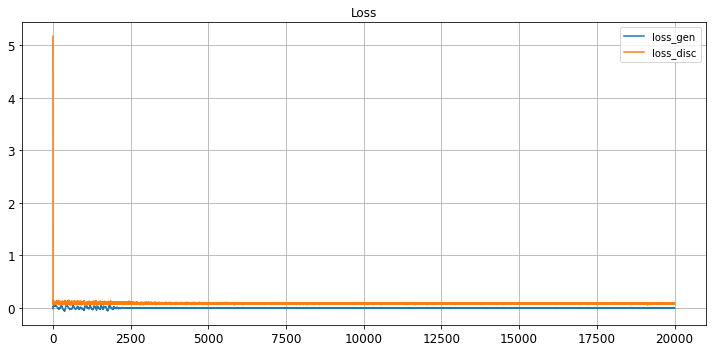

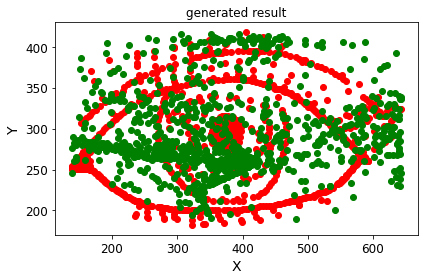

save the model & result
Epoch 20001/50000
critic: 0.084131 - generator: 0.000108 - 0s
Epoch 20002/50000
critic: 0.075000 - generator: -0.000199 - 0s
Epoch 20003/50000
critic: 0.081979 - generator: 0.001546 - 0s
Epoch 20004/50000
critic: 0.073370 - generator: 0.003309 - 0s
Epoch 20005/50000
critic: 0.070018 - generator: 0.003757 - 0s
Epoch 20006/50000
critic: 0.076254 - generator: -0.000149 - 0s
Epoch 20007/50000
critic: 0.088135 - generator: -0.000242 - 0s
Epoch 20008/50000
critic: 0.077282 - generator: 0.001067 - 0s
Epoch 20009/50000
critic: 0.078210 - generator: 0.002769 - 0s
Epoch 20010/50000
critic: 0.085266 - generator: -0.001392 - 0s
Epoch 20011/50000
critic: 0.074558 - generator: 0.000209 - 0s
Epoch 20012/50000
critic: 0.076292 - generator: 0.003941 - 0s
Epoch 20013/50000
critic: 0.077901 - generator: 0.000655 - 0s
Epoch 20014/50000
critic: 0.074488 - generator: 0.000249 - 0s
Epoch 20015/50000
critic: 0.075064 - generator: -0.000972 - 0s
Epoch 20016/50000
critic: 0.072331 - gene

critic: 0.073832 - generator: -0.001131 - 0s
Epoch 20133/50000
critic: 0.076899 - generator: 0.002316 - 0s
Epoch 20134/50000
critic: 0.078709 - generator: 0.001758 - 0s
Epoch 20135/50000
critic: 0.079132 - generator: -0.002673 - 0s
Epoch 20136/50000
critic: 0.078914 - generator: 0.000149 - 0s
Epoch 20137/50000
critic: 0.075046 - generator: -0.002317 - 0s
Epoch 20138/50000
critic: 0.069659 - generator: -0.003694 - 0s
Epoch 20139/50000
critic: 0.076898 - generator: 0.001666 - 0s
Epoch 20140/50000
critic: 0.081010 - generator: -0.001644 - 0s
Epoch 20141/50000
critic: 0.076164 - generator: 0.000205 - 0s
Epoch 20142/50000
critic: 0.082768 - generator: 0.000303 - 0s
Epoch 20143/50000
critic: 0.087258 - generator: 0.002423 - 0s
Epoch 20144/50000
critic: 0.084697 - generator: 0.000576 - 0s
Epoch 20145/50000
critic: 0.072027 - generator: 0.001468 - 0s
Epoch 20146/50000
critic: 0.083831 - generator: 0.005215 - 0s
Epoch 20147/50000
critic: 0.067396 - generator: 0.007910 - 0s
Epoch 20148/50000
cri

critic: 0.075765 - generator: 0.003493 - 0s
Epoch 20265/50000
critic: 0.081697 - generator: 0.004183 - 0s
Epoch 20266/50000
critic: 0.076068 - generator: 0.004862 - 0s
Epoch 20267/50000
critic: 0.077457 - generator: 0.001537 - 0s
Epoch 20268/50000
critic: 0.084401 - generator: -0.000739 - 0s
Epoch 20269/50000
critic: 0.080722 - generator: 0.000706 - 0s
Epoch 20270/50000
critic: 0.080473 - generator: 0.000846 - 0s
Epoch 20271/50000
critic: 0.080366 - generator: 0.000090 - 0s
Epoch 20272/50000
critic: 0.086078 - generator: 0.003711 - 0s
Epoch 20273/50000
critic: 0.079767 - generator: 0.001488 - 0s
Epoch 20274/50000
critic: 0.078263 - generator: 0.005490 - 0s
Epoch 20275/50000
critic: 0.079106 - generator: -0.000524 - 0s
Epoch 20276/50000
critic: 0.074957 - generator: -0.003674 - 0s
Epoch 20277/50000
critic: 0.085438 - generator: -0.000981 - 0s
Epoch 20278/50000
critic: 0.081357 - generator: 0.002009 - 0s
Epoch 20279/50000
critic: 0.078936 - generator: 0.000400 - 0s
Epoch 20280/50000
crit

critic: 0.076930 - generator: -0.002614 - 0s
Epoch 20397/50000
critic: 0.078619 - generator: 0.003772 - 0s
Epoch 20398/50000
critic: 0.078930 - generator: 0.003153 - 0s
Epoch 20399/50000
critic: 0.077313 - generator: 0.000044 - 0s
Epoch 20400/50000
critic: 0.077709 - generator: -0.003788 - 0s
Epoch 20401/50000
critic: 0.087472 - generator: 0.001420 - 0s
Epoch 20402/50000
critic: 0.081900 - generator: 0.000454 - 0s
Epoch 20403/50000
critic: 0.079821 - generator: -0.004283 - 0s
Epoch 20404/50000
critic: 0.077460 - generator: -0.001062 - 0s
Epoch 20405/50000
critic: 0.077457 - generator: -0.003297 - 0s
Epoch 20406/50000
critic: 0.076929 - generator: -0.003053 - 0s
Epoch 20407/50000
critic: 0.076846 - generator: 0.003446 - 0s
Epoch 20408/50000
critic: 0.079885 - generator: 0.001969 - 0s
Epoch 20409/50000
critic: 0.080160 - generator: 0.001930 - 0s
Epoch 20410/50000
critic: 0.082010 - generator: 0.002158 - 0s
Epoch 20411/50000
critic: 0.081764 - generator: -0.001265 - 0s
Epoch 20412/50000
c

critic: 0.087172 - generator: -0.001358 - 0s
Epoch 20529/50000
critic: 0.080666 - generator: -0.002556 - 0s
Epoch 20530/50000
critic: 0.084250 - generator: -0.004884 - 0s
Epoch 20531/50000
critic: 0.077055 - generator: 0.000018 - 0s
Epoch 20532/50000
critic: 0.086849 - generator: -0.000197 - 0s
Epoch 20533/50000
critic: 0.085529 - generator: 0.001839 - 0s
Epoch 20534/50000
critic: 0.083775 - generator: -0.002688 - 0s
Epoch 20535/50000
critic: 0.082256 - generator: 0.002638 - 0s
Epoch 20536/50000
critic: 0.072351 - generator: -0.001479 - 0s
Epoch 20537/50000
critic: 0.072482 - generator: -0.001107 - 0s
Epoch 20538/50000
critic: 0.081107 - generator: -0.003383 - 0s
Epoch 20539/50000
critic: 0.082686 - generator: -0.000368 - 0s
Epoch 20540/50000
critic: 0.081999 - generator: -0.000600 - 0s
Epoch 20541/50000
critic: 0.079102 - generator: -0.002645 - 0s
Epoch 20542/50000
critic: 0.079530 - generator: -0.001219 - 0s
Epoch 20543/50000
critic: 0.086051 - generator: -0.002616 - 0s
Epoch 20544/5

critic: 0.082236 - generator: 0.000254 - 0s
Epoch 20660/50000
critic: 0.070200 - generator: 0.001726 - 0s
Epoch 20661/50000
critic: 0.077809 - generator: -0.000519 - 0s
Epoch 20662/50000
critic: 0.088174 - generator: 0.003281 - 0s
Epoch 20663/50000
critic: 0.075643 - generator: 0.001545 - 0s
Epoch 20664/50000
critic: 0.078322 - generator: 0.003124 - 0s
Epoch 20665/50000
critic: 0.089640 - generator: 0.004275 - 0s
Epoch 20666/50000
critic: 0.074590 - generator: -0.000060 - 0s
Epoch 20667/50000
critic: 0.081933 - generator: -0.002306 - 0s
Epoch 20668/50000
critic: 0.088341 - generator: -0.001666 - 0s
Epoch 20669/50000
critic: 0.086934 - generator: -0.002240 - 0s
Epoch 20670/50000
critic: 0.083729 - generator: -0.002206 - 0s
Epoch 20671/50000
critic: 0.093689 - generator: -0.001947 - 0s
Epoch 20672/50000
critic: 0.075064 - generator: 0.001900 - 0s
Epoch 20673/50000
critic: 0.087496 - generator: 0.001620 - 0s
Epoch 20674/50000
critic: 0.080328 - generator: -0.000049 - 0s
Epoch 20675/50000


critic: 0.084246 - generator: 0.002427 - 0s
Epoch 20792/50000
critic: 0.080433 - generator: 0.003973 - 0s
Epoch 20793/50000
critic: 0.088251 - generator: 0.004685 - 0s
Epoch 20794/50000
critic: 0.075716 - generator: -0.000662 - 0s
Epoch 20795/50000
critic: 0.076915 - generator: -0.005587 - 0s
Epoch 20796/50000
critic: 0.077578 - generator: -0.000665 - 0s
Epoch 20797/50000
critic: 0.075560 - generator: 0.000605 - 0s
Epoch 20798/50000
critic: 0.073780 - generator: 0.000252 - 0s
Epoch 20799/50000
critic: 0.082161 - generator: -0.001073 - 0s
Epoch 20800/50000
critic: 0.082675 - generator: 0.001775 - 0s
Epoch 20801/50000
critic: 0.076572 - generator: 0.004911 - 0s
Epoch 20802/50000
critic: 0.077322 - generator: 0.002953 - 0s
Epoch 20803/50000
critic: 0.082076 - generator: -0.001248 - 0s
Epoch 20804/50000
critic: 0.074300 - generator: 0.005178 - 0s
Epoch 20805/50000
critic: 0.079323 - generator: 0.003428 - 0s
Epoch 20806/50000
critic: 0.075686 - generator: -0.000134 - 0s
Epoch 20807/50000
cr

critic: 0.079927 - generator: -0.004099 - 0s
Epoch 20924/50000
critic: 0.084569 - generator: 0.000348 - 0s
Epoch 20925/50000
critic: 0.078371 - generator: -0.001329 - 0s
Epoch 20926/50000
critic: 0.084386 - generator: -0.001040 - 0s
Epoch 20927/50000
critic: 0.079304 - generator: -0.000530 - 0s
Epoch 20928/50000
critic: 0.082017 - generator: -0.003789 - 0s
Epoch 20929/50000
critic: 0.076417 - generator: 0.001157 - 0s
Epoch 20930/50000
critic: 0.076609 - generator: 0.000125 - 0s
Epoch 20931/50000
critic: 0.081160 - generator: 0.002475 - 0s
Epoch 20932/50000
critic: 0.086483 - generator: -0.000805 - 0s
Epoch 20933/50000
critic: 0.075577 - generator: -0.001770 - 0s
Epoch 20934/50000
critic: 0.084833 - generator: -0.000859 - 0s
Epoch 20935/50000
critic: 0.078761 - generator: -0.002176 - 0s
Epoch 20936/50000
critic: 0.075696 - generator: -0.001608 - 0s
Epoch 20937/50000
critic: 0.083897 - generator: -0.001437 - 0s
Epoch 20938/50000
critic: 0.085034 - generator: -0.001465 - 0s
Epoch 20939/50

critic: 0.077892 - generator: -0.003808 - 0s
Epoch 21055/50000
critic: 0.083286 - generator: -0.004840 - 0s
Epoch 21056/50000
critic: 0.074323 - generator: -0.002684 - 0s
Epoch 21057/50000
critic: 0.089486 - generator: 0.001404 - 0s
Epoch 21058/50000
critic: 0.076073 - generator: 0.002829 - 0s
Epoch 21059/50000
critic: 0.082775 - generator: 0.001989 - 0s
Epoch 21060/50000
critic: 0.078384 - generator: 0.000747 - 0s
Epoch 21061/50000
critic: 0.087841 - generator: -0.000463 - 0s
Epoch 21062/50000
critic: 0.074479 - generator: 0.002840 - 0s
Epoch 21063/50000
critic: 0.087969 - generator: -0.002563 - 0s
Epoch 21064/50000
critic: 0.067936 - generator: -0.003406 - 0s
Epoch 21065/50000
critic: 0.081614 - generator: -0.004009 - 0s
Epoch 21066/50000
critic: 0.082001 - generator: -0.002189 - 0s
Epoch 21067/50000
critic: 0.079906 - generator: -0.000519 - 0s
Epoch 21068/50000
critic: 0.073312 - generator: -0.000189 - 0s
Epoch 21069/50000
critic: 0.088076 - generator: 0.002658 - 0s
Epoch 21070/5000

critic: 0.077090 - generator: -0.001802 - 0s
Epoch 21187/50000
critic: 0.086327 - generator: 0.000990 - 0s
Epoch 21188/50000
critic: 0.079968 - generator: 0.003643 - 0s
Epoch 21189/50000
critic: 0.077764 - generator: 0.000158 - 0s
Epoch 21190/50000
critic: 0.076891 - generator: 0.000893 - 0s
Epoch 21191/50000
critic: 0.083160 - generator: -0.001329 - 0s
Epoch 21192/50000
critic: 0.087239 - generator: -0.002452 - 0s
Epoch 21193/50000
critic: 0.086954 - generator: 0.000064 - 0s
Epoch 21194/50000
critic: 0.075768 - generator: 0.000405 - 0s
Epoch 21195/50000
critic: 0.087596 - generator: -0.001191 - 0s
Epoch 21196/50000
critic: 0.074718 - generator: 0.002159 - 0s
Epoch 21197/50000
critic: 0.070546 - generator: 0.000873 - 0s
Epoch 21198/50000
critic: 0.079122 - generator: -0.003162 - 0s
Epoch 21199/50000
critic: 0.089489 - generator: -0.002796 - 0s
Epoch 21200/50000
critic: 0.085483 - generator: 0.004179 - 0s
Epoch 21201/50000
critic: 0.084878 - generator: 0.000468 - 0s
Epoch 21202/50000
cr

critic: 0.077898 - generator: 0.001594 - 0s
Epoch 21319/50000
critic: 0.074604 - generator: -0.001322 - 0s
Epoch 21320/50000
critic: 0.084667 - generator: -0.000798 - 0s
Epoch 21321/50000
critic: 0.079829 - generator: 0.002815 - 0s
Epoch 21322/50000
critic: 0.081339 - generator: 0.001364 - 0s
Epoch 21323/50000
critic: 0.067231 - generator: -0.000090 - 0s
Epoch 21324/50000
critic: 0.067583 - generator: 0.000958 - 0s
Epoch 21325/50000
critic: 0.080980 - generator: -0.004133 - 0s
Epoch 21326/50000
critic: 0.081287 - generator: -0.001083 - 0s
Epoch 21327/50000
critic: 0.073102 - generator: 0.002125 - 0s
Epoch 21328/50000
critic: 0.080561 - generator: 0.004372 - 0s
Epoch 21329/50000
critic: 0.073195 - generator: 0.005507 - 0s
Epoch 21330/50000
critic: 0.087282 - generator: -0.000221 - 0s
Epoch 21331/50000
critic: 0.071478 - generator: 0.002540 - 0s
Epoch 21332/50000
critic: 0.082345 - generator: 0.000724 - 0s
Epoch 21333/50000
critic: 0.077800 - generator: 0.000238 - 0s
Epoch 21334/50000
cr

critic: 0.078863 - generator: 0.001684 - 0s
Epoch 21451/50000
critic: 0.073800 - generator: 0.001637 - 0s
Epoch 21452/50000
critic: 0.082762 - generator: -0.001020 - 0s
Epoch 21453/50000
critic: 0.082104 - generator: 0.001840 - 0s
Epoch 21454/50000
critic: 0.083581 - generator: 0.000264 - 0s
Epoch 21455/50000
critic: 0.086095 - generator: 0.000573 - 0s
Epoch 21456/50000
critic: 0.085392 - generator: -0.001025 - 0s
Epoch 21457/50000
critic: 0.082409 - generator: 0.001700 - 0s
Epoch 21458/50000
critic: 0.080336 - generator: -0.000090 - 0s
Epoch 21459/50000
critic: 0.091253 - generator: -0.000587 - 0s
Epoch 21460/50000
critic: 0.076699 - generator: 0.001423 - 0s
Epoch 21461/50000
critic: 0.081327 - generator: 0.001668 - 0s
Epoch 21462/50000
critic: 0.083932 - generator: 0.001707 - 0s
Epoch 21463/50000
critic: 0.079432 - generator: 0.003072 - 0s
Epoch 21464/50000
critic: 0.084015 - generator: -0.003360 - 0s
Epoch 21465/50000
critic: 0.079520 - generator: 0.000907 - 0s
Epoch 21466/50000
cri

critic: 0.082364 - generator: -0.001103 - 0s
Epoch 21583/50000
critic: 0.087309 - generator: 0.001799 - 0s
Epoch 21584/50000
critic: 0.078404 - generator: 0.003888 - 0s
Epoch 21585/50000
critic: 0.086216 - generator: -0.002375 - 0s
Epoch 21586/50000
critic: 0.083705 - generator: -0.000849 - 0s
Epoch 21587/50000
critic: 0.085469 - generator: 0.002158 - 0s
Epoch 21588/50000
critic: 0.077167 - generator: 0.000286 - 0s
Epoch 21589/50000
critic: 0.073534 - generator: -0.003180 - 0s
Epoch 21590/50000
critic: 0.089419 - generator: -0.000025 - 0s
Epoch 21591/50000
critic: 0.081242 - generator: 0.000676 - 0s
Epoch 21592/50000
critic: 0.086399 - generator: -0.000007 - 0s
Epoch 21593/50000
critic: 0.083398 - generator: 0.000160 - 0s
Epoch 21594/50000
critic: 0.065801 - generator: 0.000370 - 0s
Epoch 21595/50000
critic: 0.082416 - generator: 0.001756 - 0s
Epoch 21596/50000
critic: 0.080903 - generator: -0.003130 - 0s
Epoch 21597/50000
critic: 0.080801 - generator: 0.002111 - 0s
Epoch 21598/50000
c

critic: 0.082693 - generator: 0.001270 - 0s
Epoch 21715/50000
critic: 0.078889 - generator: -0.002804 - 0s
Epoch 21716/50000
critic: 0.090492 - generator: 0.000365 - 0s
Epoch 21717/50000
critic: 0.085627 - generator: -0.000204 - 0s
Epoch 21718/50000
critic: 0.087680 - generator: -0.002007 - 0s
Epoch 21719/50000
critic: 0.082146 - generator: 0.001156 - 0s
Epoch 21720/50000
critic: 0.082790 - generator: 0.002157 - 0s
Epoch 21721/50000
critic: 0.077589 - generator: -0.000666 - 0s
Epoch 21722/50000
critic: 0.079137 - generator: -0.002779 - 0s
Epoch 21723/50000
critic: 0.094445 - generator: -0.004305 - 0s
Epoch 21724/50000
critic: 0.081926 - generator: -0.006818 - 0s
Epoch 21725/50000
critic: 0.078111 - generator: -0.003000 - 0s
Epoch 21726/50000
critic: 0.072527 - generator: -0.003244 - 0s
Epoch 21727/50000
critic: 0.074243 - generator: -0.001325 - 0s
Epoch 21728/50000
critic: 0.070137 - generator: -0.001203 - 0s
Epoch 21729/50000
critic: 0.080573 - generator: 0.002690 - 0s
Epoch 21730/500

critic: 0.075079 - generator: 0.001399 - 0s
Epoch 21847/50000
critic: 0.075572 - generator: -0.001613 - 0s
Epoch 21848/50000
critic: 0.077690 - generator: -0.000490 - 0s
Epoch 21849/50000
critic: 0.081037 - generator: -0.001202 - 0s
Epoch 21850/50000
critic: 0.078665 - generator: 0.001188 - 0s
Epoch 21851/50000
critic: 0.083477 - generator: -0.003934 - 0s
Epoch 21852/50000
critic: 0.068556 - generator: -0.001994 - 0s
Epoch 21853/50000
critic: 0.084187 - generator: -0.003264 - 0s
Epoch 21854/50000
critic: 0.084154 - generator: -0.001350 - 0s
Epoch 21855/50000
critic: 0.073134 - generator: -0.000876 - 0s
Epoch 21856/50000
critic: 0.074571 - generator: -0.003233 - 0s
Epoch 21857/50000
critic: 0.081429 - generator: -0.001575 - 0s
Epoch 21858/50000
critic: 0.077309 - generator: -0.001767 - 0s
Epoch 21859/50000
critic: 0.079007 - generator: 0.002674 - 0s
Epoch 21860/50000
critic: 0.079288 - generator: -0.003009 - 0s
Epoch 21861/50000
critic: 0.087842 - generator: -0.001379 - 0s
Epoch 21862/5

critic: 0.081953 - generator: -0.004471 - 0s
Epoch 21978/50000
critic: 0.077520 - generator: -0.004382 - 0s
Epoch 21979/50000
critic: 0.074132 - generator: -0.002190 - 0s
Epoch 21980/50000
critic: 0.081943 - generator: -0.002136 - 0s
Epoch 21981/50000
critic: 0.080921 - generator: 0.000351 - 0s
Epoch 21982/50000
critic: 0.078652 - generator: -0.001627 - 0s
Epoch 21983/50000
critic: 0.092724 - generator: 0.003392 - 0s
Epoch 21984/50000
critic: 0.090027 - generator: 0.003259 - 0s
Epoch 21985/50000
critic: 0.075645 - generator: -0.001109 - 0s
Epoch 21986/50000
critic: 0.085725 - generator: -0.001153 - 0s
Epoch 21987/50000
critic: 0.076118 - generator: -0.002819 - 0s
Epoch 21988/50000
critic: 0.073569 - generator: -0.000310 - 0s
Epoch 21989/50000
critic: 0.077294 - generator: 0.003018 - 0s
Epoch 21990/50000
critic: 0.081627 - generator: -0.002378 - 0s
Epoch 21991/50000
critic: 0.071770 - generator: -0.002818 - 0s
Epoch 21992/50000
critic: 0.090554 - generator: 0.001615 - 0s
Epoch 21993/500

critic: 0.071064 - generator: -0.000020 - 0s
Epoch 22110/50000
critic: 0.076107 - generator: -0.001905 - 0s
Epoch 22111/50000
critic: 0.083255 - generator: -0.004459 - 0s
Epoch 22112/50000
critic: 0.086516 - generator: -0.001710 - 0s
Epoch 22113/50000
critic: 0.075574 - generator: -0.000243 - 0s
Epoch 22114/50000
critic: 0.074938 - generator: -0.002741 - 0s
Epoch 22115/50000
critic: 0.080311 - generator: -0.003114 - 0s
Epoch 22116/50000
critic: 0.079001 - generator: 0.000221 - 0s
Epoch 22117/50000
critic: 0.071988 - generator: -0.000276 - 0s
Epoch 22118/50000
critic: 0.083865 - generator: 0.001641 - 0s
Epoch 22119/50000
critic: 0.070524 - generator: -0.000734 - 0s
Epoch 22120/50000
critic: 0.081517 - generator: -0.000986 - 0s
Epoch 22121/50000
critic: 0.083756 - generator: 0.001052 - 0s
Epoch 22122/50000
critic: 0.075732 - generator: -0.001767 - 0s
Epoch 22123/50000
critic: 0.074209 - generator: 0.000155 - 0s
Epoch 22124/50000
critic: 0.081854 - generator: -0.000182 - 0s
Epoch 22125/50

critic: 0.081991 - generator: -0.000736 - 0s
Epoch 22242/50000
critic: 0.080673 - generator: -0.001835 - 0s
Epoch 22243/50000
critic: 0.092565 - generator: 0.000676 - 0s
Epoch 22244/50000
critic: 0.084341 - generator: -0.000188 - 0s
Epoch 22245/50000
critic: 0.080913 - generator: 0.000621 - 0s
Epoch 22246/50000
critic: 0.081122 - generator: 0.002684 - 0s
Epoch 22247/50000
critic: 0.084981 - generator: -0.003839 - 0s
Epoch 22248/50000
critic: 0.085050 - generator: 0.000406 - 0s
Epoch 22249/50000
critic: 0.077037 - generator: 0.002358 - 0s
Epoch 22250/50000
critic: 0.071943 - generator: -0.001532 - 0s
Epoch 22251/50000
critic: 0.080735 - generator: -0.001369 - 0s
Epoch 22252/50000
critic: 0.087067 - generator: -0.000798 - 0s
Epoch 22253/50000
critic: 0.085098 - generator: -0.001041 - 0s
Epoch 22254/50000
critic: 0.083993 - generator: 0.001620 - 0s
Epoch 22255/50000
critic: 0.082807 - generator: 0.001348 - 0s
Epoch 22256/50000
critic: 0.082304 - generator: 0.000048 - 0s
Epoch 22257/50000


critic: 0.075662 - generator: 0.004520 - 0s
Epoch 22374/50000
critic: 0.081591 - generator: 0.004518 - 0s
Epoch 22375/50000
critic: 0.074718 - generator: -0.000064 - 0s
Epoch 22376/50000
critic: 0.073603 - generator: -0.004108 - 0s
Epoch 22377/50000
critic: 0.073867 - generator: -0.002833 - 0s
Epoch 22378/50000
critic: 0.086841 - generator: -0.005887 - 0s
Epoch 22379/50000
critic: 0.080783 - generator: 0.000632 - 0s
Epoch 22380/50000
critic: 0.075361 - generator: -0.000167 - 0s
Epoch 22381/50000
critic: 0.084917 - generator: 0.001396 - 0s
Epoch 22382/50000
critic: 0.091764 - generator: -0.000418 - 0s
Epoch 22383/50000
critic: 0.088121 - generator: -0.001452 - 0s
Epoch 22384/50000
critic: 0.090162 - generator: -0.002695 - 0s
Epoch 22385/50000
critic: 0.075466 - generator: 0.000196 - 0s
Epoch 22386/50000
critic: 0.081583 - generator: 0.000530 - 0s
Epoch 22387/50000
critic: 0.081880 - generator: 0.000217 - 0s
Epoch 22388/50000
critic: 0.069451 - generator: -0.000284 - 0s
Epoch 22389/50000

critic: 0.077326 - generator: -0.001078 - 0s
Epoch 22505/50000
critic: 0.085467 - generator: 0.000655 - 0s
Epoch 22506/50000
critic: 0.083535 - generator: -0.002419 - 0s
Epoch 22507/50000
critic: 0.082028 - generator: -0.003055 - 0s
Epoch 22508/50000
critic: 0.095475 - generator: -0.002099 - 0s
Epoch 22509/50000
critic: 0.083243 - generator: -0.000392 - 0s
Epoch 22510/50000
critic: 0.072439 - generator: 0.001300 - 0s
Epoch 22511/50000
critic: 0.086117 - generator: 0.001942 - 0s
Epoch 22512/50000
critic: 0.079682 - generator: 0.001896 - 0s
Epoch 22513/50000
critic: 0.076890 - generator: 0.001032 - 0s
Epoch 22514/50000
critic: 0.083336 - generator: 0.002000 - 0s
Epoch 22515/50000
critic: 0.080580 - generator: -0.004586 - 0s
Epoch 22516/50000
critic: 0.078541 - generator: -0.002883 - 0s
Epoch 22517/50000
critic: 0.077842 - generator: -0.003359 - 0s
Epoch 22518/50000
critic: 0.085977 - generator: 0.003203 - 0s
Epoch 22519/50000
critic: 0.076236 - generator: 0.003029 - 0s
Epoch 22520/50000


critic: 0.077698 - generator: 0.000367 - 0s
Epoch 22637/50000
critic: 0.086862 - generator: -0.000651 - 0s
Epoch 22638/50000
critic: 0.084699 - generator: -0.001753 - 0s
Epoch 22639/50000
critic: 0.083272 - generator: -0.001545 - 0s
Epoch 22640/50000
critic: 0.074968 - generator: 0.001204 - 0s
Epoch 22641/50000
critic: 0.085360 - generator: 0.000400 - 0s
Epoch 22642/50000
critic: 0.082295 - generator: 0.002867 - 0s
Epoch 22643/50000
critic: 0.080502 - generator: 0.003213 - 0s
Epoch 22644/50000
critic: 0.075228 - generator: -0.001668 - 0s
Epoch 22645/50000
critic: 0.074583 - generator: -0.005214 - 0s
Epoch 22646/50000
critic: 0.082209 - generator: 0.001322 - 0s
Epoch 22647/50000
critic: 0.080171 - generator: -0.000507 - 0s
Epoch 22648/50000
critic: 0.090307 - generator: -0.000082 - 0s
Epoch 22649/50000
critic: 0.082959 - generator: -0.000236 - 0s
Epoch 22650/50000
critic: 0.081858 - generator: 0.001963 - 0s
Epoch 22651/50000
critic: 0.083022 - generator: 0.000499 - 0s
Epoch 22652/50000


critic: 0.086776 - generator: 0.002361 - 0s
Epoch 22769/50000
critic: 0.080757 - generator: 0.005731 - 0s
Epoch 22770/50000
critic: 0.087762 - generator: 0.001110 - 0s
Epoch 22771/50000
critic: 0.074628 - generator: 0.002106 - 0s
Epoch 22772/50000
critic: 0.075181 - generator: 0.000523 - 0s
Epoch 22773/50000
critic: 0.080319 - generator: 0.000747 - 0s
Epoch 22774/50000
critic: 0.092068 - generator: 0.000938 - 0s
Epoch 22775/50000
critic: 0.069054 - generator: 0.002019 - 0s
Epoch 22776/50000
critic: 0.080506 - generator: -0.002510 - 0s
Epoch 22777/50000
critic: 0.082495 - generator: -0.002422 - 0s
Epoch 22778/50000
critic: 0.080706 - generator: -0.002788 - 0s
Epoch 22779/50000
critic: 0.071879 - generator: -0.001751 - 0s
Epoch 22780/50000
critic: 0.091274 - generator: -0.000017 - 0s
Epoch 22781/50000
critic: 0.082660 - generator: 0.000081 - 0s
Epoch 22782/50000
critic: 0.069199 - generator: -0.001058 - 0s
Epoch 22783/50000
critic: 0.080732 - generator: -0.001683 - 0s
Epoch 22784/50000
c

critic: 0.080884 - generator: -0.004155 - 0s
Epoch 22901/50000
critic: 0.082075 - generator: -0.001088 - 0s
Epoch 22902/50000
critic: 0.085748 - generator: 0.001873 - 0s
Epoch 22903/50000
critic: 0.082469 - generator: 0.001714 - 0s
Epoch 22904/50000
critic: 0.080440 - generator: 0.000521 - 0s
Epoch 22905/50000
critic: 0.082400 - generator: 0.005071 - 0s
Epoch 22906/50000
critic: 0.084493 - generator: 0.000693 - 0s
Epoch 22907/50000
critic: 0.088911 - generator: 0.002591 - 0s
Epoch 22908/50000
critic: 0.081945 - generator: 0.001251 - 0s
Epoch 22909/50000
critic: 0.074843 - generator: 0.002199 - 0s
Epoch 22910/50000
critic: 0.077822 - generator: -0.001886 - 0s
Epoch 22911/50000
critic: 0.081472 - generator: -0.000183 - 0s
Epoch 22912/50000
critic: 0.080245 - generator: -0.000106 - 0s
Epoch 22913/50000
critic: 0.077720 - generator: -0.003013 - 0s
Epoch 22914/50000
critic: 0.082958 - generator: 0.001733 - 0s
Epoch 22915/50000
critic: 0.079772 - generator: -0.000419 - 0s
Epoch 22916/50000
c

critic: 0.077310 - generator: 0.005276 - 0s
Epoch 23033/50000
critic: 0.076116 - generator: -0.001040 - 0s
Epoch 23034/50000
critic: 0.083688 - generator: -0.001082 - 0s
Epoch 23035/50000
critic: 0.084469 - generator: 0.001724 - 0s
Epoch 23036/50000
critic: 0.075636 - generator: -0.003932 - 0s
Epoch 23037/50000
critic: 0.077925 - generator: 0.002638 - 0s
Epoch 23038/50000
critic: 0.079374 - generator: 0.000505 - 0s
Epoch 23039/50000
critic: 0.069718 - generator: 0.002750 - 0s
Epoch 23040/50000
critic: 0.068059 - generator: 0.001391 - 0s
Epoch 23041/50000
critic: 0.083046 - generator: -0.002434 - 0s
Epoch 23042/50000
critic: 0.091131 - generator: 0.003508 - 0s
Epoch 23043/50000
critic: 0.075129 - generator: 0.000667 - 0s
Epoch 23044/50000
critic: 0.087413 - generator: -0.001733 - 0s
Epoch 23045/50000
critic: 0.081651 - generator: -0.000806 - 0s
Epoch 23046/50000
critic: 0.078183 - generator: -0.002055 - 0s
Epoch 23047/50000
critic: 0.083145 - generator: 0.001681 - 0s
Epoch 23048/50000
c

critic: 0.080476 - generator: 0.000581 - 0s
Epoch 23165/50000
critic: 0.084384 - generator: -0.000626 - 0s
Epoch 23166/50000
critic: 0.075851 - generator: -0.002969 - 0s
Epoch 23167/50000
critic: 0.075750 - generator: -0.002536 - 0s
Epoch 23168/50000
critic: 0.081974 - generator: -0.000979 - 0s
Epoch 23169/50000
critic: 0.078290 - generator: 0.002934 - 0s
Epoch 23170/50000
critic: 0.080655 - generator: -0.000074 - 0s
Epoch 23171/50000
critic: 0.083458 - generator: -0.001221 - 0s
Epoch 23172/50000
critic: 0.073530 - generator: -0.002300 - 0s
Epoch 23173/50000
critic: 0.070711 - generator: 0.003939 - 0s
Epoch 23174/50000
critic: 0.077878 - generator: -0.002991 - 0s
Epoch 23175/50000
critic: 0.070259 - generator: -0.000519 - 0s
Epoch 23176/50000
critic: 0.077948 - generator: -0.000440 - 0s
Epoch 23177/50000
critic: 0.085009 - generator: -0.002152 - 0s
Epoch 23178/50000
critic: 0.078786 - generator: 0.003217 - 0s
Epoch 23179/50000
critic: 0.080652 - generator: 0.003102 - 0s
Epoch 23180/500

critic: 0.083987 - generator: 0.001958 - 0s
Epoch 23297/50000
critic: 0.076575 - generator: -0.001048 - 0s
Epoch 23298/50000
critic: 0.080254 - generator: -0.002437 - 0s
Epoch 23299/50000
critic: 0.078365 - generator: 0.000073 - 0s
Epoch 23300/50000
critic: 0.079528 - generator: 0.002156 - 0s
Epoch 23301/50000
critic: 0.079055 - generator: 0.001517 - 0s
Epoch 23302/50000
critic: 0.068953 - generator: 0.001182 - 0s
Epoch 23303/50000
critic: 0.087963 - generator: 0.003718 - 0s
Epoch 23304/50000
critic: 0.086649 - generator: 0.001241 - 0s
Epoch 23305/50000
critic: 0.071681 - generator: 0.002534 - 0s
Epoch 23306/50000
critic: 0.081584 - generator: 0.001168 - 0s
Epoch 23307/50000
critic: 0.073460 - generator: -0.000897 - 0s
Epoch 23308/50000
critic: 0.084488 - generator: -0.003297 - 0s
Epoch 23309/50000
critic: 0.083024 - generator: -0.002748 - 0s
Epoch 23310/50000
critic: 0.084324 - generator: 0.002870 - 0s
Epoch 23311/50000
critic: 0.079278 - generator: 0.002157 - 0s
Epoch 23312/50000
cri

critic: 0.081182 - generator: 0.001355 - 0s
Epoch 23429/50000
critic: 0.089131 - generator: -0.002760 - 0s
Epoch 23430/50000
critic: 0.085181 - generator: -0.000716 - 0s
Epoch 23431/50000
critic: 0.091954 - generator: 0.000462 - 0s
Epoch 23432/50000
critic: 0.083339 - generator: -0.001020 - 0s
Epoch 23433/50000
critic: 0.082963 - generator: 0.002159 - 0s
Epoch 23434/50000
critic: 0.075664 - generator: 0.002437 - 0s
Epoch 23435/50000
critic: 0.082585 - generator: 0.005159 - 0s
Epoch 23436/50000
critic: 0.081536 - generator: 0.000319 - 0s
Epoch 23437/50000
critic: 0.079087 - generator: -0.002294 - 0s
Epoch 23438/50000
critic: 0.079277 - generator: 0.003836 - 0s
Epoch 23439/50000
critic: 0.067376 - generator: -0.002567 - 0s
Epoch 23440/50000
critic: 0.082321 - generator: 0.000288 - 0s
Epoch 23441/50000
critic: 0.085777 - generator: 0.000415 - 0s
Epoch 23442/50000
critic: 0.086575 - generator: 0.001134 - 0s
Epoch 23443/50000
critic: 0.078252 - generator: -0.000183 - 0s
Epoch 23444/50000
cr

Epoch 23561/50000
critic: 0.070903 - generator: 0.000168 - 0s
Epoch 23562/50000
critic: 0.092308 - generator: 0.003271 - 0s
Epoch 23563/50000
critic: 0.064441 - generator: 0.001772 - 0s
Epoch 23564/50000
critic: 0.079178 - generator: -0.004815 - 0s
Epoch 23565/50000
critic: 0.079144 - generator: -0.000181 - 0s
Epoch 23566/50000
critic: 0.082913 - generator: 0.000822 - 0s
Epoch 23567/50000
critic: 0.081746 - generator: -0.000908 - 0s
Epoch 23568/50000
critic: 0.090512 - generator: 0.001163 - 0s
Epoch 23569/50000
critic: 0.084267 - generator: -0.002168 - 0s
Epoch 23570/50000
critic: 0.077224 - generator: 0.004163 - 0s
Epoch 23571/50000
critic: 0.078054 - generator: 0.000549 - 0s
Epoch 23572/50000
critic: 0.083746 - generator: 0.000807 - 0s
Epoch 23573/50000
critic: 0.086657 - generator: -0.002874 - 0s
Epoch 23574/50000
critic: 0.082225 - generator: 0.001656 - 0s
Epoch 23575/50000
critic: 0.078229 - generator: 0.002534 - 0s
Epoch 23576/50000
critic: 0.094222 - generator: -0.001880 - 0s
Ep

critic: 0.086549 - generator: -0.000153 - 0s
Epoch 23694/50000
critic: 0.067143 - generator: -0.000446 - 0s
Epoch 23695/50000
critic: 0.089412 - generator: -0.001482 - 0s
Epoch 23696/50000
critic: 0.073340 - generator: 0.002524 - 0s
Epoch 23697/50000
critic: 0.074360 - generator: 0.000593 - 0s
Epoch 23698/50000
critic: 0.083255 - generator: 0.002266 - 0s
Epoch 23699/50000
critic: 0.078342 - generator: 0.000607 - 0s
Epoch 23700/50000
critic: 0.072485 - generator: 0.002313 - 0s
Epoch 23701/50000
critic: 0.074650 - generator: -0.002386 - 0s
Epoch 23702/50000
critic: 0.077854 - generator: -0.001888 - 0s
Epoch 23703/50000
critic: 0.081956 - generator: 0.001650 - 0s
Epoch 23704/50000
critic: 0.081572 - generator: -0.002064 - 0s
Epoch 23705/50000
critic: 0.087757 - generator: -0.000545 - 0s
Epoch 23706/50000
critic: 0.072286 - generator: 0.001350 - 0s
Epoch 23707/50000
critic: 0.084653 - generator: -0.002383 - 0s
Epoch 23708/50000
critic: 0.082360 - generator: -0.003294 - 0s
Epoch 23709/50000

critic: 0.082730 - generator: -0.000956 - 0s
Epoch 23826/50000
critic: 0.077605 - generator: 0.002124 - 0s
Epoch 23827/50000
critic: 0.082207 - generator: 0.002351 - 0s
Epoch 23828/50000
critic: 0.076060 - generator: -0.001341 - 0s
Epoch 23829/50000
critic: 0.080237 - generator: -0.000449 - 0s
Epoch 23830/50000
critic: 0.079054 - generator: -0.004235 - 0s
Epoch 23831/50000
critic: 0.075193 - generator: -0.002181 - 0s
Epoch 23832/50000
critic: 0.089915 - generator: 0.000495 - 0s
Epoch 23833/50000
critic: 0.085290 - generator: 0.000010 - 0s
Epoch 23834/50000
critic: 0.083677 - generator: 0.001209 - 0s
Epoch 23835/50000
critic: 0.074134 - generator: -0.001767 - 0s
Epoch 23836/50000
critic: 0.082734 - generator: -0.000756 - 0s
Epoch 23837/50000
critic: 0.065617 - generator: -0.002935 - 0s
Epoch 23838/50000
critic: 0.079386 - generator: -0.002093 - 0s
Epoch 23839/50000
critic: 0.078416 - generator: -0.000742 - 0s
Epoch 23840/50000
critic: 0.080691 - generator: 0.000129 - 0s
Epoch 23841/5000

critic: 0.085385 - generator: 0.001826 - 0s
Epoch 23959/50000
critic: 0.084251 - generator: -0.002942 - 0s
Epoch 23960/50000
critic: 0.075174 - generator: -0.003970 - 0s
Epoch 23961/50000
critic: 0.089891 - generator: 0.004455 - 0s
Epoch 23962/50000
critic: 0.086131 - generator: 0.000160 - 0s
Epoch 23963/50000
critic: 0.084688 - generator: -0.004028 - 0s
Epoch 23964/50000
critic: 0.074286 - generator: -0.004328 - 0s
Epoch 23965/50000
critic: 0.086162 - generator: 0.000138 - 0s
Epoch 23966/50000
critic: 0.086939 - generator: -0.003900 - 0s
Epoch 23967/50000
critic: 0.075586 - generator: 0.000125 - 0s
Epoch 23968/50000
critic: 0.079790 - generator: 0.003540 - 0s
Epoch 23969/50000
critic: 0.090516 - generator: 0.002930 - 0s
Epoch 23970/50000
critic: 0.078321 - generator: 0.001089 - 0s
Epoch 23971/50000
critic: 0.079164 - generator: 0.000432 - 0s
Epoch 23972/50000
critic: 0.078330 - generator: -0.003247 - 0s
Epoch 23973/50000
critic: 0.095044 - generator: 0.000139 - 0s
Epoch 23974/50000
cr

critic: 0.079609 - generator: 0.000588 - 0s
Epoch 24092/50000
critic: 0.072808 - generator: 0.001358 - 0s
Epoch 24093/50000
critic: 0.076861 - generator: -0.002754 - 0s
Epoch 24094/50000
critic: 0.080238 - generator: -0.003761 - 0s
Epoch 24095/50000
critic: 0.078114 - generator: 0.001021 - 0s
Epoch 24096/50000
critic: 0.073223 - generator: -0.000399 - 0s
Epoch 24097/50000
critic: 0.086220 - generator: -0.000070 - 0s
Epoch 24098/50000
critic: 0.088054 - generator: -0.001965 - 0s
Epoch 24099/50000
critic: 0.089000 - generator: 0.000042 - 0s
Epoch 24100/50000
critic: 0.076660 - generator: 0.002130 - 0s
Epoch 24101/50000
critic: 0.079501 - generator: -0.002521 - 0s
Epoch 24102/50000
critic: 0.089460 - generator: -0.004044 - 0s
Epoch 24103/50000
critic: 0.083272 - generator: 0.001300 - 0s
Epoch 24104/50000
critic: 0.080345 - generator: 0.002234 - 0s
Epoch 24105/50000
critic: 0.073010 - generator: -0.000174 - 0s
Epoch 24106/50000
critic: 0.075903 - generator: 0.002050 - 0s
Epoch 24107/50000


critic: 0.087129 - generator: -0.000552 - 0s
Epoch 24224/50000
critic: 0.079118 - generator: 0.000058 - 0s
Epoch 24225/50000
critic: 0.078396 - generator: -0.005583 - 0s
Epoch 24226/50000
critic: 0.075744 - generator: -0.004822 - 0s
Epoch 24227/50000
critic: 0.073252 - generator: 0.000814 - 0s
Epoch 24228/50000
critic: 0.076447 - generator: 0.000810 - 0s
Epoch 24229/50000
critic: 0.088962 - generator: 0.002128 - 0s
Epoch 24230/50000
critic: 0.085589 - generator: -0.001810 - 0s
Epoch 24231/50000
critic: 0.086542 - generator: -0.003359 - 0s
Epoch 24232/50000
critic: 0.084280 - generator: 0.003185 - 0s
Epoch 24233/50000
critic: 0.080547 - generator: -0.002882 - 0s
Epoch 24234/50000
critic: 0.074389 - generator: 0.001195 - 0s
Epoch 24235/50000
critic: 0.080941 - generator: 0.000893 - 0s
Epoch 24236/50000
critic: 0.087394 - generator: -0.002918 - 0s
Epoch 24237/50000
critic: 0.085224 - generator: 0.000588 - 0s
Epoch 24238/50000
critic: 0.076390 - generator: -0.003123 - 0s
Epoch 24239/50000


critic: 0.079138 - generator: -0.002960 - 0s
Epoch 24356/50000
critic: 0.082104 - generator: 0.000017 - 0s
Epoch 24357/50000
critic: 0.083866 - generator: 0.002133 - 0s
Epoch 24358/50000
critic: 0.092657 - generator: 0.004263 - 0s
Epoch 24359/50000
critic: 0.075288 - generator: 0.002093 - 0s
Epoch 24360/50000
critic: 0.076695 - generator: 0.002641 - 0s
Epoch 24361/50000
critic: 0.083008 - generator: 0.000494 - 0s
Epoch 24362/50000
critic: 0.075506 - generator: -0.000110 - 0s
Epoch 24363/50000
critic: 0.079347 - generator: 0.002277 - 0s
Epoch 24364/50000
critic: 0.078014 - generator: -0.002031 - 0s
Epoch 24365/50000
critic: 0.085182 - generator: -0.003101 - 0s
Epoch 24366/50000
critic: 0.080787 - generator: -0.002510 - 0s
Epoch 24367/50000
critic: 0.078698 - generator: -0.002522 - 0s
Epoch 24368/50000
critic: 0.074301 - generator: -0.000037 - 0s
Epoch 24369/50000
critic: 0.070521 - generator: 0.005669 - 0s
Epoch 24370/50000
critic: 0.086005 - generator: -0.002558 - 0s
Epoch 24371/50000


critic: 0.077198 - generator: -0.002025 - 0s
Epoch 24488/50000
critic: 0.086653 - generator: -0.002508 - 0s
Epoch 24489/50000
critic: 0.071394 - generator: 0.000218 - 0s
Epoch 24490/50000
critic: 0.077095 - generator: -0.000601 - 0s
Epoch 24491/50000
critic: 0.065555 - generator: 0.003713 - 0s
Epoch 24492/50000
critic: 0.076103 - generator: -0.000897 - 0s
Epoch 24493/50000
critic: 0.079319 - generator: 0.000111 - 0s
Epoch 24494/50000
critic: 0.084941 - generator: -0.001022 - 0s
Epoch 24495/50000
critic: 0.073306 - generator: -0.001072 - 0s
Epoch 24496/50000
critic: 0.077797 - generator: 0.001953 - 0s
Epoch 24497/50000
critic: 0.078180 - generator: -0.001011 - 0s
Epoch 24498/50000
critic: 0.081891 - generator: 0.000190 - 0s
Epoch 24499/50000
critic: 0.079520 - generator: -0.002632 - 0s
Epoch 24500/50000
critic: 0.088811 - generator: -0.003514 - 0s
Epoch 24501/50000
critic: 0.078804 - generator: 0.000707 - 0s
Epoch 24502/50000
critic: 0.077091 - generator: 0.001465 - 0s
Epoch 24503/50000

critic: 0.090607 - generator: 0.000414 - 0s
Epoch 24620/50000
critic: 0.080780 - generator: -0.000231 - 0s
Epoch 24621/50000
critic: 0.083063 - generator: -0.003507 - 0s
Epoch 24622/50000
critic: 0.078618 - generator: 0.000787 - 0s
Epoch 24623/50000
critic: 0.077198 - generator: 0.001626 - 0s
Epoch 24624/50000
critic: 0.076862 - generator: -0.003387 - 0s
Epoch 24625/50000
critic: 0.082277 - generator: -0.002825 - 0s
Epoch 24626/50000
critic: 0.070884 - generator: 0.001044 - 0s
Epoch 24627/50000
critic: 0.078352 - generator: -0.004516 - 0s
Epoch 24628/50000
critic: 0.074377 - generator: 0.001058 - 0s
Epoch 24629/50000
critic: 0.078371 - generator: 0.003598 - 0s
Epoch 24630/50000
critic: 0.089324 - generator: 0.004115 - 0s
Epoch 24631/50000
critic: 0.077241 - generator: 0.000104 - 0s
Epoch 24632/50000
critic: 0.085729 - generator: 0.000676 - 0s
Epoch 24633/50000
critic: 0.084677 - generator: 0.003953 - 0s
Epoch 24634/50000
critic: 0.081700 - generator: 0.004494 - 0s
Epoch 24635/50000
cri

critic: 0.076875 - generator: -0.001284 - 0s
Epoch 24752/50000
critic: 0.080832 - generator: -0.002601 - 0s
Epoch 24753/50000
critic: 0.085878 - generator: -0.002377 - 0s
Epoch 24754/50000
critic: 0.076016 - generator: -0.003354 - 0s
Epoch 24755/50000
critic: 0.081374 - generator: 0.000029 - 0s
Epoch 24756/50000
critic: 0.068075 - generator: 0.002651 - 0s
Epoch 24757/50000
critic: 0.079665 - generator: 0.003555 - 0s
Epoch 24758/50000
critic: 0.077940 - generator: 0.003885 - 0s
Epoch 24759/50000
critic: 0.081100 - generator: -0.000214 - 0s
Epoch 24760/50000
critic: 0.081748 - generator: -0.001300 - 0s
Epoch 24761/50000
critic: 0.078471 - generator: 0.000485 - 0s
Epoch 24762/50000
critic: 0.078172 - generator: 0.002288 - 0s
Epoch 24763/50000
critic: 0.090131 - generator: -0.001130 - 0s
Epoch 24764/50000
critic: 0.085783 - generator: -0.001972 - 0s
Epoch 24765/50000
critic: 0.081007 - generator: -0.003163 - 0s
Epoch 24766/50000
critic: 0.081714 - generator: -0.002137 - 0s
Epoch 24767/5000

critic: 0.082560 - generator: -0.001650 - 0s
Epoch 24883/50000
critic: 0.077889 - generator: 0.002326 - 0s
Epoch 24884/50000
critic: 0.077110 - generator: 0.004224 - 0s
Epoch 24885/50000
critic: 0.086186 - generator: 0.003297 - 0s
Epoch 24886/50000
critic: 0.074312 - generator: 0.001263 - 0s
Epoch 24887/50000
critic: 0.077889 - generator: -0.001395 - 0s
Epoch 24888/50000
critic: 0.081702 - generator: 0.002613 - 0s
Epoch 24889/50000
critic: 0.080413 - generator: -0.002558 - 0s
Epoch 24890/50000
critic: 0.087340 - generator: -0.002493 - 0s
Epoch 24891/50000
critic: 0.086998 - generator: -0.002356 - 0s
Epoch 24892/50000
critic: 0.082694 - generator: -0.002448 - 0s
Epoch 24893/50000
critic: 0.084016 - generator: 0.002085 - 0s
Epoch 24894/50000
critic: 0.079583 - generator: -0.003065 - 0s
Epoch 24895/50000
critic: 0.081203 - generator: -0.000152 - 0s
Epoch 24896/50000
critic: 0.083713 - generator: 0.004373 - 0s
Epoch 24897/50000
critic: 0.081641 - generator: 0.001170 - 0s
Epoch 24898/50000


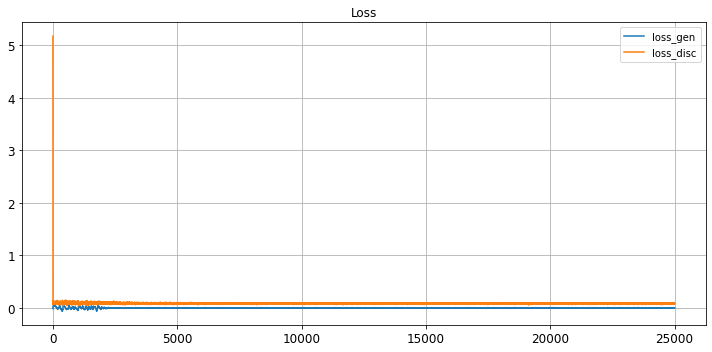

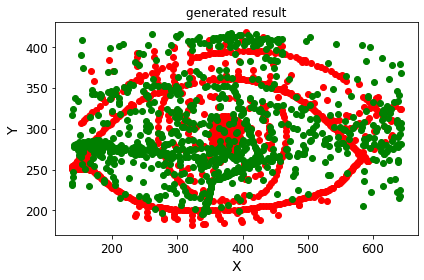

save the model & result
Epoch 25001/50000
critic: 0.075671 - generator: -0.000754 - 0s
Epoch 25002/50000
critic: 0.090747 - generator: 0.002922 - 0s
Epoch 25003/50000
critic: 0.079370 - generator: 0.001983 - 0s
Epoch 25004/50000
critic: 0.079832 - generator: 0.000728 - 0s
Epoch 25005/50000
critic: 0.088970 - generator: -0.003415 - 0s
Epoch 25006/50000
critic: 0.081780 - generator: -0.000764 - 0s
Epoch 25007/50000
critic: 0.072669 - generator: 0.002518 - 0s
Epoch 25008/50000
critic: 0.082389 - generator: 0.001359 - 0s
Epoch 25009/50000
critic: 0.080786 - generator: -0.000331 - 0s
Epoch 25010/50000
critic: 0.076944 - generator: 0.003297 - 0s
Epoch 25011/50000
critic: 0.090192 - generator: 0.000817 - 0s
Epoch 25012/50000
critic: 0.071273 - generator: -0.001370 - 0s
Epoch 25013/50000
critic: 0.080712 - generator: -0.001821 - 0s
Epoch 25014/50000
critic: 0.078592 - generator: -0.004728 - 0s
Epoch 25015/50000
critic: 0.087768 - generator: -0.001457 - 0s
Epoch 25016/50000
critic: 0.076633 - g

critic: 0.078935 - generator: 0.001593 - 0s
Epoch 25133/50000
critic: 0.083911 - generator: -0.000330 - 0s
Epoch 25134/50000
critic: 0.078531 - generator: -0.002431 - 0s
Epoch 25135/50000
critic: 0.085941 - generator: -0.000527 - 0s
Epoch 25136/50000
critic: 0.082207 - generator: 0.000359 - 0s
Epoch 25137/50000
critic: 0.069822 - generator: -0.001486 - 0s
Epoch 25138/50000
critic: 0.087205 - generator: 0.001373 - 0s
Epoch 25139/50000
critic: 0.083431 - generator: -0.000315 - 0s
Epoch 25140/50000
critic: 0.075633 - generator: 0.000930 - 0s
Epoch 25141/50000
critic: 0.087211 - generator: 0.003443 - 0s
Epoch 25142/50000
critic: 0.071149 - generator: -0.002705 - 0s
Epoch 25143/50000
critic: 0.077940 - generator: 0.001082 - 0s
Epoch 25144/50000
critic: 0.082641 - generator: 0.000923 - 0s
Epoch 25145/50000
critic: 0.079529 - generator: 0.004016 - 0s
Epoch 25146/50000
critic: 0.077749 - generator: 0.002246 - 0s
Epoch 25147/50000
critic: 0.079969 - generator: 0.001684 - 0s
Epoch 25148/50000
cr

critic: 0.073288 - generator: -0.002360 - 0s
Epoch 25266/50000
critic: 0.083094 - generator: 0.002063 - 0s
Epoch 25267/50000
critic: 0.079487 - generator: 0.001663 - 0s
Epoch 25268/50000
critic: 0.078089 - generator: -0.001224 - 0s
Epoch 25269/50000
critic: 0.065156 - generator: 0.002386 - 0s
Epoch 25270/50000
critic: 0.075319 - generator: -0.002533 - 0s
Epoch 25271/50000
critic: 0.081525 - generator: -0.004832 - 0s
Epoch 25272/50000
critic: 0.082959 - generator: -0.002914 - 0s
Epoch 25273/50000
critic: 0.072514 - generator: 0.001890 - 0s
Epoch 25274/50000
critic: 0.079850 - generator: -0.001281 - 0s
Epoch 25275/50000
critic: 0.088371 - generator: -0.001556 - 0s
Epoch 25276/50000
critic: 0.075588 - generator: -0.000261 - 0s
Epoch 25277/50000
critic: 0.075504 - generator: -0.004151 - 0s
Epoch 25278/50000
critic: 0.087002 - generator: -0.001009 - 0s
Epoch 25279/50000
critic: 0.081783 - generator: 0.000310 - 0s
Epoch 25280/50000
critic: 0.083712 - generator: -0.000483 - 0s
Epoch 25281/500

critic: 0.082726 - generator: 0.002214 - 0s
Epoch 25399/50000
critic: 0.083497 - generator: 0.002016 - 0s
Epoch 25400/50000
critic: 0.073725 - generator: 0.001948 - 0s
Epoch 25401/50000
critic: 0.078919 - generator: -0.001689 - 0s
Epoch 25402/50000
critic: 0.073794 - generator: -0.001970 - 0s
Epoch 25403/50000
critic: 0.085181 - generator: -0.005186 - 0s
Epoch 25404/50000
critic: 0.084034 - generator: -0.001289 - 0s
Epoch 25405/50000
critic: 0.079806 - generator: -0.001903 - 0s
Epoch 25406/50000
critic: 0.072316 - generator: -0.003962 - 0s
Epoch 25407/50000
critic: 0.076984 - generator: -0.002821 - 0s
Epoch 25408/50000
critic: 0.085908 - generator: -0.004703 - 0s
Epoch 25409/50000
critic: 0.079946 - generator: 0.000342 - 0s
Epoch 25410/50000
critic: 0.080956 - generator: -0.004164 - 0s
Epoch 25411/50000
critic: 0.071030 - generator: -0.001283 - 0s
Epoch 25412/50000
critic: 0.082970 - generator: -0.003243 - 0s
Epoch 25413/50000
critic: 0.076848 - generator: -0.005354 - 0s
Epoch 25414/50

critic: 0.087695 - generator: 0.001492 - 0s
Epoch 25531/50000
critic: 0.081895 - generator: 0.003624 - 0s
Epoch 25532/50000
critic: 0.080239 - generator: 0.002397 - 0s
Epoch 25533/50000
critic: 0.073671 - generator: -0.001776 - 0s
Epoch 25534/50000
critic: 0.077530 - generator: -0.000480 - 0s
Epoch 25535/50000
critic: 0.084938 - generator: 0.001331 - 0s
Epoch 25536/50000
critic: 0.093214 - generator: 0.000768 - 0s
Epoch 25537/50000
critic: 0.081824 - generator: 0.000380 - 0s
Epoch 25538/50000
critic: 0.070964 - generator: -0.002285 - 0s
Epoch 25539/50000
critic: 0.081249 - generator: -0.002035 - 0s
Epoch 25540/50000
critic: 0.075422 - generator: 0.001445 - 0s
Epoch 25541/50000
critic: 0.074237 - generator: -0.000954 - 0s
Epoch 25542/50000
critic: 0.085521 - generator: 0.000792 - 0s
Epoch 25543/50000
critic: 0.077370 - generator: 0.002693 - 0s
Epoch 25544/50000
critic: 0.078591 - generator: 0.001233 - 0s
Epoch 25545/50000
critic: 0.089082 - generator: -0.003214 - 0s
Epoch 25546/50000
cr

critic: 0.082699 - generator: 0.000731 - 0s
Epoch 25663/50000
critic: 0.085340 - generator: 0.001156 - 0s
Epoch 25664/50000
critic: 0.088241 - generator: 0.001220 - 0s
Epoch 25665/50000
critic: 0.082939 - generator: 0.001071 - 0s
Epoch 25666/50000
critic: 0.079385 - generator: -0.001979 - 0s
Epoch 25667/50000
critic: 0.078752 - generator: 0.000073 - 0s
Epoch 25668/50000
critic: 0.079547 - generator: 0.000570 - 0s
Epoch 25669/50000
critic: 0.076274 - generator: -0.004405 - 0s
Epoch 25670/50000
critic: 0.087683 - generator: 0.003711 - 0s
Epoch 25671/50000
critic: 0.078547 - generator: -0.000217 - 0s
Epoch 25672/50000
critic: 0.082138 - generator: -0.000155 - 0s
Epoch 25673/50000
critic: 0.080188 - generator: 0.000805 - 0s
Epoch 25674/50000
critic: 0.073154 - generator: 0.000811 - 0s
Epoch 25675/50000
critic: 0.072729 - generator: -0.001652 - 0s
Epoch 25676/50000
critic: 0.085224 - generator: 0.003036 - 0s
Epoch 25677/50000
critic: 0.091608 - generator: 0.002265 - 0s
Epoch 25678/50000
cri

critic: 0.080256 - generator: 0.004593 - 0s
Epoch 25795/50000
critic: 0.073784 - generator: 0.001807 - 0s
Epoch 25796/50000
critic: 0.076729 - generator: 0.001974 - 0s
Epoch 25797/50000
critic: 0.084449 - generator: 0.001038 - 0s
Epoch 25798/50000
critic: 0.086608 - generator: -0.000282 - 0s
Epoch 25799/50000
critic: 0.082580 - generator: 0.000472 - 0s
Epoch 25800/50000
critic: 0.073648 - generator: 0.000446 - 0s
Epoch 25801/50000
critic: 0.083027 - generator: 0.001820 - 0s
Epoch 25802/50000
critic: 0.078943 - generator: -0.002402 - 0s
Epoch 25803/50000
critic: 0.079820 - generator: 0.000600 - 0s
Epoch 25804/50000
critic: 0.080746 - generator: -0.000881 - 0s
Epoch 25805/50000
critic: 0.078141 - generator: 0.000962 - 0s
Epoch 25806/50000
critic: 0.082123 - generator: 0.001929 - 0s
Epoch 25807/50000
critic: 0.075957 - generator: -0.000689 - 0s
Epoch 25808/50000
critic: 0.079229 - generator: -0.002678 - 0s
Epoch 25809/50000
critic: 0.077932 - generator: 0.001900 - 0s
Epoch 25810/50000
cri

critic: 0.081095 - generator: -0.003600 - 0s
Epoch 25928/50000
critic: 0.084403 - generator: 0.000748 - 0s
Epoch 25929/50000
critic: 0.080396 - generator: 0.003793 - 0s
Epoch 25930/50000
critic: 0.078847 - generator: 0.000742 - 0s
Epoch 25931/50000
critic: 0.088318 - generator: 0.002165 - 0s
Epoch 25932/50000
critic: 0.082989 - generator: -0.000679 - 0s
Epoch 25933/50000
critic: 0.077492 - generator: -0.002483 - 0s
Epoch 25934/50000
critic: 0.078428 - generator: -0.003850 - 0s
Epoch 25935/50000
critic: 0.080817 - generator: -0.000240 - 0s
Epoch 25936/50000
critic: 0.073747 - generator: -0.001760 - 0s
Epoch 25937/50000
critic: 0.089222 - generator: 0.000713 - 0s
Epoch 25938/50000
critic: 0.077571 - generator: 0.000849 - 0s
Epoch 25939/50000
critic: 0.082956 - generator: 0.003754 - 0s
Epoch 25940/50000
critic: 0.072775 - generator: -0.000283 - 0s
Epoch 25941/50000
critic: 0.089769 - generator: 0.001250 - 0s
Epoch 25942/50000
critic: 0.082093 - generator: -0.000821 - 0s
Epoch 25943/50000


critic: 0.078387 - generator: -0.000842 - 0s
Epoch 26060/50000
critic: 0.078450 - generator: 0.001531 - 0s
Epoch 26061/50000
critic: 0.078765 - generator: -0.000053 - 0s
Epoch 26062/50000
critic: 0.077664 - generator: 0.002511 - 0s
Epoch 26063/50000
critic: 0.075982 - generator: 0.001290 - 0s
Epoch 26064/50000
critic: 0.073875 - generator: 0.001194 - 0s
Epoch 26065/50000
critic: 0.077702 - generator: -0.001394 - 0s
Epoch 26066/50000
critic: 0.068853 - generator: -0.003097 - 0s
Epoch 26067/50000
critic: 0.086551 - generator: 0.000877 - 0s
Epoch 26068/50000
critic: 0.085203 - generator: 0.000892 - 0s
Epoch 26069/50000
critic: 0.087071 - generator: -0.002184 - 0s
Epoch 26070/50000
critic: 0.076381 - generator: -0.000197 - 0s
Epoch 26071/50000
critic: 0.079582 - generator: -0.002761 - 0s
Epoch 26072/50000
critic: 0.073434 - generator: -0.003224 - 0s
Epoch 26073/50000
critic: 0.076994 - generator: -0.000962 - 0s
Epoch 26074/50000
critic: 0.078489 - generator: -0.001654 - 0s
Epoch 26075/5000

critic: 0.083346 - generator: -0.000125 - 0s
Epoch 26192/50000
critic: 0.068265 - generator: 0.001762 - 0s
Epoch 26193/50000
critic: 0.074318 - generator: -0.001761 - 0s
Epoch 26194/50000
critic: 0.078699 - generator: -0.000181 - 0s
Epoch 26195/50000
critic: 0.081737 - generator: -0.001705 - 0s
Epoch 26196/50000
critic: 0.082706 - generator: 0.000159 - 0s
Epoch 26197/50000
critic: 0.090437 - generator: -0.000251 - 0s
Epoch 26198/50000
critic: 0.076709 - generator: 0.000330 - 0s
Epoch 26199/50000
critic: 0.076246 - generator: 0.000971 - 0s
Epoch 26200/50000
critic: 0.080633 - generator: -0.001963 - 0s
Epoch 26201/50000
critic: 0.077447 - generator: 0.002359 - 0s
Epoch 26202/50000
critic: 0.073880 - generator: -0.001796 - 0s
Epoch 26203/50000
critic: 0.082731 - generator: -0.000182 - 0s
Epoch 26204/50000
critic: 0.079376 - generator: 0.000469 - 0s
Epoch 26205/50000
critic: 0.081556 - generator: 0.000174 - 0s
Epoch 26206/50000
critic: 0.081476 - generator: 0.002925 - 0s
Epoch 26207/50000


critic: 0.080272 - generator: 0.002033 - 0s
Epoch 26324/50000
critic: 0.082341 - generator: 0.001055 - 0s
Epoch 26325/50000
critic: 0.085200 - generator: -0.000607 - 0s
Epoch 26326/50000
critic: 0.073416 - generator: 0.000462 - 0s
Epoch 26327/50000
critic: 0.075440 - generator: 0.001230 - 0s
Epoch 26328/50000
critic: 0.071933 - generator: 0.000717 - 0s
Epoch 26329/50000
critic: 0.080365 - generator: -0.001517 - 0s
Epoch 26330/50000
critic: 0.071007 - generator: -0.001984 - 0s
Epoch 26331/50000
critic: 0.081192 - generator: 0.001139 - 0s
Epoch 26332/50000
critic: 0.082659 - generator: -0.000880 - 0s
Epoch 26333/50000
critic: 0.083839 - generator: -0.000035 - 0s
Epoch 26334/50000
critic: 0.085621 - generator: -0.002260 - 0s
Epoch 26335/50000
critic: 0.069947 - generator: 0.000653 - 0s
Epoch 26336/50000
critic: 0.079788 - generator: 0.001044 - 0s
Epoch 26337/50000
critic: 0.082602 - generator: 0.000236 - 0s
Epoch 26338/50000
critic: 0.074109 - generator: -0.003380 - 0s
Epoch 26339/50000
c

critic: 0.087493 - generator: -0.000139 - 0s
Epoch 26456/50000
critic: 0.088040 - generator: -0.000035 - 0s
Epoch 26457/50000
critic: 0.080810 - generator: 0.003494 - 0s
Epoch 26458/50000
critic: 0.081003 - generator: -0.001990 - 0s
Epoch 26459/50000
critic: 0.081705 - generator: 0.001173 - 0s
Epoch 26460/50000
critic: 0.075554 - generator: 0.001242 - 0s
Epoch 26461/50000
critic: 0.075267 - generator: -0.002947 - 0s
Epoch 26462/50000
critic: 0.089669 - generator: 0.002440 - 0s
Epoch 26463/50000
critic: 0.085453 - generator: -0.001530 - 0s
Epoch 26464/50000
critic: 0.088447 - generator: -0.001449 - 0s
Epoch 26465/50000
critic: 0.075913 - generator: 0.000184 - 0s
Epoch 26466/50000
critic: 0.069100 - generator: 0.000838 - 0s
Epoch 26467/50000
critic: 0.085245 - generator: -0.001790 - 0s
Epoch 26468/50000
critic: 0.084411 - generator: -0.002161 - 0s
Epoch 26469/50000
critic: 0.084951 - generator: -0.002572 - 0s
Epoch 26470/50000
critic: 0.074822 - generator: 0.007496 - 0s
Epoch 26471/50000

critic: 0.082130 - generator: -0.002528 - 0s
Epoch 26588/50000
critic: 0.083575 - generator: 0.001205 - 0s
Epoch 26589/50000
critic: 0.085986 - generator: 0.001832 - 0s
Epoch 26590/50000
critic: 0.080067 - generator: 0.000934 - 0s
Epoch 26591/50000
critic: 0.076017 - generator: -0.000342 - 0s
Epoch 26592/50000
critic: 0.072944 - generator: 0.001042 - 0s
Epoch 26593/50000
critic: 0.076862 - generator: 0.002141 - 0s
Epoch 26594/50000
critic: 0.084064 - generator: 0.004208 - 0s
Epoch 26595/50000
critic: 0.078792 - generator: -0.000857 - 0s
Epoch 26596/50000
critic: 0.081799 - generator: 0.002254 - 0s
Epoch 26597/50000
critic: 0.083769 - generator: 0.000277 - 0s
Epoch 26598/50000
critic: 0.079752 - generator: 0.006116 - 0s
Epoch 26599/50000
critic: 0.078337 - generator: 0.002636 - 0s
Epoch 26600/50000
critic: 0.087754 - generator: -0.000689 - 0s
Epoch 26601/50000
critic: 0.079342 - generator: -0.003199 - 0s
Epoch 26602/50000
critic: 0.082712 - generator: -0.000252 - 0s
Epoch 26603/50000
cr

critic: 0.076266 - generator: 0.001283 - 0s
Epoch 26720/50000
critic: 0.075664 - generator: 0.001571 - 0s
Epoch 26721/50000
critic: 0.075180 - generator: -0.000827 - 0s
Epoch 26722/50000
critic: 0.072902 - generator: 0.003652 - 0s
Epoch 26723/50000
critic: 0.080351 - generator: 0.002642 - 0s
Epoch 26724/50000
critic: 0.077826 - generator: -0.000294 - 0s
Epoch 26725/50000
critic: 0.075327 - generator: -0.002746 - 0s
Epoch 26726/50000
critic: 0.084744 - generator: -0.004768 - 0s
Epoch 26727/50000
critic: 0.076797 - generator: -0.000300 - 0s
Epoch 26728/50000
critic: 0.079396 - generator: 0.000350 - 0s
Epoch 26729/50000
critic: 0.076321 - generator: -0.002357 - 0s
Epoch 26730/50000
critic: 0.078699 - generator: 0.000982 - 0s
Epoch 26731/50000
critic: 0.090480 - generator: 0.004386 - 0s
Epoch 26732/50000
critic: 0.084545 - generator: 0.003621 - 0s
Epoch 26733/50000
critic: 0.080574 - generator: 0.001323 - 0s
Epoch 26734/50000
critic: 0.073229 - generator: -0.001390 - 0s
Epoch 26735/50000
c

critic: 0.084530 - generator: -0.000036 - 0s
Epoch 26852/50000
critic: 0.081069 - generator: 0.000094 - 0s
Epoch 26853/50000
critic: 0.075667 - generator: 0.001419 - 0s
Epoch 26854/50000
critic: 0.077432 - generator: 0.000523 - 0s
Epoch 26855/50000
critic: 0.078786 - generator: -0.003271 - 0s
Epoch 26856/50000
critic: 0.078693 - generator: 0.000289 - 0s
Epoch 26857/50000
critic: 0.072933 - generator: 0.000957 - 0s
Epoch 26858/50000
critic: 0.086096 - generator: -0.002818 - 0s
Epoch 26859/50000
critic: 0.083588 - generator: -0.002209 - 0s
Epoch 26860/50000
critic: 0.075881 - generator: 0.000053 - 0s
Epoch 26861/50000
critic: 0.082198 - generator: 0.001809 - 0s
Epoch 26862/50000
critic: 0.085066 - generator: 0.002167 - 0s
Epoch 26863/50000
critic: 0.085418 - generator: -0.003045 - 0s
Epoch 26864/50000
critic: 0.080930 - generator: -0.002408 - 0s
Epoch 26865/50000
critic: 0.081210 - generator: 0.000273 - 0s
Epoch 26866/50000
critic: 0.082513 - generator: -0.000371 - 0s
Epoch 26867/50000
c

critic: 0.076718 - generator: 0.001978 - 0s
Epoch 26984/50000
critic: 0.079501 - generator: -0.002764 - 0s
Epoch 26985/50000
critic: 0.079146 - generator: -0.002281 - 0s
Epoch 26986/50000
critic: 0.077581 - generator: -0.000422 - 0s
Epoch 26987/50000
critic: 0.081188 - generator: 0.000677 - 0s
Epoch 26988/50000
critic: 0.080874 - generator: -0.000902 - 0s
Epoch 26989/50000
critic: 0.074869 - generator: 0.000370 - 0s
Epoch 26990/50000
critic: 0.076576 - generator: -0.001649 - 0s
Epoch 26991/50000
critic: 0.081644 - generator: -0.001641 - 0s
Epoch 26992/50000
critic: 0.084105 - generator: 0.004875 - 0s
Epoch 26993/50000
critic: 0.078599 - generator: -0.001588 - 0s
Epoch 26994/50000
critic: 0.083391 - generator: -0.003322 - 0s
Epoch 26995/50000
critic: 0.075822 - generator: -0.005242 - 0s
Epoch 26996/50000
critic: 0.080315 - generator: 0.002379 - 0s
Epoch 26997/50000
critic: 0.079062 - generator: -0.003565 - 0s
Epoch 26998/50000
critic: 0.084008 - generator: -0.000631 - 0s
Epoch 26999/500

critic: 0.094300 - generator: -0.001849 - 0s
Epoch 27116/50000
critic: 0.077910 - generator: 0.001266 - 0s
Epoch 27117/50000
critic: 0.073279 - generator: 0.000976 - 0s
Epoch 27118/50000
critic: 0.076444 - generator: -0.001395 - 0s
Epoch 27119/50000
critic: 0.073692 - generator: -0.000600 - 0s
Epoch 27120/50000
critic: 0.083673 - generator: 0.003972 - 0s
Epoch 27121/50000
critic: 0.081673 - generator: -0.000978 - 0s
Epoch 27122/50000
critic: 0.070153 - generator: 0.001096 - 0s
Epoch 27123/50000
critic: 0.079973 - generator: 0.000996 - 0s
Epoch 27124/50000
critic: 0.084664 - generator: 0.002872 - 0s
Epoch 27125/50000
critic: 0.075558 - generator: 0.002180 - 0s
Epoch 27126/50000
critic: 0.075805 - generator: 0.002699 - 0s
Epoch 27127/50000
critic: 0.077035 - generator: 0.000016 - 0s
Epoch 27128/50000
critic: 0.075032 - generator: 0.004105 - 0s
Epoch 27129/50000
critic: 0.085073 - generator: 0.000904 - 0s
Epoch 27130/50000
critic: 0.084943 - generator: 0.001177 - 0s
Epoch 27131/50000
crit

critic: 0.071673 - generator: 0.002368 - 0s
Epoch 27248/50000
critic: 0.076532 - generator: 0.006280 - 0s
Epoch 27249/50000
critic: 0.086976 - generator: 0.003773 - 0s
Epoch 27250/50000
critic: 0.074022 - generator: -0.001228 - 0s
Epoch 27251/50000
critic: 0.081981 - generator: 0.002821 - 0s
Epoch 27252/50000
critic: 0.068805 - generator: 0.000190 - 0s
Epoch 27253/50000
critic: 0.079896 - generator: -0.002399 - 0s
Epoch 27254/50000
critic: 0.079885 - generator: -0.003339 - 0s
Epoch 27255/50000
critic: 0.068832 - generator: 0.001172 - 0s
Epoch 27256/50000
critic: 0.083614 - generator: 0.000988 - 0s
Epoch 27257/50000
critic: 0.077240 - generator: 0.001910 - 0s
Epoch 27258/50000
critic: 0.084764 - generator: 0.001870 - 0s
Epoch 27259/50000
critic: 0.082366 - generator: 0.001469 - 0s
Epoch 27260/50000
critic: 0.076692 - generator: 0.000496 - 0s
Epoch 27261/50000
critic: 0.081424 - generator: -0.002685 - 0s
Epoch 27262/50000
critic: 0.080296 - generator: 0.000646 - 0s
Epoch 27263/50000
crit

critic: 0.083804 - generator: 0.001552 - 0s
Epoch 27380/50000
critic: 0.082662 - generator: -0.002534 - 0s
Epoch 27381/50000
critic: 0.086938 - generator: -0.000808 - 0s
Epoch 27382/50000
critic: 0.082649 - generator: -0.001368 - 0s
Epoch 27383/50000
critic: 0.075859 - generator: 0.002822 - 0s
Epoch 27384/50000
critic: 0.070308 - generator: 0.004678 - 0s
Epoch 27385/50000
critic: 0.076696 - generator: -0.002624 - 0s
Epoch 27386/50000
critic: 0.078883 - generator: -0.001523 - 0s
Epoch 27387/50000
critic: 0.085083 - generator: 0.001660 - 0s
Epoch 27388/50000
critic: 0.087520 - generator: 0.004885 - 0s
Epoch 27389/50000
critic: 0.090126 - generator: 0.002813 - 0s
Epoch 27390/50000
critic: 0.092382 - generator: 0.000019 - 0s
Epoch 27391/50000
critic: 0.090193 - generator: 0.001452 - 0s
Epoch 27392/50000
critic: 0.083323 - generator: -0.003780 - 0s
Epoch 27393/50000
critic: 0.081357 - generator: -0.001655 - 0s
Epoch 27394/50000
critic: 0.078729 - generator: -0.000487 - 0s
Epoch 27395/50000


critic: 0.082622 - generator: 0.001719 - 0s
Epoch 27512/50000
critic: 0.089856 - generator: -0.002263 - 0s
Epoch 27513/50000
critic: 0.079945 - generator: 0.001512 - 0s
Epoch 27514/50000
critic: 0.075206 - generator: 0.003977 - 0s
Epoch 27515/50000
critic: 0.072728 - generator: 0.003049 - 0s
Epoch 27516/50000
critic: 0.087784 - generator: 0.001197 - 0s
Epoch 27517/50000
critic: 0.082397 - generator: 0.001669 - 0s
Epoch 27518/50000
critic: 0.082952 - generator: -0.001586 - 0s
Epoch 27519/50000
critic: 0.078428 - generator: 0.000762 - 0s
Epoch 27520/50000
critic: 0.075696 - generator: 0.004374 - 0s
Epoch 27521/50000
critic: 0.075873 - generator: 0.001289 - 0s
Epoch 27522/50000
critic: 0.078418 - generator: -0.005758 - 0s
Epoch 27523/50000
critic: 0.075708 - generator: -0.001811 - 0s
Epoch 27524/50000
critic: 0.073042 - generator: -0.000749 - 0s
Epoch 27525/50000
critic: 0.076742 - generator: 0.000355 - 0s
Epoch 27526/50000
critic: 0.075247 - generator: -0.001678 - 0s
Epoch 27527/50000
cr

critic: 0.081248 - generator: -0.002373 - 0s
Epoch 27644/50000
critic: 0.080446 - generator: -0.001320 - 0s
Epoch 27645/50000
critic: 0.077556 - generator: -0.000160 - 0s
Epoch 27646/50000
critic: 0.080278 - generator: -0.000994 - 0s
Epoch 27647/50000
critic: 0.082407 - generator: -0.003536 - 0s
Epoch 27648/50000
critic: 0.075123 - generator: 0.001289 - 0s
Epoch 27649/50000
critic: 0.082623 - generator: -0.000678 - 0s
Epoch 27650/50000
critic: 0.088707 - generator: 0.001455 - 0s
Epoch 27651/50000
critic: 0.084623 - generator: 0.000182 - 0s
Epoch 27652/50000
critic: 0.078317 - generator: -0.000426 - 0s
Epoch 27653/50000
critic: 0.082139 - generator: -0.004312 - 0s
Epoch 27654/50000
critic: 0.081779 - generator: -0.001410 - 0s
Epoch 27655/50000
critic: 0.077235 - generator: -0.001890 - 0s
Epoch 27656/50000
critic: 0.076193 - generator: -0.001105 - 0s
Epoch 27657/50000
critic: 0.083673 - generator: -0.001680 - 0s
Epoch 27658/50000
critic: 0.087063 - generator: -0.002037 - 0s
Epoch 27659/5

critic: 0.084857 - generator: -0.005185 - 0s
Epoch 27776/50000
critic: 0.080292 - generator: 0.001279 - 0s
Epoch 27777/50000
critic: 0.081613 - generator: -0.002178 - 0s
Epoch 27778/50000
critic: 0.080840 - generator: 0.002712 - 0s
Epoch 27779/50000
critic: 0.070293 - generator: -0.000424 - 0s
Epoch 27780/50000
critic: 0.078993 - generator: 0.001482 - 0s
Epoch 27781/50000
critic: 0.083134 - generator: 0.001063 - 0s
Epoch 27782/50000
critic: 0.076837 - generator: -0.002040 - 0s
Epoch 27783/50000
critic: 0.095699 - generator: 0.000392 - 0s
Epoch 27784/50000
critic: 0.087408 - generator: -0.002368 - 0s
Epoch 27785/50000
critic: 0.085829 - generator: -0.002246 - 0s
Epoch 27786/50000
critic: 0.089033 - generator: 0.003077 - 0s
Epoch 27787/50000
critic: 0.075434 - generator: 0.000029 - 0s
Epoch 27788/50000
critic: 0.076766 - generator: -0.000994 - 0s
Epoch 27789/50000
critic: 0.080183 - generator: -0.001456 - 0s
Epoch 27790/50000
critic: 0.080574 - generator: 0.003056 - 0s
Epoch 27791/50000


critic: 0.084974 - generator: -0.001354 - 0s
Epoch 27908/50000
critic: 0.079136 - generator: 0.003388 - 0s
Epoch 27909/50000
critic: 0.080025 - generator: 0.000011 - 0s
Epoch 27910/50000
critic: 0.078437 - generator: -0.001283 - 0s
Epoch 27911/50000
critic: 0.078010 - generator: -0.002122 - 0s
Epoch 27912/50000
critic: 0.076658 - generator: -0.000762 - 0s
Epoch 27913/50000
critic: 0.096392 - generator: 0.000006 - 0s
Epoch 27914/50000
critic: 0.076731 - generator: -0.000722 - 0s
Epoch 27915/50000
critic: 0.079409 - generator: -0.000405 - 0s
Epoch 27916/50000
critic: 0.082779 - generator: 0.002522 - 0s
Epoch 27917/50000
critic: 0.088267 - generator: 0.000241 - 0s
Epoch 27918/50000
critic: 0.080679 - generator: -0.000870 - 0s
Epoch 27919/50000
critic: 0.088054 - generator: -0.000012 - 0s
Epoch 27920/50000
critic: 0.089568 - generator: -0.000526 - 0s
Epoch 27921/50000
critic: 0.091128 - generator: 0.000993 - 0s
Epoch 27922/50000
critic: 0.077169 - generator: 0.000429 - 0s
Epoch 27923/50000

critic: 0.081510 - generator: -0.001485 - 0s
Epoch 28040/50000
critic: 0.081221 - generator: -0.000143 - 0s
Epoch 28041/50000
critic: 0.082491 - generator: -0.001417 - 0s
Epoch 28042/50000
critic: 0.077689 - generator: -0.000776 - 0s
Epoch 28043/50000
critic: 0.090062 - generator: -0.003833 - 0s
Epoch 28044/50000
critic: 0.077146 - generator: -0.003002 - 0s
Epoch 28045/50000
critic: 0.076466 - generator: -0.004595 - 0s
Epoch 28046/50000
critic: 0.083235 - generator: 0.002917 - 0s
Epoch 28047/50000
critic: 0.086823 - generator: 0.000069 - 0s
Epoch 28048/50000
critic: 0.074078 - generator: 0.003210 - 0s
Epoch 28049/50000
critic: 0.081090 - generator: 0.002360 - 0s
Epoch 28050/50000
critic: 0.083424 - generator: 0.003931 - 0s
Epoch 28051/50000
critic: 0.082726 - generator: 0.000462 - 0s
Epoch 28052/50000
critic: 0.077631 - generator: -0.000657 - 0s
Epoch 28053/50000
critic: 0.077775 - generator: -0.000517 - 0s
Epoch 28054/50000
critic: 0.080037 - generator: -0.001816 - 0s
Epoch 28055/5000

critic: 0.084438 - generator: -0.002892 - 0s
Epoch 28172/50000
critic: 0.085577 - generator: 0.000174 - 0s
Epoch 28173/50000
critic: 0.085487 - generator: -0.001843 - 0s
Epoch 28174/50000
critic: 0.084763 - generator: 0.002956 - 0s
Epoch 28175/50000
critic: 0.088068 - generator: -0.002034 - 0s
Epoch 28176/50000
critic: 0.069196 - generator: -0.005986 - 0s
Epoch 28177/50000
critic: 0.075234 - generator: -0.001446 - 0s
Epoch 28178/50000
critic: 0.088172 - generator: 0.000234 - 0s
Epoch 28179/50000
critic: 0.082092 - generator: -0.000922 - 0s
Epoch 28180/50000
critic: 0.076139 - generator: 0.000584 - 0s
Epoch 28181/50000
critic: 0.089231 - generator: 0.003955 - 0s
Epoch 28182/50000
critic: 0.078954 - generator: 0.001651 - 0s
Epoch 28183/50000
critic: 0.082054 - generator: 0.001965 - 0s
Epoch 28184/50000
critic: 0.086638 - generator: 0.003007 - 0s
Epoch 28185/50000
critic: 0.082202 - generator: -0.001163 - 0s
Epoch 28186/50000
critic: 0.075673 - generator: -0.002433 - 0s
Epoch 28187/50000


critic: 0.075370 - generator: -0.001257 - 0s
Epoch 28304/50000
critic: 0.080695 - generator: 0.001284 - 0s
Epoch 28305/50000
critic: 0.078930 - generator: 0.001817 - 0s
Epoch 28306/50000
critic: 0.088451 - generator: -0.000953 - 0s
Epoch 28307/50000
critic: 0.079604 - generator: 0.000800 - 0s
Epoch 28308/50000
critic: 0.080589 - generator: 0.001766 - 0s
Epoch 28309/50000
critic: 0.079316 - generator: -0.001031 - 0s
Epoch 28310/50000
critic: 0.083810 - generator: -0.002258 - 0s
Epoch 28311/50000
critic: 0.086666 - generator: 0.002314 - 0s
Epoch 28312/50000
critic: 0.083256 - generator: 0.005358 - 0s
Epoch 28313/50000
critic: 0.078715 - generator: 0.003074 - 0s
Epoch 28314/50000
critic: 0.078186 - generator: 0.002332 - 0s
Epoch 28315/50000
critic: 0.077718 - generator: -0.005638 - 0s
Epoch 28316/50000
critic: 0.081086 - generator: -0.001708 - 0s
Epoch 28317/50000
critic: 0.072989 - generator: 0.001108 - 0s
Epoch 28318/50000
critic: 0.075644 - generator: -0.000598 - 0s
Epoch 28319/50000
c

critic: 0.086798 - generator: 0.001025 - 0s
Epoch 28436/50000
critic: 0.077362 - generator: 0.000759 - 0s
Epoch 28437/50000
critic: 0.086378 - generator: -0.000081 - 0s
Epoch 28438/50000
critic: 0.082416 - generator: -0.007425 - 0s
Epoch 28439/50000
critic: 0.074102 - generator: 0.002694 - 0s
Epoch 28440/50000
critic: 0.082144 - generator: 0.003307 - 0s
Epoch 28441/50000
critic: 0.080523 - generator: 0.001411 - 0s
Epoch 28442/50000
critic: 0.080388 - generator: 0.000417 - 0s
Epoch 28443/50000
critic: 0.079438 - generator: -0.000135 - 0s
Epoch 28444/50000
critic: 0.076061 - generator: -0.000883 - 0s
Epoch 28445/50000
critic: 0.084410 - generator: -0.003195 - 0s
Epoch 28446/50000
critic: 0.081570 - generator: -0.000818 - 0s
Epoch 28447/50000
critic: 0.074538 - generator: -0.001024 - 0s
Epoch 28448/50000
critic: 0.088542 - generator: -0.002713 - 0s
Epoch 28449/50000
critic: 0.074747 - generator: 0.001699 - 0s
Epoch 28450/50000
critic: 0.087673 - generator: 0.000565 - 0s
Epoch 28451/50000


critic: 0.073971 - generator: -0.000824 - 0s
Epoch 28568/50000
critic: 0.086031 - generator: -0.000679 - 0s
Epoch 28569/50000
critic: 0.083719 - generator: -0.003307 - 0s
Epoch 28570/50000
critic: 0.072269 - generator: -0.001933 - 0s
Epoch 28571/50000
critic: 0.084645 - generator: -0.003301 - 0s
Epoch 28572/50000
critic: 0.075637 - generator: -0.001885 - 0s
Epoch 28573/50000
critic: 0.070021 - generator: 0.002895 - 0s
Epoch 28574/50000
critic: 0.077062 - generator: -0.002660 - 0s
Epoch 28575/50000
critic: 0.080135 - generator: -0.000460 - 0s
Epoch 28576/50000
critic: 0.086204 - generator: 0.000277 - 0s
Epoch 28577/50000
critic: 0.083675 - generator: 0.004496 - 0s
Epoch 28578/50000
critic: 0.085880 - generator: 0.001217 - 0s
Epoch 28579/50000
critic: 0.074217 - generator: 0.002112 - 0s
Epoch 28580/50000
critic: 0.086427 - generator: 0.000582 - 0s
Epoch 28581/50000
critic: 0.073867 - generator: -0.004154 - 0s
Epoch 28582/50000
critic: 0.071256 - generator: 0.002353 - 0s
Epoch 28583/50000

critic: 0.075046 - generator: -0.000534 - 0s
Epoch 28700/50000
critic: 0.079302 - generator: 0.001604 - 0s
Epoch 28701/50000
critic: 0.075640 - generator: 0.000182 - 0s
Epoch 28702/50000
critic: 0.084990 - generator: -0.001398 - 0s
Epoch 28703/50000
critic: 0.081461 - generator: -0.003381 - 0s
Epoch 28704/50000
critic: 0.086070 - generator: -0.000028 - 0s
Epoch 28705/50000
critic: 0.083777 - generator: 0.000801 - 0s
Epoch 28706/50000
critic: 0.082842 - generator: 0.001996 - 0s
Epoch 28707/50000
critic: 0.088831 - generator: 0.000302 - 0s
Epoch 28708/50000
critic: 0.084146 - generator: 0.000843 - 0s
Epoch 28709/50000
critic: 0.077787 - generator: -0.000682 - 0s
Epoch 28710/50000
critic: 0.068689 - generator: -0.000962 - 0s
Epoch 28711/50000
critic: 0.077159 - generator: -0.003211 - 0s
Epoch 28712/50000
critic: 0.080638 - generator: 0.001044 - 0s
Epoch 28713/50000
critic: 0.083079 - generator: 0.000063 - 0s
Epoch 28714/50000
critic: 0.079877 - generator: 0.002882 - 0s
Epoch 28715/50000
c

critic: 0.077714 - generator: -0.006773 - 0s
Epoch 28832/50000
critic: 0.079793 - generator: -0.003219 - 0s
Epoch 28833/50000
critic: 0.080968 - generator: -0.001884 - 0s
Epoch 28834/50000
critic: 0.072659 - generator: 0.003504 - 0s
Epoch 28835/50000
critic: 0.089181 - generator: 0.003764 - 0s
Epoch 28836/50000
critic: 0.076993 - generator: -0.001378 - 0s
Epoch 28837/50000
critic: 0.088098 - generator: -0.003519 - 0s
Epoch 28838/50000
critic: 0.079845 - generator: 0.002336 - 0s
Epoch 28839/50000
critic: 0.081176 - generator: -0.003801 - 0s
Epoch 28840/50000
critic: 0.082158 - generator: -0.002048 - 0s
Epoch 28841/50000
critic: 0.080960 - generator: -0.000581 - 0s
Epoch 28842/50000
critic: 0.080571 - generator: 0.000585 - 0s
Epoch 28843/50000
critic: 0.088029 - generator: -0.002313 - 0s
Epoch 28844/50000
critic: 0.084631 - generator: 0.002606 - 0s
Epoch 28845/50000
critic: 0.086900 - generator: -0.000527 - 0s
Epoch 28846/50000
critic: 0.080226 - generator: -0.001913 - 0s
Epoch 28847/500

critic: 0.070734 - generator: -0.003604 - 0s
Epoch 28964/50000
critic: 0.078940 - generator: 0.002514 - 0s
Epoch 28965/50000
critic: 0.088507 - generator: 0.000438 - 0s
Epoch 28966/50000
critic: 0.074776 - generator: -0.002836 - 0s
Epoch 28967/50000
critic: 0.083459 - generator: -0.002170 - 0s
Epoch 28968/50000
critic: 0.077626 - generator: 0.000381 - 0s
Epoch 28969/50000
critic: 0.075869 - generator: 0.001109 - 0s
Epoch 28970/50000
critic: 0.082873 - generator: -0.000355 - 0s
Epoch 28971/50000
critic: 0.084350 - generator: 0.003646 - 0s
Epoch 28972/50000
critic: 0.079955 - generator: -0.001561 - 0s
Epoch 28973/50000
critic: 0.074175 - generator: 0.000334 - 0s
Epoch 28974/50000
critic: 0.085696 - generator: -0.002547 - 0s
Epoch 28975/50000
critic: 0.080514 - generator: 0.000809 - 0s
Epoch 28976/50000
critic: 0.081911 - generator: 0.003861 - 0s
Epoch 28977/50000
critic: 0.092634 - generator: -0.002140 - 0s
Epoch 28978/50000
critic: 0.072386 - generator: 0.004152 - 0s
Epoch 28979/50000
c

critic: 0.091556 - generator: -0.003258 - 0s
Epoch 29096/50000
critic: 0.080322 - generator: -0.003686 - 0s
Epoch 29097/50000
critic: 0.088605 - generator: -0.002545 - 0s
Epoch 29098/50000
critic: 0.078375 - generator: 0.002368 - 0s
Epoch 29099/50000
critic: 0.080070 - generator: 0.001036 - 0s
Epoch 29100/50000
critic: 0.082211 - generator: -0.001147 - 0s
Epoch 29101/50000
critic: 0.079513 - generator: -0.004296 - 0s
Epoch 29102/50000
critic: 0.076492 - generator: -0.002461 - 0s
Epoch 29103/50000
critic: 0.083542 - generator: 0.003168 - 0s
Epoch 29104/50000
critic: 0.080300 - generator: -0.000126 - 0s
Epoch 29105/50000
critic: 0.078158 - generator: -0.001457 - 0s
Epoch 29106/50000
critic: 0.080282 - generator: -0.001531 - 0s
Epoch 29107/50000
critic: 0.081020 - generator: 0.003645 - 0s
Epoch 29108/50000
critic: 0.088323 - generator: 0.000437 - 0s
Epoch 29109/50000
critic: 0.082247 - generator: -0.002088 - 0s
Epoch 29110/50000
critic: 0.081150 - generator: 0.001917 - 0s
Epoch 29111/5000

critic: 0.078919 - generator: -0.000879 - 0s
Epoch 29228/50000
critic: 0.079481 - generator: -0.000342 - 0s
Epoch 29229/50000
critic: 0.087843 - generator: 0.000497 - 0s
Epoch 29230/50000
critic: 0.075728 - generator: 0.000339 - -0s
Epoch 29231/50000
critic: 0.092249 - generator: 0.000925 - 0s
Epoch 29232/50000
critic: 0.082473 - generator: 0.000103 - 0s
Epoch 29233/50000
critic: 0.082865 - generator: 0.001238 - 0s
Epoch 29234/50000
critic: 0.077845 - generator: -0.007879 - 0s
Epoch 29235/50000
critic: 0.081215 - generator: 0.002365 - 0s
Epoch 29236/50000
critic: 0.082851 - generator: 0.003065 - 0s
Epoch 29237/50000
critic: 0.082613 - generator: -0.000813 - 0s
Epoch 29238/50000
critic: 0.078260 - generator: -0.001629 - 0s
Epoch 29239/50000
critic: 0.083584 - generator: 0.001757 - 0s
Epoch 29240/50000
critic: 0.080444 - generator: 0.001902 - 0s
Epoch 29241/50000
critic: 0.083953 - generator: 0.001392 - 0s
Epoch 29242/50000
critic: 0.078310 - generator: -0.001782 - 0s
Epoch 29243/50000
c

critic: 0.083842 - generator: 0.003060 - 0s
Epoch 29360/50000
critic: 0.088002 - generator: -0.001427 - 0s
Epoch 29361/50000
critic: 0.083351 - generator: -0.000563 - 0s
Epoch 29362/50000
critic: 0.087950 - generator: 0.001904 - 0s
Epoch 29363/50000
critic: 0.087388 - generator: -0.001928 - 0s
Epoch 29364/50000
critic: 0.076632 - generator: 0.000603 - 0s
Epoch 29365/50000
critic: 0.075781 - generator: -0.000886 - 0s
Epoch 29366/50000
critic: 0.086360 - generator: 0.000970 - 0s
Epoch 29367/50000
critic: 0.081586 - generator: -0.004109 - 0s
Epoch 29368/50000
critic: 0.081199 - generator: -0.002920 - 0s
Epoch 29369/50000
critic: 0.078995 - generator: 0.000806 - 0s
Epoch 29370/50000
critic: 0.084436 - generator: 0.001197 - 0s
Epoch 29371/50000
critic: 0.086321 - generator: -0.001609 - 0s
Epoch 29372/50000
critic: 0.077756 - generator: -0.001430 - 0s
Epoch 29373/50000
critic: 0.076850 - generator: 0.000773 - 0s
Epoch 29374/50000
critic: 0.082816 - generator: -0.001079 - 0s
Epoch 29375/50000

critic: 0.080809 - generator: -0.000460 - 0s
Epoch 29492/50000
critic: 0.074505 - generator: 0.005113 - 0s
Epoch 29493/50000
critic: 0.087947 - generator: 0.006966 - 0s
Epoch 29494/50000
critic: 0.086713 - generator: 0.003441 - 0s
Epoch 29495/50000
critic: 0.080705 - generator: -0.001049 - 0s
Epoch 29496/50000
critic: 0.079433 - generator: 0.002955 - 0s
Epoch 29497/50000
critic: 0.073997 - generator: -0.003361 - 0s
Epoch 29498/50000
critic: 0.083825 - generator: -0.002195 - 0s
Epoch 29499/50000
critic: 0.081573 - generator: -0.000619 - 0s
Epoch 29500/50000
critic: 0.075277 - generator: 0.000328 - 0s
Epoch 29501/50000
critic: 0.079397 - generator: -0.003344 - 0s
Epoch 29502/50000
critic: 0.086487 - generator: -0.001451 - 0s
Epoch 29503/50000
critic: 0.082558 - generator: 0.001829 - 0s
Epoch 29504/50000
critic: 0.074121 - generator: -0.001835 - 0s
Epoch 29505/50000
critic: 0.086285 - generator: 0.000205 - 0s
Epoch 29506/50000
critic: 0.078851 - generator: -0.001960 - 0s
Epoch 29507/50000

critic: 0.085978 - generator: -0.002459 - 0s
Epoch 29624/50000
critic: 0.083927 - generator: -0.003035 - 0s
Epoch 29625/50000
critic: 0.078926 - generator: 0.002836 - 0s
Epoch 29626/50000
critic: 0.089217 - generator: 0.003764 - 0s
Epoch 29627/50000
critic: 0.077693 - generator: -0.000831 - 0s
Epoch 29628/50000
critic: 0.075261 - generator: -0.000400 - 0s
Epoch 29629/50000
critic: 0.076500 - generator: 0.002725 - 0s
Epoch 29630/50000
critic: 0.088224 - generator: 0.004429 - 0s
Epoch 29631/50000
critic: 0.076731 - generator: 0.003411 - 0s
Epoch 29632/50000
critic: 0.083863 - generator: 0.002388 - 0s
Epoch 29633/50000
critic: 0.080967 - generator: 0.002365 - 0s
Epoch 29634/50000
critic: 0.090772 - generator: 0.001428 - 0s
Epoch 29635/50000
critic: 0.087348 - generator: -0.001132 - 0s
Epoch 29636/50000
critic: 0.082710 - generator: 0.002828 - 0s
Epoch 29637/50000
critic: 0.086305 - generator: -0.004631 - 0s
Epoch 29638/50000
critic: 0.080445 - generator: -0.000590 - 0s
Epoch 29639/50000
c

critic: 0.083851 - generator: 0.002435 - 0s
Epoch 29756/50000
critic: 0.081104 - generator: -0.002113 - 0s
Epoch 29757/50000
critic: 0.081048 - generator: -0.004729 - 0s
Epoch 29758/50000
critic: 0.081229 - generator: -0.004698 - 0s
Epoch 29759/50000
critic: 0.081701 - generator: 0.001815 - 0s
Epoch 29760/50000
critic: 0.092408 - generator: 0.001239 - 0s
Epoch 29761/50000
critic: 0.075560 - generator: 0.000725 - 0s
Epoch 29762/50000
critic: 0.081012 - generator: 0.000111 - 0s
Epoch 29763/50000
critic: 0.082052 - generator: -0.004694 - 0s
Epoch 29764/50000
critic: 0.088928 - generator: 0.000096 - 0s
Epoch 29765/50000
critic: 0.083321 - generator: 0.001052 - 0s
Epoch 29766/50000
critic: 0.083312 - generator: 0.001606 - 0s
Epoch 29767/50000
critic: 0.082944 - generator: -0.000771 - 0s
Epoch 29768/50000
critic: 0.078746 - generator: -0.000203 - 0s
Epoch 29769/50000
critic: 0.079183 - generator: 0.000471 - 0s
Epoch 29770/50000
critic: 0.078386 - generator: -0.001104 - 0s
Epoch 29771/50000
c

critic: 0.073222 - generator: -0.003622 - 0s
Epoch 29888/50000
critic: 0.081558 - generator: -0.003046 - 0s
Epoch 29889/50000
critic: 0.075812 - generator: 0.002982 - 0s
Epoch 29890/50000
critic: 0.083869 - generator: 0.000338 - 0s
Epoch 29891/50000
critic: 0.066923 - generator: 0.001219 - 0s
Epoch 29892/50000
critic: 0.090480 - generator: 0.005681 - 0s
Epoch 29893/50000
critic: 0.073263 - generator: -0.000896 - 0s
Epoch 29894/50000
critic: 0.079400 - generator: -0.003412 - 0s
Epoch 29895/50000
critic: 0.084349 - generator: 0.001767 - 0s
Epoch 29896/50000
critic: 0.081796 - generator: -0.000811 - 0s
Epoch 29897/50000
critic: 0.079957 - generator: -0.002979 - 0s
Epoch 29898/50000
critic: 0.086745 - generator: -0.000339 - 0s
Epoch 29899/50000
critic: 0.078401 - generator: 0.000346 - 0s
Epoch 29900/50000
critic: 0.088049 - generator: -0.000780 - 0s
Epoch 29901/50000
critic: 0.085305 - generator: 0.000731 - 0s
Epoch 29902/50000
critic: 0.085255 - generator: -0.001074 - 0s
Epoch 29903/50000

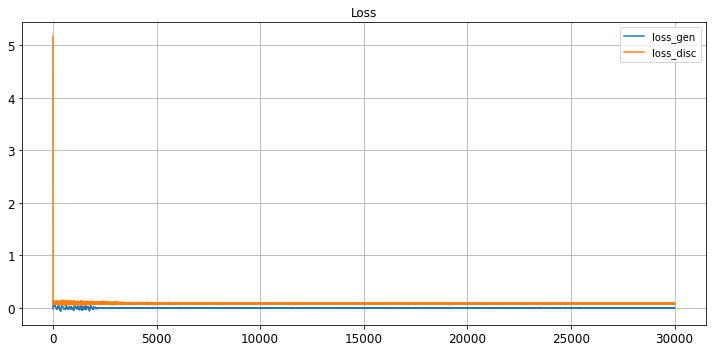

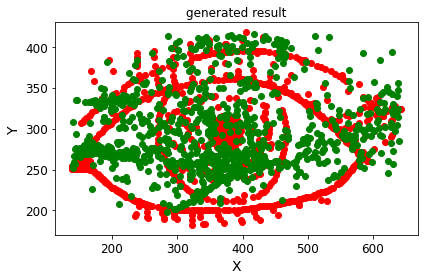

save the model & result
Epoch 30001/50000
critic: 0.088721 - generator: 0.000230 - 0s
Epoch 30002/50000
critic: 0.076563 - generator: -0.000498 - 0s
Epoch 30003/50000
critic: 0.081723 - generator: -0.003147 - 0s
Epoch 30004/50000
critic: 0.090160 - generator: -0.004386 - 0s
Epoch 30005/50000
critic: 0.084369 - generator: -0.002471 - 0s
Epoch 30006/50000
critic: 0.085048 - generator: -0.001183 - 0s
Epoch 30007/50000
critic: 0.078450 - generator: -0.002980 - 0s
Epoch 30008/50000
critic: 0.087675 - generator: -0.002754 - 0s
Epoch 30009/50000
critic: 0.088749 - generator: -0.004349 - 0s
Epoch 30010/50000
critic: 0.080903 - generator: -0.003321 - 0s
Epoch 30011/50000
critic: 0.072013 - generator: 0.000565 - 0s
Epoch 30012/50000
critic: 0.086776 - generator: 0.004733 - 0s
Epoch 30013/50000
critic: 0.081533 - generator: 0.000927 - 0s
Epoch 30014/50000
critic: 0.091047 - generator: -0.002812 - 0s
Epoch 30015/50000
critic: 0.078590 - generator: -0.002384 - 0s
Epoch 30016/50000
critic: 0.074072 

critic: 0.083884 - generator: 0.000548 - 0s
Epoch 30133/50000
critic: 0.079755 - generator: 0.000347 - 0s
Epoch 30134/50000
critic: 0.083249 - generator: -0.001960 - 0s
Epoch 30135/50000
critic: 0.090457 - generator: -0.002771 - 0s
Epoch 30136/50000
critic: 0.071336 - generator: -0.000985 - 0s
Epoch 30137/50000
critic: 0.083471 - generator: -0.001934 - 0s
Epoch 30138/50000
critic: 0.086085 - generator: -0.004740 - 0s
Epoch 30139/50000
critic: 0.087994 - generator: -0.001922 - 0s
Epoch 30140/50000
critic: 0.077626 - generator: -0.001666 - 0s
Epoch 30141/50000
critic: 0.080757 - generator: -0.000390 - 0s
Epoch 30142/50000
critic: 0.083998 - generator: 0.000419 - 0s
Epoch 30143/50000
critic: 0.083683 - generator: -0.000715 - 0s
Epoch 30144/50000
critic: 0.085685 - generator: -0.000894 - 0s
Epoch 30145/50000
critic: 0.085925 - generator: -0.003299 - 0s
Epoch 30146/50000
critic: 0.082903 - generator: 0.002484 - 0s
Epoch 30147/50000
critic: 0.076230 - generator: 0.001776 - 0s
Epoch 30148/500

critic: 0.078841 - generator: 0.001054 - 0s
Epoch 30265/50000
critic: 0.076415 - generator: 0.003864 - 0s
Epoch 30266/50000
critic: 0.076408 - generator: 0.001393 - 0s
Epoch 30267/50000
critic: 0.079829 - generator: 0.002013 - 0s
Epoch 30268/50000
critic: 0.081396 - generator: -0.007551 - 0s
Epoch 30269/50000
critic: 0.084871 - generator: -0.001988 - 0s
Epoch 30270/50000
critic: 0.078400 - generator: -0.001550 - 0s
Epoch 30271/50000
critic: 0.079108 - generator: -0.000424 - 0s
Epoch 30272/50000
critic: 0.080180 - generator: -0.000733 - 0s
Epoch 30273/50000
critic: 0.087486 - generator: 0.001802 - 0s
Epoch 30274/50000
critic: 0.079790 - generator: -0.000318 - 0s
Epoch 30275/50000
critic: 0.072190 - generator: 0.000341 - 0s
Epoch 30276/50000
critic: 0.074130 - generator: 0.000450 - 0s
Epoch 30277/50000
critic: 0.072820 - generator: -0.001937 - 0s
Epoch 30278/50000
critic: 0.085952 - generator: 0.002226 - 0s
Epoch 30279/50000
critic: 0.067557 - generator: -0.000819 - 0s
Epoch 30280/50000


critic: 0.084091 - generator: 0.002910 - 0s
Epoch 30397/50000
critic: 0.090086 - generator: -0.000287 - 0s
Epoch 30398/50000
critic: 0.074579 - generator: -0.001535 - 0s
Epoch 30399/50000
critic: 0.074859 - generator: 0.000266 - 0s
Epoch 30400/50000
critic: 0.080790 - generator: 0.001507 - 0s
Epoch 30401/50000
critic: 0.077955 - generator: 0.005527 - 0s
Epoch 30402/50000
critic: 0.082458 - generator: 0.002678 - 0s
Epoch 30403/50000
critic: 0.087187 - generator: -0.002235 - 0s
Epoch 30404/50000
critic: 0.074347 - generator: 0.000688 - 0s
Epoch 30405/50000
critic: 0.073000 - generator: 0.003459 - 0s
Epoch 30406/50000
critic: 0.086971 - generator: 0.004223 - 0s
Epoch 30407/50000
critic: 0.077956 - generator: 0.003824 - 0s
Epoch 30408/50000
critic: 0.076564 - generator: 0.003156 - 0s
Epoch 30409/50000
critic: 0.081974 - generator: -0.001568 - 0s
Epoch 30410/50000
critic: 0.085386 - generator: 0.002047 - 0s
Epoch 30411/50000
critic: 0.084922 - generator: -0.001953 - 0s
Epoch 30412/50000
cri

critic: 0.081990 - generator: 0.001956 - 0s
Epoch 30529/50000
critic: 0.082594 - generator: 0.002947 - 0s
Epoch 30530/50000
critic: 0.075078 - generator: 0.000993 - 0s
Epoch 30531/50000
critic: 0.082187 - generator: 0.001276 - 0s
Epoch 30532/50000
critic: 0.080593 - generator: 0.003225 - 0s
Epoch 30533/50000
critic: 0.088156 - generator: 0.000513 - 0s
Epoch 30534/50000
critic: 0.074416 - generator: -0.001788 - 0s
Epoch 30535/50000
critic: 0.077426 - generator: 0.004392 - 0s
Epoch 30536/50000
critic: 0.078517 - generator: -0.003115 - 0s
Epoch 30537/50000
critic: 0.077141 - generator: -0.003945 - 0s
Epoch 30538/50000
critic: 0.081949 - generator: -0.000224 - 0s
Epoch 30539/50000
critic: 0.066593 - generator: -0.001447 - 0s
Epoch 30540/50000
critic: 0.082211 - generator: -0.001523 - 0s
Epoch 30541/50000
critic: 0.073907 - generator: -0.003776 - 0s
Epoch 30542/50000
critic: 0.086470 - generator: -0.003363 - 0s
Epoch 30543/50000
critic: 0.073688 - generator: 0.002503 - 0s
Epoch 30544/50000


critic: 0.085865 - generator: 0.000657 - 0s
Epoch 30661/50000
critic: 0.089030 - generator: -0.003680 - 0s
Epoch 30662/50000
critic: 0.078646 - generator: 0.001534 - 0s
Epoch 30663/50000
critic: 0.084221 - generator: -0.001921 - 0s
Epoch 30664/50000
critic: 0.071838 - generator: 0.002943 - 0s
Epoch 30665/50000
critic: 0.081827 - generator: 0.002031 - 0s
Epoch 30666/50000
critic: 0.077660 - generator: 0.001333 - 0s
Epoch 30667/50000
critic: 0.076065 - generator: -0.000822 - 0s
Epoch 30668/50000
critic: 0.076240 - generator: 0.004381 - 0s
Epoch 30669/50000
critic: 0.085591 - generator: -0.001364 - 0s
Epoch 30670/50000
critic: 0.088237 - generator: -0.001016 - 0s
Epoch 30671/50000
critic: 0.084354 - generator: 0.001539 - 0s
Epoch 30672/50000
critic: 0.074030 - generator: -0.004940 - 0s
Epoch 30673/50000
critic: 0.080527 - generator: -0.001442 - 0s
Epoch 30674/50000
critic: 0.081104 - generator: -0.002802 - 0s
Epoch 30675/50000
critic: 0.080620 - generator: -0.000996 - 0s
Epoch 30676/50000

critic: 0.081505 - generator: 0.001338 - 0s
Epoch 30792/50000
critic: 0.071755 - generator: -0.001119 - 0s
Epoch 30793/50000
critic: 0.088008 - generator: 0.001343 - 0s
Epoch 30794/50000
critic: 0.077920 - generator: 0.002212 - 0s
Epoch 30795/50000
critic: 0.066732 - generator: 0.000185 - 0s
Epoch 30796/50000
critic: 0.075882 - generator: -0.002211 - 0s
Epoch 30797/50000
critic: 0.078524 - generator: -0.004682 - 0s
Epoch 30798/50000
critic: 0.075855 - generator: -0.004460 - 0s
Epoch 30799/50000
critic: 0.074239 - generator: 0.001664 - 0s
Epoch 30800/50000
critic: 0.069722 - generator: 0.000162 - 0s
Epoch 30801/50000
critic: 0.069518 - generator: 0.002189 - 0s
Epoch 30802/50000
critic: 0.082104 - generator: -0.001382 - 0s
Epoch 30803/50000
critic: 0.075900 - generator: -0.004268 - 0s
Epoch 30804/50000
critic: 0.086775 - generator: 0.000346 - 0s
Epoch 30805/50000
critic: 0.084118 - generator: 0.000276 - 0s
Epoch 30806/50000
critic: 0.082737 - generator: 0.005745 - 0s
Epoch 30807/50000
cr

critic: 0.088500 - generator: -0.003394 - 0s
Epoch 30924/50000
critic: 0.077241 - generator: -0.000475 - 0s
Epoch 30925/50000
critic: 0.081135 - generator: 0.003081 - 0s
Epoch 30926/50000
critic: 0.075338 - generator: -0.001550 - 0s
Epoch 30927/50000
critic: 0.071187 - generator: -0.001588 - 0s
Epoch 30928/50000
critic: 0.078639 - generator: -0.000160 - 0s
Epoch 30929/50000
critic: 0.082218 - generator: -0.001089 - 0s
Epoch 30930/50000
critic: 0.075884 - generator: -0.002252 - 0s
Epoch 30931/50000
critic: 0.073705 - generator: 0.002330 - 0s
Epoch 30932/50000
critic: 0.078699 - generator: 0.001809 - 0s
Epoch 30933/50000
critic: 0.079206 - generator: 0.002112 - 0s
Epoch 30934/50000
critic: 0.082527 - generator: -0.001636 - 0s
Epoch 30935/50000
critic: 0.077883 - generator: -0.004126 - 0s
Epoch 30936/50000
critic: 0.083517 - generator: 0.001072 - 0s
Epoch 30937/50000
critic: 0.087873 - generator: -0.002391 - 0s
Epoch 30938/50000
critic: 0.082616 - generator: -0.000378 - 0s
Epoch 30939/500

critic: 0.075055 - generator: 0.000418 - 0s
Epoch 31056/50000
critic: 0.078417 - generator: -0.000138 - 0s
Epoch 31057/50000
critic: 0.082665 - generator: -0.001603 - 0s
Epoch 31058/50000
critic: 0.075565 - generator: -0.001127 - 0s
Epoch 31059/50000
critic: 0.080570 - generator: -0.005594 - 0s
Epoch 31060/50000
critic: 0.078436 - generator: -0.003192 - 0s
Epoch 31061/50000
critic: 0.084782 - generator: 0.000783 - 0s
Epoch 31062/50000
critic: 0.072351 - generator: 0.001369 - 0s
Epoch 31063/50000
critic: 0.079727 - generator: -0.001426 - 0s
Epoch 31064/50000
critic: 0.078210 - generator: -0.002188 - 0s
Epoch 31065/50000
critic: 0.090862 - generator: -0.002673 - 0s
Epoch 31066/50000
critic: 0.085425 - generator: 0.000050 - 0s
Epoch 31067/50000
critic: 0.069892 - generator: 0.001201 - 0s
Epoch 31068/50000
critic: 0.081668 - generator: 0.002958 - 0s
Epoch 31069/50000
critic: 0.080093 - generator: 0.001023 - 0s
Epoch 31070/50000
critic: 0.075130 - generator: -0.000148 - 0s
Epoch 31071/50000

critic: 0.077385 - generator: -0.003156 - 0s
Epoch 31188/50000
critic: 0.076126 - generator: 0.001425 - 0s
Epoch 31189/50000
critic: 0.080918 - generator: -0.000079 - 0s
Epoch 31190/50000
critic: 0.079771 - generator: 0.000369 - 0s
Epoch 31191/50000
critic: 0.086780 - generator: -0.000744 - 0s
Epoch 31192/50000
critic: 0.081330 - generator: 0.001888 - 0s
Epoch 31193/50000
critic: 0.082840 - generator: 0.002076 - 0s
Epoch 31194/50000
critic: 0.083593 - generator: 0.000600 - 0s
Epoch 31195/50000
critic: 0.074764 - generator: 0.000812 - 0s
Epoch 31196/50000
critic: 0.072889 - generator: -0.000870 - 0s
Epoch 31197/50000
critic: 0.081178 - generator: 0.002234 - 0s
Epoch 31198/50000
critic: 0.073961 - generator: 0.000340 - 0s
Epoch 31199/50000
critic: 0.092259 - generator: -0.000951 - 0s
Epoch 31200/50000
critic: 0.077416 - generator: -0.000383 - 0s
Epoch 31201/50000
critic: 0.075312 - generator: 0.002670 - 0s
Epoch 31202/50000
critic: 0.086336 - generator: -0.004293 - 0s
Epoch 31203/50000
c

critic: 0.076927 - generator: 0.000145 - 0s
Epoch 31320/50000
critic: 0.082388 - generator: -0.003536 - 0s
Epoch 31321/50000
critic: 0.090076 - generator: -0.000217 - 0s
Epoch 31322/50000
critic: 0.067192 - generator: 0.000017 - 0s
Epoch 31323/50000
critic: 0.084752 - generator: 0.002861 - 0s
Epoch 31324/50000
critic: 0.076623 - generator: 0.002583 - 0s
Epoch 31325/50000
critic: 0.081692 - generator: 0.001031 - 0s
Epoch 31326/50000
critic: 0.075013 - generator: 0.000376 - 0s
Epoch 31327/50000
critic: 0.072846 - generator: 0.003761 - 0s
Epoch 31328/50000
critic: 0.076017 - generator: 0.000748 - 0s
Epoch 31329/50000
critic: 0.091367 - generator: 0.000407 - 0s
Epoch 31330/50000
critic: 0.076360 - generator: -0.002042 - 0s
Epoch 31331/50000
critic: 0.090996 - generator: 0.002807 - 0s
Epoch 31332/50000
critic: 0.074643 - generator: 0.004202 - 0s
Epoch 31333/50000
critic: 0.085355 - generator: 0.001242 - 0s
Epoch 31334/50000
critic: 0.076267 - generator: 0.001010 - 0s
Epoch 31335/50000
criti

critic: 0.081414 - generator: -0.000705 - 0s
Epoch 31452/50000
critic: 0.070392 - generator: -0.003584 - 0s
Epoch 31453/50000
critic: 0.085970 - generator: -0.003388 - 0s
Epoch 31454/50000
critic: 0.088622 - generator: 0.001240 - 0s
Epoch 31455/50000
critic: 0.083038 - generator: 0.002052 - 0s
Epoch 31456/50000
critic: 0.078396 - generator: 0.001861 - 0s
Epoch 31457/50000
critic: 0.080310 - generator: -0.000094 - 0s
Epoch 31458/50000
critic: 0.069971 - generator: -0.001505 - 0s
Epoch 31459/50000
critic: 0.089036 - generator: 0.000876 - 0s
Epoch 31460/50000
critic: 0.078005 - generator: 0.001503 - 0s
Epoch 31461/50000
critic: 0.069438 - generator: -0.002910 - 0s
Epoch 31462/50000
critic: 0.083907 - generator: -0.001603 - 0s
Epoch 31463/50000
critic: 0.077715 - generator: 0.001533 - 0s
Epoch 31464/50000
critic: 0.086113 - generator: 0.004372 - 0s
Epoch 31465/50000
critic: 0.077227 - generator: 0.001120 - 0s
Epoch 31466/50000
critic: 0.091087 - generator: 0.000827 - 0s
Epoch 31467/50000
c

critic: 0.078284 - generator: -0.000132 - 0s
Epoch 31584/50000
critic: 0.072854 - generator: -0.001001 - 0s
Epoch 31585/50000
critic: 0.081786 - generator: -0.000555 - 0s
Epoch 31586/50000
critic: 0.078477 - generator: -0.001646 - 0s
Epoch 31587/50000
critic: 0.081860 - generator: 0.001565 - 0s
Epoch 31588/50000
critic: 0.078955 - generator: 0.003753 - 0s
Epoch 31589/50000
critic: 0.076545 - generator: 0.002311 - 0s
Epoch 31590/50000
critic: 0.074725 - generator: 0.000897 - 0s
Epoch 31591/50000
critic: 0.085012 - generator: 0.001177 - 0s
Epoch 31592/50000
critic: 0.077879 - generator: -0.003694 - 0s
Epoch 31593/50000
critic: 0.077586 - generator: -0.004370 - 0s
Epoch 31594/50000
critic: 0.086414 - generator: 0.001343 - 0s
Epoch 31595/50000
critic: 0.079942 - generator: -0.001489 - 0s
Epoch 31596/50000
critic: 0.080026 - generator: -0.004648 - 0s
Epoch 31597/50000
critic: 0.079729 - generator: -0.001662 - 0s
Epoch 31598/50000
critic: 0.091358 - generator: -0.007910 - 0s
Epoch 31599/5000

critic: 0.081886 - generator: -0.000399 - 0s
Epoch 31716/50000
critic: 0.078914 - generator: -0.000177 - 0s
Epoch 31717/50000
critic: 0.078155 - generator: -0.001979 - 0s
Epoch 31718/50000
critic: 0.080249 - generator: -0.004831 - 0s
Epoch 31719/50000
critic: 0.078044 - generator: 0.000220 - 0s
Epoch 31720/50000
critic: 0.079770 - generator: -0.005088 - 0s
Epoch 31721/50000
critic: 0.090002 - generator: -0.001197 - 0s
Epoch 31722/50000
critic: 0.093284 - generator: -0.002786 - 0s
Epoch 31723/50000
critic: 0.072513 - generator: -0.001991 - 0s
Epoch 31724/50000
critic: 0.076956 - generator: -0.001988 - 0s
Epoch 31725/50000
critic: 0.072485 - generator: 0.002407 - 0s
Epoch 31726/50000
critic: 0.087433 - generator: -0.002542 - 0s
Epoch 31727/50000
critic: 0.074015 - generator: 0.000539 - 0s
Epoch 31728/50000
critic: 0.074416 - generator: -0.002439 - 0s
Epoch 31729/50000
critic: 0.082288 - generator: 0.001738 - 0s
Epoch 31730/50000
critic: 0.071924 - generator: 0.001462 - 0s
Epoch 31731/500

critic: 0.081986 - generator: 0.001991 - 0s
Epoch 31849/50000
critic: 0.077747 - generator: -0.003560 - 0s
Epoch 31850/50000
critic: 0.083582 - generator: -0.005539 - 0s
Epoch 31851/50000
critic: 0.077884 - generator: -0.001894 - 0s
Epoch 31852/50000
critic: 0.074661 - generator: -0.003211 - 0s
Epoch 31853/50000
critic: 0.084228 - generator: 0.000263 - 0s
Epoch 31854/50000
critic: 0.080971 - generator: -0.000826 - 0s
Epoch 31855/50000
critic: 0.084928 - generator: 0.000335 - 0s
Epoch 31856/50000
critic: 0.073417 - generator: 0.002379 - 0s
Epoch 31857/50000
critic: 0.076440 - generator: 0.001788 - 0s
Epoch 31858/50000
critic: 0.072435 - generator: 0.001821 - 0s
Epoch 31859/50000
critic: 0.068044 - generator: 0.006935 - 0s
Epoch 31860/50000
critic: 0.084230 - generator: 0.000143 - 0s
Epoch 31861/50000
critic: 0.079138 - generator: -0.001096 - 0s
Epoch 31862/50000
critic: 0.088367 - generator: -0.000634 - 0s
Epoch 31863/50000
critic: 0.083191 - generator: -0.003710 - 0s
Epoch 31864/50000


critic: 0.084533 - generator: 0.004395 - 0s
Epoch 31981/50000
critic: 0.088654 - generator: 0.000981 - 0s
Epoch 31982/50000
critic: 0.087653 - generator: -0.000608 - 0s
Epoch 31983/50000
critic: 0.082092 - generator: -0.004853 - 0s
Epoch 31984/50000
critic: 0.070694 - generator: -0.001483 - 0s
Epoch 31985/50000
critic: 0.077517 - generator: -0.001458 - 0s
Epoch 31986/50000
critic: 0.087304 - generator: -0.000630 - 0s
Epoch 31987/50000
critic: 0.075954 - generator: -0.000787 - 0s
Epoch 31988/50000
critic: 0.075045 - generator: -0.001392 - 0s
Epoch 31989/50000
critic: 0.080408 - generator: -0.001376 - 0s
Epoch 31990/50000
critic: 0.082309 - generator: -0.002174 - 0s
Epoch 31991/50000
critic: 0.078779 - generator: -0.002558 - 0s
Epoch 31992/50000
critic: 0.076263 - generator: -0.001842 - 0s
Epoch 31993/50000
critic: 0.091213 - generator: -0.000656 - 0s
Epoch 31994/50000
critic: 0.084514 - generator: -0.001450 - 0s
Epoch 31995/50000
critic: 0.072237 - generator: 0.000056 - 0s
Epoch 31996/5

critic: 0.086050 - generator: -0.002224 - 0s
Epoch 32113/50000
critic: 0.077077 - generator: -0.000833 - 0s
Epoch 32114/50000
critic: 0.076226 - generator: -0.001484 - 0s
Epoch 32115/50000
critic: 0.086667 - generator: -0.001849 - 0s
Epoch 32116/50000
critic: 0.092997 - generator: 0.000713 - 0s
Epoch 32117/50000
critic: 0.077879 - generator: -0.003910 - 0s
Epoch 32118/50000
critic: 0.079384 - generator: -0.001374 - 0s
Epoch 32119/50000
critic: 0.073662 - generator: 0.000818 - 0s
Epoch 32120/50000
critic: 0.094317 - generator: -0.000581 - 0s
Epoch 32121/50000
critic: 0.083030 - generator: 0.000718 - 0s
Epoch 32122/50000
critic: 0.068635 - generator: -0.000822 - 0s
Epoch 32123/50000
critic: 0.078045 - generator: -0.000880 - 0s
Epoch 32124/50000
critic: 0.070209 - generator: -0.004242 - 0s
Epoch 32125/50000
critic: 0.075695 - generator: -0.002553 - 0s
Epoch 32126/50000
critic: 0.081778 - generator: -0.002003 - 0s
Epoch 32127/50000
critic: 0.077722 - generator: -0.001703 - 0s
Epoch 32128/5

critic: 0.083496 - generator: -0.000286 - 0s
Epoch 32245/50000
critic: 0.084907 - generator: -0.000716 - 0s
Epoch 32246/50000
critic: 0.081734 - generator: 0.000252 - 0s
Epoch 32247/50000
critic: 0.075491 - generator: 0.000140 - 0s
Epoch 32248/50000
critic: 0.097242 - generator: -0.001430 - 0s
Epoch 32249/50000
critic: 0.081154 - generator: 0.002716 - 0s
Epoch 32250/50000
critic: 0.083430 - generator: 0.001465 - 0s
Epoch 32251/50000
critic: 0.066392 - generator: 0.001497 - 0s
Epoch 32252/50000
critic: 0.079095 - generator: 0.002609 - 0s
Epoch 32253/50000
critic: 0.075844 - generator: -0.002312 - 0s
Epoch 32254/50000
critic: 0.081015 - generator: 0.001781 - 0s
Epoch 32255/50000
critic: 0.078664 - generator: 0.000238 - 0s
Epoch 32256/50000
critic: 0.081954 - generator: 0.002742 - 0s
Epoch 32257/50000
critic: 0.083695 - generator: 0.003130 - 0s
Epoch 32258/50000
critic: 0.078148 - generator: 0.000442 - 0s
Epoch 32259/50000
critic: 0.078754 - generator: -0.000004 - 0s
Epoch 32260/50000
cri

critic: 0.065377 - generator: 0.004083 - 0s
Epoch 32377/50000
critic: 0.096215 - generator: 0.003567 - 0s
Epoch 32378/50000
critic: 0.084110 - generator: 0.002312 - 0s
Epoch 32379/50000
critic: 0.085726 - generator: 0.002112 - 0s
Epoch 32380/50000
critic: 0.081216 - generator: -0.000505 - 0s
Epoch 32381/50000
critic: 0.076907 - generator: -0.002907 - 0s
Epoch 32382/50000
critic: 0.084602 - generator: -0.003944 - 0s
Epoch 32383/50000
critic: 0.072006 - generator: -0.001729 - 0s
Epoch 32384/50000
critic: 0.073225 - generator: -0.004798 - 0s
Epoch 32385/50000
critic: 0.085591 - generator: 0.000121 - 0s
Epoch 32386/50000
critic: 0.085046 - generator: 0.000646 - 0s
Epoch 32387/50000
critic: 0.077743 - generator: -0.000445 - 0s
Epoch 32388/50000
critic: 0.077383 - generator: -0.001861 - 0s
Epoch 32389/50000
critic: 0.066860 - generator: -0.001891 - 0s
Epoch 32390/50000
critic: 0.070126 - generator: 0.000462 - 0s
Epoch 32391/50000
critic: 0.078352 - generator: 0.000603 - 0s
Epoch 32392/50000


critic: 0.081158 - generator: 0.002461 - 0s
Epoch 32509/50000
critic: 0.082364 - generator: 0.003012 - 0s
Epoch 32510/50000
critic: 0.083904 - generator: 0.002196 - 0s
Epoch 32511/50000
critic: 0.079726 - generator: 0.000516 - 0s
Epoch 32512/50000
critic: 0.081182 - generator: -0.001114 - 0s
Epoch 32513/50000
critic: 0.090741 - generator: -0.001229 - 0s
Epoch 32514/50000
critic: 0.075591 - generator: 0.001967 - 0s
Epoch 32515/50000
critic: 0.086961 - generator: 0.000227 - 0s
Epoch 32516/50000
critic: 0.086243 - generator: -0.002979 - 0s
Epoch 32517/50000
critic: 0.079103 - generator: -0.001715 - 0s
Epoch 32518/50000
critic: 0.080740 - generator: -0.000954 - 0s
Epoch 32519/50000
critic: 0.075241 - generator: -0.000369 - 0s
Epoch 32520/50000
critic: 0.083592 - generator: 0.004158 - 0s
Epoch 32521/50000
critic: 0.086979 - generator: -0.002078 - 0s
Epoch 32522/50000
critic: 0.070084 - generator: 0.000397 - 0s
Epoch 32523/50000
critic: 0.078076 - generator: -0.000725 - 0s
Epoch 32524/50000


critic: 0.087958 - generator: 0.002043 - 0s
Epoch 32641/50000
critic: 0.092891 - generator: -0.003167 - 0s
Epoch 32642/50000
critic: 0.080136 - generator: -0.000146 - 0s
Epoch 32643/50000
critic: 0.079906 - generator: 0.001324 - 0s
Epoch 32644/50000
critic: 0.073198 - generator: -0.000219 - 0s
Epoch 32645/50000
critic: 0.079434 - generator: -0.000367 - 0s
Epoch 32646/50000
critic: 0.073697 - generator: 0.003101 - 0s
Epoch 32647/50000
critic: 0.076927 - generator: 0.001488 - 0s
Epoch 32648/50000
critic: 0.079484 - generator: -0.000381 - 0s
Epoch 32649/50000
critic: 0.079073 - generator: -0.001806 - 0s
Epoch 32650/50000
critic: 0.087739 - generator: 0.000673 - 0s
Epoch 32651/50000
critic: 0.082553 - generator: 0.003467 - 0s
Epoch 32652/50000
critic: 0.077391 - generator: -0.002320 - 0s
Epoch 32653/50000
critic: 0.081275 - generator: 0.000247 - 0s
Epoch 32654/50000
critic: 0.084024 - generator: 0.002206 - 0s
Epoch 32655/50000
critic: 0.071044 - generator: -0.002441 - 0s
Epoch 32656/50000


critic: 0.078726 - generator: 0.000264 - 0s
Epoch 32773/50000
critic: 0.077145 - generator: 0.003874 - 0s
Epoch 32774/50000
critic: 0.086208 - generator: -0.001743 - 0s
Epoch 32775/50000
critic: 0.076050 - generator: -0.003129 - 0s
Epoch 32776/50000
critic: 0.086157 - generator: -0.003498 - 0s
Epoch 32777/50000
critic: 0.082240 - generator: -0.000970 - 0s
Epoch 32778/50000
critic: 0.085209 - generator: -0.001729 - 0s
Epoch 32779/50000
critic: 0.088547 - generator: 0.001717 - 0s
Epoch 32780/50000
critic: 0.084514 - generator: -0.000479 - 0s
Epoch 32781/50000
critic: 0.083974 - generator: 0.000674 - 0s
Epoch 32782/50000
critic: 0.081049 - generator: -0.000482 - 0s
Epoch 32783/50000
critic: 0.088377 - generator: 0.001056 - 0s
Epoch 32784/50000
critic: 0.078534 - generator: -0.002113 - 0s
Epoch 32785/50000
critic: 0.084513 - generator: 0.001433 - 0s
Epoch 32786/50000
critic: 0.074565 - generator: 0.001062 - 0s
Epoch 32787/50000
critic: 0.084261 - generator: -0.006359 - 0s
Epoch 32788/50000

critic: 0.082590 - generator: 0.001603 - 0s
Epoch 32905/50000
critic: 0.086650 - generator: 0.001351 - 0s
Epoch 32906/50000
critic: 0.082587 - generator: 0.002519 - 0s
Epoch 32907/50000
critic: 0.081852 - generator: 0.002701 - 0s
Epoch 32908/50000
critic: 0.077302 - generator: -0.001069 - 0s
Epoch 32909/50000
critic: 0.078160 - generator: -0.002560 - 0s
Epoch 32910/50000
critic: 0.077181 - generator: -0.000831 - 0s
Epoch 32911/50000
critic: 0.076385 - generator: 0.001099 - 0s
Epoch 32912/50000
critic: 0.075928 - generator: -0.000476 - 0s
Epoch 32913/50000
critic: 0.067649 - generator: -0.003334 - 0s
Epoch 32914/50000
critic: 0.076582 - generator: -0.005267 - 0s
Epoch 32915/50000
critic: 0.075312 - generator: -0.001779 - 0s
Epoch 32916/50000
critic: 0.077743 - generator: -0.001744 - 0s
Epoch 32917/50000
critic: 0.083887 - generator: -0.001305 - 0s
Epoch 32918/50000
critic: 0.071837 - generator: -0.003810 - 0s
Epoch 32919/50000
critic: 0.084339 - generator: -0.002910 - 0s
Epoch 32920/500

critic: 0.072086 - generator: 0.000387 - 0s
Epoch 33038/50000
critic: 0.083681 - generator: 0.000179 - 0s
Epoch 33039/50000
critic: 0.078502 - generator: 0.005088 - 0s
Epoch 33040/50000
critic: 0.079026 - generator: -0.001240 - 0s
Epoch 33041/50000
critic: 0.080810 - generator: -0.001376 - 0s
Epoch 33042/50000
critic: 0.081243 - generator: -0.001460 - 0s
Epoch 33043/50000
critic: 0.079173 - generator: -0.004063 - 0s
Epoch 33044/50000
critic: 0.089816 - generator: 0.002011 - 0s
Epoch 33045/50000
critic: 0.067662 - generator: -0.000540 - 0s
Epoch 33046/50000
critic: 0.083565 - generator: -0.004106 - 0s
Epoch 33047/50000
critic: 0.073505 - generator: -0.003879 - 0s
Epoch 33048/50000
critic: 0.080573 - generator: 0.000200 - 0s
Epoch 33049/50000
critic: 0.082525 - generator: 0.000640 - 0s
Epoch 33050/50000
critic: 0.076619 - generator: 0.001595 - 0s
Epoch 33051/50000
critic: 0.081280 - generator: -0.000706 - 0s
Epoch 33052/50000
critic: 0.086614 - generator: 0.001456 - 0s
Epoch 33053/50000


critic: 0.077633 - generator: 0.002250 - 0s
Epoch 33170/50000
critic: 0.077980 - generator: -0.002676 - 0s
Epoch 33171/50000
critic: 0.071643 - generator: 0.002814 - 0s
Epoch 33172/50000
critic: 0.081666 - generator: -0.001886 - 0s
Epoch 33173/50000
critic: 0.077697 - generator: 0.001659 - 0s
Epoch 33174/50000
critic: 0.082565 - generator: -0.003151 - 0s
Epoch 33175/50000
critic: 0.072554 - generator: 0.002468 - 0s
Epoch 33176/50000
critic: 0.072806 - generator: -0.005320 - 0s
Epoch 33177/50000
critic: 0.079142 - generator: -0.001772 - 0s
Epoch 33178/50000
critic: 0.083290 - generator: 0.000312 - 0s
Epoch 33179/50000
critic: 0.077446 - generator: 0.001017 - 0s
Epoch 33180/50000
critic: 0.083029 - generator: 0.004440 - 0s
Epoch 33181/50000
critic: 0.075633 - generator: -0.002271 - 0s
Epoch 33182/50000
critic: 0.080139 - generator: -0.002928 - 0s
Epoch 33183/50000
critic: 0.074488 - generator: -0.003590 - 0s
Epoch 33184/50000
critic: 0.078696 - generator: 0.001835 - 0s
Epoch 33185/50000


critic: 0.071303 - generator: 0.001682 - 0s
Epoch 33302/50000
critic: 0.077589 - generator: 0.000507 - 0s
Epoch 33303/50000
critic: 0.080266 - generator: 0.002328 - 0s
Epoch 33304/50000
critic: 0.077413 - generator: -0.000451 - 0s
Epoch 33305/50000
critic: 0.090025 - generator: 0.002308 - 0s
Epoch 33306/50000
critic: 0.088175 - generator: 0.003347 - 0s
Epoch 33307/50000
critic: 0.076039 - generator: -0.001439 - 0s
Epoch 33308/50000
critic: 0.081624 - generator: -0.000022 - 0s
Epoch 33309/50000
critic: 0.076329 - generator: -0.000398 - 0s
Epoch 33310/50000
critic: 0.085879 - generator: 0.003813 - 0s
Epoch 33311/50000
critic: 0.075871 - generator: -0.004565 - 0s
Epoch 33312/50000
critic: 0.086020 - generator: 0.001823 - 0s
Epoch 33313/50000
critic: 0.082519 - generator: 0.000603 - 0s
Epoch 33314/50000
critic: 0.086913 - generator: 0.000110 - 0s
Epoch 33315/50000
critic: 0.078232 - generator: -0.002810 - 0s
Epoch 33316/50000
critic: 0.083507 - generator: 0.001407 - 0s
Epoch 33317/50000
cr

critic: 0.084909 - generator: -0.001754 - 0s
Epoch 33434/50000
critic: 0.082150 - generator: -0.004185 - 0s
Epoch 33435/50000
critic: 0.081306 - generator: -0.002659 - 0s
Epoch 33436/50000
critic: 0.087216 - generator: -0.000028 - 0s
Epoch 33437/50000
critic: 0.088075 - generator: -0.000336 - 0s
Epoch 33438/50000
critic: 0.089098 - generator: 0.002146 - 0s
Epoch 33439/50000
critic: 0.089024 - generator: 0.002194 - 0s
Epoch 33440/50000
critic: 0.083374 - generator: 0.002150 - 0s
Epoch 33441/50000
critic: 0.077558 - generator: 0.002121 - 0s
Epoch 33442/50000
critic: 0.077975 - generator: 0.003453 - 0s
Epoch 33443/50000
critic: 0.078004 - generator: -0.003575 - 0s
Epoch 33444/50000
critic: 0.079922 - generator: 0.001079 - 0s
Epoch 33445/50000
critic: 0.085111 - generator: 0.001117 - 0s
Epoch 33446/50000
critic: 0.078823 - generator: 0.003799 - 0s
Epoch 33447/50000
critic: 0.080086 - generator: 0.000334 - 0s
Epoch 33448/50000
critic: 0.090490 - generator: 0.000640 - 0s
Epoch 33449/50000
cr

critic: 0.077398 - generator: -0.000575 - 0s
Epoch 33566/50000
critic: 0.087395 - generator: 0.002944 - 0s
Epoch 33567/50000
critic: 0.075977 - generator: 0.001481 - 0s
Epoch 33568/50000
critic: 0.073657 - generator: 0.003688 - 0s
Epoch 33569/50000
critic: 0.084773 - generator: -0.003744 - 0s
Epoch 33570/50000
critic: 0.083997 - generator: -0.000113 - 0s
Epoch 33571/50000
critic: 0.080279 - generator: 0.001936 - 0s
Epoch 33572/50000
critic: 0.081333 - generator: -0.000440 - 0s
Epoch 33573/50000
critic: 0.085123 - generator: 0.001906 - 0s
Epoch 33574/50000
critic: 0.078580 - generator: 0.001608 - 0s
Epoch 33575/50000
critic: 0.074223 - generator: 0.001421 - 0s
Epoch 33576/50000
critic: 0.085041 - generator: -0.000673 - 0s
Epoch 33577/50000
critic: 0.076134 - generator: -0.001402 - 0s
Epoch 33578/50000
critic: 0.085194 - generator: 0.001000 - 0s
Epoch 33579/50000
critic: 0.077961 - generator: -0.001396 - 0s
Epoch 33580/50000
critic: 0.086010 - generator: -0.002061 - 0s
Epoch 33581/50000


critic: 0.081139 - generator: 0.000461 - 0s
Epoch 33698/50000
critic: 0.081321 - generator: 0.003216 - 0s
Epoch 33699/50000
critic: 0.073951 - generator: 0.001048 - 0s
Epoch 33700/50000
critic: 0.079107 - generator: -0.000975 - 0s
Epoch 33701/50000
critic: 0.073484 - generator: -0.003410 - 0s
Epoch 33702/50000
critic: 0.088164 - generator: -0.002325 - 0s
Epoch 33703/50000
critic: 0.081592 - generator: -0.001846 - 0s
Epoch 33704/50000
critic: 0.074596 - generator: -0.000196 - 0s
Epoch 33705/50000
critic: 0.074366 - generator: 0.006728 - 0s
Epoch 33706/50000
critic: 0.087999 - generator: 0.001088 - 0s
Epoch 33707/50000
critic: 0.078958 - generator: 0.000080 - 0s
Epoch 33708/50000
critic: 0.073794 - generator: -0.000726 - 0s
Epoch 33709/50000
critic: 0.088848 - generator: 0.000548 - 0s
Epoch 33710/50000
critic: 0.077178 - generator: 0.000905 - 0s
Epoch 33711/50000
critic: 0.088118 - generator: -0.001940 - 0s
Epoch 33712/50000
critic: 0.078776 - generator: 0.001621 - 0s
Epoch 33713/50000
c

critic: 0.076313 - generator: 0.002678 - 0s
Epoch 33830/50000
critic: 0.083176 - generator: -0.000013 - 0s
Epoch 33831/50000
critic: 0.076030 - generator: -0.001624 - 0s
Epoch 33832/50000
critic: 0.076294 - generator: -0.000954 - 0s
Epoch 33833/50000
critic: 0.068790 - generator: -0.002031 - 0s
Epoch 33834/50000
critic: 0.091021 - generator: -0.002486 - 0s
Epoch 33835/50000
critic: 0.081481 - generator: 0.001374 - 0s
Epoch 33836/50000
critic: 0.080038 - generator: -0.004550 - 0s
Epoch 33837/50000
critic: 0.077915 - generator: 0.000249 - 0s
Epoch 33838/50000
critic: 0.082986 - generator: -0.000567 - 0s
Epoch 33839/50000
critic: 0.084137 - generator: -0.000614 - 0s
Epoch 33840/50000
critic: 0.077637 - generator: -0.002515 - 0s
Epoch 33841/50000
critic: 0.080649 - generator: 0.001426 - 0s
Epoch 33842/50000
critic: 0.074444 - generator: -0.000733 - 0s
Epoch 33843/50000
critic: 0.078161 - generator: -0.000606 - 0s
Epoch 33844/50000
critic: 0.082252 - generator: -0.000735 - 0s
Epoch 33845/50

critic: 0.086522 - generator: -0.001958 - 0s
Epoch 33962/50000
critic: 0.077124 - generator: -0.003157 - 0s
Epoch 33963/50000
critic: 0.081493 - generator: -0.001493 - 0s
Epoch 33964/50000
critic: 0.076551 - generator: 0.003475 - 0s
Epoch 33965/50000
critic: 0.072937 - generator: -0.001211 - 0s
Epoch 33966/50000
critic: 0.082436 - generator: 0.000121 - 0s
Epoch 33967/50000
critic: 0.077106 - generator: 0.000167 - 0s
Epoch 33968/50000
critic: 0.096719 - generator: 0.003358 - 0s
Epoch 33969/50000
critic: 0.083817 - generator: -0.002687 - 0s
Epoch 33970/50000
critic: 0.091608 - generator: -0.002894 - 0s
Epoch 33971/50000
critic: 0.080549 - generator: -0.003516 - 0s
Epoch 33972/50000
critic: 0.090752 - generator: 0.001433 - 0s
Epoch 33973/50000
critic: 0.082604 - generator: -0.001370 - 0s
Epoch 33974/50000
critic: 0.076677 - generator: 0.002314 - 0s
Epoch 33975/50000
critic: 0.082183 - generator: 0.002217 - 0s
Epoch 33976/50000
critic: 0.080227 - generator: 0.000372 - 0s
Epoch 33977/50000


critic: 0.084255 - generator: -0.001657 - 0s
Epoch 34094/50000
critic: 0.077219 - generator: -0.002330 - 0s
Epoch 34095/50000
critic: 0.083692 - generator: -0.000186 - 0s
Epoch 34096/50000
critic: 0.082090 - generator: 0.000745 - 0s
Epoch 34097/50000
critic: 0.076747 - generator: 0.000060 - 0s
Epoch 34098/50000
critic: 0.086101 - generator: -0.000651 - 0s
Epoch 34099/50000
critic: 0.088931 - generator: 0.002107 - 0s
Epoch 34100/50000
critic: 0.064358 - generator: 0.002717 - 0s
Epoch 34101/50000
critic: 0.087398 - generator: 0.002844 - 0s
Epoch 34102/50000
critic: 0.075705 - generator: -0.002530 - 0s
Epoch 34103/50000
critic: 0.082720 - generator: -0.000809 - 0s
Epoch 34104/50000
critic: 0.073933 - generator: -0.004545 - 0s
Epoch 34105/50000
critic: 0.078575 - generator: -0.004003 - 0s
Epoch 34106/50000
critic: 0.086998 - generator: -0.000146 - 0s
Epoch 34107/50000
critic: 0.077590 - generator: -0.000249 - 0s
Epoch 34108/50000
critic: 0.078140 - generator: -0.000406 - 0s
Epoch 34109/500

critic: 0.077300 - generator: -0.001134 - 0s
Epoch 34226/50000
critic: 0.073004 - generator: 0.001584 - 0s
Epoch 34227/50000
critic: 0.083073 - generator: -0.000517 - 0s
Epoch 34228/50000
critic: 0.084235 - generator: -0.003362 - 0s
Epoch 34229/50000
critic: 0.078559 - generator: 0.000532 - 0s
Epoch 34230/50000
critic: 0.083452 - generator: 0.002320 - 0s
Epoch 34231/50000
critic: 0.083097 - generator: 0.003510 - 0s
Epoch 34232/50000
critic: 0.078762 - generator: 0.002989 - 0s
Epoch 34233/50000
critic: 0.080137 - generator: 0.001506 - 0s
Epoch 34234/50000
critic: 0.077359 - generator: 0.001623 - 0s
Epoch 34235/50000
critic: 0.082353 - generator: -0.001471 - 0s
Epoch 34236/50000
critic: 0.076212 - generator: -0.001390 - 0s
Epoch 34237/50000
critic: 0.085543 - generator: 0.000935 - 0s
Epoch 34238/50000
critic: 0.080513 - generator: -0.000528 - 0s
Epoch 34239/50000
critic: 0.076332 - generator: 0.003121 - 0s
Epoch 34240/50000
critic: 0.077003 - generator: -0.001618 - 0s
Epoch 34241/50000
c

critic: 0.079298 - generator: -0.005664 - 0s
Epoch 34359/50000
critic: 0.085435 - generator: -0.001332 - 0s
Epoch 34360/50000
critic: 0.087921 - generator: 0.001021 - 0s
Epoch 34361/50000
critic: 0.082376 - generator: 0.002583 - 0s
Epoch 34362/50000
critic: 0.079330 - generator: -0.001105 - 0s
Epoch 34363/50000
critic: 0.079131 - generator: -0.002521 - 0s
Epoch 34364/50000
critic: 0.076369 - generator: -0.001411 - 0s
Epoch 34365/50000
critic: 0.086721 - generator: 0.001246 - 0s
Epoch 34366/50000
critic: 0.080340 - generator: -0.001970 - 0s
Epoch 34367/50000
critic: 0.075243 - generator: -0.000504 - 0s
Epoch 34368/50000
critic: 0.082938 - generator: -0.002055 - 0s
Epoch 34369/50000
critic: 0.087834 - generator: 0.000853 - 0s
Epoch 34370/50000
critic: 0.073121 - generator: -0.002655 - 0s
Epoch 34371/50000
critic: 0.079895 - generator: -0.004712 - 0s
Epoch 34372/50000
critic: 0.089003 - generator: -0.004095 - 0s
Epoch 34373/50000
critic: 0.087485 - generator: -0.002461 - 0s
Epoch 34374/50

critic: 0.085646 - generator: 0.000951 - 0s
Epoch 34491/50000
critic: 0.072422 - generator: 0.002288 - 0s
Epoch 34492/50000
critic: 0.074668 - generator: 0.002218 - 0s
Epoch 34493/50000
critic: 0.083325 - generator: -0.002634 - 0s
Epoch 34494/50000
critic: 0.089439 - generator: -0.001583 - 0s
Epoch 34495/50000
critic: 0.084405 - generator: 0.002100 - 0s
Epoch 34496/50000
critic: 0.084187 - generator: 0.002837 - 0s
Epoch 34497/50000
critic: 0.082815 - generator: 0.002090 - 0s
Epoch 34498/50000
critic: 0.078852 - generator: 0.002526 - 0s
Epoch 34499/50000
critic: 0.083986 - generator: 0.000858 - 0s
Epoch 34500/50000
critic: 0.085298 - generator: 0.003119 - 0s
Epoch 34501/50000
critic: 0.073013 - generator: 0.002645 - 0s
Epoch 34502/50000
critic: 0.072866 - generator: 0.001889 - 0s
Epoch 34503/50000
critic: 0.075236 - generator: 0.000401 - 0s
Epoch 34504/50000
critic: 0.080345 - generator: -0.001397 - 0s
Epoch 34505/50000
critic: 0.081365 - generator: 0.002986 - 0s
Epoch 34506/50000
criti

critic: 0.080287 - generator: -0.000137 - 0s
Epoch 34623/50000
critic: 0.085641 - generator: -0.003912 - 0s
Epoch 34624/50000
critic: 0.074170 - generator: 0.002066 - 0s
Epoch 34625/50000
critic: 0.090175 - generator: -0.006384 - 0s
Epoch 34626/50000
critic: 0.088961 - generator: 0.000835 - 0s
Epoch 34627/50000
critic: 0.072855 - generator: 0.001035 - 0s
Epoch 34628/50000
critic: 0.086085 - generator: -0.002418 - 0s
Epoch 34629/50000
critic: 0.075939 - generator: -0.001577 - 0s
Epoch 34630/50000
critic: 0.080424 - generator: 0.000067 - 0s
Epoch 34631/50000
critic: 0.074446 - generator: 0.001563 - 0s
Epoch 34632/50000
critic: 0.069846 - generator: -0.000223 - 0s
Epoch 34633/50000
critic: 0.073426 - generator: -0.001251 - 0s
Epoch 34634/50000
critic: 0.072840 - generator: -0.000914 - 0s
Epoch 34635/50000
critic: 0.083818 - generator: -0.002559 - 0s
Epoch 34636/50000
critic: 0.071267 - generator: -0.001449 - 0s
Epoch 34637/50000
critic: 0.088109 - generator: -0.001538 - 0s
Epoch 34638/500

critic: 0.082203 - generator: 0.003079 - 0s
Epoch 34755/50000
critic: 0.081743 - generator: -0.002054 - 0s
Epoch 34756/50000
critic: 0.089203 - generator: -0.001489 - 0s
Epoch 34757/50000
critic: 0.080072 - generator: 0.004129 - 0s
Epoch 34758/50000
critic: 0.071464 - generator: 0.000264 - 0s
Epoch 34759/50000
critic: 0.074741 - generator: -0.000113 - 0s
Epoch 34760/50000
critic: 0.089035 - generator: -0.000866 - 0s
Epoch 34761/50000
critic: 0.082243 - generator: 0.002357 - 0s
Epoch 34762/50000
critic: 0.085887 - generator: 0.001576 - 0s
Epoch 34763/50000
critic: 0.074269 - generator: 0.004842 - 0s
Epoch 34764/50000
critic: 0.086005 - generator: 0.003550 - 0s
Epoch 34765/50000
critic: 0.078793 - generator: -0.001304 - 0s
Epoch 34766/50000
critic: 0.079435 - generator: -0.006235 - 0s
Epoch 34767/50000
critic: 0.080214 - generator: -0.003559 - 0s
Epoch 34768/50000
critic: 0.079515 - generator: -0.000754 - 0s
Epoch 34769/50000
critic: 0.073481 - generator: -0.000468 - 0s
Epoch 34770/50000

critic: 0.079983 - generator: 0.003490 - 0s
Epoch 34887/50000
critic: 0.076956 - generator: 0.003908 - 0s
Epoch 34888/50000
critic: 0.078560 - generator: -0.001571 - 0s
Epoch 34889/50000
critic: 0.080110 - generator: 0.002643 - 0s
Epoch 34890/50000
critic: 0.076731 - generator: 0.000001 - 0s
Epoch 34891/50000
critic: 0.086756 - generator: 0.001816 - 0s
Epoch 34892/50000
critic: 0.077709 - generator: -0.000552 - 0s
Epoch 34893/50000
critic: 0.084545 - generator: -0.000737 - 0s
Epoch 34894/50000
critic: 0.090174 - generator: -0.002928 - 0s
Epoch 34895/50000
critic: 0.070933 - generator: 0.000642 - 0s
Epoch 34896/50000
critic: 0.081449 - generator: 0.000369 - 0s
Epoch 34897/50000
critic: 0.073562 - generator: 0.002495 - 0s
Epoch 34898/50000
critic: 0.076909 - generator: 0.000278 - 0s
Epoch 34899/50000
critic: 0.079150 - generator: 0.002997 - 0s
Epoch 34900/50000
critic: 0.087576 - generator: -0.002252 - 0s
Epoch 34901/50000
critic: 0.084930 - generator: -0.002743 - 0s
Epoch 34902/50000
cr

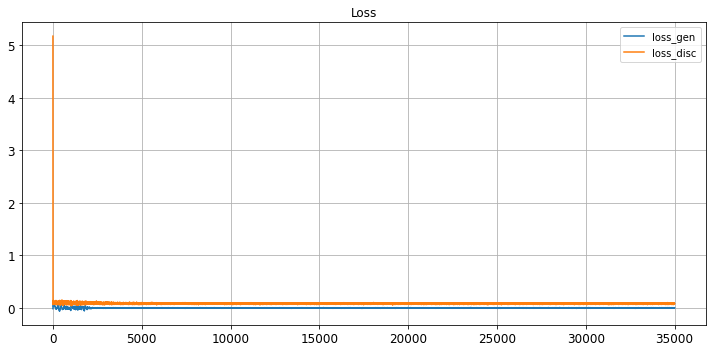

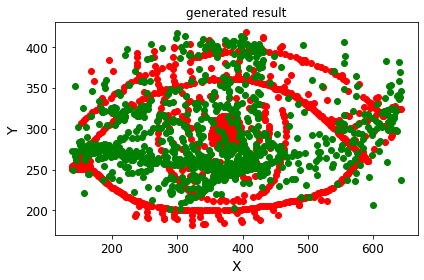

save the model & result
Epoch 35001/50000
critic: 0.083508 - generator: -0.001265 - 0s
Epoch 35002/50000
critic: 0.079696 - generator: -0.001828 - 0s
Epoch 35003/50000
critic: 0.086014 - generator: 0.000131 - 0s
Epoch 35004/50000
critic: 0.084289 - generator: 0.000472 - 0s
Epoch 35005/50000
critic: 0.085185 - generator: -0.000512 - 0s
Epoch 35006/50000
critic: 0.079047 - generator: 0.003150 - 0s
Epoch 35007/50000
critic: 0.086014 - generator: 0.001736 - 0s
Epoch 35008/50000
critic: 0.084552 - generator: 0.001770 - 0s
Epoch 35009/50000
critic: 0.081525 - generator: 0.003634 - 0s
Epoch 35010/50000
critic: 0.077051 - generator: 0.003990 - 0s
Epoch 35011/50000
critic: 0.081882 - generator: 0.002519 - 0s
Epoch 35012/50000
critic: 0.077340 - generator: -0.001909 - 0s
Epoch 35013/50000
critic: 0.080135 - generator: -0.002808 - 0s
Epoch 35014/50000
critic: 0.076224 - generator: 0.000285 - 0s
Epoch 35015/50000
critic: 0.082123 - generator: -0.000742 - 0s
Epoch 35016/50000
critic: 0.086730 - gen

critic: 0.091331 - generator: -0.002257 - 0s
Epoch 35134/50000
critic: 0.077487 - generator: -0.000187 - 0s
Epoch 35135/50000
critic: 0.083698 - generator: 0.001751 - 0s
Epoch 35136/50000
critic: 0.087286 - generator: 0.002382 - 0s
Epoch 35137/50000
critic: 0.078554 - generator: 0.002239 - 0s
Epoch 35138/50000
critic: 0.083269 - generator: -0.000627 - 0s
Epoch 35139/50000
critic: 0.083749 - generator: -0.000353 - 0s
Epoch 35140/50000
critic: 0.083430 - generator: -0.003926 - 0s
Epoch 35141/50000
critic: 0.081701 - generator: -0.002893 - 0s
Epoch 35142/50000
critic: 0.078027 - generator: -0.001507 - 0s
Epoch 35143/50000
critic: 0.092167 - generator: -0.002841 - 0s
Epoch 35144/50000
critic: 0.079935 - generator: 0.001136 - 0s
Epoch 35145/50000
critic: 0.078593 - generator: 0.000502 - 0s
Epoch 35146/50000
critic: 0.081572 - generator: 0.001205 - 0s
Epoch 35147/50000
critic: 0.080905 - generator: -0.002290 - 0s
Epoch 35148/50000
critic: 0.076277 - generator: 0.002771 - 0s
Epoch 35149/50000

critic: 0.074837 - generator: 0.001606 - 0s
Epoch 35266/50000
critic: 0.086444 - generator: -0.005006 - 0s
Epoch 35267/50000
critic: 0.072853 - generator: -0.002712 - 0s
Epoch 35268/50000
critic: 0.081835 - generator: -0.000685 - 0s
Epoch 35269/50000
critic: 0.079029 - generator: -0.006626 - 0s
Epoch 35270/50000
critic: 0.079038 - generator: -0.002798 - 0s
Epoch 35271/50000
critic: 0.071728 - generator: 0.002419 - 0s
Epoch 35272/50000
critic: 0.083750 - generator: 0.000956 - 0s
Epoch 35273/50000
critic: 0.091277 - generator: 0.002877 - 0s
Epoch 35274/50000
critic: 0.082042 - generator: 0.000908 - 0s
Epoch 35275/50000
critic: 0.079481 - generator: 0.000295 - 0s
Epoch 35276/50000
critic: 0.076056 - generator: 0.003815 - 0s
Epoch 35277/50000
critic: 0.076133 - generator: 0.001774 - 0s
Epoch 35278/50000
critic: 0.085640 - generator: -0.000635 - 0s
Epoch 35279/50000
critic: 0.076122 - generator: 0.003943 - 0s
Epoch 35280/50000
critic: 0.080929 - generator: 0.002617 - 0s
Epoch 35281/50000
cr

critic: 0.080865 - generator: 0.001981 - 0s
Epoch 35398/50000
critic: 0.070173 - generator: 0.006434 - 0s
Epoch 35399/50000
critic: 0.085855 - generator: 0.000891 - 0s
Epoch 35400/50000
critic: 0.086127 - generator: 0.001916 - 0s
Epoch 35401/50000
critic: 0.084653 - generator: 0.001170 - 0s
Epoch 35402/50000
critic: 0.083184 - generator: 0.001683 - 0s
Epoch 35403/50000
critic: 0.071282 - generator: 0.002630 - 0s
Epoch 35404/50000
critic: 0.086659 - generator: 0.002735 - 0s
Epoch 35405/50000
critic: 0.091365 - generator: -0.000035 - 0s
Epoch 35406/50000
critic: 0.075695 - generator: -0.002946 - 0s
Epoch 35407/50000
critic: 0.074332 - generator: 0.001476 - 0s
Epoch 35408/50000
critic: 0.087052 - generator: 0.001134 - 0s
Epoch 35409/50000
critic: 0.084781 - generator: 0.001410 - 0s
Epoch 35410/50000
critic: 0.081711 - generator: 0.001467 - 0s
Epoch 35411/50000
critic: 0.081576 - generator: -0.002668 - 0s
Epoch 35412/50000
critic: 0.076526 - generator: 0.000672 - 0s
Epoch 35413/50000
criti

critic: 0.075722 - generator: 0.000825 - 0s
Epoch 35530/50000
critic: 0.082421 - generator: -0.000442 - 0s
Epoch 35531/50000
critic: 0.084106 - generator: 0.003997 - 0s
Epoch 35532/50000
critic: 0.079580 - generator: 0.003950 - 0s
Epoch 35533/50000
critic: 0.087280 - generator: 0.000177 - 0s
Epoch 35534/50000
critic: 0.069994 - generator: 0.001501 - 0s
Epoch 35535/50000
critic: 0.080832 - generator: -0.002121 - 0s
Epoch 35536/50000
critic: 0.085914 - generator: -0.000861 - 0s
Epoch 35537/50000
critic: 0.076968 - generator: 0.002210 - 0s
Epoch 35538/50000
critic: 0.075260 - generator: 0.001934 - 0s
Epoch 35539/50000
critic: 0.085473 - generator: -0.000264 - 0s
Epoch 35540/50000
critic: 0.077346 - generator: -0.005756 - 0s
Epoch 35541/50000
critic: 0.066655 - generator: -0.002496 - 0s
Epoch 35542/50000
critic: 0.094362 - generator: -0.003109 - 0s
Epoch 35543/50000
critic: 0.076251 - generator: -0.000522 - 0s
Epoch 35544/50000
critic: 0.074064 - generator: -0.000252 - 0s
Epoch 35545/50000

critic: 0.083167 - generator: 0.001378 - 0s
Epoch 35662/50000
critic: 0.081995 - generator: -0.002169 - 0s
Epoch 35663/50000
critic: 0.084017 - generator: 0.002619 - 0s
Epoch 35664/50000
critic: 0.082007 - generator: -0.000840 - 0s
Epoch 35665/50000
critic: 0.080656 - generator: -0.001105 - 0s
Epoch 35666/50000
critic: 0.073810 - generator: 0.001217 - 0s
Epoch 35667/50000
critic: 0.084205 - generator: 0.002997 - 0s
Epoch 35668/50000
critic: 0.087791 - generator: 0.002339 - 0s
Epoch 35669/50000
critic: 0.083065 - generator: -0.002467 - 0s
Epoch 35670/50000
critic: 0.089084 - generator: -0.000421 - 0s
Epoch 35671/50000
critic: 0.086995 - generator: -0.003058 - 0s
Epoch 35672/50000
critic: 0.085905 - generator: 0.005257 - 0s
Epoch 35673/50000
critic: 0.080530 - generator: -0.002233 - 0s
Epoch 35674/50000
critic: 0.080518 - generator: 0.002580 - 0s
Epoch 35675/50000
critic: 0.076867 - generator: 0.001875 - 0s
Epoch 35676/50000
critic: 0.088869 - generator: 0.005428 - 0s
Epoch 35677/50000
c

critic: 0.083805 - generator: 0.002549 - 0s
Epoch 35794/50000
critic: 0.082025 - generator: -0.001882 - 0s
Epoch 35795/50000
critic: 0.082534 - generator: -0.002951 - 0s
Epoch 35796/50000
critic: 0.079788 - generator: 0.004650 - 0s
Epoch 35797/50000
critic: 0.089330 - generator: 0.004835 - 0s
Epoch 35798/50000
critic: 0.080707 - generator: -0.000168 - 0s
Epoch 35799/50000
critic: 0.081450 - generator: 0.001326 - 0s
Epoch 35800/50000
critic: 0.080841 - generator: -0.003006 - 0s
Epoch 35801/50000
critic: 0.080305 - generator: -0.001053 - 0s
Epoch 35802/50000
critic: 0.078514 - generator: -0.000166 - 0s
Epoch 35803/50000
critic: 0.069759 - generator: 0.000089 - 0s
Epoch 35804/50000
critic: 0.083626 - generator: -0.000947 - 0s
Epoch 35805/50000
critic: 0.072607 - generator: 0.000009 - 0s
Epoch 35806/50000
critic: 0.074739 - generator: -0.001852 - 0s
Epoch 35807/50000
critic: 0.080510 - generator: -0.000149 - 0s
Epoch 35808/50000
critic: 0.082877 - generator: 0.002979 - 0s
Epoch 35809/50000

critic: 0.083242 - generator: -0.002410 - 0s
Epoch 35926/50000
critic: 0.088236 - generator: -0.000495 - 0s
Epoch 35927/50000
critic: 0.074441 - generator: 0.002961 - 0s
Epoch 35928/50000
critic: 0.094397 - generator: 0.001167 - 0s
Epoch 35929/50000
critic: 0.068319 - generator: 0.000522 - 0s
Epoch 35930/50000
critic: 0.071220 - generator: 0.002125 - 0s
Epoch 35931/50000
critic: 0.075504 - generator: 0.000906 - 0s
Epoch 35932/50000
critic: 0.082011 - generator: 0.000960 - 0s
Epoch 35933/50000
critic: 0.081131 - generator: -0.000240 - 0s
Epoch 35934/50000
critic: 0.080702 - generator: 0.000440 - 0s
Epoch 35935/50000
critic: 0.077913 - generator: -0.001605 - 0s
Epoch 35936/50000
critic: 0.074130 - generator: 0.000240 - 0s
Epoch 35937/50000
critic: 0.084532 - generator: 0.002279 - 0s
Epoch 35938/50000
critic: 0.078089 - generator: 0.003647 - 0s
Epoch 35939/50000
critic: 0.080312 - generator: -0.000161 - 0s
Epoch 35940/50000
critic: 0.077499 - generator: 0.001710 - 0s
Epoch 35941/50000
cri

critic: 0.077434 - generator: -0.001692 - 0s
Epoch 36058/50000
critic: 0.078278 - generator: -0.003358 - 0s
Epoch 36059/50000
critic: 0.084149 - generator: -0.001631 - 0s
Epoch 36060/50000
critic: 0.075224 - generator: 0.002112 - 0s
Epoch 36061/50000
critic: 0.081057 - generator: 0.004053 - 0s
Epoch 36062/50000
critic: 0.079096 - generator: 0.004040 - 0s
Epoch 36063/50000
critic: 0.089776 - generator: 0.000938 - 0s
Epoch 36064/50000
critic: 0.078008 - generator: -0.001031 - 0s
Epoch 36065/50000
critic: 0.084445 - generator: -0.002271 - 0s
Epoch 36066/50000
critic: 0.084176 - generator: -0.003882 - 0s
Epoch 36067/50000
critic: 0.076573 - generator: -0.003699 - 0s
Epoch 36068/50000
critic: 0.083256 - generator: 0.001307 - 0s
Epoch 36069/50000
critic: 0.084387 - generator: 0.004121 - 0s
Epoch 36070/50000
critic: 0.080720 - generator: 0.001441 - 0s
Epoch 36071/50000
critic: 0.085611 - generator: -0.002747 - 0s
Epoch 36072/50000
critic: 0.083193 - generator: -0.002046 - 0s
Epoch 36073/50000

critic: 0.077157 - generator: -0.001937 - 0s
Epoch 36190/50000
critic: 0.080122 - generator: -0.001120 - 0s
Epoch 36191/50000
critic: 0.087278 - generator: 0.000375 - 0s
Epoch 36192/50000
critic: 0.076124 - generator: 0.002993 - 0s
Epoch 36193/50000
critic: 0.076464 - generator: 0.000545 - 0s
Epoch 36194/50000
critic: 0.085964 - generator: -0.000481 - 0s
Epoch 36195/50000
critic: 0.079333 - generator: 0.003676 - 0s
Epoch 36196/50000
critic: 0.081966 - generator: -0.001766 - 0s
Epoch 36197/50000
critic: 0.082108 - generator: -0.001123 - 0s
Epoch 36198/50000
critic: 0.073793 - generator: 0.001804 - 0s
Epoch 36199/50000
critic: 0.079046 - generator: -0.003162 - 0s
Epoch 36200/50000
critic: 0.091712 - generator: -0.001227 - 0s
Epoch 36201/50000
critic: 0.075834 - generator: 0.006028 - 0s
Epoch 36202/50000
critic: 0.079933 - generator: 0.000432 - 0s
Epoch 36203/50000
critic: 0.082105 - generator: -0.000445 - 0s
Epoch 36204/50000
critic: 0.078331 - generator: 0.002554 - 0s
Epoch 36205/50000


critic: 0.079054 - generator: -0.000870 - 0s
Epoch 36322/50000
critic: 0.084050 - generator: -0.000857 - 0s
Epoch 36323/50000
critic: 0.078539 - generator: 0.001532 - 0s
Epoch 36324/50000
critic: 0.082212 - generator: 0.003564 - 0s
Epoch 36325/50000
critic: 0.078802 - generator: 0.002295 - 0s
Epoch 36326/50000
critic: 0.079979 - generator: 0.002130 - 0s
Epoch 36327/50000
critic: 0.089350 - generator: -0.001218 - 0s
Epoch 36328/50000
critic: 0.086452 - generator: 0.000179 - 0s
Epoch 36329/50000
critic: 0.086130 - generator: -0.001992 - 0s
Epoch 36330/50000
critic: 0.082533 - generator: -0.001364 - 0s
Epoch 36331/50000
critic: 0.077887 - generator: -0.002913 - 0s
Epoch 36332/50000
critic: 0.077698 - generator: -0.002476 - 0s
Epoch 36333/50000
critic: 0.083624 - generator: -0.001516 - 0s
Epoch 36334/50000
critic: 0.085935 - generator: -0.000850 - 0s
Epoch 36335/50000
critic: 0.071084 - generator: -0.000837 - 0s
Epoch 36336/50000
critic: 0.081508 - generator: 0.002327 - 0s
Epoch 36337/5000

critic: 0.074674 - generator: -0.000438 - 0s
Epoch 36454/50000
critic: 0.077356 - generator: 0.005755 - 0s
Epoch 36455/50000
critic: 0.069133 - generator: -0.000413 - 0s
Epoch 36456/50000
critic: 0.083661 - generator: -0.002053 - 0s
Epoch 36457/50000
critic: 0.075611 - generator: 0.001383 - 0s
Epoch 36458/50000
critic: 0.074120 - generator: -0.000165 - 0s
Epoch 36459/50000
critic: 0.077864 - generator: 0.000127 - 0s
Epoch 36460/50000
critic: 0.085682 - generator: -0.002744 - 0s
Epoch 36461/50000
critic: 0.079392 - generator: -0.002460 - 0s
Epoch 36462/50000
critic: 0.082621 - generator: 0.000406 - 0s
Epoch 36463/50000
critic: 0.073701 - generator: -0.001202 - 0s
Epoch 36464/50000
critic: 0.073884 - generator: -0.004085 - 0s
Epoch 36465/50000
critic: 0.076583 - generator: -0.000626 - 0s
Epoch 36466/50000
critic: 0.081141 - generator: -0.000952 - 0s
Epoch 36467/50000
critic: 0.079113 - generator: 0.000387 - 0s
Epoch 36468/50000
critic: 0.081398 - generator: 0.001334 - 0s
Epoch 36469/5000

critic: 0.080223 - generator: -0.001555 - 0s
Epoch 36586/50000
critic: 0.076399 - generator: 0.000413 - 0s
Epoch 36587/50000
critic: 0.087493 - generator: 0.003117 - 0s
Epoch 36588/50000
critic: 0.079380 - generator: -0.002510 - 0s
Epoch 36589/50000
critic: 0.081625 - generator: -0.001615 - 0s
Epoch 36590/50000
critic: 0.084729 - generator: -0.002686 - 0s
Epoch 36591/50000
critic: 0.081089 - generator: -0.002089 - 0s
Epoch 36592/50000
critic: 0.080496 - generator: 0.003651 - 0s
Epoch 36593/50000
critic: 0.079444 - generator: -0.001241 - 0s
Epoch 36594/50000
critic: 0.072134 - generator: -0.001779 - 0s
Epoch 36595/50000
critic: 0.080565 - generator: -0.003092 - 0s
Epoch 36596/50000
critic: 0.078830 - generator: -0.003216 - 0s
Epoch 36597/50000
critic: 0.079298 - generator: 0.001672 - 0s
Epoch 36598/50000
critic: 0.088352 - generator: 0.000612 - 0s
Epoch 36599/50000
critic: 0.082737 - generator: 0.002457 - 0s
Epoch 36600/50000
critic: 0.075921 - generator: -0.002751 - 0s
Epoch 36601/5000

critic: 0.086824 - generator: 0.003446 - 0s
Epoch 36718/50000
critic: 0.079149 - generator: 0.002977 - 0s
Epoch 36719/50000
critic: 0.078268 - generator: -0.001472 - 0s
Epoch 36720/50000
critic: 0.084373 - generator: -0.000295 - 0s
Epoch 36721/50000
critic: 0.070255 - generator: 0.002265 - 0s
Epoch 36722/50000
critic: 0.082256 - generator: 0.000814 - 0s
Epoch 36723/50000
critic: 0.073628 - generator: 0.000634 - 0s
Epoch 36724/50000
critic: 0.083875 - generator: -0.000598 - 0s
Epoch 36725/50000
critic: 0.079777 - generator: -0.000117 - 0s
Epoch 36726/50000
critic: 0.088650 - generator: 0.002727 - 0s
Epoch 36727/50000
critic: 0.077635 - generator: 0.001493 - 0s
Epoch 36728/50000
critic: 0.082615 - generator: -0.001159 - 0s
Epoch 36729/50000
critic: 0.075459 - generator: 0.001685 - 0s
Epoch 36730/50000
critic: 0.079838 - generator: -0.002276 - 0s
Epoch 36731/50000
critic: 0.071944 - generator: -0.002677 - 0s
Epoch 36732/50000
critic: 0.084881 - generator: 0.001193 - 0s
Epoch 36733/50000
c

critic: 0.089362 - generator: -0.005882 - 0s
Epoch 36850/50000
critic: 0.073477 - generator: -0.000549 - 0s
Epoch 36851/50000
critic: 0.079742 - generator: -0.001711 - 0s
Epoch 36852/50000
critic: 0.076178 - generator: 0.001822 - 0s
Epoch 36853/50000
critic: 0.071983 - generator: -0.002370 - 0s
Epoch 36854/50000
critic: 0.067163 - generator: -0.000545 - 0s
Epoch 36855/50000
critic: 0.082796 - generator: -0.000650 - 0s
Epoch 36856/50000
critic: 0.080471 - generator: 0.003732 - 0s
Epoch 36857/50000
critic: 0.081795 - generator: 0.002037 - 0s
Epoch 36858/50000
critic: 0.076303 - generator: 0.001726 - 0s
Epoch 36859/50000
critic: 0.088364 - generator: -0.000999 - 0s
Epoch 36860/50000
critic: 0.088788 - generator: 0.001325 - 0s
Epoch 36861/50000
critic: 0.073943 - generator: 0.001667 - 0s
Epoch 36862/50000
critic: 0.079994 - generator: 0.003894 - 0s
Epoch 36863/50000
critic: 0.080089 - generator: 0.006745 - 0s
Epoch 36864/50000
critic: 0.079267 - generator: 0.003045 - 0s
Epoch 36865/50000
c

critic: 0.083557 - generator: -0.004273 - 0s
Epoch 36982/50000
critic: 0.081369 - generator: -0.000476 - 0s
Epoch 36983/50000
critic: 0.082066 - generator: 0.000689 - 0s
Epoch 36984/50000
critic: 0.083331 - generator: -0.000585 - 0s
Epoch 36985/50000
critic: 0.072305 - generator: -0.004966 - 0s
Epoch 36986/50000
critic: 0.073911 - generator: 0.001399 - 0s
Epoch 36987/50000
critic: 0.078187 - generator: -0.000975 - 0s
Epoch 36988/50000
critic: 0.073263 - generator: -0.001635 - 0s
Epoch 36989/50000
critic: 0.068316 - generator: 0.001297 - 0s
Epoch 36990/50000
critic: 0.096046 - generator: -0.000206 - 0s
Epoch 36991/50000
critic: 0.082459 - generator: -0.001135 - 0s
Epoch 36992/50000
critic: 0.078622 - generator: -0.005342 - 0s
Epoch 36993/50000
critic: 0.072608 - generator: -0.000154 - 0s
Epoch 36994/50000
critic: 0.078637 - generator: 0.000552 - 0s
Epoch 36995/50000
critic: 0.073854 - generator: 0.003949 - 0s
Epoch 36996/50000
critic: 0.076294 - generator: 0.002547 - 0s
Epoch 36997/5000

critic: 0.078134 - generator: 0.002910 - 0s
Epoch 37115/50000
critic: 0.087407 - generator: 0.001852 - 0s
Epoch 37116/50000
critic: 0.077002 - generator: -0.001806 - 0s
Epoch 37117/50000
critic: 0.082456 - generator: -0.003448 - 0s
Epoch 37118/50000
critic: 0.091484 - generator: -0.004406 - 0s
Epoch 37119/50000
critic: 0.081464 - generator: 0.001093 - 0s
Epoch 37120/50000
critic: 0.086072 - generator: 0.001003 - 0s
Epoch 37121/50000
critic: 0.076121 - generator: 0.002064 - 0s
Epoch 37122/50000
critic: 0.083760 - generator: 0.003498 - 0s
Epoch 37123/50000
critic: 0.080783 - generator: 0.002472 - 0s
Epoch 37124/50000
critic: 0.076953 - generator: 0.002004 - 0s
Epoch 37125/50000
critic: 0.076316 - generator: 0.002059 - 0s
Epoch 37126/50000
critic: 0.066329 - generator: -0.004313 - 0s
Epoch 37127/50000
critic: 0.080451 - generator: -0.004920 - 0s
Epoch 37128/50000
critic: 0.087622 - generator: -0.003724 - 0s
Epoch 37129/50000
critic: 0.081109 - generator: 0.000923 - 0s
Epoch 37130/50000
cr

critic: 0.082532 - generator: -0.003957 - 0s
Epoch 37247/50000
critic: 0.081742 - generator: -0.000054 - 0s
Epoch 37248/50000
critic: 0.074039 - generator: -0.000102 - 0s
Epoch 37249/50000
critic: 0.084867 - generator: -0.001810 - 0s
Epoch 37250/50000
critic: 0.082968 - generator: 0.003344 - 0s
Epoch 37251/50000
critic: 0.077617 - generator: 0.000198 - 0s
Epoch 37252/50000
critic: 0.080021 - generator: -0.002904 - 0s
Epoch 37253/50000
critic: 0.081185 - generator: 0.003300 - 0s
Epoch 37254/50000
critic: 0.069061 - generator: 0.002361 - 0s
Epoch 37255/50000
critic: 0.082330 - generator: 0.001220 - 0s
Epoch 37256/50000
critic: 0.076168 - generator: 0.000364 - 0s
Epoch 37257/50000
critic: 0.083908 - generator: 0.000800 - 0s
Epoch 37258/50000
critic: 0.084011 - generator: 0.000911 - 0s
Epoch 37259/50000
critic: 0.082006 - generator: 0.003022 - 0s
Epoch 37260/50000
critic: 0.084744 - generator: 0.001965 - 0s
Epoch 37261/50000
critic: 0.076763 - generator: -0.004287 - 0s
Epoch 37262/50000
cr

critic: 0.085710 - generator: -0.000153 - 0s
Epoch 37379/50000
critic: 0.081009 - generator: -0.002687 - 0s
Epoch 37380/50000
critic: 0.075146 - generator: 0.001560 - 0s
Epoch 37381/50000
critic: 0.071844 - generator: 0.002645 - 0s
Epoch 37382/50000
critic: 0.078594 - generator: -0.001144 - 0s
Epoch 37383/50000
critic: 0.081422 - generator: -0.004003 - 0s
Epoch 37384/50000
critic: 0.073223 - generator: 0.001361 - 0s
Epoch 37385/50000
critic: 0.084558 - generator: -0.003430 - 0s
Epoch 37386/50000
critic: 0.076793 - generator: -0.000400 - 0s
Epoch 37387/50000
critic: 0.085256 - generator: 0.001666 - 0s
Epoch 37388/50000
critic: 0.079689 - generator: -0.002404 - 0s
Epoch 37389/50000
critic: 0.092715 - generator: 0.002439 - 0s
Epoch 37390/50000
critic: 0.081095 - generator: -0.003266 - 0s
Epoch 37391/50000
critic: 0.078471 - generator: -0.001268 - 0s
Epoch 37392/50000
critic: 0.079417 - generator: 0.001797 - 0s
Epoch 37393/50000
critic: 0.077850 - generator: 0.000837 - 0s
Epoch 37394/50000

critic: 0.087443 - generator: -0.001484 - 0s
Epoch 37512/50000
critic: 0.086107 - generator: -0.001721 - 0s
Epoch 37513/50000
critic: 0.074838 - generator: -0.002462 - 0s
Epoch 37514/50000
critic: 0.075085 - generator: 0.000609 - 0s
Epoch 37515/50000
critic: 0.083480 - generator: -0.003172 - 0s
Epoch 37516/50000
critic: 0.085524 - generator: 0.000856 - 0s
Epoch 37517/50000
critic: 0.085132 - generator: 0.001514 - 0s
Epoch 37518/50000
critic: 0.082841 - generator: -0.000562 - 0s
Epoch 37519/50000
critic: 0.087713 - generator: -0.001515 - 0s
Epoch 37520/50000
critic: 0.088291 - generator: 0.001800 - 0s
Epoch 37521/50000
critic: 0.078210 - generator: 0.000423 - 0s
Epoch 37522/50000
critic: 0.086593 - generator: 0.000104 - 0s
Epoch 37523/50000
critic: 0.078008 - generator: -0.001997 - 0s
Epoch 37524/50000
critic: 0.080735 - generator: -0.002989 - 0s
Epoch 37525/50000
critic: 0.073347 - generator: -0.000430 - 0s
Epoch 37526/50000
critic: 0.084098 - generator: -0.000919 - 0s
Epoch 37527/5000

critic: 0.080778 - generator: -0.004396 - 0s
Epoch 37644/50000
critic: 0.074426 - generator: 0.000425 - 0s
Epoch 37645/50000
critic: 0.080166 - generator: 0.001190 - 0s
Epoch 37646/50000
critic: 0.072533 - generator: 0.002649 - 0s
Epoch 37647/50000
critic: 0.081799 - generator: -0.005750 - 0s
Epoch 37648/50000
critic: 0.087450 - generator: 0.001809 - 0s
Epoch 37649/50000
critic: 0.080307 - generator: 0.000654 - 0s
Epoch 37650/50000
critic: 0.073869 - generator: -0.002054 - 0s
Epoch 37651/50000
critic: 0.083756 - generator: 0.003354 - 0s
Epoch 37652/50000
critic: 0.085962 - generator: -0.000521 - 0s
Epoch 37653/50000
critic: 0.085861 - generator: -0.003376 - 0s
Epoch 37654/50000
critic: 0.082342 - generator: 0.004534 - 0s
Epoch 37655/50000
critic: 0.086139 - generator: 0.000891 - 0s
Epoch 37656/50000
critic: 0.084417 - generator: 0.001558 - 0s
Epoch 37657/50000
critic: 0.077135 - generator: 0.002267 - 0s
Epoch 37658/50000
critic: 0.079667 - generator: 0.000290 - 0s
Epoch 37659/50000
cri

critic: 0.074880 - generator: 0.005620 - 0s
Epoch 37776/50000
critic: 0.083751 - generator: -0.003434 - 0s
Epoch 37777/50000
critic: 0.081811 - generator: -0.000471 - 0s
Epoch 37778/50000
critic: 0.077390 - generator: -0.003391 - 0s
Epoch 37779/50000
critic: 0.093430 - generator: 0.003239 - 0s
Epoch 37780/50000
critic: 0.077391 - generator: 0.001549 - 0s
Epoch 37781/50000
critic: 0.079404 - generator: -0.001235 - 0s
Epoch 37782/50000
critic: 0.076911 - generator: 0.000059 - 0s
Epoch 37783/50000
critic: 0.076169 - generator: 0.002528 - 0s
Epoch 37784/50000
critic: 0.077070 - generator: -0.003740 - 0s
Epoch 37785/50000
critic: 0.084066 - generator: -0.000980 - 0s
Epoch 37786/50000
critic: 0.083793 - generator: -0.000834 - 0s
Epoch 37787/50000
critic: 0.078709 - generator: 0.001507 - 0s
Epoch 37788/50000
critic: 0.082764 - generator: -0.002090 - 0s
Epoch 37789/50000
critic: 0.075390 - generator: -0.008203 - 0s
Epoch 37790/50000
critic: 0.088380 - generator: -0.005542 - 0s
Epoch 37791/5000

critic: 0.087070 - generator: -0.005387 - 0s
Epoch 37908/50000
critic: 0.084808 - generator: -0.002503 - 0s
Epoch 37909/50000
critic: 0.085637 - generator: -0.000941 - 0s
Epoch 37910/50000
critic: 0.087888 - generator: 0.000353 - 0s
Epoch 37911/50000
critic: 0.075070 - generator: -0.000280 - 0s
Epoch 37912/50000
critic: 0.078097 - generator: -0.004470 - 0s
Epoch 37913/50000
critic: 0.077662 - generator: 0.001305 - 0s
Epoch 37914/50000
critic: 0.072611 - generator: -0.006257 - 0s
Epoch 37915/50000
critic: 0.085092 - generator: -0.002749 - 0s
Epoch 37916/50000
critic: 0.090831 - generator: -0.004093 - 0s
Epoch 37917/50000
critic: 0.069595 - generator: -0.004066 - 0s
Epoch 37918/50000
critic: 0.071435 - generator: -0.000185 - 0s
Epoch 37919/50000
critic: 0.072498 - generator: -0.000224 - 0s
Epoch 37920/50000
critic: 0.081292 - generator: 0.002367 - 0s
Epoch 37921/50000
critic: 0.076256 - generator: -0.000522 - 0s
Epoch 37922/50000
critic: 0.074931 - generator: -0.002706 - 0s
Epoch 37923/5

critic: 0.077715 - generator: 0.001526 - 0s
Epoch 38039/50000
critic: 0.077585 - generator: 0.001370 - 0s
Epoch 38040/50000
critic: 0.077049 - generator: -0.001688 - 0s
Epoch 38041/50000
critic: 0.077716 - generator: -0.002035 - 0s
Epoch 38042/50000
critic: 0.087469 - generator: -0.000386 - 0s
Epoch 38043/50000
critic: 0.071586 - generator: 0.000167 - 0s
Epoch 38044/50000
critic: 0.067946 - generator: 0.000649 - 0s
Epoch 38045/50000
critic: 0.077881 - generator: 0.000643 - 0s
Epoch 38046/50000
critic: 0.074937 - generator: 0.003054 - 0s
Epoch 38047/50000
critic: 0.077805 - generator: 0.001659 - 0s
Epoch 38048/50000
critic: 0.072741 - generator: -0.001331 - 0s
Epoch 38049/50000
critic: 0.074324 - generator: -0.001505 - 0s
Epoch 38050/50000
critic: 0.082415 - generator: -0.002209 - 0s
Epoch 38051/50000
critic: 0.074080 - generator: -0.002537 - 0s
Epoch 38052/50000
critic: 0.092620 - generator: -0.005461 - 0s
Epoch 38053/50000
critic: 0.076368 - generator: -0.001980 - 0s
Epoch 38054/50000

critic: 0.082805 - generator: -0.001815 - 0s
Epoch 38171/50000
critic: 0.085618 - generator: -0.000151 - 0s
Epoch 38172/50000
critic: 0.080666 - generator: 0.001201 - 0s
Epoch 38173/50000
critic: 0.070745 - generator: 0.002113 - 0s
Epoch 38174/50000
critic: 0.077849 - generator: -0.000672 - 0s
Epoch 38175/50000
critic: 0.073462 - generator: 0.002673 - 0s
Epoch 38176/50000
critic: 0.078229 - generator: 0.003504 - 0s
Epoch 38177/50000
critic: 0.088785 - generator: -0.001174 - 0s
Epoch 38178/50000
critic: 0.076957 - generator: -0.003895 - 0s
Epoch 38179/50000
critic: 0.085646 - generator: -0.002057 - 0s
Epoch 38180/50000
critic: 0.080131 - generator: 0.001306 - 0s
Epoch 38181/50000
critic: 0.082469 - generator: -0.005944 - 0s
Epoch 38182/50000
critic: 0.075734 - generator: 0.001252 - 0s
Epoch 38183/50000
critic: 0.076991 - generator: -0.000740 - 0s
Epoch 38184/50000
critic: 0.080135 - generator: 0.000815 - 0s
Epoch 38185/50000
critic: 0.072482 - generator: 0.000594 - 0s
Epoch 38186/50000


critic: 0.075618 - generator: 0.001635 - 0s
Epoch 38303/50000
critic: 0.082657 - generator: -0.001197 - 0s
Epoch 38304/50000
critic: 0.077213 - generator: 0.003050 - 0s
Epoch 38305/50000
critic: 0.091386 - generator: 0.002636 - 0s
Epoch 38306/50000
critic: 0.082219 - generator: 0.001142 - 0s
Epoch 38307/50000
critic: 0.072952 - generator: 0.001274 - 0s
Epoch 38308/50000
critic: 0.077478 - generator: 0.000636 - 0s
Epoch 38309/50000
critic: 0.074402 - generator: 0.001971 - 0s
Epoch 38310/50000
critic: 0.078021 - generator: -0.004234 - 0s
Epoch 38311/50000
critic: 0.074875 - generator: -0.005034 - 0s
Epoch 38312/50000
critic: 0.075877 - generator: 0.000109 - 0s
Epoch 38313/50000
critic: 0.073876 - generator: -0.002820 - 0s
Epoch 38314/50000
critic: 0.075248 - generator: -0.001193 - 0s
Epoch 38315/50000
critic: 0.078781 - generator: -0.003504 - 0s
Epoch 38316/50000
critic: 0.076509 - generator: -0.001141 - 0s
Epoch 38317/50000
critic: 0.074886 - generator: 0.000578 - 0s
Epoch 38318/50000
c

critic: 0.075139 - generator: 0.001836 - 0s
Epoch 38436/50000
critic: 0.076329 - generator: -0.002555 - 0s
Epoch 38437/50000
critic: 0.082457 - generator: -0.003133 - 0s
Epoch 38438/50000
critic: 0.082199 - generator: 0.001931 - 0s
Epoch 38439/50000
critic: 0.082215 - generator: -0.004408 - 0s
Epoch 38440/50000
critic: 0.083992 - generator: -0.000780 - 0s
Epoch 38441/50000
critic: 0.081203 - generator: -0.000755 - 0s
Epoch 38442/50000
critic: 0.080378 - generator: 0.000512 - 0s
Epoch 38443/50000
critic: 0.079024 - generator: 0.000505 - 0s
Epoch 38444/50000
critic: 0.086221 - generator: 0.000544 - 0s
Epoch 38445/50000
critic: 0.078684 - generator: 0.000260 - 0s
Epoch 38446/50000
critic: 0.084049 - generator: 0.000452 - 0s
Epoch 38447/50000
critic: 0.079325 - generator: -0.001888 - 0s
Epoch 38448/50000
critic: 0.075134 - generator: -0.002523 - 0s
Epoch 38449/50000
critic: 0.076340 - generator: -0.006305 - 0s
Epoch 38450/50000
critic: 0.077551 - generator: -0.000950 - 0s
Epoch 38451/50000

critic: 0.078255 - generator: -0.001079 - 0s
Epoch 38568/50000
critic: 0.088514 - generator: 0.001282 - 0s
Epoch 38569/50000
critic: 0.072418 - generator: -0.000312 - 0s
Epoch 38570/50000
critic: 0.079893 - generator: 0.003363 - 0s
Epoch 38571/50000
critic: 0.082697 - generator: 0.001198 - 0s
Epoch 38572/50000
critic: 0.073953 - generator: 0.001832 - 0s
Epoch 38573/50000
critic: 0.078119 - generator: 0.002478 - 0s
Epoch 38574/50000
critic: 0.079396 - generator: 0.000318 - 0s
Epoch 38575/50000
critic: 0.079087 - generator: 0.000286 - 0s
Epoch 38576/50000
critic: 0.074351 - generator: 0.002419 - 0s
Epoch 38577/50000
critic: 0.080450 - generator: -0.002697 - 0s
Epoch 38578/50000
critic: 0.077470 - generator: -0.000616 - 0s
Epoch 38579/50000
critic: 0.083120 - generator: -0.000582 - 0s
Epoch 38580/50000
critic: 0.083358 - generator: 0.003768 - 0s
Epoch 38581/50000
critic: 0.070960 - generator: -0.000875 - 0s
Epoch 38582/50000
critic: 0.077336 - generator: -0.003136 - 0s
Epoch 38583/50000
c

critic: 0.087638 - generator: -0.003644 - 0s
Epoch 38700/50000
critic: 0.082786 - generator: -0.003647 - 0s
Epoch 38701/50000
critic: 0.087493 - generator: 0.000952 - 0s
Epoch 38702/50000
critic: 0.086580 - generator: 0.003236 - 0s
Epoch 38703/50000
critic: 0.081065 - generator: 0.000307 - 0s
Epoch 38704/50000
critic: 0.081718 - generator: 0.002155 - 0s
Epoch 38705/50000
critic: 0.082312 - generator: 0.001427 - 0s
Epoch 38706/50000
critic: 0.079329 - generator: 0.001426 - 0s
Epoch 38707/50000
critic: 0.075877 - generator: 0.000423 - 0s
Epoch 38708/50000
critic: 0.086321 - generator: -0.000104 - 0s
Epoch 38709/50000
critic: 0.083021 - generator: 0.000222 - 0s
Epoch 38710/50000
critic: 0.077046 - generator: 0.002343 - 0s
Epoch 38711/50000
critic: 0.075765 - generator: 0.003210 - 0s
Epoch 38712/50000
critic: 0.079539 - generator: 0.001782 - 0s
Epoch 38713/50000
critic: 0.069701 - generator: -0.000822 - 0s
Epoch 38714/50000
critic: 0.082709 - generator: -0.003161 - 0s
Epoch 38715/50000
cri

critic: 0.088019 - generator: 0.003395 - 0s
Epoch 38832/50000
critic: 0.090106 - generator: -0.001098 - 0s
Epoch 38833/50000
critic: 0.087382 - generator: 0.002561 - 0s
Epoch 38834/50000
critic: 0.072658 - generator: 0.003053 - 0s
Epoch 38835/50000
critic: 0.095400 - generator: 0.000944 - 0s
Epoch 38836/50000
critic: 0.095829 - generator: -0.000081 - 0s
Epoch 38837/50000
critic: 0.073568 - generator: 0.000341 - 0s
Epoch 38838/50000
critic: 0.078137 - generator: -0.000157 - 0s
Epoch 38839/50000
critic: 0.082819 - generator: 0.001045 - 0s
Epoch 38840/50000
critic: 0.080291 - generator: 0.000128 - 0s
Epoch 38841/50000
critic: 0.077723 - generator: 0.001409 - 0s
Epoch 38842/50000
critic: 0.078347 - generator: -0.001758 - 0s
Epoch 38843/50000
critic: 0.087151 - generator: -0.003911 - 0s
Epoch 38844/50000
critic: 0.073703 - generator: -0.002629 - 0s
Epoch 38845/50000
critic: 0.081091 - generator: -0.004942 - 0s
Epoch 38846/50000
critic: 0.076857 - generator: 0.001405 - 0s
Epoch 38847/50000
c

critic: 0.078696 - generator: -0.000251 - 0s
Epoch 38964/50000
critic: 0.081645 - generator: -0.002521 - 0s
Epoch 38965/50000
critic: 0.083934 - generator: -0.001860 - 0s
Epoch 38966/50000
critic: 0.083784 - generator: -0.001245 - 0s
Epoch 38967/50000
critic: 0.086654 - generator: 0.000199 - 0s
Epoch 38968/50000
critic: 0.082188 - generator: -0.001192 - 0s
Epoch 38969/50000
critic: 0.077786 - generator: -0.003266 - 0s
Epoch 38970/50000
critic: 0.079826 - generator: -0.004075 - 0s
Epoch 38971/50000
critic: 0.076537 - generator: 0.002105 - 0s
Epoch 38972/50000
critic: 0.078246 - generator: 0.000092 - 0s
Epoch 38973/50000
critic: 0.081068 - generator: -0.001323 - 0s
Epoch 38974/50000
critic: 0.077985 - generator: -0.001491 - 0s
Epoch 38975/50000
critic: 0.081359 - generator: 0.001757 - 0s
Epoch 38976/50000
critic: 0.083214 - generator: -0.000923 - 0s
Epoch 38977/50000
critic: 0.079372 - generator: 0.000215 - 0s
Epoch 38978/50000
critic: 0.081465 - generator: 0.001084 - 0s
Epoch 38979/5000

critic: 0.079325 - generator: -0.003456 - 0s
Epoch 39096/50000
critic: 0.067235 - generator: 0.001877 - 0s
Epoch 39097/50000
critic: 0.082600 - generator: 0.001806 - 0s
Epoch 39098/50000
critic: 0.084445 - generator: 0.003440 - 0s
Epoch 39099/50000
critic: 0.088757 - generator: -0.000732 - 0s
Epoch 39100/50000
critic: 0.080189 - generator: -0.003294 - 0s
Epoch 39101/50000
critic: 0.078823 - generator: 0.003755 - 0s
Epoch 39102/50000
critic: 0.082900 - generator: -0.002130 - 0s
Epoch 39103/50000
critic: 0.076168 - generator: -0.000055 - 0s
Epoch 39104/50000
critic: 0.072028 - generator: 0.002968 - 0s
Epoch 39105/50000
critic: 0.076097 - generator: 0.000868 - 0s
Epoch 39106/50000
critic: 0.078015 - generator: -0.003043 - 0s
Epoch 39107/50000
critic: 0.071731 - generator: -0.001451 - 0s
Epoch 39108/50000
critic: 0.076384 - generator: -0.002870 - 0s
Epoch 39109/50000
critic: 0.084846 - generator: -0.000379 - 0s
Epoch 39110/50000
critic: 0.073225 - generator: -0.000436 - 0s
Epoch 39111/5000

critic: 0.082253 - generator: -0.000949 - 0s
Epoch 39229/50000
critic: 0.083287 - generator: -0.002651 - 0s
Epoch 39230/50000
critic: 0.077464 - generator: -0.001066 - 0s
Epoch 39231/50000
critic: 0.079947 - generator: 0.001132 - 0s
Epoch 39232/50000
critic: 0.082014 - generator: 0.000670 - 0s
Epoch 39233/50000
critic: 0.075912 - generator: -0.002904 - 0s
Epoch 39234/50000
critic: 0.081736 - generator: 0.001944 - 0s
Epoch 39235/50000
critic: 0.078961 - generator: -0.002659 - 0s
Epoch 39236/50000
critic: 0.076095 - generator: -0.002784 - 0s
Epoch 39237/50000
critic: 0.076439 - generator: -0.000228 - 0s
Epoch 39238/50000
critic: 0.082839 - generator: 0.001036 - 0s
Epoch 39239/50000
critic: 0.074341 - generator: 0.003792 - 0s
Epoch 39240/50000
critic: 0.087588 - generator: 0.001390 - 0s
Epoch 39241/50000
critic: 0.075473 - generator: 0.000164 - 0s
Epoch 39242/50000
critic: 0.089420 - generator: 0.000772 - 0s
Epoch 39243/50000
critic: 0.083030 - generator: -0.001096 - 0s
Epoch 39244/50000


critic: 0.081437 - generator: 0.000370 - 0s
Epoch 39361/50000
critic: 0.082483 - generator: -0.002941 - 0s
Epoch 39362/50000
critic: 0.081926 - generator: -0.002191 - 0s
Epoch 39363/50000
critic: 0.074275 - generator: -0.005873 - 0s
Epoch 39364/50000
critic: 0.086182 - generator: -0.004474 - 0s
Epoch 39365/50000
critic: 0.086636 - generator: 0.001316 - 0s
Epoch 39366/50000
critic: 0.070809 - generator: -0.001548 - 0s
Epoch 39367/50000
critic: 0.082994 - generator: -0.000952 - 0s
Epoch 39368/50000
critic: 0.081267 - generator: 0.000100 - 0s
Epoch 39369/50000
critic: 0.080708 - generator: 0.001020 - 0s
Epoch 39370/50000
critic: 0.069798 - generator: 0.000782 - 0s
Epoch 39371/50000
critic: 0.091692 - generator: 0.001660 - 0s
Epoch 39372/50000
critic: 0.076315 - generator: 0.001777 - 0s
Epoch 39373/50000
critic: 0.082389 - generator: 0.002258 - 0s
Epoch 39374/50000
critic: 0.088654 - generator: -0.001285 - 0s
Epoch 39375/50000
critic: 0.066711 - generator: -0.001346 - 0s
Epoch 39376/50000


critic: 0.082401 - generator: 0.002541 - 0s
Epoch 39493/50000
critic: 0.076644 - generator: 0.003159 - 0s
Epoch 39494/50000
critic: 0.081465 - generator: -0.005269 - 0s
Epoch 39495/50000
critic: 0.080593 - generator: 0.001338 - 0s
Epoch 39496/50000
critic: 0.079714 - generator: -0.001861 - 0s
Epoch 39497/50000
critic: 0.081817 - generator: 0.000981 - 0s
Epoch 39498/50000
critic: 0.082379 - generator: -0.001187 - 0s
Epoch 39499/50000
critic: 0.081926 - generator: -0.000336 - 0s
Epoch 39500/50000
critic: 0.073040 - generator: -0.003185 - 0s
Epoch 39501/50000
critic: 0.084793 - generator: -0.001259 - 0s
Epoch 39502/50000
critic: 0.082558 - generator: 0.002086 - 0s
Epoch 39503/50000
critic: 0.081499 - generator: -0.000666 - 0s
Epoch 39504/50000
critic: 0.089496 - generator: -0.001307 - 0s
Epoch 39505/50000
critic: 0.074310 - generator: 0.002129 - 0s
Epoch 39506/50000
critic: 0.072636 - generator: 0.001162 - 0s
Epoch 39507/50000
critic: 0.085990 - generator: 0.000253 - 0s
Epoch 39508/50000


critic: 0.083274 - generator: -0.002012 - 0s
Epoch 39625/50000
critic: 0.082655 - generator: -0.003384 - 0s
Epoch 39626/50000
critic: 0.090038 - generator: -0.003041 - 0s
Epoch 39627/50000
critic: 0.074068 - generator: -0.002068 - 0s
Epoch 39628/50000
critic: 0.084627 - generator: -0.000023 - 0s
Epoch 39629/50000
critic: 0.073784 - generator: 0.000185 - 0s
Epoch 39630/50000
critic: 0.077722 - generator: 0.000546 - 0s
Epoch 39631/50000
critic: 0.078166 - generator: 0.001885 - 0s
Epoch 39632/50000
critic: 0.080704 - generator: -0.000703 - 0s
Epoch 39633/50000
critic: 0.087760 - generator: 0.002728 - 0s
Epoch 39634/50000
critic: 0.080381 - generator: 0.003388 - 0s
Epoch 39635/50000
critic: 0.078095 - generator: 0.001261 - 0s
Epoch 39636/50000
critic: 0.076965 - generator: -0.002430 - 0s
Epoch 39637/50000
critic: 0.089344 - generator: 0.003722 - 0s
Epoch 39638/50000
critic: 0.075083 - generator: 0.003620 - 0s
Epoch 39639/50000
critic: 0.085529 - generator: 0.001839 - 0s
Epoch 39640/50000
c

critic: 0.081850 - generator: 0.002065 - 0s
Epoch 39758/50000
critic: 0.086560 - generator: 0.002231 - 0s
Epoch 39759/50000
critic: 0.073085 - generator: 0.004458 - 0s
Epoch 39760/50000
critic: 0.082330 - generator: 0.001279 - 0s
Epoch 39761/50000
critic: 0.082275 - generator: -0.000385 - 0s
Epoch 39762/50000
critic: 0.076933 - generator: 0.000397 - 0s
Epoch 39763/50000
critic: 0.080843 - generator: 0.000314 - 0s
Epoch 39764/50000
critic: 0.075370 - generator: 0.001161 - 0s
Epoch 39765/50000
critic: 0.081283 - generator: 0.001636 - 0s
Epoch 39766/50000
critic: 0.081659 - generator: 0.005100 - 0s
Epoch 39767/50000
critic: 0.081061 - generator: 0.000374 - 0s
Epoch 39768/50000
critic: 0.073804 - generator: -0.003037 - 0s
Epoch 39769/50000
critic: 0.084583 - generator: -0.001968 - 0s
Epoch 39770/50000
critic: 0.076889 - generator: 0.002551 - 0s
Epoch 39771/50000
critic: 0.074159 - generator: 0.000488 - 0s
Epoch 39772/50000
critic: 0.082027 - generator: -0.003017 - 0s
Epoch 39773/50000
crit

critic: 0.084756 - generator: -0.001548 - 0s
Epoch 39890/50000
critic: 0.071278 - generator: -0.001580 - 0s
Epoch 39891/50000
critic: 0.081395 - generator: 0.000797 - 0s
Epoch 39892/50000
critic: 0.079014 - generator: -0.003134 - 0s
Epoch 39893/50000
critic: 0.084744 - generator: 0.001284 - 0s
Epoch 39894/50000
critic: 0.076946 - generator: 0.002485 - 0s
Epoch 39895/50000
critic: 0.086161 - generator: -0.001510 - 0s
Epoch 39896/50000
critic: 0.072833 - generator: -0.000029 - 0s
Epoch 39897/50000
critic: 0.092636 - generator: 0.002182 - 0s
Epoch 39898/50000
critic: 0.081878 - generator: -0.001204 - 0s
Epoch 39899/50000
critic: 0.092433 - generator: 0.003054 - 0s
Epoch 39900/50000
critic: 0.074354 - generator: -0.003351 - 0s
Epoch 39901/50000
critic: 0.079808 - generator: 0.000516 - 0s
Epoch 39902/50000
critic: 0.078348 - generator: 0.003416 - 0s
Epoch 39903/50000
critic: 0.089152 - generator: -0.000309 - 0s
Epoch 39904/50000
critic: 0.092144 - generator: -0.001320 - 0s
Epoch 39905/50000

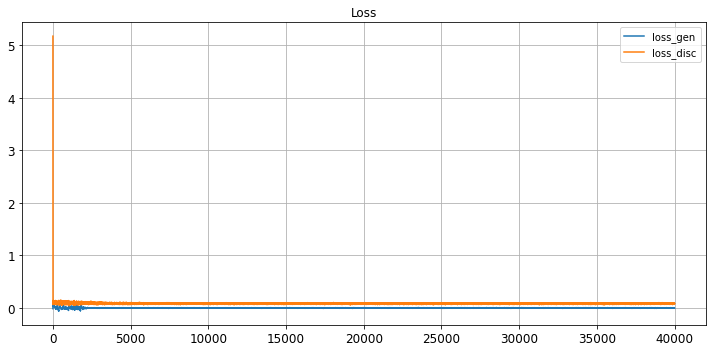

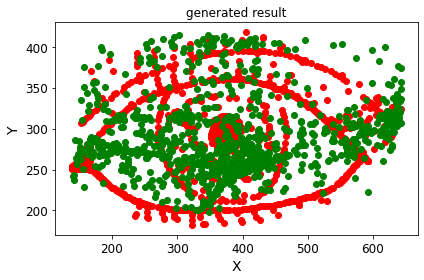

save the model & result
Epoch 40001/50000
critic: 0.081106 - generator: -0.004120 - 0s
Epoch 40002/50000
critic: 0.080931 - generator: -0.005247 - 0s
Epoch 40003/50000
critic: 0.091141 - generator: 0.000769 - 0s
Epoch 40004/50000
critic: 0.084077 - generator: -0.000872 - 0s
Epoch 40005/50000
critic: 0.073314 - generator: -0.003807 - 0s
Epoch 40006/50000
critic: 0.085971 - generator: -0.007607 - 0s
Epoch 40007/50000
critic: 0.085595 - generator: -0.000349 - 0s
Epoch 40008/50000
critic: 0.086838 - generator: -0.001212 - 0s
Epoch 40009/50000
critic: 0.075467 - generator: -0.002998 - 0s
Epoch 40010/50000
critic: 0.077104 - generator: -0.002966 - 0s
Epoch 40011/50000
critic: 0.089150 - generator: 0.000471 - 0s
Epoch 40012/50000
critic: 0.073703 - generator: 0.000221 - 0s
Epoch 40013/50000
critic: 0.087464 - generator: -0.001070 - 0s
Epoch 40014/50000
critic: 0.066396 - generator: -0.000462 - 0s
Epoch 40015/50000
critic: 0.088736 - generator: 0.004585 - 0s
Epoch 40016/50000
critic: 0.080984 

critic: 0.079853 - generator: 0.004810 - 0s
Epoch 40134/50000
critic: 0.081799 - generator: -0.001065 - 0s
Epoch 40135/50000
critic: 0.081655 - generator: -0.002808 - 0s
Epoch 40136/50000
critic: 0.084153 - generator: -0.000064 - 0s
Epoch 40137/50000
critic: 0.086213 - generator: -0.000978 - 0s
Epoch 40138/50000
critic: 0.076889 - generator: 0.003775 - 0s
Epoch 40139/50000
critic: 0.074013 - generator: 0.000985 - 0s
Epoch 40140/50000
critic: 0.074500 - generator: -0.002409 - 0s
Epoch 40141/50000
critic: 0.074342 - generator: -0.005368 - 0s
Epoch 40142/50000
critic: 0.073586 - generator: -0.002528 - 0s
Epoch 40143/50000
critic: 0.072405 - generator: 0.002155 - 0s
Epoch 40144/50000
critic: 0.089625 - generator: 0.005378 - 0s
Epoch 40145/50000
critic: 0.081071 - generator: 0.001659 - 0s
Epoch 40146/50000
critic: 0.075751 - generator: -0.003131 - 0s
Epoch 40147/50000
critic: 0.072425 - generator: 0.000721 - 0s
Epoch 40148/50000
critic: 0.082316 - generator: -0.000645 - 0s
Epoch 40149/50000

critic: 0.080554 - generator: -0.001873 - 0s
Epoch 40266/50000
critic: 0.077386 - generator: -0.001482 - 0s
Epoch 40267/50000
critic: 0.083258 - generator: -0.004750 - 0s
Epoch 40268/50000
critic: 0.080148 - generator: -0.000393 - 0s
Epoch 40269/50000
critic: 0.082860 - generator: -0.000285 - 0s
Epoch 40270/50000
critic: 0.083671 - generator: 0.002274 - 0s
Epoch 40271/50000
critic: 0.070102 - generator: 0.001580 - 0s
Epoch 40272/50000
critic: 0.083696 - generator: 0.000510 - 0s
Epoch 40273/50000
critic: 0.075129 - generator: -0.001133 - 0s
Epoch 40274/50000
critic: 0.072905 - generator: -0.001519 - 0s
Epoch 40275/50000
critic: 0.080353 - generator: 0.001175 - 0s
Epoch 40276/50000
critic: 0.081179 - generator: 0.000204 - 0s
Epoch 40277/50000
critic: 0.084831 - generator: 0.003384 - 0s
Epoch 40278/50000
critic: 0.072929 - generator: -0.000217 - 0s
Epoch 40279/50000
critic: 0.074870 - generator: -0.000514 - 0s
Epoch 40280/50000
critic: 0.073024 - generator: -0.001428 - 0s
Epoch 40281/5000

critic: 0.080325 - generator: -0.000136 - 0s
Epoch 40398/50000
critic: 0.081372 - generator: -0.005392 - 0s
Epoch 40399/50000
critic: 0.078074 - generator: 0.001913 - 0s
Epoch 40400/50000
critic: 0.083178 - generator: -0.000313 - 0s
Epoch 40401/50000
critic: 0.084062 - generator: 0.000438 - 0s
Epoch 40402/50000
critic: 0.082994 - generator: -0.000600 - 0s
Epoch 40403/50000
critic: 0.075608 - generator: -0.000107 - 0s
Epoch 40404/50000
critic: 0.079744 - generator: 0.000084 - 0s
Epoch 40405/50000
critic: 0.088644 - generator: -0.000918 - 0s
Epoch 40406/50000
critic: 0.078121 - generator: -0.003960 - 0s
Epoch 40407/50000
critic: 0.078265 - generator: -0.000700 - 0s
Epoch 40408/50000
critic: 0.072455 - generator: 0.001333 - 0s
Epoch 40409/50000
critic: 0.080292 - generator: -0.000136 - 0s
Epoch 40410/50000
critic: 0.077239 - generator: -0.000691 - 0s
Epoch 40411/50000
critic: 0.079994 - generator: -0.003339 - 0s
Epoch 40412/50000
critic: 0.081506 - generator: -0.002414 - 0s
Epoch 40413/50

critic: 0.082408 - generator: 0.005747 - 0s
Epoch 40530/50000
critic: 0.077381 - generator: 0.003193 - 0s
Epoch 40531/50000
critic: 0.081234 - generator: 0.001801 - 0s
Epoch 40532/50000
critic: 0.067574 - generator: 0.004533 - 0s
Epoch 40533/50000
critic: 0.075458 - generator: 0.001597 - 0s
Epoch 40534/50000
critic: 0.078633 - generator: -0.001386 - 0s
Epoch 40535/50000
critic: 0.083853 - generator: -0.001642 - 0s
Epoch 40536/50000
critic: 0.070449 - generator: -0.002920 - 0s
Epoch 40537/50000
critic: 0.072965 - generator: 0.000029 - 0s
Epoch 40538/50000
critic: 0.075837 - generator: 0.000321 - 0s
Epoch 40539/50000
critic: 0.077804 - generator: 0.000588 - 0s
Epoch 40540/50000
critic: 0.086156 - generator: 0.003673 - 0s
Epoch 40541/50000
critic: 0.082798 - generator: -0.000826 - 0s
Epoch 40542/50000
critic: 0.075047 - generator: 0.000473 - 0s
Epoch 40543/50000
critic: 0.077886 - generator: 0.001620 - 0s
Epoch 40544/50000
critic: 0.086084 - generator: -0.002044 - 0s
Epoch 40545/50000
cri

critic: 0.077788 - generator: -0.002125 - 0s
Epoch 40662/50000
critic: 0.082285 - generator: 0.000071 - 0s
Epoch 40663/50000
critic: 0.073187 - generator: -0.000756 - 0s
Epoch 40664/50000
critic: 0.088506 - generator: -0.003162 - 0s
Epoch 40665/50000
critic: 0.070085 - generator: 0.003724 - 0s
Epoch 40666/50000
critic: 0.091160 - generator: 0.001528 - 0s
Epoch 40667/50000
critic: 0.082332 - generator: 0.000014 - 0s
Epoch 40668/50000
critic: 0.084475 - generator: -0.004171 - 0s
Epoch 40669/50000
critic: 0.076206 - generator: -0.000298 - 0s
Epoch 40670/50000
critic: 0.072462 - generator: -0.001478 - 0s
Epoch 40671/50000
critic: 0.071914 - generator: 0.000820 - 0s
Epoch 40672/50000
critic: 0.078827 - generator: -0.001451 - 0s
Epoch 40673/50000
critic: 0.079075 - generator: 0.000456 - 0s
Epoch 40674/50000
critic: 0.079504 - generator: 0.003599 - 0s
Epoch 40675/50000
critic: 0.071912 - generator: 0.003739 - 0s
Epoch 40676/50000
critic: 0.075518 - generator: -0.000884 - 0s
Epoch 40677/50000


critic: 0.072502 - generator: 0.000011 - 0s
Epoch 40794/50000
critic: 0.081601 - generator: 0.000458 - 0s
Epoch 40795/50000
critic: 0.080094 - generator: -0.003219 - 0s
Epoch 40796/50000
critic: 0.085657 - generator: -0.000434 - 0s
Epoch 40797/50000
critic: 0.076557 - generator: -0.001936 - 0s
Epoch 40798/50000
critic: 0.085028 - generator: -0.001677 - 0s
Epoch 40799/50000
critic: 0.076050 - generator: 0.003072 - 0s
Epoch 40800/50000
critic: 0.086129 - generator: 0.001480 - 0s
Epoch 40801/50000
critic: 0.077852 - generator: -0.002880 - 0s
Epoch 40802/50000
critic: 0.088802 - generator: -0.003893 - 0s
Epoch 40803/50000
critic: 0.084460 - generator: -0.004423 - 0s
Epoch 40804/50000
critic: 0.078971 - generator: 0.006493 - 0s
Epoch 40805/50000
critic: 0.083256 - generator: -0.001922 - 0s
Epoch 40806/50000
critic: 0.071687 - generator: -0.001470 - 0s
Epoch 40807/50000
critic: 0.086149 - generator: -0.003938 - 0s
Epoch 40808/50000
critic: 0.080470 - generator: -0.002955 - 0s
Epoch 40809/500

critic: 0.071568 - generator: 0.003008 - 0s
Epoch 40926/50000
critic: 0.077460 - generator: 0.000070 - 0s
Epoch 40927/50000
critic: 0.078388 - generator: 0.001774 - 0s
Epoch 40928/50000
critic: 0.088268 - generator: -0.000659 - 0s
Epoch 40929/50000
critic: 0.071175 - generator: -0.002134 - 0s
Epoch 40930/50000
critic: 0.079285 - generator: 0.004074 - 0s
Epoch 40931/50000
critic: 0.081826 - generator: 0.000815 - 0s
Epoch 40932/50000
critic: 0.085913 - generator: 0.001295 - 0s
Epoch 40933/50000
critic: 0.087284 - generator: 0.000455 - 0s
Epoch 40934/50000
critic: 0.087172 - generator: 0.004334 - 0s
Epoch 40935/50000
critic: 0.081287 - generator: -0.000749 - 0s
Epoch 40936/50000
critic: 0.086780 - generator: -0.002314 - 0s
Epoch 40937/50000
critic: 0.085615 - generator: -0.001689 - 0s
Epoch 40938/50000
critic: 0.077858 - generator: -0.001997 - 0s
Epoch 40939/50000
critic: 0.084800 - generator: -0.001959 - 0s
Epoch 40940/50000
critic: 0.089116 - generator: -0.001285 - 0s
Epoch 40941/50000


critic: 0.088547 - generator: -0.003817 - 0s
Epoch 41058/50000
critic: 0.070481 - generator: -0.000501 - 0s
Epoch 41059/50000
critic: 0.078806 - generator: -0.001054 - 0s
Epoch 41060/50000
critic: 0.080212 - generator: -0.000737 - 0s
Epoch 41061/50000
critic: 0.071788 - generator: 0.001090 - 0s
Epoch 41062/50000
critic: 0.084576 - generator: 0.003374 - 0s
Epoch 41063/50000
critic: 0.084185 - generator: 0.001902 - 0s
Epoch 41064/50000
critic: 0.077318 - generator: 0.002350 - 0s
Epoch 41065/50000
critic: 0.080821 - generator: -0.000117 - 0s
Epoch 41066/50000
critic: 0.080131 - generator: 0.003845 - 0s
Epoch 41067/50000
critic: 0.080731 - generator: 0.003703 - 0s
Epoch 41068/50000
critic: 0.084095 - generator: 0.003101 - 0s
Epoch 41069/50000
critic: 0.087375 - generator: 0.004638 - 0s
Epoch 41070/50000
critic: 0.081818 - generator: -0.001736 - 0s
Epoch 41071/50000
critic: 0.084681 - generator: -0.001505 - 0s
Epoch 41072/50000
critic: 0.075926 - generator: 0.000376 - 0s
Epoch 41073/50000
c

critic: 0.067485 - generator: -0.000521 - 0s
Epoch 41190/50000
critic: 0.074538 - generator: -0.005928 - 0s
Epoch 41191/50000
critic: 0.085761 - generator: -0.003811 - 0s
Epoch 41192/50000
critic: 0.080535 - generator: 0.003434 - 0s
Epoch 41193/50000
critic: 0.085216 - generator: -0.001639 - 0s
Epoch 41194/50000
critic: 0.080909 - generator: 0.000835 - 0s
Epoch 41195/50000
critic: 0.080496 - generator: 0.001913 - 0s
Epoch 41196/50000
critic: 0.074796 - generator: -0.001773 - 0s
Epoch 41197/50000
critic: 0.090320 - generator: -0.003407 - 0s
Epoch 41198/50000
critic: 0.069888 - generator: -0.002724 - 0s
Epoch 41199/50000
critic: 0.074433 - generator: -0.000600 - 0s
Epoch 41200/50000
critic: 0.076654 - generator: 0.001127 - 0s
Epoch 41201/50000
critic: 0.074929 - generator: 0.000631 - 0s
Epoch 41202/50000
critic: 0.081312 - generator: -0.000166 - 0s
Epoch 41203/50000
critic: 0.095831 - generator: -0.001467 - 0s
Epoch 41204/50000
critic: 0.089671 - generator: 0.004872 - 0s
Epoch 41205/5000

critic: 0.082877 - generator: -0.002656 - 0s
Epoch 41322/50000
critic: 0.086867 - generator: 0.000661 - 0s
Epoch 41323/50000
critic: 0.095275 - generator: 0.000837 - 0s
Epoch 41324/50000
critic: 0.081788 - generator: -0.005118 - 0s
Epoch 41325/50000
critic: 0.082495 - generator: 0.003419 - 0s
Epoch 41326/50000
critic: 0.076493 - generator: 0.002034 - 0s
Epoch 41327/50000
critic: 0.083949 - generator: 0.001307 - 0s
Epoch 41328/50000
critic: 0.078053 - generator: 0.006195 - 0s
Epoch 41329/50000
critic: 0.081188 - generator: -0.001778 - 0s
Epoch 41330/50000
critic: 0.085574 - generator: -0.000071 - 0s
Epoch 41331/50000
critic: 0.083268 - generator: -0.002153 - 0s
Epoch 41332/50000
critic: 0.088273 - generator: -0.000778 - 0s
Epoch 41333/50000
critic: 0.073570 - generator: -0.000607 - 0s
Epoch 41334/50000
critic: 0.080791 - generator: -0.002746 - 0s
Epoch 41335/50000
critic: 0.071956 - generator: -0.000854 - 0s
Epoch 41336/50000
critic: 0.077495 - generator: -0.001551 - 0s
Epoch 41337/5000

critic: 0.081421 - generator: 0.000889 - 0s
Epoch 41454/50000
critic: 0.081186 - generator: 0.001156 - 0s
Epoch 41455/50000
critic: 0.076188 - generator: -0.002422 - 0s
Epoch 41456/50000
critic: 0.079930 - generator: -0.001013 - 0s
Epoch 41457/50000
critic: 0.083762 - generator: -0.001030 - 0s
Epoch 41458/50000
critic: 0.083941 - generator: -0.000293 - 0s
Epoch 41459/50000
critic: 0.081916 - generator: -0.001413 - 0s
Epoch 41460/50000
critic: 0.078824 - generator: 0.002993 - 0s
Epoch 41461/50000
critic: 0.086474 - generator: 0.000646 - 0s
Epoch 41462/50000
critic: 0.076086 - generator: -0.002111 - 0s
Epoch 41463/50000
critic: 0.082187 - generator: -0.001188 - 0s
Epoch 41464/50000
critic: 0.084404 - generator: 0.000923 - 0s
Epoch 41465/50000
critic: 0.082779 - generator: 0.005501 - 0s
Epoch 41466/50000
critic: 0.079873 - generator: 0.002472 - 0s
Epoch 41467/50000
critic: 0.077527 - generator: 0.001029 - 0s
Epoch 41468/50000
critic: 0.080464 - generator: -0.001190 - 0s
Epoch 41469/50000


critic: 0.080006 - generator: 0.003810 - 0s
Epoch 41586/50000
critic: 0.078064 - generator: 0.002368 - 0s
Epoch 41587/50000
critic: 0.087500 - generator: 0.000859 - 0s
Epoch 41588/50000
critic: 0.077166 - generator: -0.001681 - 0s
Epoch 41589/50000
critic: 0.083104 - generator: -0.000423 - 0s
Epoch 41590/50000
critic: 0.083351 - generator: -0.003942 - 0s
Epoch 41591/50000
critic: 0.078353 - generator: 0.000798 - 0s
Epoch 41592/50000
critic: 0.082513 - generator: 0.000391 - 0s
Epoch 41593/50000
critic: 0.079703 - generator: -0.000976 - 0s
Epoch 41594/50000
critic: 0.075139 - generator: 0.005609 - 0s
Epoch 41595/50000
critic: 0.074405 - generator: 0.005317 - 0s
Epoch 41596/50000
critic: 0.076519 - generator: -0.002724 - 0s
Epoch 41597/50000
critic: 0.085410 - generator: 0.002029 - 0s
Epoch 41598/50000
critic: 0.071935 - generator: 0.001823 - 0s
Epoch 41599/50000
critic: 0.088468 - generator: 0.004214 - 0s
Epoch 41600/50000
critic: 0.075081 - generator: 0.000451 - 0s
Epoch 41601/50000
cri

critic: 0.081263 - generator: -0.002741 - 0s
Epoch 41718/50000
critic: 0.085013 - generator: -0.002111 - 0s
Epoch 41719/50000
critic: 0.070305 - generator: 0.000253 - 0s
Epoch 41720/50000
critic: 0.075666 - generator: 0.002540 - 0s
Epoch 41721/50000
critic: 0.075149 - generator: 0.000253 - 0s
Epoch 41722/50000
critic: 0.077832 - generator: 0.000842 - 0s
Epoch 41723/50000
critic: 0.090511 - generator: -0.000173 - 0s
Epoch 41724/50000
critic: 0.084159 - generator: 0.000299 - 0s
Epoch 41725/50000
critic: 0.081871 - generator: -0.000502 - 0s
Epoch 41726/50000
critic: 0.075499 - generator: -0.002373 - 0s
Epoch 41727/50000
critic: 0.078612 - generator: 0.001435 - 0s
Epoch 41728/50000
critic: 0.072591 - generator: -0.002746 - 0s
Epoch 41729/50000
critic: 0.080115 - generator: -0.004768 - 0s
Epoch 41730/50000
critic: 0.076664 - generator: 0.000143 - 0s
Epoch 41731/50000
critic: 0.080547 - generator: 0.003210 - 0s
Epoch 41732/50000
critic: 0.079419 - generator: -0.000252 - 0s
Epoch 41733/50000


critic: 0.076388 - generator: -0.000905 - 0s
Epoch 41851/50000
critic: 0.086113 - generator: -0.001487 - 0s
Epoch 41852/50000
critic: 0.079880 - generator: 0.000981 - 0s
Epoch 41853/50000
critic: 0.073733 - generator: -0.001392 - 0s
Epoch 41854/50000
critic: 0.084790 - generator: 0.002152 - 0s
Epoch 41855/50000
critic: 0.080931 - generator: 0.002325 - 0s
Epoch 41856/50000
critic: 0.071634 - generator: 0.003132 - 0s
Epoch 41857/50000
critic: 0.086983 - generator: 0.001173 - 0s
Epoch 41858/50000
critic: 0.081616 - generator: -0.001320 - 0s
Epoch 41859/50000
critic: 0.073391 - generator: 0.000642 - 0s
Epoch 41860/50000
critic: 0.079415 - generator: 0.000376 - 0s
Epoch 41861/50000
critic: 0.084673 - generator: 0.000424 - 0s
Epoch 41862/50000
critic: 0.082820 - generator: -0.003656 - 0s
Epoch 41863/50000
critic: 0.082391 - generator: -0.000815 - 0s
Epoch 41864/50000
critic: 0.075298 - generator: -0.002521 - 0s
Epoch 41865/50000
critic: 0.072956 - generator: -0.000914 - 0s
Epoch 41866/50000


critic: 0.090860 - generator: -0.005482 - 0s
Epoch 41983/50000
critic: 0.086921 - generator: -0.001984 - 0s
Epoch 41984/50000
critic: 0.075887 - generator: 0.002565 - 0s
Epoch 41985/50000
critic: 0.081302 - generator: 0.002987 - 0s
Epoch 41986/50000
critic: 0.080437 - generator: -0.000842 - 0s
Epoch 41987/50000
critic: 0.079293 - generator: -0.005409 - 0s
Epoch 41988/50000
critic: 0.072765 - generator: -0.003318 - 0s
Epoch 41989/50000
critic: 0.084088 - generator: 0.001713 - 0s
Epoch 41990/50000
critic: 0.083693 - generator: -0.000337 - 0s
Epoch 41991/50000
critic: 0.079994 - generator: -0.000776 - 0s
Epoch 41992/50000
critic: 0.080244 - generator: -0.000647 - 0s
Epoch 41993/50000
critic: 0.075667 - generator: -0.003322 - 0s
Epoch 41994/50000
critic: 0.076936 - generator: 0.000909 - 0s
Epoch 41995/50000
critic: 0.090519 - generator: 0.002267 - 0s
Epoch 41996/50000
critic: 0.084165 - generator: 0.004509 - 0s
Epoch 41997/50000
critic: 0.080487 - generator: 0.000014 - 0s
Epoch 41998/50000

critic: 0.079767 - generator: 0.001236 - 0s
Epoch 42115/50000
critic: 0.078898 - generator: 0.002893 - 0s
Epoch 42116/50000
critic: 0.078334 - generator: -0.001308 - 0s
Epoch 42117/50000
critic: 0.072241 - generator: 0.001844 - 0s
Epoch 42118/50000
critic: 0.078130 - generator: 0.000132 - 0s
Epoch 42119/50000
critic: 0.074396 - generator: -0.000053 - 0s
Epoch 42120/50000
critic: 0.077552 - generator: 0.001569 - 0s
Epoch 42121/50000
critic: 0.079576 - generator: -0.005608 - 0s
Epoch 42122/50000
critic: 0.071302 - generator: -0.004583 - 0s
Epoch 42123/50000
critic: 0.078800 - generator: -0.002315 - 0s
Epoch 42124/50000
critic: 0.084464 - generator: 0.000198 - 0s
Epoch 42125/50000
critic: 0.079298 - generator: 0.001763 - 0s
Epoch 42126/50000
critic: 0.070729 - generator: 0.002034 - 0s
Epoch 42127/50000
critic: 0.080108 - generator: -0.002147 - 0s
Epoch 42128/50000
critic: 0.085099 - generator: -0.000867 - 0s
Epoch 42129/50000
critic: 0.078680 - generator: 0.004271 - 0s
Epoch 42130/50000
c

critic: 0.086121 - generator: -0.001508 - 0s
Epoch 42247/50000
critic: 0.074618 - generator: 0.001241 - 0s
Epoch 42248/50000
critic: 0.084952 - generator: -0.002828 - 0s
Epoch 42249/50000
critic: 0.080479 - generator: -0.005036 - 0s
Epoch 42250/50000
critic: 0.083837 - generator: -0.002783 - 0s
Epoch 42251/50000
critic: 0.079902 - generator: -0.001015 - 0s
Epoch 42252/50000
critic: 0.080795 - generator: 0.000541 - 0s
Epoch 42253/50000
critic: 0.077506 - generator: 0.001080 - 0s
Epoch 42254/50000
critic: 0.082996 - generator: -0.000139 - 0s
Epoch 42255/50000
critic: 0.082839 - generator: 0.000939 - 0s
Epoch 42256/50000
critic: 0.089654 - generator: 0.002781 - 0s
Epoch 42257/50000
critic: 0.080918 - generator: -0.001609 - 0s
Epoch 42258/50000
critic: 0.081069 - generator: 0.000561 - 0s
Epoch 42259/50000
critic: 0.089110 - generator: -0.001765 - 0s
Epoch 42260/50000
critic: 0.077504 - generator: -0.001901 - 0s
Epoch 42261/50000
critic: 0.080324 - generator: 0.000469 - 0s
Epoch 42262/50000

critic: 0.082408 - generator: -0.001247 - 0s
Epoch 42379/50000
critic: 0.084690 - generator: -0.001470 - 0s
Epoch 42380/50000
critic: 0.073246 - generator: -0.000803 - 0s
Epoch 42381/50000
critic: 0.081706 - generator: -0.005714 - 0s
Epoch 42382/50000
critic: 0.098369 - generator: -0.001967 - 0s
Epoch 42383/50000
critic: 0.078769 - generator: -0.002395 - 0s
Epoch 42384/50000
critic: 0.080905 - generator: -0.001022 - 0s
Epoch 42385/50000
critic: 0.080726 - generator: -0.001860 - 0s
Epoch 42386/50000
critic: 0.076638 - generator: 0.002868 - 0s
Epoch 42387/50000
critic: 0.076060 - generator: -0.000592 - 0s
Epoch 42388/50000
critic: 0.083801 - generator: -0.003652 - 0s
Epoch 42389/50000
critic: 0.082874 - generator: -0.000227 - 0s
Epoch 42390/50000
critic: 0.086708 - generator: 0.000594 - 0s
Epoch 42391/50000
critic: 0.087562 - generator: 0.001688 - 0s
Epoch 42392/50000
critic: 0.078607 - generator: 0.002179 - 0s
Epoch 42393/50000
critic: 0.080953 - generator: -0.000994 - 0s
Epoch 42394/50

critic: 0.073146 - generator: -0.001501 - 0s
Epoch 42511/50000
critic: 0.081923 - generator: -0.006310 - 0s
Epoch 42512/50000
critic: 0.082119 - generator: -0.000565 - 0s
Epoch 42513/50000
critic: 0.073145 - generator: 0.002230 - 0s
Epoch 42514/50000
critic: 0.090263 - generator: 0.002640 - 0s
Epoch 42515/50000
critic: 0.085180 - generator: 0.000159 - 0s
Epoch 42516/50000
critic: 0.080067 - generator: -0.000549 - 0s
Epoch 42517/50000
critic: 0.072720 - generator: -0.001756 - 0s
Epoch 42518/50000
critic: 0.074455 - generator: 0.000111 - 0s
Epoch 42519/50000
critic: 0.075124 - generator: -0.002451 - 0s
Epoch 42520/50000
critic: 0.073220 - generator: -0.002682 - 0s
Epoch 42521/50000
critic: 0.088113 - generator: -0.002841 - 0s
Epoch 42522/50000
critic: 0.068407 - generator: 0.001026 - 0s
Epoch 42523/50000
critic: 0.083328 - generator: -0.002042 - 0s
Epoch 42524/50000
critic: 0.087251 - generator: 0.002849 - 0s
Epoch 42525/50000
critic: 0.076243 - generator: 0.001298 - 0s
Epoch 42526/50000

critic: 0.078954 - generator: 0.001830 - 0s
Epoch 42643/50000
critic: 0.079199 - generator: -0.000400 - 0s
Epoch 42644/50000
critic: 0.088378 - generator: -0.000667 - 0s
Epoch 42645/50000
critic: 0.074929 - generator: 0.001917 - 0s
Epoch 42646/50000
critic: 0.085604 - generator: 0.000493 - 0s
Epoch 42647/50000
critic: 0.088241 - generator: -0.000696 - 0s
Epoch 42648/50000
critic: 0.080457 - generator: -0.002090 - 0s
Epoch 42649/50000
critic: 0.082244 - generator: 0.001094 - 0s
Epoch 42650/50000
critic: 0.072957 - generator: -0.001178 - 0s
Epoch 42651/50000
critic: 0.082041 - generator: -0.001982 - 0s
Epoch 42652/50000
critic: 0.071562 - generator: -0.004386 - 0s
Epoch 42653/50000
critic: 0.096475 - generator: -0.003749 - 0s
Epoch 42654/50000
critic: 0.078670 - generator: -0.000693 - 0s
Epoch 42655/50000
critic: 0.078484 - generator: -0.002989 - 0s
Epoch 42656/50000
critic: 0.083099 - generator: 0.000221 - 0s
Epoch 42657/50000
critic: 0.085964 - generator: 0.002034 - 0s
Epoch 42658/5000

critic: 0.076389 - generator: -0.002119 - 0s
Epoch 42776/50000
critic: 0.081748 - generator: 0.002214 - 0s
Epoch 42777/50000
critic: 0.075440 - generator: 0.001897 - 0s
Epoch 42778/50000
critic: 0.080278 - generator: 0.001682 - 0s
Epoch 42779/50000
critic: 0.084078 - generator: -0.001623 - 0s
Epoch 42780/50000
critic: 0.083516 - generator: 0.000035 - 0s
Epoch 42781/50000
critic: 0.075504 - generator: 0.001298 - 0s
Epoch 42782/50000
critic: 0.082860 - generator: 0.001807 - 0s
Epoch 42783/50000
critic: 0.069179 - generator: -0.002022 - 0s
Epoch 42784/50000
critic: 0.078162 - generator: 0.000551 - 0s
Epoch 42785/50000
critic: 0.077969 - generator: 0.004135 - 0s
Epoch 42786/50000
critic: 0.075273 - generator: -0.000523 - 0s
Epoch 42787/50000
critic: 0.074210 - generator: 0.002709 - 0s
Epoch 42788/50000
critic: 0.085899 - generator: 0.000056 - 0s
Epoch 42789/50000
critic: 0.084711 - generator: 0.001897 - 0s
Epoch 42790/50000
critic: 0.076908 - generator: 0.002076 - 0s
Epoch 42791/50000
crit

critic: 0.095184 - generator: 0.002071 - 0s
Epoch 42908/50000
critic: 0.083710 - generator: -0.002582 - 0s
Epoch 42909/50000
critic: 0.080494 - generator: -0.004014 - 0s
Epoch 42910/50000
critic: 0.088483 - generator: -0.002238 - 0s
Epoch 42911/50000
critic: 0.088947 - generator: 0.004738 - 0s
Epoch 42912/50000
critic: 0.088230 - generator: 0.001211 - 0s
Epoch 42913/50000
critic: 0.075149 - generator: -0.000155 - 0s
Epoch 42914/50000
critic: 0.085317 - generator: 0.000663 - 0s
Epoch 42915/50000
critic: 0.079238 - generator: 0.004233 - 0s
Epoch 42916/50000
critic: 0.073691 - generator: 0.002086 - 0s
Epoch 42917/50000
critic: 0.083643 - generator: -0.001621 - 0s
Epoch 42918/50000
critic: 0.073883 - generator: -0.001972 - 0s
Epoch 42919/50000
critic: 0.084654 - generator: 0.001005 - 0s
Epoch 42920/50000
critic: 0.080716 - generator: -0.002064 - 0s
Epoch 42921/50000
critic: 0.088801 - generator: -0.002086 - 0s
Epoch 42922/50000
critic: 0.072179 - generator: -0.002713 - 0s
Epoch 42923/50000

critic: 0.083952 - generator: -0.003756 - 0s
Epoch 43040/50000
critic: 0.086362 - generator: -0.001728 - 0s
Epoch 43041/50000
critic: 0.082077 - generator: -0.005070 - 0s
Epoch 43042/50000
critic: 0.077124 - generator: 0.000220 - 0s
Epoch 43043/50000
critic: 0.074962 - generator: -0.003223 - 0s
Epoch 43044/50000
critic: 0.086188 - generator: 0.002806 - 0s
Epoch 43045/50000
critic: 0.077210 - generator: -0.001782 - 0s
Epoch 43046/50000
critic: 0.090294 - generator: 0.002049 - 0s
Epoch 43047/50000
critic: 0.081813 - generator: -0.003681 - 0s
Epoch 43048/50000
critic: 0.076541 - generator: 0.000623 - 0s
Epoch 43049/50000
critic: 0.083365 - generator: -0.002693 - 0s
Epoch 43050/50000
critic: 0.076217 - generator: -0.003147 - 0s
Epoch 43051/50000
critic: 0.092497 - generator: 0.001318 - 0s
Epoch 43052/50000
critic: 0.073386 - generator: -0.002325 - 0s
Epoch 43053/50000
critic: 0.080704 - generator: 0.000375 - 0s
Epoch 43054/50000
critic: 0.082036 - generator: 0.002115 - 0s
Epoch 43055/50000

critic: 0.079640 - generator: 0.002501 - 0s
Epoch 43173/50000
critic: 0.087512 - generator: -0.001333 - 0s
Epoch 43174/50000
critic: 0.091370 - generator: -0.000456 - 0s
Epoch 43175/50000
critic: 0.078854 - generator: 0.000402 - 0s
Epoch 43176/50000
critic: 0.080812 - generator: 0.002009 - 0s
Epoch 43177/50000
critic: 0.078204 - generator: 0.000340 - 0s
Epoch 43178/50000
critic: 0.070114 - generator: 0.000928 - 0s
Epoch 43179/50000
critic: 0.075324 - generator: 0.000709 - 0s
Epoch 43180/50000
critic: 0.081765 - generator: 0.000385 - 0s
Epoch 43181/50000
critic: 0.081055 - generator: 0.000795 - 0s
Epoch 43182/50000
critic: 0.079738 - generator: 0.004175 - 0s
Epoch 43183/50000
critic: 0.071874 - generator: -0.000888 - 0s
Epoch 43184/50000
critic: 0.077198 - generator: -0.001634 - 0s
Epoch 43185/50000
critic: 0.088295 - generator: 0.001380 - 0s
Epoch 43186/50000
critic: 0.073981 - generator: -0.001254 - 0s
Epoch 43187/50000
critic: 0.084411 - generator: 0.000966 - 0s
Epoch 43188/50000
cri

critic: 0.086581 - generator: -0.001893 - 0s
Epoch 43305/50000
critic: 0.079445 - generator: 0.001714 - 0s
Epoch 43306/50000
critic: 0.074779 - generator: -0.002944 - 0s
Epoch 43307/50000
critic: 0.075070 - generator: -0.003354 - 0s
Epoch 43308/50000
critic: 0.084911 - generator: -0.003391 - 0s
Epoch 43309/50000
critic: 0.085897 - generator: 0.000679 - 0s
Epoch 43310/50000
critic: 0.083884 - generator: 0.002709 - 0s
Epoch 43311/50000
critic: 0.067573 - generator: -0.001203 - 0s
Epoch 43312/50000
critic: 0.083646 - generator: -0.001258 - 0s
Epoch 43313/50000
critic: 0.085343 - generator: -0.002993 - 0s
Epoch 43314/50000
critic: 0.084415 - generator: -0.000287 - 0s
Epoch 43315/50000
critic: 0.071916 - generator: 0.001335 - 0s
Epoch 43316/50000
critic: 0.078593 - generator: 0.003433 - 0s
Epoch 43317/50000
critic: 0.075636 - generator: -0.001839 - 0s
Epoch 43318/50000
critic: 0.088927 - generator: -0.002561 - 0s
Epoch 43319/50000
critic: 0.081275 - generator: -0.000395 - 0s
Epoch 43320/500

critic: 0.077080 - generator: -0.005901 - 0s
Epoch 43438/50000
critic: 0.077144 - generator: -0.000012 - 0s
Epoch 43439/50000
critic: 0.078407 - generator: -0.000677 - 0s
Epoch 43440/50000
critic: 0.071877 - generator: -0.000184 - 0s
Epoch 43441/50000
critic: 0.073345 - generator: -0.000670 - 0s
Epoch 43442/50000
critic: 0.074307 - generator: 0.001009 - 0s
Epoch 43443/50000
critic: 0.083225 - generator: -0.003567 - 0s
Epoch 43444/50000
critic: 0.079752 - generator: 0.000359 - 0s
Epoch 43445/50000
critic: 0.080635 - generator: 0.000063 - 0s
Epoch 43446/50000
critic: 0.082013 - generator: -0.001588 - 0s
Epoch 43447/50000
critic: 0.076960 - generator: 0.002176 - 0s
Epoch 43448/50000
critic: 0.075043 - generator: -0.000859 - 0s
Epoch 43449/50000
critic: 0.080823 - generator: 0.001925 - 0s
Epoch 43450/50000
critic: 0.074573 - generator: 0.002752 - 0s
Epoch 43451/50000
critic: 0.081600 - generator: 0.000882 - 0s
Epoch 43452/50000
critic: 0.075992 - generator: -0.004257 - 0s
Epoch 43453/50000

critic: 0.078862 - generator: -0.003993 - 0s
Epoch 43571/50000
critic: 0.076993 - generator: -0.005490 - 0s
Epoch 43572/50000
critic: 0.077599 - generator: 0.000214 - 0s
Epoch 43573/50000
critic: 0.075702 - generator: 0.002355 - 0s
Epoch 43574/50000
critic: 0.083610 - generator: 0.003167 - 0s
Epoch 43575/50000
critic: 0.072931 - generator: 0.000230 - 0s
Epoch 43576/50000
critic: 0.078104 - generator: 0.001041 - 0s
Epoch 43577/50000
critic: 0.089333 - generator: -0.000386 - 0s
Epoch 43578/50000
critic: 0.082056 - generator: -0.003067 - 0s
Epoch 43579/50000
critic: 0.076330 - generator: 0.002778 - 0s
Epoch 43580/50000
critic: 0.078170 - generator: 0.003554 - 0s
Epoch 43581/50000
critic: 0.084913 - generator: 0.001757 - 0s
Epoch 43582/50000
critic: 0.076823 - generator: -0.002888 - 0s
Epoch 43583/50000
critic: 0.088578 - generator: -0.003639 - 0s
Epoch 43584/50000
critic: 0.081813 - generator: 0.000017 - 0s
Epoch 43585/50000
critic: 0.074515 - generator: 0.001305 - 0s
Epoch 43586/50000
cr

critic: 0.070665 - generator: 0.000291 - 0s
Epoch 43703/50000
critic: 0.082737 - generator: 0.003753 - 0s
Epoch 43704/50000
critic: 0.078236 - generator: 0.000616 - 0s
Epoch 43705/50000
critic: 0.077925 - generator: 0.001315 - 0s
Epoch 43706/50000
critic: 0.074948 - generator: 0.001492 - 0s
Epoch 43707/50000
critic: 0.073280 - generator: 0.006002 - 0s
Epoch 43708/50000
critic: 0.081622 - generator: -0.000606 - 0s
Epoch 43709/50000
critic: 0.086293 - generator: -0.000292 - 0s
Epoch 43710/50000
critic: 0.077561 - generator: 0.000401 - 0s
Epoch 43711/50000
critic: 0.081562 - generator: 0.000464 - 0s
Epoch 43712/50000
critic: 0.081525 - generator: 0.002927 - 0s
Epoch 43713/50000
critic: 0.075097 - generator: 0.000261 - 0s
Epoch 43714/50000
critic: 0.081765 - generator: 0.002329 - 0s
Epoch 43715/50000
critic: 0.083353 - generator: -0.000173 - 0s
Epoch 43716/50000
critic: 0.086321 - generator: 0.000190 - 0s
Epoch 43717/50000
critic: 0.089295 - generator: 0.001805 - 0s
Epoch 43718/50000
criti

critic: 0.078091 - generator: 0.001092 - 0s
Epoch 43836/50000
critic: 0.075921 - generator: 0.000622 - 0s
Epoch 43837/50000
critic: 0.078787 - generator: 0.002352 - 0s
Epoch 43838/50000
critic: 0.078205 - generator: 0.000331 - 0s
Epoch 43839/50000
critic: 0.079622 - generator: 0.002088 - 0s
Epoch 43840/50000
critic: 0.080798 - generator: -0.001558 - 0s
Epoch 43841/50000
critic: 0.074008 - generator: -0.003066 - 0s
Epoch 43842/50000
critic: 0.083778 - generator: -0.003730 - 0s
Epoch 43843/50000
critic: 0.083789 - generator: 0.001555 - 0s
Epoch 43844/50000
critic: 0.081146 - generator: 0.003056 - 0s
Epoch 43845/50000
critic: 0.076346 - generator: -0.000874 - 0s
Epoch 43846/50000
critic: 0.084000 - generator: 0.003751 - 0s
Epoch 43847/50000
critic: 0.077482 - generator: 0.000128 - 0s
Epoch 43848/50000
critic: 0.072015 - generator: -0.001687 - 0s
Epoch 43849/50000
critic: 0.072821 - generator: -0.001218 - 0s
Epoch 43850/50000
critic: 0.084827 - generator: -0.004279 - 0s
Epoch 43851/50000
c

critic: 0.071034 - generator: 0.002198 - 0s
Epoch 43968/50000
critic: 0.085728 - generator: -0.001144 - 0s
Epoch 43969/50000
critic: 0.079489 - generator: 0.002081 - 0s
Epoch 43970/50000
critic: 0.076457 - generator: 0.002473 - 0s
Epoch 43971/50000
critic: 0.080744 - generator: -0.000085 - 0s
Epoch 43972/50000
critic: 0.075729 - generator: 0.000045 - 0s
Epoch 43973/50000
critic: 0.081404 - generator: -0.001303 - 0s
Epoch 43974/50000
critic: 0.077138 - generator: -0.001598 - 0s
Epoch 43975/50000
critic: 0.075363 - generator: -0.002239 - 0s
Epoch 43976/50000
critic: 0.074094 - generator: -0.000944 - 0s
Epoch 43977/50000
critic: 0.091280 - generator: 0.002235 - 0s
Epoch 43978/50000
critic: 0.082267 - generator: 0.001255 - 0s
Epoch 43979/50000
critic: 0.071327 - generator: 0.000109 - 0s
Epoch 43980/50000
critic: 0.080989 - generator: -0.001287 - 0s
Epoch 43981/50000
critic: 0.082155 - generator: 0.001480 - 0s
Epoch 43982/50000
critic: 0.076572 - generator: -0.000419 - 0s
Epoch 43983/50000


critic: 0.077512 - generator: 0.000567 - 0s
Epoch 44100/50000
critic: 0.082124 - generator: -0.000766 - 0s
Epoch 44101/50000
critic: 0.071185 - generator: -0.001372 - 0s
Epoch 44102/50000
critic: 0.076383 - generator: -0.002523 - 0s
Epoch 44103/50000
critic: 0.074661 - generator: -0.000182 - 0s
Epoch 44104/50000
critic: 0.076669 - generator: 0.001469 - 0s
Epoch 44105/50000
critic: 0.070162 - generator: -0.002700 - 0s
Epoch 44106/50000
critic: 0.077284 - generator: 0.001283 - 0s
Epoch 44107/50000
critic: 0.089922 - generator: 0.000335 - 0s
Epoch 44108/50000
critic: 0.078340 - generator: 0.001871 - 0s
Epoch 44109/50000
critic: 0.074282 - generator: 0.002444 - 0s
Epoch 44110/50000
critic: 0.086005 - generator: -0.000221 - 0s
Epoch 44111/50000
critic: 0.079457 - generator: 0.001122 - 0s
Epoch 44112/50000
critic: 0.079097 - generator: 0.000747 - 0s
Epoch 44113/50000
critic: 0.083675 - generator: -0.000931 - 0s
Epoch 44114/50000
critic: 0.080788 - generator: -0.003372 - 0s
Epoch 44115/50000


critic: 0.079182 - generator: 0.000266 - 0s
Epoch 44232/50000
critic: 0.078899 - generator: -0.001021 - 0s
Epoch 44233/50000
critic: 0.079511 - generator: 0.000897 - 0s
Epoch 44234/50000
critic: 0.083747 - generator: -0.001496 - 0s
Epoch 44235/50000
critic: 0.076371 - generator: 0.001179 - 0s
Epoch 44236/50000
critic: 0.086383 - generator: -0.002671 - 0s
Epoch 44237/50000
critic: 0.078911 - generator: -0.001713 - 0s
Epoch 44238/50000
critic: 0.081116 - generator: 0.001838 - 0s
Epoch 44239/50000
critic: 0.071678 - generator: 0.003548 - 0s
Epoch 44240/50000
critic: 0.075562 - generator: -0.001624 - 0s
Epoch 44241/50000
critic: 0.076480 - generator: -0.002176 - 0s
Epoch 44242/50000
critic: 0.084345 - generator: 0.003544 - 0s
Epoch 44243/50000
critic: 0.089893 - generator: -0.005547 - 0s
Epoch 44244/50000
critic: 0.075426 - generator: -0.000742 - 0s
Epoch 44245/50000
critic: 0.101120 - generator: -0.003635 - 0s
Epoch 44246/50000
critic: 0.084830 - generator: -0.000780 - 0s
Epoch 44247/5000

critic: 0.087036 - generator: -0.003865 - 0s
Epoch 44364/50000
critic: 0.080026 - generator: -0.003266 - 0s
Epoch 44365/50000
critic: 0.087638 - generator: 0.001100 - 0s
Epoch 44366/50000
critic: 0.081506 - generator: 0.004791 - 0s
Epoch 44367/50000
critic: 0.089218 - generator: 0.000085 - 0s
Epoch 44368/50000
critic: 0.083614 - generator: -0.001509 - 0s
Epoch 44369/50000
critic: 0.079542 - generator: 0.002348 - 0s
Epoch 44370/50000
critic: 0.078856 - generator: 0.002060 - 0s
Epoch 44371/50000
critic: 0.077395 - generator: 0.003446 - 0s
Epoch 44372/50000
critic: 0.083519 - generator: -0.000695 - 0s
Epoch 44373/50000
critic: 0.076736 - generator: 0.000427 - 0s
Epoch 44374/50000
critic: 0.084106 - generator: -0.001047 - 0s
Epoch 44375/50000
critic: 0.075664 - generator: 0.001100 - 0s
Epoch 44376/50000
critic: 0.085884 - generator: -0.002527 - 0s
Epoch 44377/50000
critic: 0.081268 - generator: 0.005120 - 0s
Epoch 44378/50000
critic: 0.072928 - generator: 0.002328 - 0s
Epoch 44379/50000
cr

critic: 0.074599 - generator: 0.003802 - 0s
Epoch 44496/50000
critic: 0.085386 - generator: 0.002161 - 0s
Epoch 44497/50000
critic: 0.080714 - generator: -0.005392 - 0s
Epoch 44498/50000
critic: 0.083324 - generator: -0.002198 - 0s
Epoch 44499/50000
critic: 0.081595 - generator: -0.005782 - 0s
Epoch 44500/50000
critic: 0.091244 - generator: 0.007049 - 0s
Epoch 44501/50000
critic: 0.073746 - generator: -0.000334 - 0s
Epoch 44502/50000
critic: 0.083417 - generator: -0.002869 - 0s
Epoch 44503/50000
critic: 0.080552 - generator: -0.001781 - 0s
Epoch 44504/50000
critic: 0.073899 - generator: -0.002383 - 0s
Epoch 44505/50000
critic: 0.081043 - generator: 0.001582 - 0s
Epoch 44506/50000
critic: 0.082185 - generator: -0.002894 - 0s
Epoch 44507/50000
critic: 0.088956 - generator: -0.001455 - 0s
Epoch 44508/50000
critic: 0.077764 - generator: 0.001069 - 0s
Epoch 44509/50000
critic: 0.075572 - generator: 0.000548 - 0s
Epoch 44510/50000
critic: 0.078628 - generator: -0.002647 - 0s
Epoch 44511/5000

critic: 0.077496 - generator: -0.001195 - 0s
Epoch 44628/50000
critic: 0.087810 - generator: -0.002785 - 0s
Epoch 44629/50000
critic: 0.074481 - generator: -0.000935 - 0s
Epoch 44630/50000
critic: 0.084157 - generator: -0.000894 - 0s
Epoch 44631/50000
critic: 0.081836 - generator: -0.000581 - 0s
Epoch 44632/50000
critic: 0.083164 - generator: 0.002027 - 0s
Epoch 44633/50000
critic: 0.078915 - generator: -0.000126 - 0s
Epoch 44634/50000
critic: 0.075960 - generator: 0.000543 - 0s
Epoch 44635/50000
critic: 0.080065 - generator: 0.004485 - 0s
Epoch 44636/50000
critic: 0.079713 - generator: -0.000769 - 0s
Epoch 44637/50000
critic: 0.077837 - generator: 0.001262 - 0s
Epoch 44638/50000
critic: 0.078345 - generator: 0.002223 - 0s
Epoch 44639/50000
critic: 0.076070 - generator: -0.003457 - 0s
Epoch 44640/50000
critic: 0.077807 - generator: 0.001905 - 0s
Epoch 44641/50000
critic: 0.081741 - generator: -0.002001 - 0s
Epoch 44642/50000
critic: 0.091745 - generator: -0.001960 - 0s
Epoch 44643/5000

critic: 0.085258 - generator: -0.002471 - 0s
Epoch 44760/50000
critic: 0.085871 - generator: -0.003249 - 0s
Epoch 44761/50000
critic: 0.080072 - generator: -0.000068 - 0s
Epoch 44762/50000
critic: 0.083387 - generator: 0.000242 - 0s
Epoch 44763/50000
critic: 0.082650 - generator: -0.005198 - 0s
Epoch 44764/50000
critic: 0.089017 - generator: 0.002261 - 0s
Epoch 44765/50000
critic: 0.078019 - generator: 0.002609 - 0s
Epoch 44766/50000
critic: 0.083850 - generator: 0.001385 - 0s
Epoch 44767/50000
critic: 0.090315 - generator: 0.000310 - 0s
Epoch 44768/50000
critic: 0.077759 - generator: 0.000230 - 0s
Epoch 44769/50000
critic: 0.079184 - generator: 0.000580 - 0s
Epoch 44770/50000
critic: 0.074527 - generator: -0.000642 - 0s
Epoch 44771/50000
critic: 0.082124 - generator: 0.003339 - 0s
Epoch 44772/50000
critic: 0.080990 - generator: -0.001456 - 0s
Epoch 44773/50000
critic: 0.068134 - generator: -0.004519 - 0s
Epoch 44774/50000
critic: 0.095119 - generator: -0.003568 - 0s
Epoch 44775/50000


critic: 0.092191 - generator: -0.001873 - 0s
Epoch 44892/50000
critic: 0.086319 - generator: 0.001627 - 0s
Epoch 44893/50000
critic: 0.074462 - generator: -0.001435 - 0s
Epoch 44894/50000
critic: 0.082474 - generator: -0.001293 - 0s
Epoch 44895/50000
critic: 0.073250 - generator: -0.006093 - 0s
Epoch 44896/50000
critic: 0.084078 - generator: -0.000061 - 0s
Epoch 44897/50000
critic: 0.078984 - generator: 0.007229 - 0s
Epoch 44898/50000
critic: 0.080739 - generator: -0.003984 - 0s
Epoch 44899/50000
critic: 0.078487 - generator: 0.000168 - 0s
Epoch 44900/50000
critic: 0.080616 - generator: -0.003180 - 0s
Epoch 44901/50000
critic: 0.073834 - generator: -0.000394 - 0s
Epoch 44902/50000
critic: 0.080563 - generator: 0.002107 - 0s
Epoch 44903/50000
critic: 0.079704 - generator: 0.002857 - 0s
Epoch 44904/50000
critic: 0.075786 - generator: -0.000772 - 0s
Epoch 44905/50000
critic: 0.093354 - generator: -0.001143 - 0s
Epoch 44906/50000
critic: 0.086410 - generator: 0.001168 - 0s
Epoch 44907/5000

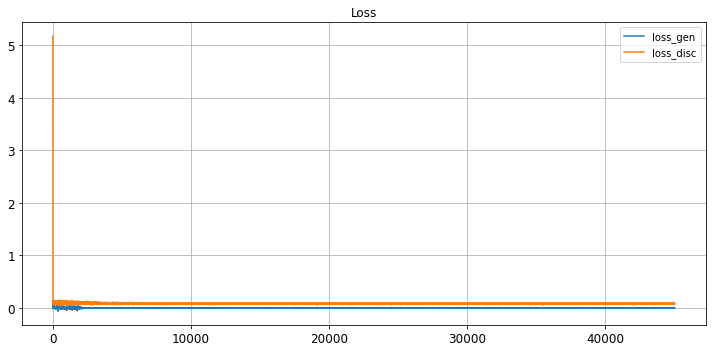

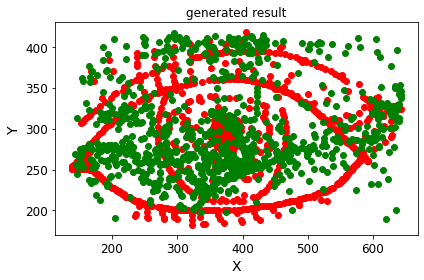

save the model & result
Epoch 45001/50000
critic: 0.091509 - generator: -0.000724 - 0s
Epoch 45002/50000
critic: 0.076093 - generator: 0.002088 - 0s
Epoch 45003/50000
critic: 0.076788 - generator: 0.002569 - 0s
Epoch 45004/50000
critic: 0.088970 - generator: 0.001774 - 0s
Epoch 45005/50000
critic: 0.080066 - generator: -0.000114 - 0s
Epoch 45006/50000
critic: 0.083655 - generator: -0.000350 - 0s
Epoch 45007/50000
critic: 0.079679 - generator: 0.000479 - 0s
Epoch 45008/50000
critic: 0.083048 - generator: -0.000673 - 0s
Epoch 45009/50000
critic: 0.086102 - generator: 0.000625 - 0s
Epoch 45010/50000
critic: 0.075290 - generator: -0.003263 - 0s
Epoch 45011/50000
critic: 0.087493 - generator: 0.000393 - 0s
Epoch 45012/50000
critic: 0.082243 - generator: -0.000446 - 0s
Epoch 45013/50000
critic: 0.073177 - generator: -0.000791 - 0s
Epoch 45014/50000
critic: 0.076613 - generator: -0.004221 - 0s
Epoch 45015/50000
critic: 0.075152 - generator: -0.002185 - 0s
Epoch 45016/50000
critic: 0.083503 - 

critic: 0.084172 - generator: 0.000008 - 0s
Epoch 45134/50000
critic: 0.078332 - generator: -0.001008 - 0s
Epoch 45135/50000
critic: 0.075572 - generator: -0.002221 - 0s
Epoch 45136/50000
critic: 0.080014 - generator: -0.001170 - 0s
Epoch 45137/50000
critic: 0.085164 - generator: 0.003162 - 0s
Epoch 45138/50000
critic: 0.086663 - generator: 0.001059 - 0s
Epoch 45139/50000
critic: 0.088853 - generator: -0.001251 - 0s
Epoch 45140/50000
critic: 0.083842 - generator: -0.000468 - 0s
Epoch 45141/50000
critic: 0.081135 - generator: -0.000569 - 0s
Epoch 45142/50000
critic: 0.081040 - generator: -0.001602 - 0s
Epoch 45143/50000
critic: 0.078771 - generator: -0.005557 - 0s
Epoch 45144/50000
critic: 0.083037 - generator: -0.001754 - 0s
Epoch 45145/50000
critic: 0.085139 - generator: -0.001335 - 0s
Epoch 45146/50000
critic: 0.078645 - generator: -0.000822 - 0s
Epoch 45147/50000
critic: 0.081685 - generator: -0.003683 - 0s
Epoch 45148/50000
critic: 0.074248 - generator: 0.002201 - 0s
Epoch 45149/50

critic: 0.073857 - generator: 0.001002 - 0s
Epoch 45266/50000
critic: 0.077250 - generator: 0.001637 - 0s
Epoch 45267/50000
critic: 0.088886 - generator: -0.001009 - 0s
Epoch 45268/50000
critic: 0.077249 - generator: 0.002682 - 0s
Epoch 45269/50000
critic: 0.075522 - generator: 0.001834 - 0s
Epoch 45270/50000
critic: 0.065329 - generator: -0.000727 - 0s
Epoch 45271/50000
critic: 0.091687 - generator: -0.000905 - 0s
Epoch 45272/50000
critic: 0.086766 - generator: -0.001752 - 0s
Epoch 45273/50000
critic: 0.081653 - generator: -0.001444 - 0s
Epoch 45274/50000
critic: 0.077969 - generator: -0.000693 - 0s
Epoch 45275/50000
critic: 0.082062 - generator: 0.000559 - 0s
Epoch 45276/50000
critic: 0.074575 - generator: 0.002234 - 0s
Epoch 45277/50000
critic: 0.096378 - generator: 0.000079 - 0s
Epoch 45278/50000
critic: 0.081193 - generator: -0.002043 - 0s
Epoch 45279/50000
critic: 0.083438 - generator: 0.003205 - 0s
Epoch 45280/50000
critic: 0.085265 - generator: 0.002123 - 0s
Epoch 45281/50000
c

critic: 0.091261 - generator: -0.001410 - 0s
Epoch 45398/50000
critic: 0.079029 - generator: -0.000566 - 0s
Epoch 45399/50000
critic: 0.075302 - generator: -0.002796 - 0s
Epoch 45400/50000
critic: 0.086258 - generator: 0.000090 - 0s
Epoch 45401/50000
critic: 0.077396 - generator: 0.002909 - 0s
Epoch 45402/50000
critic: 0.085186 - generator: -0.000750 - 0s
Epoch 45403/50000
critic: 0.078006 - generator: -0.001019 - 0s
Epoch 45404/50000
critic: 0.078075 - generator: 0.004072 - 0s
Epoch 45405/50000
critic: 0.090546 - generator: 0.002533 - 0s
Epoch 45406/50000
critic: 0.072742 - generator: 0.005301 - 0s
Epoch 45407/50000
critic: 0.079532 - generator: 0.000963 - 0s
Epoch 45408/50000
critic: 0.078036 - generator: -0.000942 - 0s
Epoch 45409/50000
critic: 0.071107 - generator: -0.000193 - 0s
Epoch 45410/50000
critic: 0.073147 - generator: -0.003330 - 0s
Epoch 45411/50000
critic: 0.073615 - generator: 0.001006 - 0s
Epoch 45412/50000
critic: 0.084731 - generator: 0.000419 - 0s
Epoch 45413/50000


critic: 0.083409 - generator: 0.003026 - 0s
Epoch 45530/50000
critic: 0.068887 - generator: 0.001725 - 0s
Epoch 45531/50000
critic: 0.083249 - generator: 0.005708 - 0s
Epoch 45532/50000
critic: 0.071810 - generator: 0.001964 - 0s
Epoch 45533/50000
critic: 0.082058 - generator: -0.000681 - 0s
Epoch 45534/50000
critic: 0.081571 - generator: -0.000683 - 0s
Epoch 45535/50000
critic: 0.074829 - generator: -0.002972 - 0s
Epoch 45536/50000
critic: 0.080518 - generator: -0.001970 - 0s
Epoch 45537/50000
critic: 0.077217 - generator: -0.001752 - 0s
Epoch 45538/50000
critic: 0.081753 - generator: -0.001784 - 0s
Epoch 45539/50000
critic: 0.075135 - generator: 0.004458 - 0s
Epoch 45540/50000
critic: 0.075241 - generator: 0.003803 - 0s
Epoch 45541/50000
critic: 0.084183 - generator: 0.000899 - 0s
Epoch 45542/50000
critic: 0.075142 - generator: -0.002544 - 0s
Epoch 45543/50000
critic: 0.084200 - generator: -0.000626 - 0s
Epoch 45544/50000
critic: 0.087323 - generator: 0.001900 - 0s
Epoch 45545/50000


critic: 0.085156 - generator: -0.001080 - 0s
Epoch 45662/50000
critic: 0.078578 - generator: 0.000248 - 0s
Epoch 45663/50000
critic: 0.071389 - generator: -0.000910 - 0s
Epoch 45664/50000
critic: 0.073531 - generator: -0.004780 - 0s
Epoch 45665/50000
critic: 0.072383 - generator: -0.002267 - 0s
Epoch 45666/50000
critic: 0.087079 - generator: -0.000787 - 0s
Epoch 45667/50000
critic: 0.071844 - generator: -0.003026 - 0s
Epoch 45668/50000
critic: 0.077199 - generator: -0.002361 - 0s
Epoch 45669/50000
critic: 0.075606 - generator: -0.000973 - 0s
Epoch 45670/50000
critic: 0.079274 - generator: 0.003635 - 0s
Epoch 45671/50000
critic: 0.079277 - generator: 0.000503 - 0s
Epoch 45672/50000
critic: 0.086569 - generator: -0.000303 - 0s
Epoch 45673/50000
critic: 0.079259 - generator: -0.000732 - 0s
Epoch 45674/50000
critic: 0.086421 - generator: 0.000071 - 0s
Epoch 45675/50000
critic: 0.080355 - generator: -0.003056 - 0s
Epoch 45676/50000
critic: 0.084764 - generator: -0.005700 - 0s
Epoch 45677/50

critic: 0.089803 - generator: 0.001148 - 0s
Epoch 45794/50000
critic: 0.081867 - generator: 0.000488 - 0s
Epoch 45795/50000
critic: 0.080411 - generator: -0.000477 - 0s
Epoch 45796/50000
critic: 0.078724 - generator: -0.001672 - 0s
Epoch 45797/50000
critic: 0.085422 - generator: -0.001381 - 0s
Epoch 45798/50000
critic: 0.075143 - generator: -0.001463 - 0s
Epoch 45799/50000
critic: 0.079421 - generator: 0.001297 - 0s
Epoch 45800/50000
critic: 0.086864 - generator: -0.001867 - 0s
Epoch 45801/50000
critic: 0.075923 - generator: 0.001340 - 0s
Epoch 45802/50000
critic: 0.068504 - generator: -0.007215 - 0s
Epoch 45803/50000
critic: 0.081338 - generator: -0.003907 - 0s
Epoch 45804/50000
critic: 0.079862 - generator: 0.001590 - 0s
Epoch 45805/50000
critic: 0.064274 - generator: 0.001306 - 0s
Epoch 45806/50000
critic: 0.081310 - generator: 0.005163 - 0s
Epoch 45807/50000
critic: 0.070824 - generator: -0.001090 - 0s
Epoch 45808/50000
critic: 0.081973 - generator: -0.003827 - 0s
Epoch 45809/50000

critic: 0.081230 - generator: 0.000777 - 0s
Epoch 45926/50000
critic: 0.076789 - generator: -0.000984 - 0s
Epoch 45927/50000
critic: 0.079911 - generator: -0.000943 - 0s
Epoch 45928/50000
critic: 0.079325 - generator: 0.003467 - 0s
Epoch 45929/50000
critic: 0.083692 - generator: 0.000647 - 0s
Epoch 45930/50000
critic: 0.075753 - generator: -0.001261 - 0s
Epoch 45931/50000
critic: 0.085038 - generator: -0.000447 - 0s
Epoch 45932/50000
critic: 0.076202 - generator: 0.002597 - 0s
Epoch 45933/50000
critic: 0.079810 - generator: 0.000280 - 0s
Epoch 45934/50000
critic: 0.078474 - generator: 0.003080 - 0s
Epoch 45935/50000
critic: 0.080628 - generator: 0.000927 - 0s
Epoch 45936/50000
critic: 0.082244 - generator: 0.000616 - 0s
Epoch 45937/50000
critic: 0.073377 - generator: 0.000733 - 0s
Epoch 45938/50000
critic: 0.083582 - generator: 0.000236 - 0s
Epoch 45939/50000
critic: 0.085007 - generator: -0.004116 - 0s
Epoch 45940/50000
critic: 0.071852 - generator: 0.005762 - 0s
Epoch 45941/50000
cri

critic: 0.084979 - generator: 0.000780 - 0s
Epoch 46059/50000
critic: 0.078164 - generator: 0.001463 - 0s
Epoch 46060/50000
critic: 0.073213 - generator: -0.001896 - 0s
Epoch 46061/50000
critic: 0.074816 - generator: 0.001918 - 0s
Epoch 46062/50000
critic: 0.079849 - generator: -0.001069 - 0s
Epoch 46063/50000
critic: 0.074700 - generator: -0.000786 - 0s
Epoch 46064/50000
critic: 0.069839 - generator: -0.001849 - 0s
Epoch 46065/50000
critic: 0.082859 - generator: 0.000437 - 0s
Epoch 46066/50000
critic: 0.086433 - generator: -0.001749 - 0s
Epoch 46067/50000
critic: 0.081558 - generator: 0.002157 - 0s
Epoch 46068/50000
critic: 0.077761 - generator: 0.001610 - 0s
Epoch 46069/50000
critic: 0.083881 - generator: -0.001505 - 0s
Epoch 46070/50000
critic: 0.084241 - generator: 0.001164 - 0s
Epoch 46071/50000
critic: 0.080691 - generator: -0.002431 - 0s
Epoch 46072/50000
critic: 0.085360 - generator: 0.000686 - 0s
Epoch 46073/50000
critic: 0.082324 - generator: 0.000364 - 0s
Epoch 46074/50000
c

critic: 0.073188 - generator: 0.000255 - 0s
Epoch 46191/50000
critic: 0.077359 - generator: 0.000004 - 0s
Epoch 46192/50000
critic: 0.072244 - generator: 0.000435 - 0s
Epoch 46193/50000
critic: 0.074701 - generator: 0.001298 - 0s
Epoch 46194/50000
critic: 0.087294 - generator: -0.000056 - 0s
Epoch 46195/50000
critic: 0.078540 - generator: -0.001431 - 0s
Epoch 46196/50000
critic: 0.066947 - generator: -0.000181 - 0s
Epoch 46197/50000
critic: 0.075731 - generator: 0.000967 - 0s
Epoch 46198/50000
critic: 0.078736 - generator: -0.000295 - 0s
Epoch 46199/50000
critic: 0.082435 - generator: 0.002589 - 0s
Epoch 46200/50000
critic: 0.081405 - generator: 0.002065 - 0s
Epoch 46201/50000
critic: 0.081072 - generator: 0.000285 - 0s
Epoch 46202/50000
critic: 0.077367 - generator: 0.000374 - 0s
Epoch 46203/50000
critic: 0.081367 - generator: 0.003122 - 0s
Epoch 46204/50000
critic: 0.082539 - generator: 0.000926 - 0s
Epoch 46205/50000
critic: 0.080380 - generator: 0.000216 - 0s
Epoch 46206/50000
crit

critic: 0.082512 - generator: -0.000034 - 0s
Epoch 46323/50000
critic: 0.089218 - generator: 0.000011 - 0s
Epoch 46324/50000
critic: 0.078973 - generator: -0.002058 - 0s
Epoch 46325/50000
critic: 0.079278 - generator: -0.000058 - 0s
Epoch 46326/50000
critic: 0.068161 - generator: 0.002418 - 0s
Epoch 46327/50000
critic: 0.079576 - generator: 0.002559 - 0s
Epoch 46328/50000
critic: 0.078924 - generator: -0.000413 - 0s
Epoch 46329/50000
critic: 0.075182 - generator: 0.004016 - 0s
Epoch 46330/50000
critic: 0.084214 - generator: 0.005498 - 0s
Epoch 46331/50000
critic: 0.079032 - generator: 0.002111 - 0s
Epoch 46332/50000
critic: 0.081208 - generator: 0.002164 - 0s
Epoch 46333/50000
critic: 0.085580 - generator: -0.000622 - 0s
Epoch 46334/50000
critic: 0.077392 - generator: -0.004574 - 0s
Epoch 46335/50000
critic: 0.074851 - generator: -0.003313 - 0s
Epoch 46336/50000
critic: 0.077881 - generator: 0.000063 - 0s
Epoch 46337/50000
critic: 0.078679 - generator: -0.001093 - 0s
Epoch 46338/50000


critic: 0.076067 - generator: -0.000350 - 0s
Epoch 46456/50000
critic: 0.085042 - generator: 0.003747 - 0s
Epoch 46457/50000
critic: 0.078575 - generator: 0.000290 - 0s
Epoch 46458/50000
critic: 0.075946 - generator: -0.001571 - 0s
Epoch 46459/50000
critic: 0.085899 - generator: -0.001213 - 0s
Epoch 46460/50000
critic: 0.076594 - generator: 0.000868 - 0s
Epoch 46461/50000
critic: 0.079482 - generator: -0.001220 - 0s
Epoch 46462/50000
critic: 0.078457 - generator: 0.002287 - 0s
Epoch 46463/50000
critic: 0.071833 - generator: -0.000869 - 0s
Epoch 46464/50000
critic: 0.082009 - generator: 0.000381 - 0s
Epoch 46465/50000
critic: 0.079774 - generator: -0.001118 - 0s
Epoch 46466/50000
critic: 0.081631 - generator: -0.002813 - 0s
Epoch 46467/50000
critic: 0.078701 - generator: -0.003584 - 0s
Epoch 46468/50000
critic: 0.075757 - generator: -0.000335 - 0s
Epoch 46469/50000
critic: 0.086721 - generator: -0.002283 - 0s
Epoch 46470/50000
critic: 0.080246 - generator: 0.003286 - 0s
Epoch 46471/5000

critic: 0.087820 - generator: 0.000817 - 0s
Epoch 46588/50000
critic: 0.083820 - generator: 0.001220 - 0s
Epoch 46589/50000
critic: 0.080775 - generator: -0.002017 - 0s
Epoch 46590/50000
critic: 0.076555 - generator: -0.000164 - 0s
Epoch 46591/50000
critic: 0.084468 - generator: -0.004331 - 0s
Epoch 46592/50000
critic: 0.078469 - generator: -0.000891 - 0s
Epoch 46593/50000
critic: 0.077814 - generator: 0.001831 - 0s
Epoch 46594/50000
critic: 0.072482 - generator: 0.003022 - 0s
Epoch 46595/50000
critic: 0.086384 - generator: -0.002797 - 0s
Epoch 46596/50000
critic: 0.073266 - generator: 0.003799 - 0s
Epoch 46597/50000
critic: 0.076127 - generator: -0.000239 - 0s
Epoch 46598/50000
critic: 0.080764 - generator: -0.001402 - 0s
Epoch 46599/50000
critic: 0.085595 - generator: 0.003212 - 0s
Epoch 46600/50000
critic: 0.084026 - generator: 0.003330 - 0s
Epoch 46601/50000
critic: 0.083844 - generator: 0.000340 - 0s
Epoch 46602/50000
critic: 0.078593 - generator: 0.001722 - 0s
Epoch 46603/50000
c

critic: 0.079169 - generator: 0.001182 - 0s
Epoch 46720/50000
critic: 0.084225 - generator: 0.001611 - 0s
Epoch 46721/50000
critic: 0.073290 - generator: -0.000611 - 0s
Epoch 46722/50000
critic: 0.082333 - generator: 0.001803 - 0s
Epoch 46723/50000
critic: 0.073577 - generator: 0.001307 - 0s
Epoch 46724/50000
critic: 0.084842 - generator: 0.003127 - 0s
Epoch 46725/50000
critic: 0.084266 - generator: 0.002299 - 0s
Epoch 46726/50000
critic: 0.080581 - generator: 0.003707 - 0s
Epoch 46727/50000
critic: 0.084014 - generator: 0.002046 - 0s
Epoch 46728/50000
critic: 0.087909 - generator: 0.001457 - 0s
Epoch 46729/50000
critic: 0.079195 - generator: -0.002136 - 0s
Epoch 46730/50000
critic: 0.072556 - generator: 0.000281 - 0s
Epoch 46731/50000
critic: 0.080326 - generator: 0.002510 - 0s
Epoch 46732/50000
critic: 0.079527 - generator: 0.000775 - 0s
Epoch 46733/50000
critic: 0.079263 - generator: 0.000286 - 0s
Epoch 46734/50000
critic: 0.078319 - generator: -0.000166 - 0s
Epoch 46735/50000
criti

critic: 0.083779 - generator: 0.004344 - 0s
Epoch 46853/50000
critic: 0.076309 - generator: 0.004983 - 0s
Epoch 46854/50000
critic: 0.078432 - generator: -0.002211 - 0s
Epoch 46855/50000
critic: 0.086469 - generator: -0.004238 - 0s
Epoch 46856/50000
critic: 0.083039 - generator: -0.004031 - 0s
Epoch 46857/50000
critic: 0.087910 - generator: -0.001815 - 0s
Epoch 46858/50000
critic: 0.080220 - generator: -0.002806 - 0s
Epoch 46859/50000
critic: 0.086975 - generator: 0.003358 - 0s
Epoch 46860/50000
critic: 0.084144 - generator: 0.002136 - 0s
Epoch 46861/50000
critic: 0.079581 - generator: 0.000391 - 0s
Epoch 46862/50000
critic: 0.085754 - generator: 0.002329 - 0s
Epoch 46863/50000
critic: 0.081096 - generator: 0.000332 - 0s
Epoch 46864/50000
critic: 0.071595 - generator: -0.004090 - 0s
Epoch 46865/50000
critic: 0.082797 - generator: 0.000683 - 0s
Epoch 46866/50000
critic: 0.087412 - generator: 0.002998 - 0s
Epoch 46867/50000
critic: 0.074541 - generator: 0.004902 - 0s
Epoch 46868/50000
cr

critic: 0.083562 - generator: -0.001019 - 0s
Epoch 46985/50000
critic: 0.075739 - generator: 0.004923 - 0s
Epoch 46986/50000
critic: 0.092409 - generator: 0.000068 - 0s
Epoch 46987/50000
critic: 0.069066 - generator: -0.005063 - 0s
Epoch 46988/50000
critic: 0.076117 - generator: -0.002357 - 0s
Epoch 46989/50000
critic: 0.089437 - generator: 0.000973 - 0s
Epoch 46990/50000
critic: 0.084050 - generator: 0.002042 - 0s
Epoch 46991/50000
critic: 0.076710 - generator: -0.000182 - 0s
Epoch 46992/50000
critic: 0.082377 - generator: 0.003102 - 0s
Epoch 46993/50000
critic: 0.075545 - generator: 0.000251 - 0s
Epoch 46994/50000
critic: 0.081737 - generator: 0.001233 - 0s
Epoch 46995/50000
critic: 0.084830 - generator: -0.001591 - 0s
Epoch 46996/50000
critic: 0.078171 - generator: -0.002260 - 0s
Epoch 46997/50000
critic: 0.080867 - generator: -0.000145 - 0s
Epoch 46998/50000
critic: 0.073339 - generator: -0.000014 - 0s
Epoch 46999/50000
critic: 0.079372 - generator: 0.001934 - 0s
Epoch 47000/50000


critic: 0.082727 - generator: -0.005926 - 0s
Epoch 47118/50000
critic: 0.076365 - generator: 0.001791 - 0s
Epoch 47119/50000
critic: 0.085169 - generator: 0.000439 - 0s
Epoch 47120/50000
critic: 0.085201 - generator: -0.004265 - 0s
Epoch 47121/50000
critic: 0.076724 - generator: 0.002723 - 0s
Epoch 47122/50000
critic: 0.078933 - generator: 0.005121 - 0s
Epoch 47123/50000
critic: 0.080115 - generator: 0.003348 - 0s
Epoch 47124/50000
critic: 0.077582 - generator: 0.000571 - 0s
Epoch 47125/50000
critic: 0.078749 - generator: 0.003792 - 0s
Epoch 47126/50000
critic: 0.076919 - generator: 0.001354 - 0s
Epoch 47127/50000
critic: 0.078189 - generator: 0.000919 - 0s
Epoch 47128/50000
critic: 0.077576 - generator: -0.002751 - 0s
Epoch 47129/50000
critic: 0.071979 - generator: -0.003285 - 0s
Epoch 47130/50000
critic: 0.082419 - generator: -0.001436 - 0s
Epoch 47131/50000
critic: 0.079975 - generator: -0.003381 - 0s
Epoch 47132/50000
critic: 0.082379 - generator: -0.001573 - 0s
Epoch 47133/50000
c

critic: 0.082936 - generator: -0.000546 - 0s
Epoch 47250/50000
critic: 0.076678 - generator: 0.000450 - 0s
Epoch 47251/50000
critic: 0.076416 - generator: -0.000305 - 0s
Epoch 47252/50000
critic: 0.073183 - generator: -0.002145 - 0s
Epoch 47253/50000
critic: 0.071286 - generator: -0.003004 - 0s
Epoch 47254/50000
critic: 0.079496 - generator: -0.003198 - 0s
Epoch 47255/50000
critic: 0.080713 - generator: 0.001512 - 0s
Epoch 47256/50000
critic: 0.073679 - generator: -0.000392 - 0s
Epoch 47257/50000
critic: 0.074439 - generator: 0.003637 - 0s
Epoch 47258/50000
critic: 0.077300 - generator: -0.002475 - 0s
Epoch 47259/50000
critic: 0.080679 - generator: -0.002119 - 0s
Epoch 47260/50000
critic: 0.074198 - generator: 0.004228 - 0s
Epoch 47261/50000
critic: 0.079394 - generator: -0.003307 - 0s
Epoch 47262/50000
critic: 0.078718 - generator: 0.001727 - 0s
Epoch 47263/50000
critic: 0.075491 - generator: 0.002060 - 0s
Epoch 47264/50000
critic: 0.078473 - generator: 0.001924 - 0s
Epoch 47265/50000

critic: 0.084870 - generator: 0.000458 - 0s
Epoch 47382/50000
critic: 0.074599 - generator: 0.003163 - 0s
Epoch 47383/50000
critic: 0.081672 - generator: 0.001803 - 0s
Epoch 47384/50000
critic: 0.072836 - generator: 0.004571 - 0s
Epoch 47385/50000
critic: 0.071619 - generator: 0.000550 - 0s
Epoch 47386/50000
critic: 0.073518 - generator: 0.000289 - 0s
Epoch 47387/50000
critic: 0.083234 - generator: 0.000131 - 0s
Epoch 47388/50000
critic: 0.085451 - generator: 0.000631 - 0s
Epoch 47389/50000
critic: 0.081180 - generator: -0.002073 - 0s
Epoch 47390/50000
critic: 0.081179 - generator: -0.001032 - 0s
Epoch 47391/50000
critic: 0.086997 - generator: 0.001764 - 0s
Epoch 47392/50000
critic: 0.081441 - generator: 0.003041 - 0s
Epoch 47393/50000
critic: 0.085959 - generator: -0.000579 - 0s
Epoch 47394/50000
critic: 0.071334 - generator: -0.001503 - 0s
Epoch 47395/50000
critic: 0.084104 - generator: -0.006370 - 0s
Epoch 47396/50000
critic: 0.073496 - generator: -0.001347 - 0s
Epoch 47397/50000
cr

critic: 0.074875 - generator: 0.002158 - 0s
Epoch 47515/50000
critic: 0.084685 - generator: 0.001667 - 0s
Epoch 47516/50000
critic: 0.087262 - generator: 0.000214 - 0s
Epoch 47517/50000
critic: 0.080941 - generator: -0.002139 - 0s
Epoch 47518/50000
critic: 0.066403 - generator: 0.000498 - 0s
Epoch 47519/50000
critic: 0.077730 - generator: 0.001764 - 0s
Epoch 47520/50000
critic: 0.081091 - generator: 0.000883 - 0s
Epoch 47521/50000
critic: 0.078757 - generator: -0.002296 - 0s
Epoch 47522/50000
critic: 0.079896 - generator: 0.001870 - 0s
Epoch 47523/50000
critic: 0.086358 - generator: 0.000032 - 0s
Epoch 47524/50000
critic: 0.082298 - generator: 0.003874 - 0s
Epoch 47525/50000
critic: 0.073344 - generator: 0.000689 - 0s
Epoch 47526/50000
critic: 0.077285 - generator: 0.005173 - 0s
Epoch 47527/50000
critic: 0.079986 - generator: -0.002675 - 0s
Epoch 47528/50000
critic: 0.080214 - generator: -0.001266 - 0s
Epoch 47529/50000
critic: 0.082778 - generator: 0.001194 - 0s
Epoch 47530/50000
crit

critic: 0.083955 - generator: 0.002983 - 0s
Epoch 47647/50000
critic: 0.070273 - generator: 0.001482 - 0s
Epoch 47648/50000
critic: 0.085523 - generator: -0.001873 - 0s
Epoch 47649/50000
critic: 0.090428 - generator: 0.000598 - 0s
Epoch 47650/50000
critic: 0.066754 - generator: 0.002780 - 0s
Epoch 47651/50000
critic: 0.082165 - generator: 0.002773 - 0s
Epoch 47652/50000
critic: 0.076416 - generator: -0.002096 - 0s
Epoch 47653/50000
critic: 0.077978 - generator: -0.004987 - 0s
Epoch 47654/50000
critic: 0.074274 - generator: -0.002827 - 0s
Epoch 47655/50000
critic: 0.080303 - generator: -0.000038 - 0s
Epoch 47656/50000
critic: 0.081109 - generator: 0.003486 - 0s
Epoch 47657/50000
critic: 0.091990 - generator: -0.000826 - 0s
Epoch 47658/50000
critic: 0.075619 - generator: 0.003339 - 0s
Epoch 47659/50000
critic: 0.086790 - generator: -0.000819 - 0s
Epoch 47660/50000
critic: 0.086469 - generator: -0.000670 - 0s
Epoch 47661/50000
critic: 0.083050 - generator: -0.000760 - 0s
Epoch 47662/50000

critic: 0.083333 - generator: 0.004094 - 0s
Epoch 47779/50000
critic: 0.079965 - generator: -0.001164 - 0s
Epoch 47780/50000
critic: 0.074109 - generator: -0.001436 - 0s
Epoch 47781/50000
critic: 0.083854 - generator: 0.001575 - 0s
Epoch 47782/50000
critic: 0.081050 - generator: 0.001686 - 0s
Epoch 47783/50000
critic: 0.072941 - generator: 0.001098 - 0s
Epoch 47784/50000
critic: 0.082724 - generator: -0.000418 - 0s
Epoch 47785/50000
critic: 0.080351 - generator: -0.000394 - 0s
Epoch 47786/50000
critic: 0.078288 - generator: 0.000612 - 0s
Epoch 47787/50000
critic: 0.091868 - generator: -0.001519 - 0s
Epoch 47788/50000
critic: 0.071069 - generator: 0.000923 - 0s
Epoch 47789/50000
critic: 0.087055 - generator: 0.005553 - 0s
Epoch 47790/50000
critic: 0.088301 - generator: -0.001682 - 0s
Epoch 47791/50000
critic: 0.073539 - generator: -0.000938 - 0s
Epoch 47792/50000
critic: 0.078628 - generator: 0.000499 - 0s
Epoch 47793/50000
critic: 0.070739 - generator: 0.003171 - 0s
Epoch 47794/50000
c

critic: 0.086336 - generator: 0.001775 - 0s
Epoch 47911/50000
critic: 0.079491 - generator: 0.001791 - 0s
Epoch 47912/50000
critic: 0.078896 - generator: 0.002379 - 0s
Epoch 47913/50000
critic: 0.082208 - generator: 0.001792 - 0s
Epoch 47914/50000
critic: 0.080529 - generator: 0.001932 - 0s
Epoch 47915/50000
critic: 0.086918 - generator: -0.001751 - 0s
Epoch 47916/50000
critic: 0.081688 - generator: -0.000921 - 0s
Epoch 47917/50000
critic: 0.089165 - generator: -0.004207 - 0s
Epoch 47918/50000
critic: 0.079176 - generator: -0.004310 - 0s
Epoch 47919/50000
critic: 0.075959 - generator: -0.002078 - 0s
Epoch 47920/50000
critic: 0.080867 - generator: 0.000598 - 0s
Epoch 47921/50000
critic: 0.075983 - generator: 0.000243 - 0s
Epoch 47922/50000
critic: 0.086702 - generator: 0.003716 - 0s
Epoch 47923/50000
critic: 0.075323 - generator: -0.000936 - 0s
Epoch 47924/50000
critic: 0.083678 - generator: -0.006838 - 0s
Epoch 47925/50000
critic: 0.079744 - generator: -0.002102 - 0s
Epoch 47926/50000


critic: 0.085296 - generator: -0.005093 - 0s
Epoch 48043/50000
critic: 0.074511 - generator: 0.000659 - 0s
Epoch 48044/50000
critic: 0.071267 - generator: -0.001776 - 0s
Epoch 48045/50000
critic: 0.077074 - generator: 0.001638 - 0s
Epoch 48046/50000
critic: 0.080770 - generator: -0.003238 - 0s
Epoch 48047/50000
critic: 0.077959 - generator: 0.001530 - 0s
Epoch 48048/50000
critic: 0.072451 - generator: 0.003711 - 0s
Epoch 48049/50000
critic: 0.071628 - generator: 0.002291 - 0s
Epoch 48050/50000
critic: 0.080206 - generator: -0.000836 - 0s
Epoch 48051/50000
critic: 0.076548 - generator: -0.002190 - 0s
Epoch 48052/50000
critic: 0.078177 - generator: -0.000289 - 0s
Epoch 48053/50000
critic: 0.079314 - generator: -0.003399 - 0s
Epoch 48054/50000
critic: 0.075297 - generator: -0.000251 - 0s
Epoch 48055/50000
critic: 0.079844 - generator: 0.001008 - 0s
Epoch 48056/50000
critic: 0.088297 - generator: 0.001111 - 0s
Epoch 48057/50000
critic: 0.071630 - generator: -0.002235 - 0s
Epoch 48058/50000

critic: 0.079507 - generator: 0.004926 - 0s
Epoch 48176/50000
critic: 0.074475 - generator: -0.000394 - 0s
Epoch 48177/50000
critic: 0.071179 - generator: -0.002708 - 0s
Epoch 48178/50000
critic: 0.077426 - generator: 0.004016 - 0s
Epoch 48179/50000
critic: 0.087868 - generator: 0.000573 - 0s
Epoch 48180/50000
critic: 0.084766 - generator: 0.001642 - 0s
Epoch 48181/50000
critic: 0.085927 - generator: 0.003098 - 0s
Epoch 48182/50000
critic: 0.079311 - generator: 0.002481 - 0s
Epoch 48183/50000
critic: 0.078962 - generator: -0.002602 - 0s
Epoch 48184/50000
critic: 0.078563 - generator: -0.001654 - 0s
Epoch 48185/50000
critic: 0.086857 - generator: -0.002545 - 0s
Epoch 48186/50000
critic: 0.081825 - generator: -0.000386 - 0s
Epoch 48187/50000
critic: 0.078398 - generator: 0.001755 - 0s
Epoch 48188/50000
critic: 0.077642 - generator: -0.004138 - 0s
Epoch 48189/50000
critic: 0.084830 - generator: 0.000626 - 0s
Epoch 48190/50000
critic: 0.089415 - generator: 0.001312 - 0s
Epoch 48191/50000
c

critic: 0.084131 - generator: -0.000059 - 0s
Epoch 48308/50000
critic: 0.078195 - generator: -0.000565 - 0s
Epoch 48309/50000
critic: 0.087895 - generator: -0.000950 - 0s
Epoch 48310/50000
critic: 0.088262 - generator: 0.004713 - 0s
Epoch 48311/50000
critic: 0.071585 - generator: -0.000577 - 0s
Epoch 48312/50000
critic: 0.079616 - generator: -0.001248 - 0s
Epoch 48313/50000
critic: 0.084815 - generator: 0.000016 - 0s
Epoch 48314/50000
critic: 0.080526 - generator: -0.000355 - 0s
Epoch 48315/50000
critic: 0.085671 - generator: 0.001703 - 0s
Epoch 48316/50000
critic: 0.073856 - generator: 0.000751 - 0s
Epoch 48317/50000
critic: 0.082590 - generator: 0.000801 - 0s
Epoch 48318/50000
critic: 0.079247 - generator: -0.000438 - 0s
Epoch 48319/50000
critic: 0.080483 - generator: -0.003073 - 0s
Epoch 48320/50000
critic: 0.100285 - generator: -0.001393 - 0s
Epoch 48321/50000
critic: 0.076922 - generator: -0.000674 - 0s
Epoch 48322/50000
critic: 0.076399 - generator: -0.002321 - 0s
Epoch 48323/500

critic: 0.081039 - generator: -0.003503 - 0s
Epoch 48441/50000
critic: 0.073821 - generator: 0.002837 - 0s
Epoch 48442/50000
critic: 0.078758 - generator: -0.002320 - 0s
Epoch 48443/50000
critic: 0.083015 - generator: -0.000113 - 0s
Epoch 48444/50000
critic: 0.077616 - generator: -0.000887 - 0s
Epoch 48445/50000
critic: 0.072924 - generator: 0.002153 - 0s
Epoch 48446/50000
critic: 0.088405 - generator: -0.003331 - 0s
Epoch 48447/50000
critic: 0.091183 - generator: -0.001374 - 0s
Epoch 48448/50000
critic: 0.070872 - generator: 0.001351 - 0s
Epoch 48449/50000
critic: 0.079883 - generator: -0.003411 - 0s
Epoch 48450/50000
critic: 0.075591 - generator: 0.001554 - 0s
Epoch 48451/50000
critic: 0.073493 - generator: 0.002333 - 0s
Epoch 48452/50000
critic: 0.083352 - generator: 0.000204 - 0s
Epoch 48453/50000
critic: 0.071640 - generator: 0.002211 - 0s
Epoch 48454/50000
critic: 0.086516 - generator: 0.002268 - 0s
Epoch 48455/50000
critic: 0.074176 - generator: -0.000795 - 0s
Epoch 48456/50000


critic: 0.076552 - generator: -0.000566 - 0s
Epoch 48573/50000
critic: 0.081517 - generator: -0.002233 - 0s
Epoch 48574/50000
critic: 0.075199 - generator: -0.001308 - 0s
Epoch 48575/50000
critic: 0.090062 - generator: -0.000161 - 0s
Epoch 48576/50000
critic: 0.080844 - generator: -0.000951 - 0s
Epoch 48577/50000
critic: 0.076509 - generator: 0.000778 - 0s
Epoch 48578/50000
critic: 0.078247 - generator: 0.000757 - 0s
Epoch 48579/50000
critic: 0.071026 - generator: -0.001131 - 0s
Epoch 48580/50000
critic: 0.083689 - generator: 0.001247 - 0s
Epoch 48581/50000
critic: 0.082855 - generator: -0.003038 - 0s
Epoch 48582/50000
critic: 0.086583 - generator: -0.001469 - 0s
Epoch 48583/50000
critic: 0.079865 - generator: -0.000966 - 0s
Epoch 48584/50000
critic: 0.082637 - generator: 0.001795 - 0s
Epoch 48585/50000
critic: 0.082700 - generator: 0.000884 - 0s
Epoch 48586/50000
critic: 0.078341 - generator: -0.005396 - 0s
Epoch 48587/50000
critic: 0.087785 - generator: 0.000500 - 0s
Epoch 48588/5000

critic: 0.080906 - generator: 0.003866 - 0s
Epoch 48705/50000
critic: 0.085031 - generator: 0.001473 - 0s
Epoch 48706/50000
critic: 0.088428 - generator: 0.002609 - 0s
Epoch 48707/50000
critic: 0.082813 - generator: 0.002851 - 0s
Epoch 48708/50000
critic: 0.072743 - generator: -0.000205 - 0s
Epoch 48709/50000
critic: 0.075562 - generator: 0.001869 - 0s
Epoch 48710/50000
critic: 0.075819 - generator: -0.000138 - 0s
Epoch 48711/50000
critic: 0.084413 - generator: -0.001118 - 0s
Epoch 48712/50000
critic: 0.086933 - generator: -0.000613 - 0s
Epoch 48713/50000
critic: 0.082544 - generator: -0.000840 - 0s
Epoch 48714/50000
critic: 0.082595 - generator: 0.001984 - 0s
Epoch 48715/50000
critic: 0.082975 - generator: -0.000892 - 0s
Epoch 48716/50000
critic: 0.071665 - generator: -0.001651 - 0s
Epoch 48717/50000
critic: 0.076845 - generator: -0.000021 - 0s
Epoch 48718/50000
critic: 0.079783 - generator: 0.000216 - 0s
Epoch 48719/50000
critic: 0.081511 - generator: -0.000356 - 0s
Epoch 48720/50000

critic: 0.080559 - generator: -0.002498 - 0s
Epoch 48837/50000
critic: 0.073652 - generator: -0.001220 - 0s
Epoch 48838/50000
critic: 0.080859 - generator: 0.002056 - 0s
Epoch 48839/50000
critic: 0.086339 - generator: 0.002775 - 0s
Epoch 48840/50000
critic: 0.085735 - generator: 0.003008 - 0s
Epoch 48841/50000
critic: 0.091714 - generator: -0.001050 - 0s
Epoch 48842/50000
critic: 0.068026 - generator: -0.006706 - 0s
Epoch 48843/50000
critic: 0.078186 - generator: -0.005771 - 0s
Epoch 48844/50000
critic: 0.083528 - generator: -0.000774 - 0s
Epoch 48845/50000
critic: 0.082797 - generator: 0.000956 - 0s
Epoch 48846/50000
critic: 0.072390 - generator: 0.001924 - 0s
Epoch 48847/50000
critic: 0.082128 - generator: 0.001592 - 0s
Epoch 48848/50000
critic: 0.084903 - generator: 0.000943 - 0s
Epoch 48849/50000
critic: 0.081925 - generator: -0.000839 - 0s
Epoch 48850/50000
critic: 0.084988 - generator: -0.000327 - 0s
Epoch 48851/50000
critic: 0.083048 - generator: 0.001962 - 0s
Epoch 48852/50000


critic: 0.085417 - generator: 0.003240 - 0s
Epoch 48969/50000
critic: 0.077208 - generator: -0.000759 - 0s
Epoch 48970/50000
critic: 0.071540 - generator: 0.003813 - 0s
Epoch 48971/50000
critic: 0.090270 - generator: 0.004528 - 0s
Epoch 48972/50000
critic: 0.078541 - generator: 0.003490 - 0s
Epoch 48973/50000
critic: 0.073740 - generator: -0.000376 - 0s
Epoch 48974/50000
critic: 0.083848 - generator: -0.002191 - 0s
Epoch 48975/50000
critic: 0.081506 - generator: 0.002468 - 0s
Epoch 48976/50000
critic: 0.084484 - generator: 0.000082 - 0s
Epoch 48977/50000
critic: 0.073482 - generator: 0.004286 - 0s
Epoch 48978/50000
critic: 0.085333 - generator: 0.001233 - 0s
Epoch 48979/50000
critic: 0.085546 - generator: -0.000639 - 0s
Epoch 48980/50000
critic: 0.082796 - generator: 0.002492 - 0s
Epoch 48981/50000
critic: 0.083959 - generator: -0.001015 - 0s
Epoch 48982/50000
critic: 0.077121 - generator: 0.002365 - 0s
Epoch 48983/50000
critic: 0.082158 - generator: 0.005134 - 0s
Epoch 48984/50000
cri

critic: 0.087604 - generator: -0.002094 - 0s
Epoch 49101/50000
critic: 0.080889 - generator: -0.002402 - 0s
Epoch 49102/50000
critic: 0.081182 - generator: -0.001643 - 0s
Epoch 49103/50000
critic: 0.068896 - generator: 0.001226 - 0s
Epoch 49104/50000
critic: 0.088127 - generator: -0.001536 - 0s
Epoch 49105/50000
critic: 0.080818 - generator: 0.001683 - 0s
Epoch 49106/50000
critic: 0.081896 - generator: 0.001138 - 0s
Epoch 49107/50000
critic: 0.086693 - generator: 0.000746 - 0s
Epoch 49108/50000
critic: 0.080153 - generator: -0.000773 - 0s
Epoch 49109/50000
critic: 0.074329 - generator: -0.000532 - 0s
Epoch 49110/50000
critic: 0.077317 - generator: 0.001050 - 0s
Epoch 49111/50000
critic: 0.082969 - generator: 0.001724 - 0s
Epoch 49112/50000
critic: 0.081054 - generator: 0.000918 - 0s
Epoch 49113/50000
critic: 0.071860 - generator: 0.001971 - 0s
Epoch 49114/50000
critic: 0.075247 - generator: -0.001204 - 0s
Epoch 49115/50000
critic: 0.084287 - generator: 0.001068 - 0s
Epoch 49116/50000
c

critic: 0.067204 - generator: 0.004650 - 0s
Epoch 49232/50000
critic: 0.078222 - generator: 0.004029 - 0s
Epoch 49233/50000
critic: 0.083723 - generator: 0.000859 - 0s
Epoch 49234/50000
critic: 0.084510 - generator: -0.001276 - 0s
Epoch 49235/50000
critic: 0.073521 - generator: -0.002941 - 0s
Epoch 49236/50000
critic: 0.083727 - generator: 0.000124 - 0s
Epoch 49237/50000
critic: 0.088306 - generator: 0.003026 - 0s
Epoch 49238/50000
critic: 0.083626 - generator: 0.000133 - 0s
Epoch 49239/50000
critic: 0.084915 - generator: 0.003202 - 0s
Epoch 49240/50000
critic: 0.079020 - generator: -0.001220 - 0s
Epoch 49241/50000
critic: 0.069315 - generator: 0.002121 - 0s
Epoch 49242/50000
critic: 0.079838 - generator: -0.008074 - 0s
Epoch 49243/50000
critic: 0.087340 - generator: -0.006500 - 0s
Epoch 49244/50000
critic: 0.079441 - generator: -0.003309 - 0s
Epoch 49245/50000
critic: 0.078949 - generator: -0.001050 - 0s
Epoch 49246/50000
critic: 0.079144 - generator: -0.003023 - 0s
Epoch 49247/50000


critic: 0.078549 - generator: 0.002516 - 0s
Epoch 49365/50000
critic: 0.078423 - generator: 0.002582 - 0s
Epoch 49366/50000
critic: 0.081880 - generator: 0.004443 - 0s
Epoch 49367/50000
critic: 0.085549 - generator: -0.002289 - 0s
Epoch 49368/50000
critic: 0.083456 - generator: -0.001388 - 0s
Epoch 49369/50000
critic: 0.079711 - generator: -0.000071 - 0s
Epoch 49370/50000
critic: 0.081935 - generator: -0.000380 - 0s
Epoch 49371/50000
critic: 0.079237 - generator: 0.002774 - 0s
Epoch 49372/50000
critic: 0.079387 - generator: 0.000985 - 0s
Epoch 49373/50000
critic: 0.080743 - generator: -0.001105 - 0s
Epoch 49374/50000
critic: 0.082837 - generator: -0.003436 - 0s
Epoch 49375/50000
critic: 0.080235 - generator: 0.002398 - 0s
Epoch 49376/50000
critic: 0.080725 - generator: -0.001303 - 0s
Epoch 49377/50000
critic: 0.080795 - generator: 0.001432 - 0s
Epoch 49378/50000
critic: 0.082241 - generator: 0.001232 - 0s
Epoch 49379/50000
critic: 0.070341 - generator: -0.001699 - 0s
Epoch 49380/50000


critic: 0.079950 - generator: 0.000316 - 0s
Epoch 49496/50000
critic: 0.080695 - generator: 0.002790 - 0s
Epoch 49497/50000
critic: 0.085729 - generator: 0.001979 - 0s
Epoch 49498/50000
critic: 0.076432 - generator: 0.005137 - 0s
Epoch 49499/50000
critic: 0.073177 - generator: 0.005208 - 0s
Epoch 49500/50000
critic: 0.077190 - generator: 0.001991 - 0s
Epoch 49501/50000
critic: 0.073556 - generator: 0.004394 - 0s
Epoch 49502/50000
critic: 0.082327 - generator: 0.005121 - 0s
Epoch 49503/50000
critic: 0.073253 - generator: -0.000438 - 0s
Epoch 49504/50000
critic: 0.071023 - generator: 0.004746 - 0s
Epoch 49505/50000
critic: 0.086957 - generator: 0.000886 - 0s
Epoch 49506/50000
critic: 0.078585 - generator: 0.000892 - 0s
Epoch 49507/50000
critic: 0.074085 - generator: 0.000934 - 0s
Epoch 49508/50000
critic: 0.078177 - generator: -0.000848 - 0s
Epoch 49509/50000
critic: 0.078575 - generator: 0.000694 - 0s
Epoch 49510/50000
critic: 0.073133 - generator: 0.002221 - 0s
Epoch 49511/50000
critic

critic: 0.079508 - generator: -0.002860 - 0s
Epoch 49628/50000
critic: 0.083410 - generator: -0.000817 - 0s
Epoch 49629/50000
critic: 0.067971 - generator: 0.002578 - 0s
Epoch 49630/50000
critic: 0.093749 - generator: -0.001196 - 0s
Epoch 49631/50000
critic: 0.077888 - generator: -0.001516 - 0s
Epoch 49632/50000
critic: 0.093300 - generator: 0.000577 - 0s
Epoch 49633/50000
critic: 0.086613 - generator: 0.001797 - 0s
Epoch 49634/50000
critic: 0.076676 - generator: -0.006387 - 0s
Epoch 49635/50000
critic: 0.073694 - generator: -0.001045 - 0s
Epoch 49636/50000
critic: 0.080740 - generator: -0.007272 - 0s
Epoch 49637/50000
critic: 0.084200 - generator: 0.000546 - 0s
Epoch 49638/50000
critic: 0.084553 - generator: 0.003418 - 0s
Epoch 49639/50000
critic: 0.081647 - generator: -0.000066 - 0s
Epoch 49640/50000
critic: 0.071701 - generator: -0.001511 - 0s
Epoch 49641/50000
critic: 0.088168 - generator: 0.001817 - 0s
Epoch 49642/50000
critic: 0.091543 - generator: -0.000406 - 0s
Epoch 49643/5000

critic: 0.076371 - generator: 0.004348 - 0s
Epoch 49761/50000
critic: 0.078633 - generator: -0.002692 - 0s
Epoch 49762/50000
critic: 0.085205 - generator: -0.001146 - 0s
Epoch 49763/50000
critic: 0.078430 - generator: 0.000818 - 0s
Epoch 49764/50000
critic: 0.077014 - generator: 0.000567 - 0s
Epoch 49765/50000
critic: 0.074095 - generator: 0.002291 - 0s
Epoch 49766/50000
critic: 0.085838 - generator: 0.003871 - 0s
Epoch 49767/50000
critic: 0.079276 - generator: 0.001022 - 0s
Epoch 49768/50000
critic: 0.069157 - generator: -0.003079 - 0s
Epoch 49769/50000
critic: 0.083394 - generator: -0.001065 - 0s
Epoch 49770/50000
critic: 0.074122 - generator: -0.000727 - 0s
Epoch 49771/50000
critic: 0.076287 - generator: -0.003935 - 0s
Epoch 49772/50000
critic: 0.080506 - generator: -0.002484 - 0s
Epoch 49773/50000
critic: 0.084449 - generator: 0.001204 - 0s
Epoch 49774/50000
critic: 0.074121 - generator: 0.003231 - 0s
Epoch 49775/50000
critic: 0.077800 - generator: -0.004653 - 0s
Epoch 49776/50000


critic: 0.075872 - generator: 0.001872 - 0s
Epoch 49893/50000
critic: 0.077979 - generator: 0.001323 - 0s
Epoch 49894/50000
critic: 0.077342 - generator: -0.003522 - 0s
Epoch 49895/50000
critic: 0.075310 - generator: -0.001010 - 0s
Epoch 49896/50000
critic: 0.075130 - generator: -0.000842 - 0s
Epoch 49897/50000
critic: 0.074733 - generator: 0.001022 - 0s
Epoch 49898/50000
critic: 0.086324 - generator: -0.001370 - 0s
Epoch 49899/50000
critic: 0.076028 - generator: -0.000210 - 0s
Epoch 49900/50000
critic: 0.079060 - generator: -0.000310 - 0s
Epoch 49901/50000
critic: 0.078523 - generator: -0.001846 - 0s
Epoch 49902/50000
critic: 0.083246 - generator: -0.002018 - 0s
Epoch 49903/50000
critic: 0.081699 - generator: 0.000861 - 0s
Epoch 49904/50000
critic: 0.082791 - generator: 0.002533 - 0s
Epoch 49905/50000
critic: 0.084394 - generator: 0.004981 - 0s
Epoch 49906/50000
critic: 0.076987 - generator: 0.008198 - 0s
Epoch 49907/50000
critic: 0.086759 - generator: 0.001656 - 0s
Epoch 49908/50000


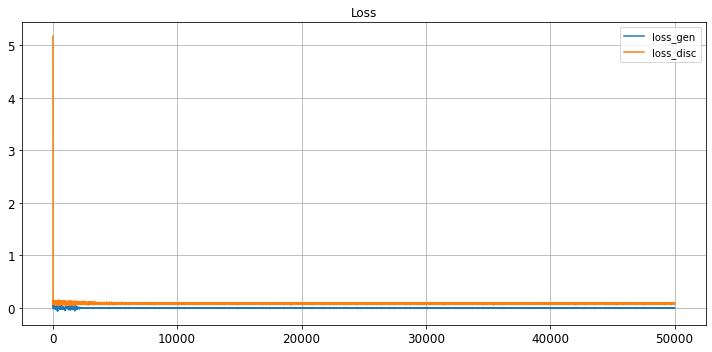

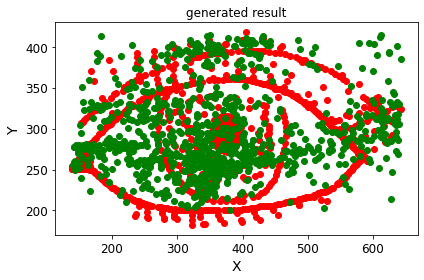

save the model & result


In [10]:
hist = wgan.train(train_dataset, epochs, scaler, scaled, X_train, y_train)

#### plot loss

Loss: 


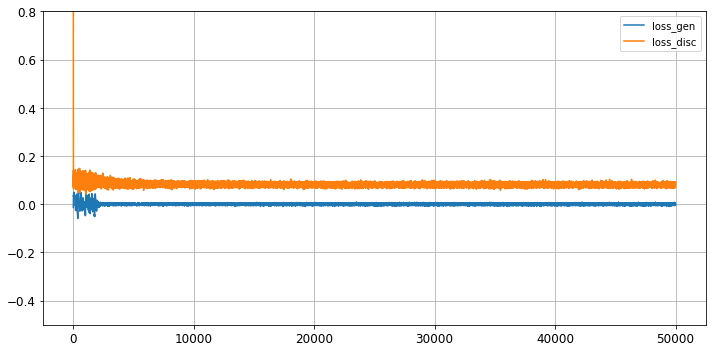

In [11]:
print('Loss: ')
fig, ax = plt.subplots(1,1, figsize=[10,5])
plt.ylim([-0.5,0.8])
ax.plot(hist)
ax.legend(['loss_gen', 'loss_disc'],)

#ax.set_yscale('log')
ax.grid()
plt.tight_layout()
plt.savefig('GANS/Losses/Final Result'+'_epoch_'+str(epochs)+'v_'+str(i)+'.png')

In [12]:

#generator = keras.models.load_model('GANS/Models/GAN_'+str(j))
#plt.close()

### Sampleing from the latent space

Predicted Values: (1000, 2)


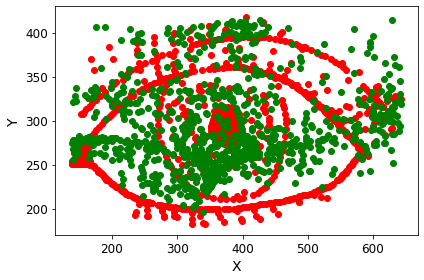

In [13]:
#sampling from the latent space without prediction
latent_values = tf.random.normal([1000, latent_space], mean=0.0, stddev=0.1)

#predict the labels of the data values on the basis of the trained model.
predicted_values = wgan.generator.predict(latent_values)
if scaled == '-1-1':
    predicted_values[:,:]=(predicted_values[:,:])
    predicted_values = scaler.inverse_transform(predicted_values)
elif scaled =='0-1':
    predicted_values = scaler.inverse_transform(predicted_values)
    

if n_features==3:
    print("Predicted Values:",predicted_values.shape)
    print("latent_space:",latent_space)
    print("BATCH_SIZE:",BATCH_SIZE)
    print("use_bias:",use_bias)
    print("epochs:",epochs)
    

    ab = plt.subplot(projection='3d')
    #ab.scatter(X_train[:,0],X_train[:,1],y_train, c='r')
    ab.scatter(predicted_values[:,0],predicted_values[:,1],predicted_values[:,2], c='green')
    ab.set_ylabel('Y')
    ab.set_zlabel('Z')
    ab.set_xlabel('X')
    
    
else:
    print("Predicted Values:",predicted_values.shape)
    plt.scatter(X_train, y_train,c='r')
    plt.scatter(predicted_values[:,0],predicted_values[:,1], c='green')
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()
    plt.savefig('GANs/Result/Final_'+str(epochs)+'.png')
    

In [14]:
os.system('mkdir result_dataset')

export_excel(predicted_values[:,:], 'result_dataset/predicted_values')
#x=[:0],y=[:1],z=[:2]

print('made result_Dataset')


made result_Dataset


In [15]:
if n_features == 3:    
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(predicted_values[:,0],predicted_values[:,1],c='green')
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(predicted_values[:,1],predicted_values[:,2], c='green')
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(predicted_values[:,0],predicted_values[:,2], c='green')
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(predicted_values[:,0]>=-0.8-0.05,predicted_values[:,0]<=-0.8+0.05),predicted_values[:,1],None)
    axes[0].scatter(ac,y_train, c='black')
    axes[0].scatter(ad,predicted_values[:,2], c='green')
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(predicted_values[:,0]>=0.0-0.05,predicted_values[:,0]<=0.0+0.05),predicted_values[:,1],None)
    axes[1].scatter(ae,y_train, c='black')
    axes[1].scatter(af,predicted_values[:,2], c='green')
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(predicted_values[:,0]>=0.8-0.05,predicted_values[:,0]<=0.8+0.05),predicted_values[:,1],None)
    axes[2].scatter(ag,y_train, c='black')
    axes[2].scatter(ah,predicted_values[:,2], c='green')
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(predicted_values[:,1]>=0.2-0.05,predicted_values[:,1]<=0.2+0.05),predicted_values[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,predicted_values[:,2], c='green')
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(predicted_values[:,1]>=0.5-0.05,predicted_values[:,1]<=0.5+0.05),predicted_values[:,0],None)
    axes[1].scatter(ae,y_train, c='gray')
    axes[1].scatter(af,predicted_values[:,2], c='green')
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(predicted_values[:,1]>=0.8-0.05,predicted_values[:,1]<=0.8+0.05),predicted_values[:,0],None)
    axes[2].scatter(ag,y_train, c='gray')
    axes[2].scatter(ah,predicted_values[:,2], c='green')
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()

### Applying the prediction function

## Fixed Input

input_test : (1000, 2)


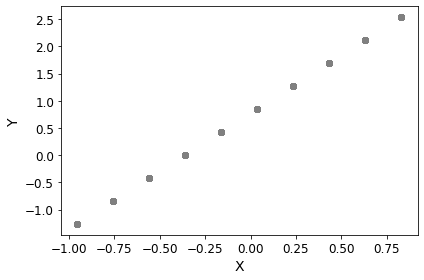

In [16]:
# define these for desired prediction
x_input = [150,200,250,300,350,400,450,500,550,600]
n_points = 1000
y_min = -1
y_max = 1

# produces an input of fixed x coordinates with random y values
predict1 = np.full((n_points//10, n_features), x_input[0])
predict2 = np.full((n_points//10, n_features), x_input[1])
predict3 = np.full((n_points//10, n_features), x_input[2])
predict4 = np.full((n_points//10, n_features), x_input[3])
predict5 = np.full((n_points//10, n_features), x_input[4])
predict6 = np.full((n_points//10, n_features), x_input[5])
predict7 = np.full((n_points//10, n_features), x_input[6])
predict8 = np.full((n_points//10, n_features), x_input[7])
predict9 = np.full((n_points//10, n_features), x_input[8])
predict10 = np.full((n_points//10, n_features), x_input[9])

predictthis = np.concatenate((predict1, predict2, predict3, predict4, predict5, predict6, predict7,predict8, predict9, predict10))
predictthis = scaler.transform(predictthis)
input_test = predictthis.reshape(n_points, n_features).astype('float32')


print("input_test :",input_test.shape)
plt.scatter(input_test[:,0],input_test[:,1] ,c='grey')
plt.ylabel('Y')
plt.xlabel('X')
plt.tight_layout()
    

In [17]:
X_generated = wgan.predict(input_test, scaler)

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 2)
input: (1000, 

Generated Data: (999, 2)


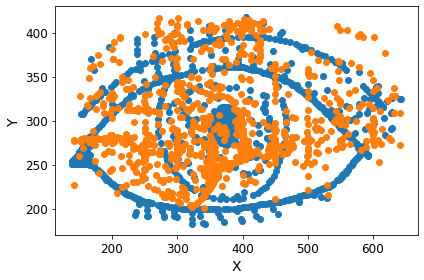

In [18]:
if scenario in ("3d", "helix"):
    print("latent_space=",latent_space)
    print("Epochs=",epochs)
    print("BATCH_SIZE=",BATCH_SIZE)
    print("use_bias=",use_bias)
    
    ax = plt.subplot(projection='3d')
    ax.scatter(X_generated[:,0], X_generated[:,1], X_generated[:,2], label='Generated Data')
    #ax.scatter(X_train[:,0], X_train[:,1], y_train, c='r', label='Sample Data')

    ax.set_zlabel('Z')
    ax.set_ylabel('Y')
    ax.set_xlabel('X')

    plt.legend(loc='best')
    plt.tight_layout()
    
    print("X-Y 2D slices:")
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    plt.ylim(-1.5,1.5)
    plt.xlim(-1.5,1.5)
    axes[0].scatter(X_train[:,0],X_train[:,1])
    axes[0].scatter(X_generated[:,0],X_generated[:,1])
    axes[0].set_xlabel("X")
    axes[0].set_ylabel("Y")
    
    plt.ylim(-1.5,1.5)
    plt.xlim(-2,22)
    axes[1].scatter(X_train[:,1],y_train)
    axes[1].scatter(X_generated[:,1],X_generated[:,2])
    axes[1].set_xlabel("Y")
    axes[1].set_ylabel("Z")
    
    plt.xlim(-1.5,1.5)
    plt.ylim(-2,22)
    axes[2].scatter(X_train[:,0],y_train)
    axes[2].scatter(X_generated[:,0],X_generated[:,2])
    axes[2].set_xlabel("X")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    
    ac=np.where(np.logical_and(X_train[:,0]>=-0.8-0.05,X_train[:,0]<=-0.8+0.05),X_train[:,1],None)
    ad=np.where(np.logical_and(X_generated[:,0]>=-0.8-0.05,X_generated[:,0]<=-0.8+0.05),X_generated[:,1],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("Y(X=-0.8)")
    axes[0].set_ylabel("Y")
    
    ae=np.where(np.logical_and(X_train[:,0]>=0.0-0.05,X_train[:,0]<=0.0+0.05),X_train[:,1],None)
    af=np.where(np.logical_and(X_generated[:,0]>=0.0-0.05,X_generated[:,0]<=0.0+0.05),X_generated[:,1],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("Y(X=0.0)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,0]>=0.8-0.05,X_train[:,0]<=0.8+0.05),X_train[:,1],None)
    ah=np.where(np.logical_and(X_generated[:,0]>=0.8-0.05,X_generated[:,0]<=0.8+0.05),X_generated[:,1],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("Y(X=0.8)")
    axes[2].set_ylabel("Z")
    
    plt.tight_layout()
    
    
    
    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5), sharey=False, sharex=False)
    ac=np.where(np.logical_and(X_train[:,1]>=0.2-0.05,X_train[:,1]<=0.2+0.05),X_train[:,0],None)
    ad=np.where(np.logical_and(X_generated[:,1]>=0.2-0.05,X_generated[:,1]<=0.2+0.05),X_generated[:,0],None)
    axes[0].scatter(ac,y_train)
    axes[0].scatter(ad,X_generated[:,2])
    axes[0].set_xlabel("X(Y=0.2)")
    axes[0].set_ylabel("Z")
    
    ae=np.where(np.logical_and(X_train[:,1]>=0.5-0.05,X_train[:,1]<=0.5+0.05),X_train[:,0],None)
    af=np.where(np.logical_and(X_generated[:,1]>=0.5-0.05,X_generated[:,1]<=0.5+0.05),X_generated[:,0],None)
    axes[1].scatter(ae,y_train)
    axes[1].scatter(af,X_generated[:,2])
    axes[1].set_xlabel("X(Y=0.5)")
    axes[1].set_ylabel("Z")
    
    ag=np.where(np.logical_and(X_train[:,1]>=0.8-0.05,X_train[:,1]<=0.8+0.05),X_train[:,0],None)
    ah=np.where(np.logical_and(X_generated[:,1]>=0.8-0.05,X_generated[:,1]<=0.8+0.05),X_generated[:,0],None)
    axes[2].scatter(ag,y_train)
    axes[2].scatter(ah,X_generated[:,2])
    axes[2].set_xlabel("X(Y=0.8)")
    axes[2].set_ylabel("Z")
    
    
    plt.tight_layout()
    
    
else:
    print("Generated Data:",X_generated.shape)
    plt.scatter(X_train, y_train,label="Sample Data")
    plt.scatter(X_generated[:,0],X_generated[:,1])
    plt.ylabel('Y')
    plt.xlabel('X')
    plt.tight_layout()